# Precip Compare: LOCA Wet Depths

Compare the wet day depth samples among the LOCA analysis periods.

The PRISM data set was regionalized to identify four regions. Each of the LOCA and BCCA was assigned to one of these regions via geometric intersection. This type of regionalization was necessary because different grids are used and the three data sets are noticeably different in terms of properties. Mixed exponential and 2 parameter gamma distributions have been fit to all of these data sets using R in separate Jupyter notebooks. The purpose of this notebook is to compare the fitted distributions and samples to see how different they are from each other.

For PRISM distributions are fit to regions (1-4) while LOCA has distributions fit to each individual grid cell. Consequently, we cannot compare the distributions directly. What we can do is compare the samples by PRISM region.

## Imports and Parameters

In [2]:
%matplotlib inline

In [3]:
import os
from IPython.display import display, HTML
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats as sstats

Parameters, primarily input file names

In [4]:
JAN_D1_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
            r'charge\Data\JNotes\Processed\CMIP5\CMIP5_1981_WetDays\Jan_WetDays_LOCA_G' \
            r'rp_1981-2010.pickle'
FEB_D1_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
            r'charge\Data\JNotes\Processed\CMIP5\CMIP5_1981_WetDays\Feb_WetDays_LOCA_G' \
            r'rp_1981-2010.pickle'
MAR_D1_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
            r'charge\Data\JNotes\Processed\CMIP5\CMIP5_1981_WetDays\Mar_WetDays_LOCA_G' \
            r'rp_1981-2010.pickle'
APR_D1_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
            r'charge\Data\JNotes\Processed\CMIP5\CMIP5_1981_WetDays\Apr_WetDays_LOCA_G' \
            r'rp_1981-2010.pickle'
MAY_D1_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
            r'charge\Data\JNotes\Processed\CMIP5\CMIP5_1981_WetDays\May_WetDays_LOCA_G' \
            r'rp_1981-2010.pickle'
JUN_D1_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
            r'charge\Data\JNotes\Processed\CMIP5\CMIP5_1981_WetDays\Jun_WetDays_LOCA_G' \
            r'rp_1981-2010.pickle'
JUL_D1_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
            r'charge\Data\JNotes\Processed\CMIP5\CMIP5_1981_WetDays\Jul_WetDays_LOCA_G' \
            r'rp_1981-2010.pickle'
AUG_D1_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
            r'charge\Data\JNotes\Processed\CMIP5\CMIP5_1981_WetDays\Aug_WetDays_LOCA_G' \
            r'rp_1981-2010.pickle'
SEP_D1_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
            r'charge\Data\JNotes\Processed\CMIP5\CMIP5_1981_WetDays\Sep_WetDays_LOCA_G' \
            r'rp_1981-2010.pickle'
OCT_D1_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
            r'charge\Data\JNotes\Processed\CMIP5\CMIP5_1981_WetDays\Oct_WetDays_LOCA_G' \
            r'rp_1981-2010.pickle'
NOV_D1_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
            r'charge\Data\JNotes\Processed\CMIP5\CMIP5_1981_WetDays\Nov_WetDays_LOCA_G' \
            r'rp_1981-2010.pickle'
DEC_D1_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
            r'charge\Data\JNotes\Processed\CMIP5\CMIP5_1981_WetDays\Dec_WetDays_LOCA_G' \
            r'rp_1981-2010.pickle'

In [5]:
JAN_P1_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
            r'charge\Data\JNotes\Processed\CMIP5\CMIP5_2011_WetDays\Jan_WetDays_LOCA_G' \
            r'rp_2011-2040.pickle'
FEB_P1_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
            r'charge\Data\JNotes\Processed\CMIP5\CMIP5_2011_WetDays\Feb_WetDays_LOCA_G' \
            r'rp_2011-2040.pickle'
MAR_P1_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
            r'charge\Data\JNotes\Processed\CMIP5\CMIP5_2011_WetDays\Mar_WetDays_LOCA_G' \
            r'rp_2011-2040.pickle'
APR_P1_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
            r'charge\Data\JNotes\Processed\CMIP5\CMIP5_2011_WetDays\Apr_WetDays_LOCA_G' \
            r'rp_2011-2040.pickle'
MAY_P1_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
            r'charge\Data\JNotes\Processed\CMIP5\CMIP5_2011_WetDays\May_WetDays_LOCA_G' \
            r'rp_2011-2040.pickle'
JUN_P1_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
            r'charge\Data\JNotes\Processed\CMIP5\CMIP5_2011_WetDays\Jun_WetDays_LOCA_G' \
            r'rp_2011-2040.pickle'
JUL_P1_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
            r'charge\Data\JNotes\Processed\CMIP5\CMIP5_2011_WetDays\Jul_WetDays_LOCA_G' \
            r'rp_2011-2040.pickle'
AUG_P1_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
            r'charge\Data\JNotes\Processed\CMIP5\CMIP5_2011_WetDays\Aug_WetDays_LOCA_G' \
            r'rp_2011-2040.pickle'
SEP_P1_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
            r'charge\Data\JNotes\Processed\CMIP5\CMIP5_2011_WetDays\Sep_WetDays_LOCA_G' \
            r'rp_2011-2040.pickle'
OCT_P1_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
            r'charge\Data\JNotes\Processed\CMIP5\CMIP5_2011_WetDays\Oct_WetDays_LOCA_G' \
            r'rp_2011-2040.pickle'
NOV_P1_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
            r'charge\Data\JNotes\Processed\CMIP5\CMIP5_2011_WetDays\Nov_WetDays_LOCA_G' \
            r'rp_2011-2040.pickle'
DEC_P1_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
            r'charge\Data\JNotes\Processed\CMIP5\CMIP5_2011_WetDays\Dec_WetDays_LOCA_G' \
            r'rp_2011-2040.pickle'

In [6]:
JAN_P2_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
            r'charge\Data\JNotes\Processed\CMIP5\CMIP5_2041_WetDays\Jan_WetDays_LOCA_G' \
            r'rp_2041-2070.pickle'
FEB_P2_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
            r'charge\Data\JNotes\Processed\CMIP5\CMIP5_2041_WetDays\Feb_WetDays_LOCA_G' \
            r'rp_2041-2070.pickle'
MAR_P2_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
            r'charge\Data\JNotes\Processed\CMIP5\CMIP5_2041_WetDays\Mar_WetDays_LOCA_G' \
            r'rp_2041-2070.pickle'
APR_P2_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
            r'charge\Data\JNotes\Processed\CMIP5\CMIP5_2041_WetDays\Apr_WetDays_LOCA_G' \
            r'rp_2041-2070.pickle'
MAY_P2_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
            r'charge\Data\JNotes\Processed\CMIP5\CMIP5_2041_WetDays\May_WetDays_LOCA_G' \
            r'rp_2041-2070.pickle'
JUN_P2_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
            r'charge\Data\JNotes\Processed\CMIP5\CMIP5_2041_WetDays\Jun_WetDays_LOCA_G' \
            r'rp_2041-2070.pickle'
JUL_P2_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
            r'charge\Data\JNotes\Processed\CMIP5\CMIP5_2041_WetDays\Jul_WetDays_LOCA_G' \
            r'rp_2041-2070.pickle'
AUG_P2_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
            r'charge\Data\JNotes\Processed\CMIP5\CMIP5_2041_WetDays\Aug_WetDays_LOCA_G' \
            r'rp_2041-2070.pickle'
SEP_P2_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
            r'charge\Data\JNotes\Processed\CMIP5\CMIP5_2041_WetDays\Sep_WetDays_LOCA_G' \
            r'rp_2041-2070.pickle'
OCT_P2_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
            r'charge\Data\JNotes\Processed\CMIP5\CMIP5_2041_WetDays\Oct_WetDays_LOCA_G' \
            r'rp_2041-2070.pickle'
NOV_P2_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
            r'charge\Data\JNotes\Processed\CMIP5\CMIP5_2041_WetDays\Nov_WetDays_LOCA_G' \
            r'rp_2041-2070.pickle'
DEC_P2_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
            r'charge\Data\JNotes\Processed\CMIP5\CMIP5_2041_WetDays\Dec_WetDays_LOCA_G' \
            r'rp_2041-2070.pickle'

In [7]:
JAN_P3_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
            r'charge\Data\JNotes\Processed\CMIP5\CMIP5_2071_WetDays\Jan_WetDays_LOCA_G' \
            r'rp_2071-2100.pickle'
FEB_P3_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
            r'charge\Data\JNotes\Processed\CMIP5\CMIP5_2071_WetDays\Feb_WetDays_LOCA_G' \
            r'rp_2071-2100.pickle'
MAR_P3_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
            r'charge\Data\JNotes\Processed\CMIP5\CMIP5_2071_WetDays\Mar_WetDays_LOCA_G' \
            r'rp_2071-2100.pickle'
APR_P3_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
            r'charge\Data\JNotes\Processed\CMIP5\CMIP5_2071_WetDays\Apr_WetDays_LOCA_G' \
            r'rp_2071-2100.pickle'
MAY_P3_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
            r'charge\Data\JNotes\Processed\CMIP5\CMIP5_2071_WetDays\May_WetDays_LOCA_G' \
            r'rp_2071-2100.pickle'
JUN_P3_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
            r'charge\Data\JNotes\Processed\CMIP5\CMIP5_2071_WetDays\Jun_WetDays_LOCA_G' \
            r'rp_2071-2100.pickle'
JUL_P3_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
            r'charge\Data\JNotes\Processed\CMIP5\CMIP5_2071_WetDays\Jul_WetDays_LOCA_G' \
            r'rp_2071-2100.pickle'
AUG_P3_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
            r'charge\Data\JNotes\Processed\CMIP5\CMIP5_2071_WetDays\Aug_WetDays_LOCA_G' \
            r'rp_2071-2100.pickle'
SEP_P3_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
            r'charge\Data\JNotes\Processed\CMIP5\CMIP5_2071_WetDays\Sep_WetDays_LOCA_G' \
            r'rp_2071-2100.pickle'
OCT_P3_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
            r'charge\Data\JNotes\Processed\CMIP5\CMIP5_2071_WetDays\Oct_WetDays_LOCA_G' \
            r'rp_2071-2100.pickle'
NOV_P3_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
            r'charge\Data\JNotes\Processed\CMIP5\CMIP5_2071_WetDays\Nov_WetDays_LOCA_G' \
            r'rp_2071-2100.pickle'
DEC_P3_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Re' \
            r'charge\Data\JNotes\Processed\CMIP5\CMIP5_2071_WetDays\Dec_WetDays_LOCA_G' \
            r'rp_2071-2100.pickle'

In [8]:
OUT_DIR = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Recharge\Data\JN' \
          r'otes\Processed\Precip_Compare_1981-2010'

In [9]:
# mapping of LOCA grid cells to PRISM regions
LOCA_GRID_MAP = { 136 : { 1 : 1,
                          2 : 1,
                          3 : 1,
                          4 : 1,
                          5 : 1,
                          6 : 1,
                          7 : 1,
                          8 : 1,
                          9 : 4,
                          10 : 4,
                          11 : 1,
                          12 : 4,
                        },
                  137 : { 1 : 1,
                          2 : 1,
                          3 : 1,
                          4 : 1,
                          5 : 1,
                          6 : 1,
                          7 : 1,
                          8 : 1,
                          9 : 4,
                          10 : 4,
                          11 : 1,
                          12 : 1,
                        },
                  120 : { 1 : 4,
                          2 : 3,
                          3 : 1,
                          4 : 4,
                          5 : 3,
                          6 : 4,
                          7 : 1,
                          8 : 1,
                          9 : 4,
                          10 : 4,
                          11 : 1,
                          12 : 4,
                        },
                  121 : { 1 : 4,
                          2 : 1,
                          3 : 1,
                          4 : 1,
                          5 : 1,
                          6 : 4,
                          7 : 1,
                          8 : 1,
                          9 : 4,
                          10 : 4,
                          11 : 1,
                          12 : 4,
                        },
                  122 : { 1 : 1,
                          2 : 1,
                          3 : 1,
                          4 : 1,
                          5 : 1,
                          6 : 1,
                          7 : 1,
                          8 : 1,
                          9 : 4,
                          10 : 4,
                          11 : 1,
                          12 : 4,
                        },
                  123 : { 1 : 1,
                          2 : 1,
                          3 : 1,
                          4 : 1,
                          5 : 1,
                          6 : 1,
                          7 : 1,
                          8 : 1,
                          9 : 1,
                          10 : 1,
                          11 : 1,
                          12 : 4,
                        },
                  104 : { 1 : 3,
                          2 : 3,
                          3 : 4,
                          4 : 4,
                          5 : 4,
                          6 : 3,
                          7 : 3,
                          8 : 4,
                          9 : 3,
                          10 : 3,
                          11 : 3,
                          12 : 3,
                        },
                  105 : { 1 : 4,
                          2 : 3,
                          3 : 4,
                          4 : 4,
                          5 : 3,
                          6 : 3,
                          7 : 1,
                          8 : 4,
                          9 : 3,
                          10 : 1,
                          11 : 4,
                          12 : 3,
                        },
                  106 : { 1 : 4,
                          2 : 1,
                          3 : 1,
                          4 : 4,
                          5 : 3,
                          6 : 1,
                          7 : 1,
                          8 : 1,
                          9 : 4,
                          10 : 1,
                          11 : 1,
                          12 : 4,
                        },
                  107 : { 1 : 1,
                          2 : 1,
                          3 : 1,
                          4 : 1,
                          5 : 3,
                          6 : 1,
                          7 : 1,
                          8 : 1,
                          9 : 2,
                          10 : 1,
                          11 : 1,
                          12 : 4,
                        },
                  108 : { 1 : 1,
                          2 : 1,
                          3 : 1,
                          4 : 1,
                          5 : 3,
                          6 : 1,
                          7 : 1,
                          8 : 1,
                          9 : 2,
                          10 : 1,
                          11 : 1,
                          12 : 4,
                        },
                  109 : { 1 : 1,
                          2 : 1,
                          3 : 1,
                          4 : 1,
                          5 : 1,
                          6 : 1,
                          7 : 1,
                          8 : 1,
                          9 : 1,
                          10 : 1,
                          11 : 1,
                          12 : 4,
                        },
                  90 : { 1 : 3,
                          2 : 3,
                          3 : 4,
                          4 : 4,
                          5 : 4,
                          6 : 3,
                          7 : 3,
                          8 : 4,
                          9 : 3,
                          10 : 3,
                          11 : 3,
                          12 : 3,
                        },
                  91 : { 1 : 4,
                          2 : 3,
                          3 : 1,
                          4 : 4,
                          5 : 3,
                          6 : 3,
                          7 : 1,
                          8 : 4,
                          9 : 3,
                          10 : 1,
                          11 : 4,
                          12 : 3,
                        },
                  92 : { 1 : 4,
                          2 : 1,
                          3 : 1,
                          4 : 1,
                          5 : 3,
                          6 : 1,
                          7 : 1,
                          8 : 1,
                          9 : 3,
                          10 : 1,
                          11 : 1,
                          12 : 3,
                        },
                  93 : { 1 : 1,
                          2 : 1,
                          3 : 1,
                          4 : 1,
                          5 : 3,
                          6 : 1,
                          7 : 1,
                          8 : 1,
                          9 : 2,
                          10 : 1,
                          11 : 1,
                          12 : 3,
                        },
                  94 : { 1 : 1,
                          2 : 1,
                          3 : 1,
                          4 : 1,
                          5 : 3,
                          6 : 1,
                          7 : 1,
                          8 : 1,
                          9 : 2,
                          10 : 1,
                          11 : 1,
                          12 : 1,
                        },
                  76 : { 1 : 3,
                          2 : 3,
                          3 : 4,
                          4 : 4,
                          5 : 4,
                          6 : 3,
                          7 : 3,
                          8 : 4,
                          9 : 3,
                          10 : 3,
                          11 : 3,
                          12 : 3,
                        },
                  77 : { 1 : 1,
                          2 : 3,
                          3 : 1,
                          4 : 1,
                          5 : 3,
                          6 : 3,
                          7 : 1,
                          8 : 4,
                          9 : 3,
                          10 : 1,
                          11 : 1,
                          12 : 3,
                        },
                  78 : { 1 : 1,
                          2 : 3,
                          3 : 1,
                          4 : 2,
                          5 : 3,
                          6 : 3,
                          7 : 1,
                          8 : 2,
                          9 : 2,
                          10 : 1,
                          11 : 1,
                          12 : 3,
                        },
                  79 : { 1 : 1,
                          2 : 1,
                          3 : 3,
                          4 : 1,
                          5 : 3,
                          6 : 3,
                          7 : 1,
                          8 : 2,
                          9 : 2,
                          10 : 1,
                          11 : 1,
                          12 : 1,
                        },
                  62 : { 1 : 3,
                          2 : 3,
                          3 : 4,
                          4 : 4,
                          5 : 4,
                          6 : 3,
                          7 : 3,
                          8 : 4,
                          9 : 3,
                          10 : 3,
                          11 : 3,
                          12 : 3,
                        },
                  63 : { 1 : 1,
                          2 : 3,
                          3 : 3,
                          4 : 3,
                          5 : 3,
                          6 : 3,
                          7 : 1,
                          8 : 4,
                          9 : 4,
                          10 : 2,
                          11 : 3,
                          12 : 3,
                        },
                  64 : { 1 : 1,
                          2 : 3,
                          3 : 3,
                          4 : 3,
                          5 : 3,
                          6 : 3,
                          7 : 1,
                          8 : 2,
                          9 : 4,
                          10 : 2,
                          11 : 1,
                          12 : 3,
                        },
                 }
LOCA_KEYS = sorted( LOCA_GRID_MAP.keys() )
NUM_LOCA_GRID = len( LOCA_KEYS )

## Load Files

### Load DataFrames

In [10]:
JanD1DF = pd.read_pickle( JAN_D1_IN )
FebD1DF = pd.read_pickle( FEB_D1_IN )
MarD1DF = pd.read_pickle( MAR_D1_IN )
AprD1DF = pd.read_pickle( APR_D1_IN )
MayD1DF = pd.read_pickle( MAY_D1_IN )
JunD1DF = pd.read_pickle( JUN_D1_IN )
JulD1DF = pd.read_pickle( JUL_D1_IN )
AugD1DF = pd.read_pickle( AUG_D1_IN )
SepD1DF = pd.read_pickle( SEP_D1_IN )
OctD1DF = pd.read_pickle( OCT_D1_IN )
NovD1DF = pd.read_pickle( NOV_D1_IN )
DecD1DF = pd.read_pickle( DEC_D1_IN )

In [11]:
JanP1DF = pd.read_pickle( JAN_P1_IN )
FebP1DF = pd.read_pickle( FEB_P1_IN )
MarP1DF = pd.read_pickle( MAR_P1_IN )
AprP1DF = pd.read_pickle( APR_P1_IN )
MayP1DF = pd.read_pickle( MAY_P1_IN )
JunP1DF = pd.read_pickle( JUN_P1_IN )
JulP1DF = pd.read_pickle( JUL_P1_IN )
AugP1DF = pd.read_pickle( AUG_P1_IN )
SepP1DF = pd.read_pickle( SEP_P1_IN )
OctP1DF = pd.read_pickle( OCT_P1_IN )
NovP1DF = pd.read_pickle( NOV_P1_IN )
DecP1DF = pd.read_pickle( DEC_P1_IN )

In [12]:
JanP2DF = pd.read_pickle( JAN_P2_IN )
FebP2DF = pd.read_pickle( FEB_P2_IN )
MarP2DF = pd.read_pickle( MAR_P2_IN )
AprP2DF = pd.read_pickle( APR_P2_IN )
MayP2DF = pd.read_pickle( MAY_P2_IN )
JunP2DF = pd.read_pickle( JUN_P2_IN )
JulP2DF = pd.read_pickle( JUL_P2_IN )
AugP2DF = pd.read_pickle( AUG_P2_IN )
SepP2DF = pd.read_pickle( SEP_P2_IN )
OctP2DF = pd.read_pickle( OCT_P2_IN )
NovP2DF = pd.read_pickle( NOV_P2_IN )
DecP2DF = pd.read_pickle( DEC_P2_IN )

In [13]:
JanP3DF = pd.read_pickle( JAN_P3_IN )
FebP3DF = pd.read_pickle( FEB_P3_IN )
MarP3DF = pd.read_pickle( MAR_P3_IN )
AprP3DF = pd.read_pickle( APR_P3_IN )
MayP3DF = pd.read_pickle( MAY_P3_IN )
JunP3DF = pd.read_pickle( JUN_P3_IN )
JulP3DF = pd.read_pickle( JUL_P3_IN )
AugP3DF = pd.read_pickle( AUG_P3_IN )
SepP3DF = pd.read_pickle( SEP_P3_IN )
OctP3DF = pd.read_pickle( OCT_P3_IN )
NovP3DF = pd.read_pickle( NOV_P3_IN )
DecP3DF = pd.read_pickle( DEC_P3_IN )

In [14]:
display( HTML( JanD1DF.head().to_html() ))

In [15]:
display( HTML( JanP1DF.head().to_html() ))

In [16]:
display( HTML( JanP2DF.head().to_html() ))

In [17]:
display( HTML( JanP3DF.head().to_html() ))

## Comparisons by Month

In [18]:
CMonList = list()
CZoneList = list()
SD1Mean = list()
SD1MeanMinCI = list()
SD1MeanMaxCI = list()
SD1Var = list()
SD1VarMinCI = list()
SD1VarMaxCI = list()
SD1Std = list()
SD1StdMinCI = list()
SD1StdMaxCI = list()

In [19]:
SP1Mean = list()
SP1MeanMinCI = list()
SP1MeanMaxCI = list()
SP1Var = list()
SP1VarMinCI = list()
SP1VarMaxCI = list()
SP1Std = list()
SP1StdMinCI = list()
SP1StdMaxCI = list()

In [20]:
SP2Mean = list()
SP2MeanMinCI = list()
SP2MeanMaxCI = list()
SP2Var = list()
SP2VarMinCI = list()
SP2VarMaxCI = list()
SP2Std = list()
SP2StdMinCI = list()
SP2StdMaxCI = list()

In [21]:
SP3Mean = list()
SP3MeanMinCI = list()
SP3MeanMaxCI = list()
SP3Var = list()
SP3VarMinCI = list()
SP3VarMaxCI = list()
SP3Std = list()
SP3StdMinCI = list()
SP3StdMaxCI = list()

In [22]:
CompQs = [ round(x * 0.05, 2) for x in range(21) ]
nCompQs = np.array( CompQs, dtype=np.float32 )
nCompQs

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ],
      dtype=float32)

### Jan

In [23]:
JanNum = 1

In [24]:
Jan1D1DF = JanD1DF[JanD1DF["PRegion_Id"] == 1].copy()
Jan2D1DF = JanD1DF[JanD1DF["PRegion_Id"] == 2].copy()
Jan3D1DF = JanD1DF[JanD1DF["PRegion_Id"] == 3].copy()
Jan4D1DF = JanD1DF[JanD1DF["PRegion_Id"] == 4].copy()

In [25]:
Jan1P1DF = JanP1DF[JanP1DF["PRegion_Id"] == 1].copy()
Jan2P1DF = JanP1DF[JanP1DF["PRegion_Id"] == 2].copy()
Jan3P1DF = JanP1DF[JanP1DF["PRegion_Id"] == 3].copy()
Jan4P1DF = JanP1DF[JanP1DF["PRegion_Id"] == 4].copy()

In [26]:
Jan1P2DF = JanP2DF[JanP2DF["PRegion_Id"] == 1].copy()
Jan2P2DF = JanP2DF[JanP2DF["PRegion_Id"] == 2].copy()
Jan3P2DF = JanP2DF[JanP2DF["PRegion_Id"] == 3].copy()
Jan4P2DF = JanP2DF[JanP2DF["PRegion_Id"] == 4].copy()

In [27]:
Jan1P3DF = JanP3DF[JanP3DF["PRegion_Id"] == 1].copy()
Jan2P3DF = JanP3DF[JanP3DF["PRegion_Id"] == 2].copy()
Jan3P3DF = JanP3DF[JanP3DF["PRegion_Id"] == 3].copy()
Jan4P3DF = JanP3DF[JanP3DF["PRegion_Id"] == 4].copy()

Bayesian estimates of confidence intervals for mean, variance, and standard deviation of the samples

In [28]:
Jan1D1BSCI = sstats.bayes_mvs( np.array( Jan1D1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Jan2D1BSCI = sstats.bayes_mvs( np.array( Jan2D1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Jan3D1BSCI = sstats.bayes_mvs( np.array( Jan3D1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Jan4D1BSCI = sstats.bayes_mvs( np.array( Jan4D1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )

In [29]:
Jan1P1BSCI = sstats.bayes_mvs( np.array( Jan1P1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Jan2P1BSCI = sstats.bayes_mvs( np.array( Jan2P1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Jan3P1BSCI = sstats.bayes_mvs( np.array( Jan3P1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Jan4P1BSCI = sstats.bayes_mvs( np.array( Jan4P1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )

In [30]:
Jan1P2BSCI = sstats.bayes_mvs( np.array( Jan1P2DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Jan2P2BSCI = sstats.bayes_mvs( np.array( Jan2P2DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Jan3P2BSCI = sstats.bayes_mvs( np.array( Jan3P2DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Jan4P2BSCI = sstats.bayes_mvs( np.array( Jan4P2DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )

In [31]:
Jan1P3BSCI = sstats.bayes_mvs( np.array( Jan1P3DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Jan2P3BSCI = sstats.bayes_mvs( np.array( Jan2P3DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Jan3P3BSCI = sstats.bayes_mvs( np.array( Jan3P3DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Jan4P3BSCI = sstats.bayes_mvs( np.array( Jan4P3DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )

In [32]:
CMonList.append( JanNum )
CZoneList.append( 1 )
SD1Mean.append( Jan1D1BSCI[0][0] )
SD1MeanMinCI.append( Jan1D1BSCI[0][1][0] )
SD1MeanMaxCI.append( Jan1D1BSCI[0][1][1] )
SD1Var.append( Jan1D1BSCI[1][0] )
SD1VarMinCI.append( Jan1D1BSCI[1][1][0] )
SD1VarMaxCI.append( Jan1D1BSCI[1][1][1] )
SD1Std.append( Jan1D1BSCI[2][0] )
SD1StdMinCI.append( Jan1D1BSCI[2][1][0] )
SD1StdMaxCI.append( Jan1D1BSCI[2][1][1] )
CMonList.append( JanNum )
CZoneList.append( 2 )
SD1Mean.append( Jan2D1BSCI[0][0] )
SD1MeanMinCI.append( Jan2D1BSCI[0][1][0] )
SD1MeanMaxCI.append( Jan2D1BSCI[0][1][1] )
SD1Var.append( Jan2D1BSCI[1][0] )
SD1VarMinCI.append( Jan2D1BSCI[1][1][0] )
SD1VarMaxCI.append( Jan2D1BSCI[1][1][1] )
SD1Std.append( Jan2D1BSCI[2][0] )
SD1StdMinCI.append( Jan2D1BSCI[2][1][0] )
SD1StdMaxCI.append( Jan2D1BSCI[2][1][1] )
CMonList.append( JanNum )
CZoneList.append( 3 )
SD1Mean.append( Jan3D1BSCI[0][0] )
SD1MeanMinCI.append( Jan3D1BSCI[0][1][0] )
SD1MeanMaxCI.append( Jan3D1BSCI[0][1][1] )
SD1Var.append( Jan3D1BSCI[1][0] )
SD1VarMinCI.append( Jan3D1BSCI[1][1][0] )
SD1VarMaxCI.append( Jan3D1BSCI[1][1][1] )
SD1Std.append( Jan3D1BSCI[2][0] )
SD1StdMinCI.append( Jan3D1BSCI[2][1][0] )
SD1StdMaxCI.append( Jan3D1BSCI[2][1][1] )
CMonList.append( JanNum )
CZoneList.append( 4 )
SD1Mean.append( Jan4D1BSCI[0][0] )
SD1MeanMinCI.append( Jan4D1BSCI[0][1][0] )
SD1MeanMaxCI.append( Jan4D1BSCI[0][1][1] )
SD1Var.append( Jan4D1BSCI[1][0] )
SD1VarMinCI.append( Jan4D1BSCI[1][1][0] )
SD1VarMaxCI.append( Jan4D1BSCI[1][1][1] )
SD1Std.append( Jan4D1BSCI[2][0] )
SD1StdMinCI.append( Jan4D1BSCI[2][1][0] )
SD1StdMaxCI.append( Jan4D1BSCI[2][1][1] )

In [33]:
SP1Mean.append( Jan1P1BSCI[0][0] )
SP1MeanMinCI.append( Jan1P1BSCI[0][1][0] )
SP1MeanMaxCI.append( Jan1P1BSCI[0][1][1] )
SP1Var.append( Jan1P1BSCI[1][0] )
SP1VarMinCI.append( Jan1P1BSCI[1][1][0] )
SP1VarMaxCI.append( Jan1P1BSCI[1][1][1] )
SP1Std.append( Jan1P1BSCI[2][0] )
SP1StdMinCI.append( Jan1P1BSCI[2][1][0] )
SP1StdMaxCI.append( Jan1P1BSCI[2][1][1] )
SP1Mean.append( Jan2P1BSCI[0][0] )
SP1MeanMinCI.append( Jan2P1BSCI[0][1][0] )
SP1MeanMaxCI.append( Jan2P1BSCI[0][1][1] )
SP1Var.append( Jan2P1BSCI[1][0] )
SP1VarMinCI.append( Jan2P1BSCI[1][1][0] )
SP1VarMaxCI.append( Jan2P1BSCI[1][1][1] )
SP1Std.append( Jan2P1BSCI[2][0] )
SP1StdMinCI.append( Jan2P1BSCI[2][1][0] )
SP1StdMaxCI.append( Jan2P1BSCI[2][1][1] )
SP1Mean.append( Jan3P1BSCI[0][0] )
SP1MeanMinCI.append( Jan3P1BSCI[0][1][0] )
SP1MeanMaxCI.append( Jan3P1BSCI[0][1][1] )
SP1Var.append( Jan3P1BSCI[1][0] )
SP1VarMinCI.append( Jan3P1BSCI[1][1][0] )
SP1VarMaxCI.append( Jan3P1BSCI[1][1][1] )
SP1Std.append( Jan3P1BSCI[2][0] )
SP1StdMinCI.append( Jan3P1BSCI[2][1][0] )
SP1StdMaxCI.append( Jan3P1BSCI[2][1][1] )
SP1Mean.append( Jan4P1BSCI[0][0] )
SP1MeanMinCI.append( Jan4P1BSCI[0][1][0] )
SP1MeanMaxCI.append( Jan4P1BSCI[0][1][1] )
SP1Var.append( Jan4P1BSCI[1][0] )
SP1VarMinCI.append( Jan4P1BSCI[1][1][0] )
SP1VarMaxCI.append( Jan4P1BSCI[1][1][1] )
SP1Std.append( Jan4P1BSCI[2][0] )
SP1StdMinCI.append( Jan4P1BSCI[2][1][0] )
SP1StdMaxCI.append( Jan4P1BSCI[2][1][1] )

In [34]:
SP2Mean.append( Jan1P2BSCI[0][0] )
SP2MeanMinCI.append( Jan1P2BSCI[0][1][0] )
SP2MeanMaxCI.append( Jan1P2BSCI[0][1][1] )
SP2Var.append( Jan1P2BSCI[1][0] )
SP2VarMinCI.append( Jan1P2BSCI[1][1][0] )
SP2VarMaxCI.append( Jan1P2BSCI[1][1][1] )
SP2Std.append( Jan1P2BSCI[2][0] )
SP2StdMinCI.append( Jan1P2BSCI[2][1][0] )
SP2StdMaxCI.append( Jan1P2BSCI[2][1][1] )
SP2Mean.append( Jan2P2BSCI[0][0] )
SP2MeanMinCI.append( Jan2P2BSCI[0][1][0] )
SP2MeanMaxCI.append( Jan2P2BSCI[0][1][1] )
SP2Var.append( Jan2P2BSCI[1][0] )
SP2VarMinCI.append( Jan2P2BSCI[1][1][0] )
SP2VarMaxCI.append( Jan2P2BSCI[1][1][1] )
SP2Std.append( Jan2P2BSCI[2][0] )
SP2StdMinCI.append( Jan2P2BSCI[2][1][0] )
SP2StdMaxCI.append( Jan2P2BSCI[2][1][1] )
SP2Mean.append( Jan3P2BSCI[0][0] )
SP2MeanMinCI.append( Jan3P2BSCI[0][1][0] )
SP2MeanMaxCI.append( Jan3P2BSCI[0][1][1] )
SP2Var.append( Jan3P2BSCI[1][0] )
SP2VarMinCI.append( Jan3P2BSCI[1][1][0] )
SP2VarMaxCI.append( Jan3P2BSCI[1][1][1] )
SP2Std.append( Jan3P2BSCI[2][0] )
SP2StdMinCI.append( Jan3P2BSCI[2][1][0] )
SP2StdMaxCI.append( Jan3P2BSCI[2][1][1] )
SP2Mean.append( Jan4P2BSCI[0][0] )
SP2MeanMinCI.append( Jan4P2BSCI[0][1][0] )
SP2MeanMaxCI.append( Jan4P2BSCI[0][1][1] )
SP2Var.append( Jan4P2BSCI[1][0] )
SP2VarMinCI.append( Jan4P2BSCI[1][1][0] )
SP2VarMaxCI.append( Jan4P2BSCI[1][1][1] )
SP2Std.append( Jan4P2BSCI[2][0] )
SP2StdMinCI.append( Jan4P2BSCI[2][1][0] )
SP2StdMaxCI.append( Jan4P2BSCI[2][1][1] )

In [35]:
SP3Mean.append( Jan1P3BSCI[0][0] )
SP3MeanMinCI.append( Jan1P3BSCI[0][1][0] )
SP3MeanMaxCI.append( Jan1P3BSCI[0][1][1] )
SP3Var.append( Jan1P3BSCI[1][0] )
SP3VarMinCI.append( Jan1P3BSCI[1][1][0] )
SP3VarMaxCI.append( Jan1P3BSCI[1][1][1] )
SP3Std.append( Jan1P3BSCI[2][0] )
SP3StdMinCI.append( Jan1P3BSCI[2][1][0] )
SP3StdMaxCI.append( Jan1P3BSCI[2][1][1] )
SP3Mean.append( Jan2P3BSCI[0][0] )
SP3MeanMinCI.append( Jan2P3BSCI[0][1][0] )
SP3MeanMaxCI.append( Jan2P3BSCI[0][1][1] )
SP3Var.append( Jan2P3BSCI[1][0] )
SP3VarMinCI.append( Jan2P3BSCI[1][1][0] )
SP3VarMaxCI.append( Jan2P3BSCI[1][1][1] )
SP3Std.append( Jan2P3BSCI[2][0] )
SP3StdMinCI.append( Jan2P3BSCI[2][1][0] )
SP3StdMaxCI.append( Jan2P3BSCI[2][1][1] )
SP3Mean.append( Jan3P3BSCI[0][0] )
SP3MeanMinCI.append( Jan3P3BSCI[0][1][0] )
SP3MeanMaxCI.append( Jan3P3BSCI[0][1][1] )
SP3Var.append( Jan3P3BSCI[1][0] )
SP3VarMinCI.append( Jan3P3BSCI[1][1][0] )
SP3VarMaxCI.append( Jan3P3BSCI[1][1][1] )
SP3Std.append( Jan3P3BSCI[2][0] )
SP3StdMinCI.append( Jan3P3BSCI[2][1][0] )
SP3StdMaxCI.append( Jan3P3BSCI[2][1][1] )
SP3Mean.append( Jan4P3BSCI[0][0] )
SP3MeanMinCI.append( Jan4P3BSCI[0][1][0] )
SP3MeanMaxCI.append( Jan4P3BSCI[0][1][1] )
SP3Var.append( Jan4P3BSCI[1][0] )
SP3VarMinCI.append( Jan4P3BSCI[1][1][0] )
SP3VarMaxCI.append( Jan4P3BSCI[1][1][1] )
SP3Std.append( Jan4P3BSCI[2][0] )
SP3StdMinCI.append( Jan4P3BSCI[2][1][0] )
SP3StdMaxCI.append( Jan4P3BSCI[2][1][1] )

#### T-Test

T-Test for the means of two independent samples. Two-sided test for the null hypothesis that 2 independent samples hae identical average values. Test assumes that the populations have identical variances.

If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [36]:
Jan1TTD1toP1 = sstats.ttest_ind( np.array( Jan1D1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Jan1P1DF["Precip_mm"], dtype=np.int32 ) )

In [39]:
Jan1TTD1toP1Pval = Jan1TTD1toP1[1]
print("Region 1, P-Value for LOCA D1 and P1 from same population is: %g" % Jan1TTD1toP1Pval )

Region 1, P-Value for LOCA D1 and P1 from same population is: 0


In [41]:
Jan2TTD1toP1 = sstats.ttest_ind( np.array( Jan2D1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Jan2P1DF["Precip_mm"], dtype=np.int32 ) )

In [42]:
Jan2TTD1toP1Pval = Jan2TTD1toP1[1]
print("Region 2, P-Value for LOCA D1 and P1 from same population is: %g" % Jan2TTD1toP1Pval )

Region 2, P-Value for LOCA D1 and P1 from same population is: 0


In [44]:
Jan3TTD1toP1 = sstats.ttest_ind( np.array( Jan3D1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Jan3P1DF["Precip_mm"], dtype=np.int32 ) )

In [45]:
Jan3TTD1toP1Pval = Jan3TTD1toP1[1]
print("Region 3, P-Value for LOCA D1 and P1 from same population is: %g" % Jan3TTD1toP1Pval )

Region 3, P-Value for LOCA D1 and P1 from same population is: 0


In [46]:
Jan4TTD1toP1 = sstats.ttest_ind( np.array( Jan4D1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Jan4P1DF["Precip_mm"], dtype=np.int32 ) )

In [47]:
Jan4TTD1toP1Pval = Jan4TTD1toP1[1]
print("Region 4, P-Value for LOCA D1 and P1 from same population is: %g" % Jan4TTD1toP1Pval )

Region 4, P-Value for LOCA D1 and P1 from same population is: 0


In [48]:
Jan1TTP1toP2 = sstats.ttest_ind( np.array( Jan1P1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Jan1P2DF["Precip_mm"], dtype=np.int32 ) )

In [49]:
Jan1TTP1toP2Pval = Jan1TTP1toP2[1]
print("Region 1, P-Value for LOCA P1 and P2 from same population is: %g" % Jan1TTP1toP2Pval )

Region 1, P-Value for LOCA P1 and P2 from same population is: 0.914751


In [50]:
Jan2TTP1toP2 = sstats.ttest_ind( np.array( Jan2P1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Jan2P2DF["Precip_mm"], dtype=np.int32 ) )

In [51]:
Jan2TTP1toP2Pval = Jan2TTP1toP2[1]
print("Region 2, P-Value for LOCA P1 and P2 from same population is: %g" % Jan2TTP1toP2Pval )

Region 2, P-Value for LOCA P1 and P2 from same population is: 0.872989


In [52]:
Jan3TTP1toP2 = sstats.ttest_ind( np.array( Jan3P1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Jan3P2DF["Precip_mm"], dtype=np.int32 ) )

In [53]:
Jan3TTP1toP2Pval = Jan3TTP1toP2[1]
print("Region 3, P-Value for LOCA P1 and P2 from same population is: %g" % Jan3TTP1toP2Pval )

Region 3, P-Value for LOCA P1 and P2 from same population is: 0.299487


In [54]:
Jan4TTP1toP2 = sstats.ttest_ind( np.array( Jan4P1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Jan4P2DF["Precip_mm"], dtype=np.int32 ) )

In [55]:
Jan4TTP1toP2Pval = Jan4TTP1toP2[1]
print("Region 4, P-Value for LOCA P1 and P2 from same population is: %g" % Jan4TTP1toP2Pval )

Region 4, P-Value for LOCA P1 and P2 from same population is: 0.241548


In [56]:
Jan1TTP2toP3 = sstats.ttest_ind( np.array( Jan1P2DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Jan1P3DF["Precip_mm"], dtype=np.int32 ) )

In [57]:
Jan1TTP2toP3Pval = Jan1TTP2toP3[1]
print("Region 1, P-Value for LOCA P2 and P3 from same population is: %g" % Jan1TTP2toP3Pval )

Region 1, P-Value for LOCA P2 and P3 from same population is: 0.665783


In [58]:
Jan2TTP2toP3 = sstats.ttest_ind( np.array( Jan2P2DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Jan2P3DF["Precip_mm"], dtype=np.int32 ) )

In [59]:
Jan2TTP2toP3Pval = Jan2TTP2toP3[1]
print("Region 2, P-Value for LOCA P2 and P3 from same population is: %g" % Jan2TTP2toP3Pval )

Region 2, P-Value for LOCA P2 and P3 from same population is: 0.56883


In [60]:
Jan3TTP2toP3 = sstats.ttest_ind( np.array( Jan3P2DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Jan3P3DF["Precip_mm"], dtype=np.int32 ) )

In [62]:
Jan3TTP2toP3Pval = Jan3TTP2toP3[1]
print("Region 3, P-Value for LOCA P2 and P3 from same population is: %g" % Jan3TTP2toP3Pval )

Region 3, P-Value for LOCA P2 and P3 from same population is: 0.019801


In [63]:
Jan4TTP2toP3 = sstats.ttest_ind( np.array( Jan4P2DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Jan4P3DF["Precip_mm"], dtype=np.int32 ) )

In [64]:
Jan4TTP2toP3Pval = Jan4TTP2toP3[1]
print("Region 4, P-Value for LOCA P2 and P3 from same population is: %g" % Jan4TTP2toP3Pval )

Region 4, P-Value for LOCA P2 and P3 from same population is: 0.0984012


#### Mann-Whitney Rank Test

Nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample. This test can be used to investigate whether two independent samples were selected from populations having the same distribution.

Null hypothesis, $H_{0}$, is that the distributions of both populations are equal.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of being from the same distribution.

In [65]:
Jan1MWUD1toP1 = sstats.mannwhitneyu( np.array( Jan1D1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Jan1P1DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [66]:
Jan1MWUD1toP1Pval = Jan1MWUD1toP1[1]
print("Region 1, P-Value for LOCA D1 and P1 from same distribution is: %g" % Jan1MWUD1toP1Pval )

Region 1, P-Value for LOCA D1 and P1 from same distribution is: 0


In [67]:
Jan2MWUD1toP1 = sstats.mannwhitneyu( np.array( Jan2D1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Jan2P1DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [68]:
Jan2MWUD1toP1Pval = Jan2MWUD1toP1[1]
print("Region 2, P-Value for LOCA D1 and P1 from same distribution is: %g" % Jan2MWUD1toP1Pval )

Region 2, P-Value for LOCA D1 and P1 from same distribution is: 0


In [69]:
Jan3MWUD1toP1 = sstats.mannwhitneyu( np.array( Jan3D1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Jan3P1DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [70]:
Jan3MWUD1toP1Pval = Jan3MWUD1toP1[1]
print("Region 3, P-Value for LOCA D1 and P1 from same distribution is: %g" % Jan3MWUD1toP1Pval )

Region 3, P-Value for LOCA D1 and P1 from same distribution is: 0


In [71]:
Jan4MWUD1toP1 = sstats.mannwhitneyu( np.array( Jan4D1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Jan4P1DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [72]:
Jan4MWUD1toP1Pval = Jan4MWUD1toP1[1]
print("Region 4, P-Value for LOCA D1 and P1 from same distribution is: %g" % Jan4MWUD1toP1Pval )

Region 4, P-Value for LOCA D1 and P1 from same distribution is: 0


In [73]:
Jan1MWUP1toP2 = sstats.mannwhitneyu( np.array( Jan1P1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Jan1P2DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [74]:
Jan1MWUP1toP2Pval = Jan1MWUP1toP2[1]
print("Region 1, P-Value for LOCA P1 and P2 from same distribution is: %g" % Jan1MWUP1toP2Pval )

Region 1, P-Value for LOCA P1 and P2 from same distribution is: 0.551783


In [75]:
Jan2MWUP1toP2 = sstats.mannwhitneyu( np.array( Jan2P1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Jan2P2DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [76]:
Jan2MWUP1toP2Pval = Jan2MWUP1toP2[1]
print("Region 2, P-Value for LOCA P1 and P2 from same distribution is: %g" % Jan2MWUP1toP2Pval )

Region 2, P-Value for LOCA P1 and P2 from same distribution is: 0.500439


In [77]:
Jan3MWUP1toP2 = sstats.mannwhitneyu( np.array( Jan3P1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Jan3P2DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [78]:
Jan3MWUP1toP2Pval = Jan3MWUP1toP2[1]
print("Region 3, P-Value for LOCA P1 and P2 from same distribution is: %g" % Jan3MWUP1toP2Pval )

Region 3, P-Value for LOCA P1 and P2 from same distribution is: 0.00849517


In [79]:
Jan4MWUP1toP2 = sstats.mannwhitneyu( np.array( Jan4P1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Jan4P2DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [80]:
Jan4MWUP1toP2Pval = Jan4MWUP1toP2[1]
print("Region 4, P-Value for LOCA P1 and P2 from same distribution is: %g" % Jan4MWUP1toP2Pval )

Region 4, P-Value for LOCA P1 and P2 from same distribution is: 0.162372


In [81]:
Jan1MWUP2toP3 = sstats.mannwhitneyu( np.array( Jan1P2DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Jan1P3DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [82]:
Jan1MWUP2toP3Pval = Jan1MWUP2toP3[1]
print("Region 1, P-Value for LOCA P2 and P3 from same distribution is: %g" % Jan1MWUP2toP3Pval )

Region 1, P-Value for LOCA P2 and P3 from same distribution is: 5.55896e-06


In [83]:
Jan2MWUP2toP3 = sstats.mannwhitneyu( np.array( Jan2P2DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Jan2P3DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [84]:
Jan2MWUP2toP3Pval = Jan2MWUP2toP3[1]
print("Region 2, P-Value for LOCA P2 and P3 from same distribution is: %g" % Jan2MWUP2toP3Pval )

Region 2, P-Value for LOCA P2 and P3 from same distribution is: 0.0652501


In [85]:
Jan3MWUP2toP3 = sstats.mannwhitneyu( np.array( Jan3P2DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Jan3P3DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [86]:
Jan3MWUP2toP3Pval = Jan3MWUP2toP3[1]
print("Region 3, P-Value for LOCA P2 and P3 from same distribution is: %g" % Jan3MWUP2toP3Pval )

Region 3, P-Value for LOCA P2 and P3 from same distribution is: 9.96249e-05


In [87]:
Jan4MWUP2toP3 = sstats.mannwhitneyu( np.array( Jan4P2DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Jan4P3DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [88]:
Jan4MWUP2toP3Pval = Jan4MWUP2toP3[1]
print("Region 4, P-Value for LOCA P2 and P3 from same distribution is: %g" % Jan4MWUP2toP3Pval )

Region 4, P-Value for LOCA P2 and P3 from same distribution is: 0.00686878


#### Kruskal-Wallis Test

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of the same population median.

In [89]:
Jan1KWD1toP1 = sstats.kruskal( np.array( Jan1D1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Jan1P1DF["Precip_mm"], dtype=np.int32 ) )

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:5879: RuntimeWarning: overflow encountered in long_scalars
  h = 12.0 / (totaln * (totaln + 1)) * ssbn - 3 * (totaln + 1)


In [90]:
Jan1KWD1toP1Pval = Jan1KWD1toP1[1]
print("Region 1, P-Value for LOCA D1 and P1 have the same median is: %g" % Jan1KWD1toP1Pval )

Region 1, P-Value for LOCA D1 and P1 have the same median is: 0


In [91]:
Jan2KWD1toP1 = sstats.kruskal( np.array( Jan2D1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Jan2P1DF["Precip_mm"], dtype=np.int32 ) )

In [92]:
Jan2KWD1toP1Pval = Jan2KWD1toP1[1]
print("Region 2, P-Value for LOCA D1 and P1 have the same median is: %g" % Jan2KWD1toP1Pval )

Region 2, P-Value for LOCA D1 and P1 have the same median is: 0


In [93]:
Jan3KWD1toP1 = sstats.kruskal( np.array( Jan3D1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Jan3P1DF["Precip_mm"], dtype=np.int32 ) )

In [94]:
Jan3KWD1toP1Pval = Jan3KWD1toP1[1]
print("Region 3, P-Value for LOCA D1 and P1 have the same median is: %g" % Jan3KWD1toP1Pval )

Region 3, P-Value for LOCA D1 and P1 have the same median is: 1


In [95]:
Jan4KWD1toP1 = sstats.kruskal( np.array( Jan4D1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Jan4P1DF["Precip_mm"], dtype=np.int32 ) )

In [96]:
Jan4KWD1toP1Pval = Jan4KWD1toP1[1]
print("Region 4, P-Value for LOCA D1 and P1 have the same median is: %g" % Jan4KWD1toP1Pval )

Region 4, P-Value for LOCA D1 and P1 have the same median is: 0


In [97]:
Jan1KWP1toP2 = sstats.kruskal( np.array( Jan1P1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Jan1P2DF["Precip_mm"], dtype=np.int32 ) )

In [98]:
Jan1KWP1toP2Pval = Jan1KWP1toP2[1]
print("Region 1, P-Value for LOCA P1 and P2 have the same median is: %g" % Jan1KWP1toP2Pval )

Region 1, P-Value for LOCA P1 and P2 have the same median is: 0


In [99]:
Jan2KWP1toP2 = sstats.kruskal( np.array( Jan2P1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Jan2P2DF["Precip_mm"], dtype=np.int32 ) )

In [100]:
Jan2KWP1toP2Pval = Jan2KWP1toP2[1]
print("Region 2, P-Value for LOCA P1 and P2 have the same median is: %g" % Jan2KWP1toP2Pval )

Region 2, P-Value for LOCA P1 and P2 have the same median is: 1


In [101]:
Jan3KWP1toP2 = sstats.kruskal( np.array( Jan3P1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Jan3P2DF["Precip_mm"], dtype=np.int32 ) )

In [102]:
Jan3KWP1toP2Pval = Jan3KWP1toP2[1]
print("Region 3, P-Value for LOCA P1 and P2 have the same median is: %g" % Jan3KWP1toP2Pval )

Region 3, P-Value for LOCA P1 and P2 have the same median is: 1


In [103]:
Jan4KWP1toP2 = sstats.kruskal( np.array( Jan4P1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Jan4P2DF["Precip_mm"], dtype=np.int32 ) )

In [104]:
Jan4KWP1toP2Pval = Jan4KWP1toP2[1]
print("Region 4, P-Value for LOCA P1 and P2 have the same median is: %g" % Jan4KWP1toP2Pval )

Region 4, P-Value for LOCA P1 and P2 have the same median is: 0


In [105]:
Jan1KWP2toP3 = sstats.kruskal( np.array( Jan1P2DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Jan1P3DF["Precip_mm"], dtype=np.int32 ) )

In [106]:
Jan1KWP2toP3Pval = Jan1KWP2toP3[1]
print("Region 1, P-Value for LOCA P2 and P3 have the same median is: %g" % Jan1KWP2toP3Pval )

Region 1, P-Value for LOCA P2 and P3 have the same median is: 1


In [107]:
Jan2KWP2toP3 = sstats.kruskal( np.array( Jan2P2DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Jan2P3DF["Precip_mm"], dtype=np.int32 ) )

In [108]:
Jan2KWP2toP3Pval = Jan2KWP2toP3[1]
print("Region 2, P-Value for LOCA P2 and P3 have the same median is: %g" % Jan2KWP2toP3Pval )

Region 2, P-Value for LOCA P2 and P3 have the same median is: 1


In [109]:
Jan3KWP2toP3 = sstats.kruskal( np.array( Jan3P2DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Jan3P3DF["Precip_mm"], dtype=np.int32 ) )

In [110]:
Jan3KWP2toP3Pval = Jan3KWP2toP3[1]
print("Region 3, P-Value for LOCA P2 and P3 have the same median is: %g" % Jan3KWP2toP3Pval )

Region 3, P-Value for LOCA P2 and P3 have the same median is: 0


In [111]:
Jan4KWP2toP3 = sstats.kruskal( np.array( Jan4P2DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Jan4P3DF["Precip_mm"], dtype=np.int32 ) )

In [112]:
Jan4KWP2toP3Pval = Jan4KWP2toP3[1]
print("Region 4, P-Value for LOCA P2 and P3 have the same median is: %g" % Jan4KWP2toP3Pval )

Region 4, P-Value for LOCA P2 and P3 have the same median is: 1


In [113]:
Jan4P3DF["Precip_mm"].median(), Jan4P2DF["Precip_mm"].median(), Jan4P1DF["Precip_mm"].median(), Jan4D1DF["Precip_mm"].median()

(2.0, 2.0, 2.0, 1.2584329843521118)

#### Plots

In [114]:
Jan1D1Qs = Jan1D1DF["Precip_mm"].quantile(q=nCompQs)
Jan1P1Qs = Jan1P1DF["Precip_mm"].quantile(q=nCompQs)
Jan1P2Qs = Jan1P2DF["Precip_mm"].quantile(q=nCompQs)
Jan1P3Qs = Jan1P3DF["Precip_mm"].quantile(q=nCompQs)
Jan2D1Qs = Jan2D1DF["Precip_mm"].quantile(q=nCompQs)
Jan2P1Qs = Jan2P1DF["Precip_mm"].quantile(q=nCompQs)
Jan2P2Qs = Jan2P2DF["Precip_mm"].quantile(q=nCompQs)
Jan2P3Qs = Jan2P3DF["Precip_mm"].quantile(q=nCompQs)
Jan3D1Qs = Jan3D1DF["Precip_mm"].quantile(q=nCompQs)
Jan3P1Qs = Jan3P1DF["Precip_mm"].quantile(q=nCompQs)
Jan3P2Qs = Jan3P2DF["Precip_mm"].quantile(q=nCompQs)
Jan3P3Qs = Jan3P3DF["Precip_mm"].quantile(q=nCompQs)
Jan4D1Qs = Jan4D1DF["Precip_mm"].quantile(q=nCompQs)
Jan4P1Qs = Jan4P1DF["Precip_mm"].quantile(q=nCompQs)
Jan4P2Qs = Jan4P2DF["Precip_mm"].quantile(q=nCompQs)
Jan4P3Qs = Jan4P3DF["Precip_mm"].quantile(q=nCompQs)

In [115]:
max1Qs = max( Jan1D1Qs.max(), Jan1P1Qs.max(), Jan1P2Qs.max(), Jan1P3Qs.max() )
max1Qs = round(max1Qs) + 2.0
max1Qs

188.0

In [116]:
max2Qs = max( Jan2D1Qs.max(), Jan2P1Qs.max(), Jan2P2Qs.max(), Jan2P3Qs.max() )
max2Qs = round(max2Qs) + 4.0
max2Qs

182.0

In [117]:
max3Qs = max( Jan3D1Qs.max(), Jan3P1Qs.max(), Jan3P2Qs.max(), Jan3P3Qs.max() )
max3Qs = round(max3Qs) + 1.0
max3Qs

156.0

In [118]:
max4Qs = max( Jan4D1Qs.max(), Jan4P1Qs.max(), Jan4P2Qs.max(), Jan4P3Qs.max() )
max4Qs = round(max4Qs) + 1.0
max4Qs

162.0

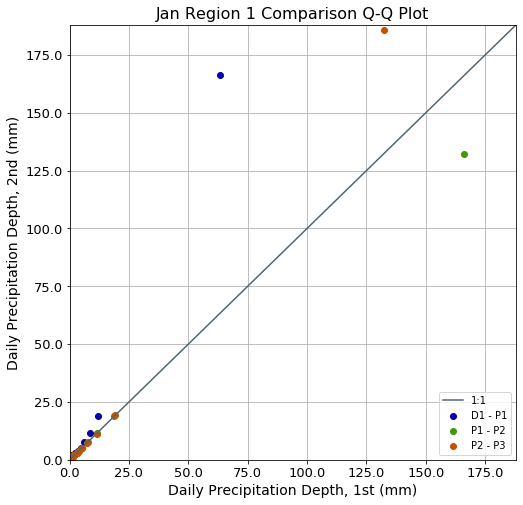

In [121]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Jan1D1Qs, Jan1P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Jan1P1Qs, Jan1P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Jan1P2Qs, Jan1P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.plot( [0.0, max1Qs], [0.0, max1Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Jan Region 1 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max1Qs) )
ax11.set_ylim( (0.0, max1Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

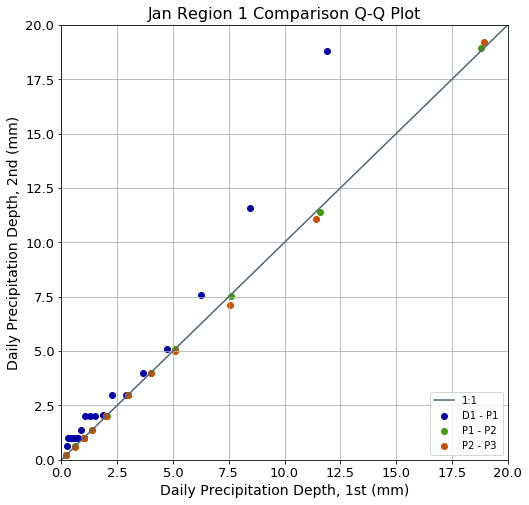

In [120]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Jan1D1Qs, Jan1P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Jan1P1Qs, Jan1P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Jan1P2Qs, Jan1P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.plot( [0.0, max1Qs], [0.0, max1Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Jan Region 1 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 20.0) )
ax11.set_ylim( (0.0, 20.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

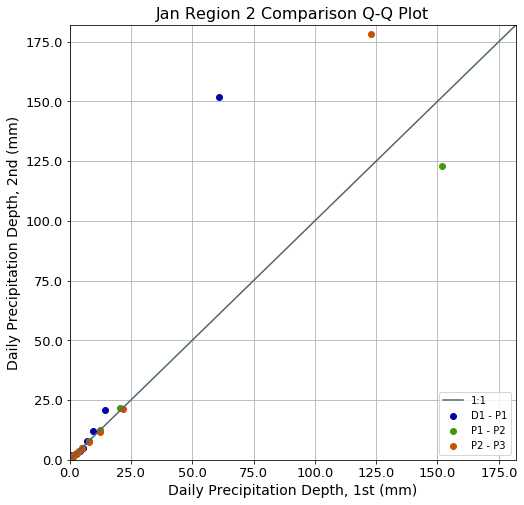

In [122]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Jan2D1Qs, Jan2P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Jan2P1Qs, Jan2P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Jan2P2Qs, Jan2P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.plot( [0.0, max2Qs], [0.0, max2Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Jan Region 2 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max2Qs) )
ax11.set_ylim( (0.0, max2Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

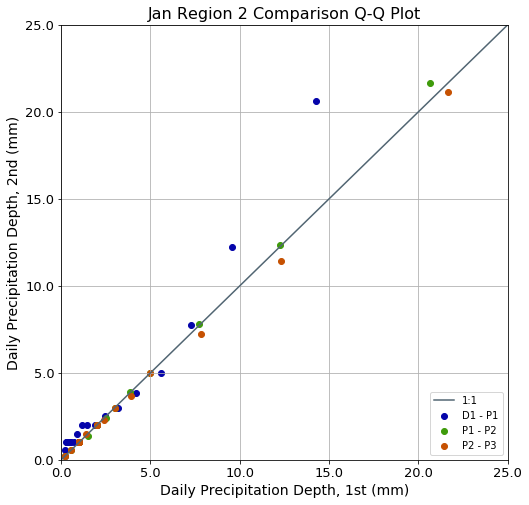

In [123]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Jan2D1Qs, Jan2P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Jan2P1Qs, Jan2P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Jan2P2Qs, Jan2P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.plot( [0.0, max2Qs], [0.0, max2Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Jan Region 2 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

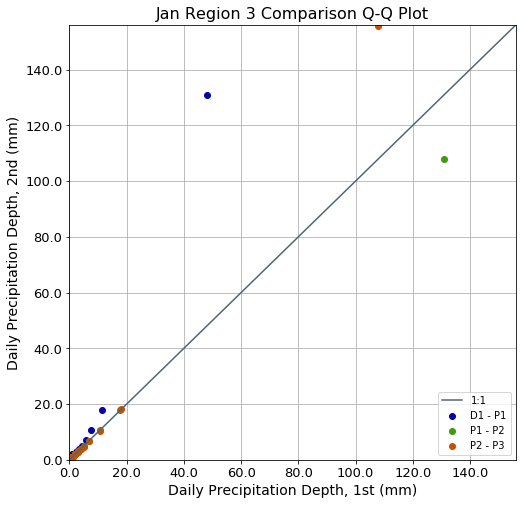

In [124]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Jan3D1Qs, Jan3P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Jan3P1Qs, Jan3P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Jan3P2Qs, Jan3P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.plot( [0.0, max3Qs], [0.0, max3Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Jan Region 3 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max3Qs) )
ax11.set_ylim( (0.0, max3Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

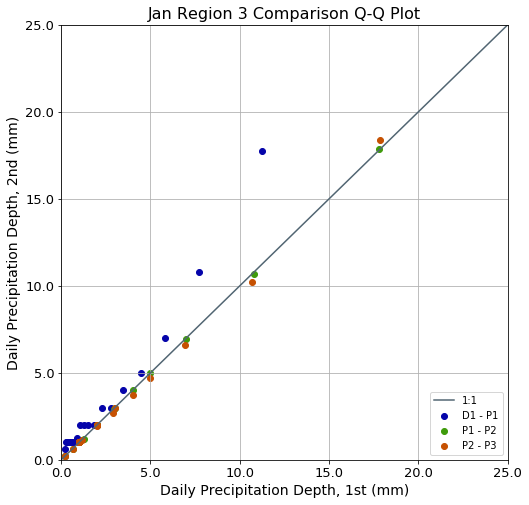

In [125]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Jan3D1Qs, Jan3P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Jan3P1Qs, Jan3P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Jan3P2Qs, Jan3P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.plot( [0.0, max3Qs], [0.0, max3Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Jan Region 3 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

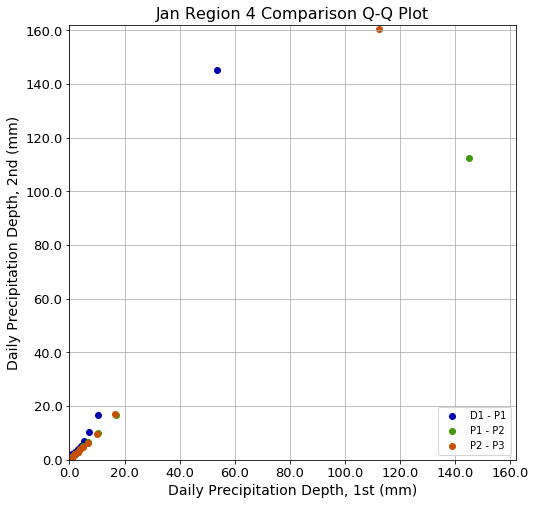

In [126]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Jan4D1Qs, Jan4P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Jan4P1Qs, Jan4P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Jan4P2Qs, Jan4P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.set_title('Jan Region 4 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max4Qs) )
ax11.set_ylim( (0.0, max4Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

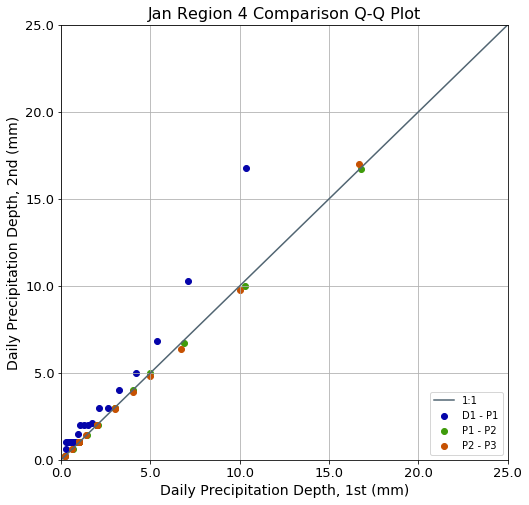

In [127]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Jan4D1Qs, Jan4P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Jan4P1Qs, Jan4P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Jan4P2Qs, Jan4P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.plot( [0.0, max4Qs], [0.0, max4Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Jan Region 4 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

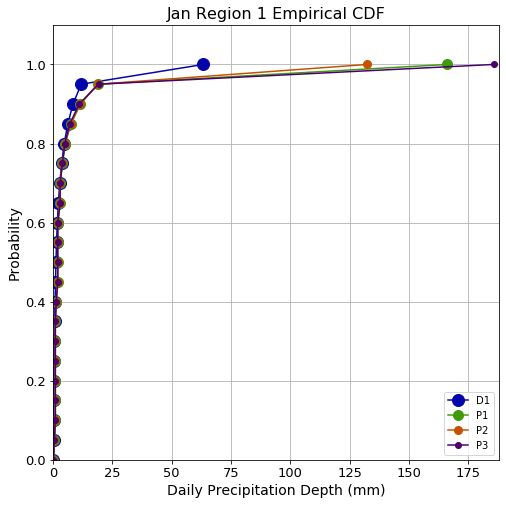

In [132]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Jan1D1Qs, nCompQs, c='xkcd:royal blue', markersize=12, marker='o', 
           linestyle='-', label="D1")
ax11.plot( Jan1P1Qs, nCompQs, c='xkcd:grass green', markersize=10, marker='o', 
           linestyle='-', label="P1")
ax11.plot( Jan1P2Qs, nCompQs, c='xkcd:dark orange', markersize=8, marker='o', 
           linestyle='-', label="P2")
ax11.plot( Jan1P3Qs, nCompQs, c='xkcd:royal purple', markersize=6, marker='o', 
           linestyle='-', label="P3")
ax11.set_title('Jan Region 1 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max1Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

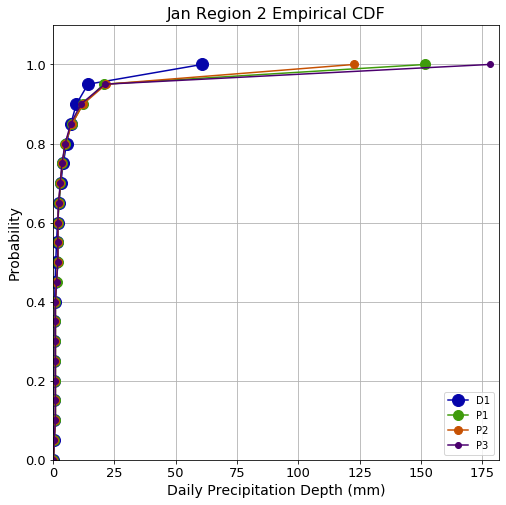

In [133]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Jan2D1Qs, nCompQs, c='xkcd:royal blue', markersize=12, marker='o', 
           linestyle='-', label="D1")
ax11.plot( Jan2P1Qs, nCompQs, c='xkcd:grass green', markersize=10, marker='o', 
           linestyle='-', label="P1")
ax11.plot( Jan2P2Qs, nCompQs, c='xkcd:dark orange', markersize=8, marker='o', 
           linestyle='-', label="P2")
ax11.plot( Jan2P3Qs, nCompQs, c='xkcd:royal purple', markersize=6, marker='o', 
           linestyle='-', label="P3")
ax11.set_title('Jan Region 2 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max2Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

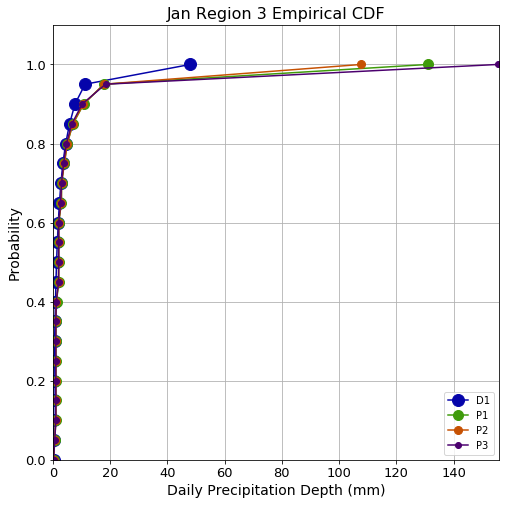

In [134]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Jan3D1Qs, nCompQs, c='xkcd:royal blue', markersize=12, marker='o', 
           linestyle='-', label="D1")
ax11.plot( Jan3P1Qs, nCompQs, c='xkcd:grass green', markersize=10, marker='o', 
           linestyle='-', label="P1")
ax11.plot( Jan3P2Qs, nCompQs, c='xkcd:dark orange', markersize=8, marker='o', 
           linestyle='-', label="P2")
ax11.plot( Jan3P3Qs, nCompQs, c='xkcd:royal purple', markersize=6, marker='o', 
           linestyle='-', label="P3")
ax11.set_title('Jan Region 3 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max3Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

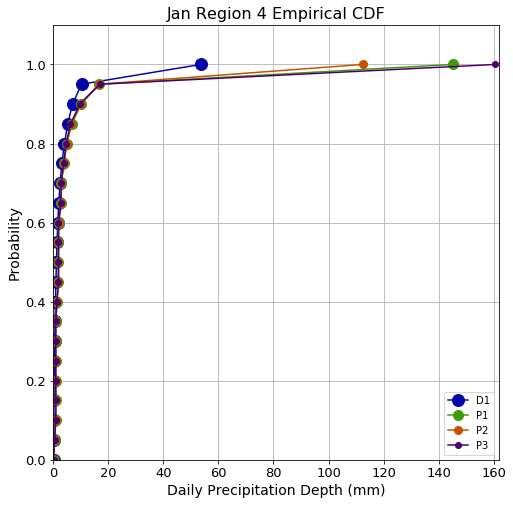

In [135]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Jan4D1Qs, nCompQs, c='xkcd:royal blue', markersize=12, marker='o', 
           linestyle='-', label="D1")
ax11.plot( Jan4P1Qs, nCompQs, c='xkcd:grass green', markersize=10, marker='o', 
           linestyle='-', label="P1")
ax11.plot( Jan4P2Qs, nCompQs, c='xkcd:dark orange', markersize=8, marker='o', 
           linestyle='-', label="P2")
ax11.plot( Jan4P3Qs, nCompQs, c='xkcd:royal purple', markersize=6, marker='o', 
           linestyle='-', label="P3")
ax11.set_title('Jan Region 4 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max4Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### Feb

In [136]:
FebNum = 2

In [137]:
Feb1D1DF = FebD1DF[FebD1DF["PRegion_Id"] == 1].copy()
Feb2D1DF = FebD1DF[FebD1DF["PRegion_Id"] == 2].copy()
Feb3D1DF = FebD1DF[FebD1DF["PRegion_Id"] == 3].copy()
Feb4D1DF = FebD1DF[FebD1DF["PRegion_Id"] == 4].copy()

In [138]:
Feb1P1DF = FebP1DF[FebP1DF["PRegion_Id"] == 1].copy()
Feb2P1DF = FebP1DF[FebP1DF["PRegion_Id"] == 2].copy()
Feb3P1DF = FebP1DF[FebP1DF["PRegion_Id"] == 3].copy()
Feb4P1DF = FebP1DF[FebP1DF["PRegion_Id"] == 4].copy()

In [139]:
Feb1P2DF = FebP2DF[FebP2DF["PRegion_Id"] == 1].copy()
Feb2P2DF = FebP2DF[FebP2DF["PRegion_Id"] == 2].copy()
Feb3P2DF = FebP2DF[FebP2DF["PRegion_Id"] == 3].copy()
Feb4P2DF = FebP2DF[FebP2DF["PRegion_Id"] == 4].copy()

In [140]:
Feb1P3DF = FebP3DF[FebP3DF["PRegion_Id"] == 1].copy()
Feb2P3DF = FebP3DF[FebP3DF["PRegion_Id"] == 2].copy()
Feb3P3DF = FebP3DF[FebP3DF["PRegion_Id"] == 3].copy()
Feb4P3DF = FebP3DF[FebP3DF["PRegion_Id"] == 4].copy()

Bayesian estimates of confidence intervals for mean, variance, and standard deviation of the samples

In [141]:
Feb1D1BSCI = sstats.bayes_mvs( np.array( Feb1D1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Feb2D1BSCI = sstats.bayes_mvs( np.array( Feb2D1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Feb3D1BSCI = sstats.bayes_mvs( np.array( Feb3D1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Feb4D1BSCI = sstats.bayes_mvs( np.array( Feb4D1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )

In [142]:
Feb1P1BSCI = sstats.bayes_mvs( np.array( Feb1P1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Feb2P1BSCI = sstats.bayes_mvs( np.array( Feb2P1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Feb3P1BSCI = sstats.bayes_mvs( np.array( Feb3P1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Feb4P1BSCI = sstats.bayes_mvs( np.array( Feb4P1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )

In [143]:
Feb1P2BSCI = sstats.bayes_mvs( np.array( Feb1P2DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Feb2P2BSCI = sstats.bayes_mvs( np.array( Feb2P2DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Feb3P2BSCI = sstats.bayes_mvs( np.array( Feb3P2DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Feb4P2BSCI = sstats.bayes_mvs( np.array( Feb4P2DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )

In [144]:
Feb1P3BSCI = sstats.bayes_mvs( np.array( Feb1P3DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Feb2P3BSCI = sstats.bayes_mvs( np.array( Feb2P3DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Feb3P3BSCI = sstats.bayes_mvs( np.array( Feb3P3DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Feb4P3BSCI = sstats.bayes_mvs( np.array( Feb4P3DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )

In [145]:
CMonList.append( FebNum )
CZoneList.append( 1 )
SD1Mean.append( Feb1D1BSCI[0][0] )
SD1MeanMinCI.append( Feb1D1BSCI[0][1][0] )
SD1MeanMaxCI.append( Feb1D1BSCI[0][1][1] )
SD1Var.append( Feb1D1BSCI[1][0] )
SD1VarMinCI.append( Feb1D1BSCI[1][1][0] )
SD1VarMaxCI.append( Feb1D1BSCI[1][1][1] )
SD1Std.append( Feb1D1BSCI[2][0] )
SD1StdMinCI.append( Feb1D1BSCI[2][1][0] )
SD1StdMaxCI.append( Feb1D1BSCI[2][1][1] )
CMonList.append( FebNum )
CZoneList.append( 2 )
SD1Mean.append( Feb2D1BSCI[0][0] )
SD1MeanMinCI.append( Feb2D1BSCI[0][1][0] )
SD1MeanMaxCI.append( Feb2D1BSCI[0][1][1] )
SD1Var.append( Feb2D1BSCI[1][0] )
SD1VarMinCI.append( Feb2D1BSCI[1][1][0] )
SD1VarMaxCI.append( Feb2D1BSCI[1][1][1] )
SD1Std.append( Feb2D1BSCI[2][0] )
SD1StdMinCI.append( Feb2D1BSCI[2][1][0] )
SD1StdMaxCI.append( Feb2D1BSCI[2][1][1] )
CMonList.append( FebNum )
CZoneList.append( 3 )
SD1Mean.append( Feb3D1BSCI[0][0] )
SD1MeanMinCI.append( Feb3D1BSCI[0][1][0] )
SD1MeanMaxCI.append( Feb3D1BSCI[0][1][1] )
SD1Var.append( Feb3D1BSCI[1][0] )
SD1VarMinCI.append( Feb3D1BSCI[1][1][0] )
SD1VarMaxCI.append( Feb3D1BSCI[1][1][1] )
SD1Std.append( Feb3D1BSCI[2][0] )
SD1StdMinCI.append( Feb3D1BSCI[2][1][0] )
SD1StdMaxCI.append( Feb3D1BSCI[2][1][1] )
CMonList.append( FebNum )
CZoneList.append( 4 )
SD1Mean.append( Feb4D1BSCI[0][0] )
SD1MeanMinCI.append( Feb4D1BSCI[0][1][0] )
SD1MeanMaxCI.append( Feb4D1BSCI[0][1][1] )
SD1Var.append( Feb4D1BSCI[1][0] )
SD1VarMinCI.append( Feb4D1BSCI[1][1][0] )
SD1VarMaxCI.append( Feb4D1BSCI[1][1][1] )
SD1Std.append( Feb4D1BSCI[2][0] )
SD1StdMinCI.append( Feb4D1BSCI[2][1][0] )
SD1StdMaxCI.append( Feb4D1BSCI[2][1][1] )

In [146]:
SP1Mean.append( Feb1P1BSCI[0][0] )
SP1MeanMinCI.append( Feb1P1BSCI[0][1][0] )
SP1MeanMaxCI.append( Feb1P1BSCI[0][1][1] )
SP1Var.append( Feb1P1BSCI[1][0] )
SP1VarMinCI.append( Feb1P1BSCI[1][1][0] )
SP1VarMaxCI.append( Feb1P1BSCI[1][1][1] )
SP1Std.append( Feb1P1BSCI[2][0] )
SP1StdMinCI.append( Feb1P1BSCI[2][1][0] )
SP1StdMaxCI.append( Feb1P1BSCI[2][1][1] )
SP1Mean.append( Feb2P1BSCI[0][0] )
SP1MeanMinCI.append( Feb2P1BSCI[0][1][0] )
SP1MeanMaxCI.append( Feb2P1BSCI[0][1][1] )
SP1Var.append( Feb2P1BSCI[1][0] )
SP1VarMinCI.append( Feb2P1BSCI[1][1][0] )
SP1VarMaxCI.append( Feb2P1BSCI[1][1][1] )
SP1Std.append( Feb2P1BSCI[2][0] )
SP1StdMinCI.append( Feb2P1BSCI[2][1][0] )
SP1StdMaxCI.append( Feb2P1BSCI[2][1][1] )
SP1Mean.append( Feb3P1BSCI[0][0] )
SP1MeanMinCI.append( Feb3P1BSCI[0][1][0] )
SP1MeanMaxCI.append( Feb3P1BSCI[0][1][1] )
SP1Var.append( Feb3P1BSCI[1][0] )
SP1VarMinCI.append( Feb3P1BSCI[1][1][0] )
SP1VarMaxCI.append( Feb3P1BSCI[1][1][1] )
SP1Std.append( Feb3P1BSCI[2][0] )
SP1StdMinCI.append( Feb3P1BSCI[2][1][0] )
SP1StdMaxCI.append( Feb3P1BSCI[2][1][1] )
SP1Mean.append( Feb4P1BSCI[0][0] )
SP1MeanMinCI.append( Feb4P1BSCI[0][1][0] )
SP1MeanMaxCI.append( Feb4P1BSCI[0][1][1] )
SP1Var.append( Feb4P1BSCI[1][0] )
SP1VarMinCI.append( Feb4P1BSCI[1][1][0] )
SP1VarMaxCI.append( Feb4P1BSCI[1][1][1] )
SP1Std.append( Feb4P1BSCI[2][0] )
SP1StdMinCI.append( Feb4P1BSCI[2][1][0] )
SP1StdMaxCI.append( Feb4P1BSCI[2][1][1] )

In [147]:
SP2Mean.append( Feb1P2BSCI[0][0] )
SP2MeanMinCI.append( Feb1P2BSCI[0][1][0] )
SP2MeanMaxCI.append( Feb1P2BSCI[0][1][1] )
SP2Var.append( Feb1P2BSCI[1][0] )
SP2VarMinCI.append( Feb1P2BSCI[1][1][0] )
SP2VarMaxCI.append( Feb1P2BSCI[1][1][1] )
SP2Std.append( Feb1P2BSCI[2][0] )
SP2StdMinCI.append( Feb1P2BSCI[2][1][0] )
SP2StdMaxCI.append( Feb1P2BSCI[2][1][1] )
SP2Mean.append( Feb2P2BSCI[0][0] )
SP2MeanMinCI.append( Feb2P2BSCI[0][1][0] )
SP2MeanMaxCI.append( Feb2P2BSCI[0][1][1] )
SP2Var.append( Feb2P2BSCI[1][0] )
SP2VarMinCI.append( Feb2P2BSCI[1][1][0] )
SP2VarMaxCI.append( Feb2P2BSCI[1][1][1] )
SP2Std.append( Feb2P2BSCI[2][0] )
SP2StdMinCI.append( Feb2P2BSCI[2][1][0] )
SP2StdMaxCI.append( Feb2P2BSCI[2][1][1] )
SP2Mean.append( Feb3P2BSCI[0][0] )
SP2MeanMinCI.append( Feb3P2BSCI[0][1][0] )
SP2MeanMaxCI.append( Feb3P2BSCI[0][1][1] )
SP2Var.append( Feb3P2BSCI[1][0] )
SP2VarMinCI.append( Feb3P2BSCI[1][1][0] )
SP2VarMaxCI.append( Feb3P2BSCI[1][1][1] )
SP2Std.append( Feb3P2BSCI[2][0] )
SP2StdMinCI.append( Feb3P2BSCI[2][1][0] )
SP2StdMaxCI.append( Feb3P2BSCI[2][1][1] )
SP2Mean.append( Feb4P2BSCI[0][0] )
SP2MeanMinCI.append( Feb4P2BSCI[0][1][0] )
SP2MeanMaxCI.append( Feb4P2BSCI[0][1][1] )
SP2Var.append( Feb4P2BSCI[1][0] )
SP2VarMinCI.append( Feb4P2BSCI[1][1][0] )
SP2VarMaxCI.append( Feb4P2BSCI[1][1][1] )
SP2Std.append( Feb4P2BSCI[2][0] )
SP2StdMinCI.append( Feb4P2BSCI[2][1][0] )
SP2StdMaxCI.append( Feb4P2BSCI[2][1][1] )

In [148]:
SP3Mean.append( Feb1P3BSCI[0][0] )
SP3MeanMinCI.append( Feb1P3BSCI[0][1][0] )
SP3MeanMaxCI.append( Feb1P3BSCI[0][1][1] )
SP3Var.append( Feb1P3BSCI[1][0] )
SP3VarMinCI.append( Feb1P3BSCI[1][1][0] )
SP3VarMaxCI.append( Feb1P3BSCI[1][1][1] )
SP3Std.append( Feb1P3BSCI[2][0] )
SP3StdMinCI.append( Feb1P3BSCI[2][1][0] )
SP3StdMaxCI.append( Feb1P3BSCI[2][1][1] )
SP3Mean.append( Feb2P3BSCI[0][0] )
SP3MeanMinCI.append( Feb2P3BSCI[0][1][0] )
SP3MeanMaxCI.append( Feb2P3BSCI[0][1][1] )
SP3Var.append( Feb2P3BSCI[1][0] )
SP3VarMinCI.append( Feb2P3BSCI[1][1][0] )
SP3VarMaxCI.append( Feb2P3BSCI[1][1][1] )
SP3Std.append( Feb2P3BSCI[2][0] )
SP3StdMinCI.append( Feb2P3BSCI[2][1][0] )
SP3StdMaxCI.append( Feb2P3BSCI[2][1][1] )
SP3Mean.append( Feb3P3BSCI[0][0] )
SP3MeanMinCI.append( Feb3P3BSCI[0][1][0] )
SP3MeanMaxCI.append( Feb3P3BSCI[0][1][1] )
SP3Var.append( Feb3P3BSCI[1][0] )
SP3VarMinCI.append( Feb3P3BSCI[1][1][0] )
SP3VarMaxCI.append( Feb3P3BSCI[1][1][1] )
SP3Std.append( Feb3P3BSCI[2][0] )
SP3StdMinCI.append( Feb3P3BSCI[2][1][0] )
SP3StdMaxCI.append( Feb3P3BSCI[2][1][1] )
SP3Mean.append( Feb4P3BSCI[0][0] )
SP3MeanMinCI.append( Feb4P3BSCI[0][1][0] )
SP3MeanMaxCI.append( Feb4P3BSCI[0][1][1] )
SP3Var.append( Feb4P3BSCI[1][0] )
SP3VarMinCI.append( Feb4P3BSCI[1][1][0] )
SP3VarMaxCI.append( Feb4P3BSCI[1][1][1] )
SP3Std.append( Feb4P3BSCI[2][0] )
SP3StdMinCI.append( Feb4P3BSCI[2][1][0] )
SP3StdMaxCI.append( Feb4P3BSCI[2][1][1] )

#### T-Test

T-Test for the means of two independent samples. Two-sided test for the null hypothesis that 2 independent samples hae identical average values. Test assumes that the populations have identical variances.

If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [149]:
Feb1TTD1toP1 = sstats.ttest_ind( np.array( Feb1D1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Feb1P1DF["Precip_mm"], dtype=np.int32 ) )

In [150]:
Feb1TTD1toP1Pval = Feb1TTD1toP1[1]
print("Region 1, P-Value for LOCA D1 and P1 from same population is: %g" % Feb1TTD1toP1Pval )

Region 1, P-Value for LOCA D1 and P1 from same population is: 0


In [151]:
Feb2TTD1toP1 = sstats.ttest_ind( np.array( Feb2D1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Feb2P1DF["Precip_mm"], dtype=np.int32 ) )

In [152]:
Feb2TTD1toP1Pval = Feb2TTD1toP1[1]
print("Region 2, P-Value for LOCA D1 and P1 from same population is: %g" % Feb2TTD1toP1Pval )

Region 2, P-Value for LOCA D1 and P1 from same population is: 0


In [153]:
Feb3TTD1toP1 = sstats.ttest_ind( np.array( Feb3D1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Feb3P1DF["Precip_mm"], dtype=np.int32 ) )

In [154]:
Feb3TTD1toP1Pval = Feb3TTD1toP1[1]
print("Region 3, P-Value for LOCA D1 and P1 from same population is: %g" % Feb3TTD1toP1Pval )

Region 3, P-Value for LOCA D1 and P1 from same population is: 0


In [155]:
Feb4TTD1toP1 = sstats.ttest_ind( np.array( Feb4D1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Feb4P1DF["Precip_mm"], dtype=np.int32 ) )

In [156]:
Feb4TTD1toP1Pval = Feb4TTD1toP1[1]
print("Region 4, P-Value for LOCA D1 and P1 from same population is: %g" % Feb4TTD1toP1Pval )

Region 4, P-Value for LOCA D1 and P1 from same population is: 1.32574e-300


In [157]:
Feb1TTP1toP2 = sstats.ttest_ind( np.array( Feb1P1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Feb1P2DF["Precip_mm"], dtype=np.int32 ) )

In [158]:
Feb1TTP1toP2Pval = Feb1TTP1toP2[1]
print("Region 1, P-Value for LOCA P1 and P2 from same population is: %g" % Feb1TTP1toP2Pval )

Region 1, P-Value for LOCA P1 and P2 from same population is: 0.0868288


In [159]:
Feb2TTP1toP2 = sstats.ttest_ind( np.array( Feb2P1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Feb2P2DF["Precip_mm"], dtype=np.int32 ) )

In [160]:
Feb2TTP1toP2Pval = Feb2TTP1toP2[1]
print("Region 2, P-Value for LOCA P1 and P2 from same population is: %g" % Feb2TTP1toP2Pval )

Region 2, P-Value for LOCA P1 and P2 from same population is: 0.0197348


In [161]:
Feb3TTP1toP2 = sstats.ttest_ind( np.array( Feb3P1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Feb3P2DF["Precip_mm"], dtype=np.int32 ) )

In [162]:
Feb3TTP1toP2Pval = Feb3TTP1toP2[1]
print("Region 3, P-Value for LOCA P1 and P2 from same population is: %g" % Feb3TTP1toP2Pval )

Region 3, P-Value for LOCA P1 and P2 from same population is: 0.0920959


In [163]:
Feb4TTP1toP2 = sstats.ttest_ind( np.array( Feb4P1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Feb4P2DF["Precip_mm"], dtype=np.int32 ) )

In [164]:
Feb4TTP1toP2Pval = Feb4TTP1toP2[1]
print("Region 4, P-Value for LOCA P1 and P2 from same population is: %g" % Feb4TTP1toP2Pval )

Region 4, P-Value for LOCA P1 and P2 from same population is: 0.691659


In [165]:
Feb1TTP2toP3 = sstats.ttest_ind( np.array( Feb1P2DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Feb1P3DF["Precip_mm"], dtype=np.int32 ) )

In [166]:
Feb1TTP2toP3Pval = Feb1TTP2toP3[1]
print("Region 1, P-Value for LOCA P2 and P3 from same population is: %g" % Feb1TTP2toP3Pval )

Region 1, P-Value for LOCA P2 and P3 from same population is: 0.229509


In [167]:
Feb2TTP2toP3 = sstats.ttest_ind( np.array( Feb2P2DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Feb2P3DF["Precip_mm"], dtype=np.int32 ) )

In [168]:
Feb2TTP2toP3Pval = Feb2TTP2toP3[1]
print("Region 2, P-Value for LOCA P2 and P3 from same population is: %g" % Feb2TTP2toP3Pval )

Region 2, P-Value for LOCA P2 and P3 from same population is: 0.101355


In [169]:
Feb3TTP2toP3 = sstats.ttest_ind( np.array( Feb3P2DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Feb3P3DF["Precip_mm"], dtype=np.int32 ) )

In [170]:
Feb3TTP2toP3Pval = Feb3TTP2toP3[1]
print("Region 3, P-Value for LOCA P2 and P3 from same population is: %g" % Feb3TTP2toP3Pval )

Region 3, P-Value for LOCA P2 and P3 from same population is: 0.509715


In [171]:
Feb4TTP2toP3 = sstats.ttest_ind( np.array( Feb4P2DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Feb4P3DF["Precip_mm"], dtype=np.int32 ) )

In [172]:
Feb4TTP2toP3Pval = Feb4TTP2toP3[1]
print("Region 4, P-Value for LOCA P2 and P3 from same population is: %g" % Feb4TTP2toP3Pval )

Region 4, P-Value for LOCA P2 and P3 from same population is: 0.324185


#### Mann-Whitney Rank Test

Nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample. This test can be used to investigate whether two independent samples were selected from populations having the same distribution.

Null hypothesis, $H_{0}$, is that the distributions of both populations are equal.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of being from the same distribution.

In [173]:
Feb1MWUD1toP1 = sstats.mannwhitneyu( np.array( Feb1D1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Feb1P1DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [174]:
Feb1MWUD1toP1Pval = Feb1MWUD1toP1[1]
print("Region 1, P-Value for LOCA D1 and P1 from same distribution is: %g" % Feb1MWUD1toP1Pval )

Region 1, P-Value for LOCA D1 and P1 from same distribution is: 0


In [175]:
Feb2MWUD1toP1 = sstats.mannwhitneyu( np.array( Feb2D1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Feb2P1DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [176]:
Feb2MWUD1toP1Pval = Feb2MWUD1toP1[1]
print("Region 2, P-Value for LOCA D1 and P1 from same distribution is: %g" % Feb2MWUD1toP1Pval )

Region 2, P-Value for LOCA D1 and P1 from same distribution is: 0


In [177]:
Feb3MWUD1toP1 = sstats.mannwhitneyu( np.array( Feb3D1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Feb3P1DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [178]:
Feb3MWUD1toP1Pval = Feb3MWUD1toP1[1]
print("Region 3, P-Value for LOCA D1 and P1 from same distribution is: %g" % Feb3MWUD1toP1Pval )

Region 3, P-Value for LOCA D1 and P1 from same distribution is: 0


In [179]:
Feb4MWUD1toP1 = sstats.mannwhitneyu( np.array( Feb4D1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Feb4P1DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [180]:
Feb4MWUD1toP1Pval = Feb4MWUD1toP1[1]
print("Region 4, P-Value for LOCA D1 and P1 from same distribution is: %g" % Feb4MWUD1toP1Pval )

Region 4, P-Value for LOCA D1 and P1 from same distribution is: 0


In [181]:
Feb1MWUP1toP2 = sstats.mannwhitneyu( np.array( Feb1P1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Feb1P2DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [182]:
Feb1MWUP1toP2Pval = Feb1MWUP1toP2[1]
print("Region 1, P-Value for LOCA P1 and P2 from same distribution is: %g" % Feb1MWUP1toP2Pval )

Region 1, P-Value for LOCA P1 and P2 from same distribution is: 0.000171425


In [183]:
Feb2MWUP1toP2 = sstats.mannwhitneyu( np.array( Feb2P1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Feb2P2DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [184]:
Feb2MWUP1toP2Pval = Feb2MWUP1toP2[1]
print("Region 2, P-Value for LOCA P1 and P2 from same distribution is: %g" % Feb2MWUP1toP2Pval )

Region 2, P-Value for LOCA P1 and P2 from same distribution is: 5.14997e-06


In [185]:
Feb3MWUP1toP2 = sstats.mannwhitneyu( np.array( Feb3P1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Feb3P2DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [186]:
Feb3MWUP1toP2Pval = Feb3MWUP1toP2[1]
print("Region 3, P-Value for LOCA P1 and P2 from same distribution is: %g" % Feb3MWUP1toP2Pval )

Region 3, P-Value for LOCA P1 and P2 from same distribution is: 5.16187e-15


In [187]:
Feb4MWUP1toP2 = sstats.mannwhitneyu( np.array( Feb4P1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Feb4P2DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [188]:
Feb4MWUP1toP2Pval = Feb4MWUP1toP2[1]
print("Region 4, P-Value for LOCA P1 and P2 from same distribution is: %g" % Feb4MWUP1toP2Pval )

Region 4, P-Value for LOCA P1 and P2 from same distribution is: 0.529564


In [189]:
Feb1MWUP2toP3 = sstats.mannwhitneyu( np.array( Feb1P2DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Feb1P3DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [190]:
Feb1MWUP2toP3Pval = Feb1MWUP2toP3[1]
print("Region 1, P-Value for LOCA P2 and P3 from same distribution is: %g" % Feb1MWUP2toP3Pval )

Region 1, P-Value for LOCA P2 and P3 from same distribution is: 0.202168


In [191]:
Feb2MWUP2toP3 = sstats.mannwhitneyu( np.array( Feb2P2DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Feb2P3DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [192]:
Feb2MWUP2toP3Pval = Feb2MWUP2toP3[1]
print("Region 2, P-Value for LOCA P2 and P3 from same distribution is: %g" % Feb2MWUP2toP3Pval )

Region 2, P-Value for LOCA P2 and P3 from same distribution is: 0.916435


In [193]:
Feb3MWUP2toP3 = sstats.mannwhitneyu( np.array( Feb3P2DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Feb3P3DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [194]:
Feb3MWUP2toP3Pval = Feb3MWUP2toP3[1]
print("Region 3, P-Value for LOCA P2 and P3 from same distribution is: %g" % Feb3MWUP2toP3Pval )

Region 3, P-Value for LOCA P2 and P3 from same distribution is: 0.000820376


In [195]:
Feb4MWUP2toP3 = sstats.mannwhitneyu( np.array( Feb4P2DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Feb4P3DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [196]:
Feb4MWUP2toP3Pval = Feb4MWUP2toP3[1]
print("Region 4, P-Value for LOCA P2 and P3 from same distribution is: %g" % Feb4MWUP2toP3Pval )

Region 4, P-Value for LOCA P2 and P3 from same distribution is: 0.121096


#### Kruskal-Wallis Test

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of the same population median.

In [197]:
Feb1KWD1toP1 = sstats.kruskal( np.array( Feb1D1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Feb1P1DF["Precip_mm"], dtype=np.int32 ) )

In [198]:
Feb1KWD1toP1Pval = Feb1KWD1toP1[1]
print("Region 1, P-Value for LOCA D1 and P1 have the same median is: %g" % Feb1KWD1toP1Pval )

Region 1, P-Value for LOCA D1 and P1 have the same median is: 0


In [199]:
Feb2KWD1toP1 = sstats.kruskal( np.array( Feb2D1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Feb2P1DF["Precip_mm"], dtype=np.int32 ) )

In [200]:
Feb2KWD1toP1Pval = Feb2KWD1toP1[1]
print("Region 2, P-Value for LOCA D1 and P1 have the same median is: %g" % Feb2KWD1toP1Pval )

Region 2, P-Value for LOCA D1 and P1 have the same median is: 0


In [201]:
Feb3KWD1toP1 = sstats.kruskal( np.array( Feb3D1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Feb3P1DF["Precip_mm"], dtype=np.int32 ) )

In [202]:
Feb3KWD1toP1Pval = Feb3KWD1toP1[1]
print("Region 3, P-Value for LOCA D1 and P1 have the same median is: %g" % Feb3KWD1toP1Pval )

Region 3, P-Value for LOCA D1 and P1 have the same median is: 1


In [203]:
Feb4KWD1toP1 = sstats.kruskal( np.array( Feb4D1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Feb4P1DF["Precip_mm"], dtype=np.int32 ) )

In [204]:
Feb4KWD1toP1Pval = Feb4KWD1toP1[1]
print("Region 4, P-Value for LOCA D1 and P1 have the same median is: %g" % Feb4KWD1toP1Pval )

Region 4, P-Value for LOCA D1 and P1 have the same median is: 0


In [205]:
Feb1KWP1toP2 = sstats.kruskal( np.array( Feb1P1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Feb1P2DF["Precip_mm"], dtype=np.int32 ) )

In [206]:
Feb1KWP1toP2Pval = Feb1KWP1toP2[1]
print("Region 1, P-Value for LOCA P1 and P2 have the same median is: %g" % Feb1KWP1toP2Pval )

Region 1, P-Value for LOCA P1 and P2 have the same median is: 1


In [207]:
Feb2KWP1toP2 = sstats.kruskal( np.array( Feb2P1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Feb2P2DF["Precip_mm"], dtype=np.int32 ) )

In [208]:
Feb2KWP1toP2Pval = Feb2KWP1toP2[1]
print("Region 2, P-Value for LOCA P1 and P2 have the same median is: %g" % Feb2KWP1toP2Pval )

Region 2, P-Value for LOCA P1 and P2 have the same median is: 0


In [209]:
Feb3KWP1toP2 = sstats.kruskal( np.array( Feb3P1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Feb3P2DF["Precip_mm"], dtype=np.int32 ) )

In [210]:
Feb3KWP1toP2Pval = Feb3KWP1toP2[1]
print("Region 3, P-Value for LOCA P1 and P2 have the same median is: %g" % Feb3KWP1toP2Pval )

Region 3, P-Value for LOCA P1 and P2 have the same median is: 0


In [211]:
Feb4KWP1toP2 = sstats.kruskal( np.array( Feb4P1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Feb4P2DF["Precip_mm"], dtype=np.int32 ) )

In [212]:
Feb4KWP1toP2Pval = Feb4KWP1toP2[1]
print("Region 4, P-Value for LOCA P1 and P2 have the same median is: %g" % Feb4KWP1toP2Pval )

Region 4, P-Value for LOCA P1 and P2 have the same median is: 0


In [213]:
Feb1KWP2toP3 = sstats.kruskal( np.array( Feb1P2DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Feb1P3DF["Precip_mm"], dtype=np.int32 ) )

In [214]:
Feb1KWP2toP3Pval = Feb1KWP2toP3[1]
print("Region 1, P-Value for LOCA P2 and P3 have the same median is: %g" % Feb1KWP2toP3Pval )

Region 1, P-Value for LOCA P2 and P3 have the same median is: 1


In [215]:
Feb2KWP2toP3 = sstats.kruskal( np.array( Feb2P2DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Feb2P3DF["Precip_mm"], dtype=np.int32 ) )

In [216]:
Feb2KWP2toP3Pval = Feb2KWP2toP3[1]
print("Region 2, P-Value for LOCA P2 and P3 have the same median is: %g" % Feb2KWP2toP3Pval )

Region 2, P-Value for LOCA P2 and P3 have the same median is: 1


In [217]:
Feb3KWP2toP3 = sstats.kruskal( np.array( Feb3P2DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Feb3P3DF["Precip_mm"], dtype=np.int32 ) )

In [218]:
Feb3KWP2toP3Pval = Feb3KWP2toP3[1]
print("Region 3, P-Value for LOCA P2 and P3 have the same median is: %g" % Feb3KWP2toP3Pval )

Region 3, P-Value for LOCA P2 and P3 have the same median is: 0


In [219]:
Feb4KWP2toP3 = sstats.kruskal( np.array( Feb4P2DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Feb4P3DF["Precip_mm"], dtype=np.int32 ) )

In [220]:
Feb4KWP2toP3Pval = Feb4KWP2toP3[1]
print("Region 4, P-Value for LOCA P2 and P3 have the same median is: %g" % Feb4KWP2toP3Pval )

Region 4, P-Value for LOCA P2 and P3 have the same median is: 0


In [221]:
Feb4P3DF["Precip_mm"].median(), Feb4P2DF["Precip_mm"].median(), Feb4P1DF["Precip_mm"].median(), Feb4D1DF["Precip_mm"].median()

(2.0, 2.0, 2.0, 1.5875999927520752)

#### Plots

In [222]:
Feb1D1Qs = Feb1D1DF["Precip_mm"].quantile(q=nCompQs)
Feb1P1Qs = Feb1P1DF["Precip_mm"].quantile(q=nCompQs)
Feb1P2Qs = Feb1P2DF["Precip_mm"].quantile(q=nCompQs)
Feb1P3Qs = Feb1P3DF["Precip_mm"].quantile(q=nCompQs)
Feb2D1Qs = Feb2D1DF["Precip_mm"].quantile(q=nCompQs)
Feb2P1Qs = Feb2P1DF["Precip_mm"].quantile(q=nCompQs)
Feb2P2Qs = Feb2P2DF["Precip_mm"].quantile(q=nCompQs)
Feb2P3Qs = Feb2P3DF["Precip_mm"].quantile(q=nCompQs)
Feb3D1Qs = Feb3D1DF["Precip_mm"].quantile(q=nCompQs)
Feb3P1Qs = Feb3P1DF["Precip_mm"].quantile(q=nCompQs)
Feb3P2Qs = Feb3P2DF["Precip_mm"].quantile(q=nCompQs)
Feb3P3Qs = Feb3P3DF["Precip_mm"].quantile(q=nCompQs)
Feb4D1Qs = Feb4D1DF["Precip_mm"].quantile(q=nCompQs)
Feb4P1Qs = Feb4P1DF["Precip_mm"].quantile(q=nCompQs)
Feb4P2Qs = Feb4P2DF["Precip_mm"].quantile(q=nCompQs)
Feb4P3Qs = Feb4P3DF["Precip_mm"].quantile(q=nCompQs)

In [223]:
max1Qs = max( Feb1D1Qs.max(), Feb1P1Qs.max(), Feb1P2Qs.max(), Feb1P3Qs.max() )
max1Qs = round(max1Qs) + 2.0
max1Qs

187.0

In [224]:
max2Qs = max( Feb2D1Qs.max(), Feb2P1Qs.max(), Feb2P2Qs.max(), Feb2P3Qs.max() )
max2Qs = round(max2Qs) + 4.0
max2Qs

208.0

In [225]:
max3Qs = max( Feb3D1Qs.max(), Feb3P1Qs.max(), Feb3P2Qs.max(), Feb3P3Qs.max() )
max3Qs = round(max3Qs) + 1.0
max3Qs

246.0

In [226]:
max4Qs = max( Feb4D1Qs.max(), Feb4P1Qs.max(), Feb4P2Qs.max(), Feb4P3Qs.max() )
max4Qs = round(max4Qs) + 1.0
max4Qs

204.0

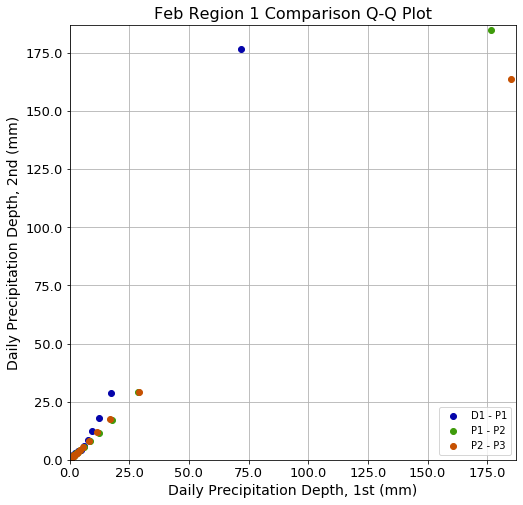

In [227]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Feb1D1Qs, Feb1P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Feb1P1Qs, Feb1P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Feb1P2Qs, Feb1P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.set_title('Feb Region 1 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max1Qs) )
ax11.set_ylim( (0.0, max1Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

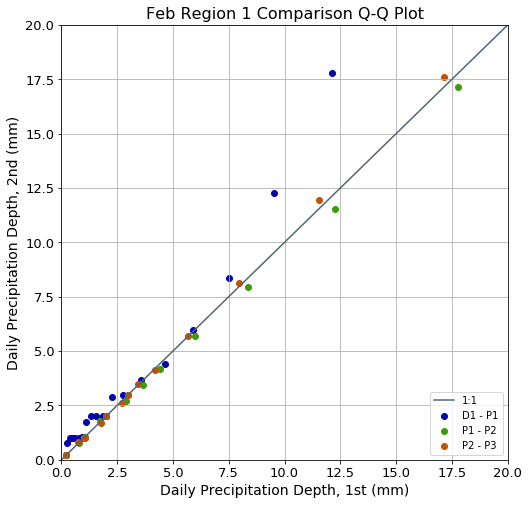

In [228]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Feb1D1Qs, Feb1P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Feb1P1Qs, Feb1P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Feb1P2Qs, Feb1P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.plot( [0.0, max1Qs], [0.0, max1Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Feb Region 1 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 20.0) )
ax11.set_ylim( (0.0, 20.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

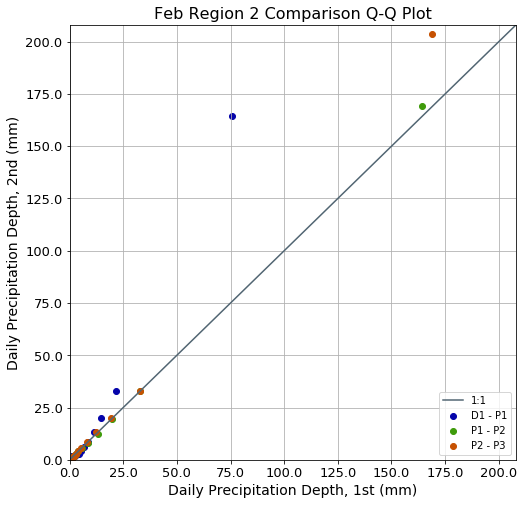

In [229]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Feb2D1Qs, Feb2P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Feb2P1Qs, Feb2P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Feb2P2Qs, Feb2P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.plot( [0.0, max2Qs], [0.0, max2Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Feb Region 2 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max2Qs) )
ax11.set_ylim( (0.0, max2Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

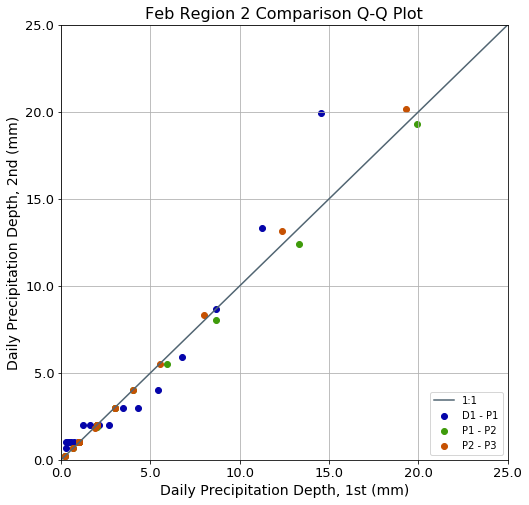

In [230]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Feb2D1Qs, Feb2P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Feb2P1Qs, Feb2P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Feb2P2Qs, Feb2P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.plot( [0.0, max2Qs], [0.0, max2Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Feb Region 2 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

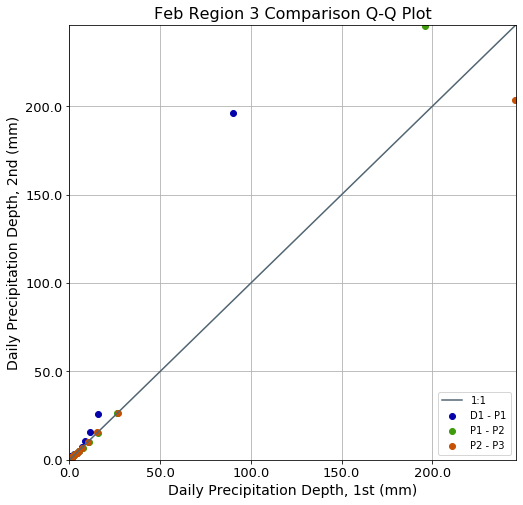

In [231]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Feb3D1Qs, Feb3P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Feb3P1Qs, Feb3P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Feb3P2Qs, Feb3P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.plot( [0.0, max3Qs], [0.0, max3Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Feb Region 3 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max3Qs) )
ax11.set_ylim( (0.0, max3Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

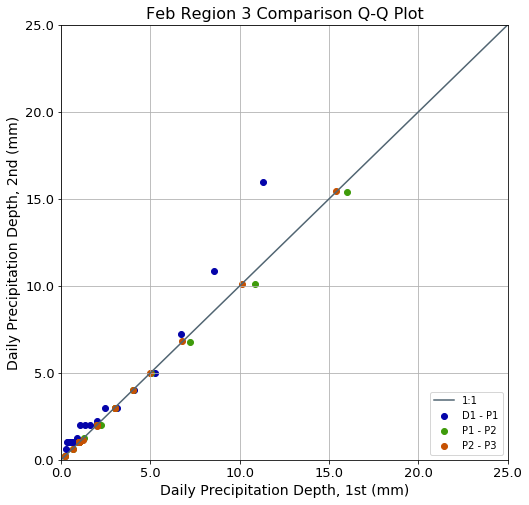

In [232]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Feb3D1Qs, Feb3P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Feb3P1Qs, Feb3P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Feb3P2Qs, Feb3P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.plot( [0.0, max3Qs], [0.0, max3Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Feb Region 3 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

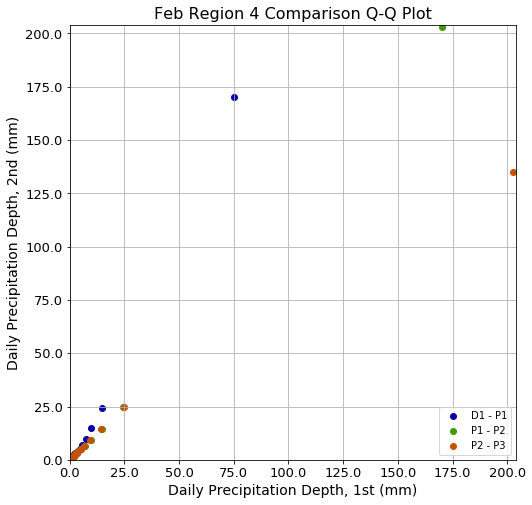

In [233]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Feb4D1Qs, Feb4P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Feb4P1Qs, Feb4P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Feb4P2Qs, Feb4P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.set_title('Feb Region 4 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max4Qs) )
ax11.set_ylim( (0.0, max4Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

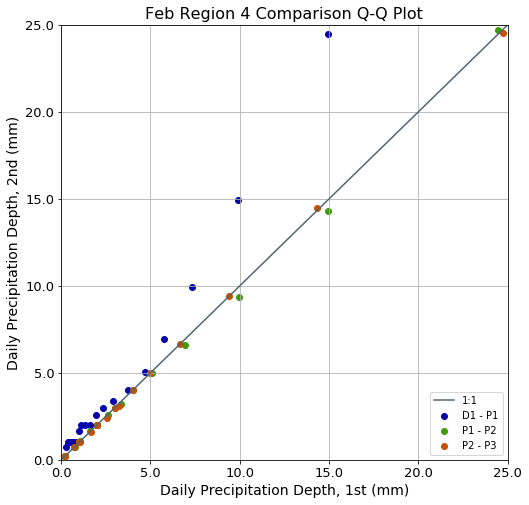

In [234]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Feb4D1Qs, Feb4P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Feb4P1Qs, Feb4P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Feb4P2Qs, Feb4P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.plot( [0.0, max4Qs], [0.0, max4Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Feb Region 4 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

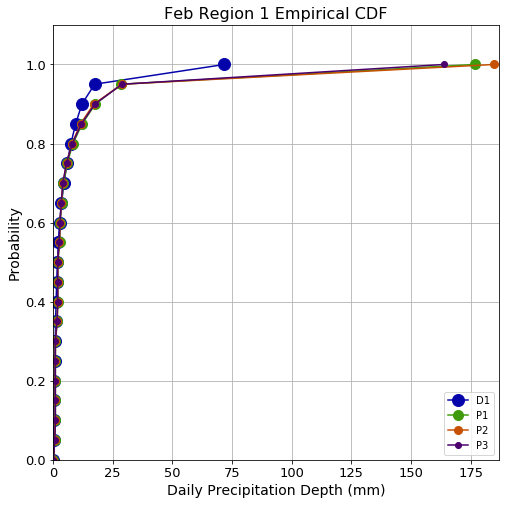

In [235]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Feb1D1Qs, nCompQs, c='xkcd:royal blue', markersize=12, marker='o', 
           linestyle='-', label="D1")
ax11.plot( Feb1P1Qs, nCompQs, c='xkcd:grass green', markersize=10, marker='o', 
           linestyle='-', label="P1")
ax11.plot( Feb1P2Qs, nCompQs, c='xkcd:dark orange', markersize=8, marker='o', 
           linestyle='-', label="P2")
ax11.plot( Feb1P3Qs, nCompQs, c='xkcd:royal purple', markersize=6, marker='o', 
           linestyle='-', label="P3")
ax11.set_title('Feb Region 1 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max1Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

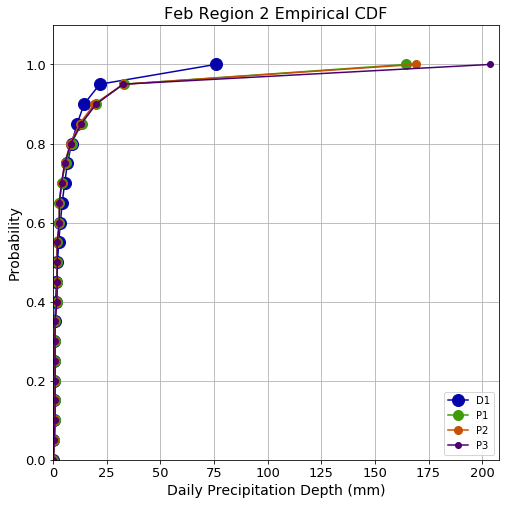

In [236]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Feb2D1Qs, nCompQs, c='xkcd:royal blue', markersize=12, marker='o', 
           linestyle='-', label="D1")
ax11.plot( Feb2P1Qs, nCompQs, c='xkcd:grass green', markersize=10, marker='o', 
           linestyle='-', label="P1")
ax11.plot( Feb2P2Qs, nCompQs, c='xkcd:dark orange', markersize=8, marker='o', 
           linestyle='-', label="P2")
ax11.plot( Feb2P3Qs, nCompQs, c='xkcd:royal purple', markersize=6, marker='o', 
           linestyle='-', label="P3")
ax11.set_title('Feb Region 2 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max2Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

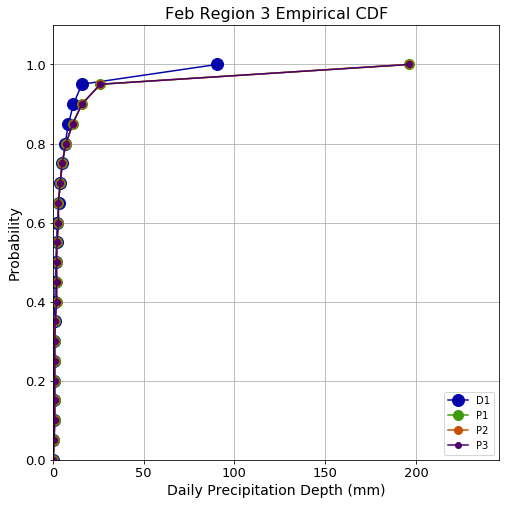

In [237]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Feb3D1Qs, nCompQs, c='xkcd:royal blue', markersize=12, marker='o', 
           linestyle='-', label="D1")
ax11.plot( Feb3P1Qs, nCompQs, c='xkcd:grass green', markersize=10, marker='o', 
           linestyle='-', label="P1")
ax11.plot( Feb3P1Qs, nCompQs, c='xkcd:dark orange', markersize=8, marker='o', 
           linestyle='-', label="P2")
ax11.plot( Feb3P1Qs, nCompQs, c='xkcd:royal purple', markersize=6, marker='o', 
           linestyle='-', label="P3")
ax11.set_title('Feb Region 3 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max3Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

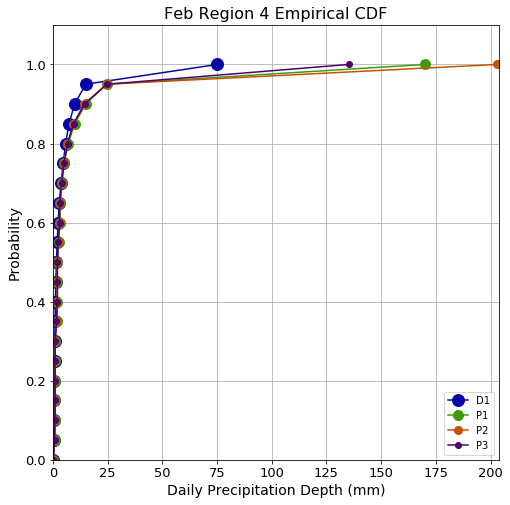

In [238]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Feb4D1Qs, nCompQs, c='xkcd:royal blue', markersize=12, marker='o', 
           linestyle='-', label="D1")
ax11.plot( Feb4P1Qs, nCompQs, c='xkcd:grass green', markersize=10, marker='o', 
           linestyle='-', label="P1")
ax11.plot( Feb4P2Qs, nCompQs, c='xkcd:dark orange', markersize=8, marker='o', 
           linestyle='-', label="P2")
ax11.plot( Feb4P3Qs, nCompQs, c='xkcd:royal purple', markersize=6, marker='o', 
           linestyle='-', label="P3")
ax11.set_title('Feb Region 4 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max4Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### Mar

In [239]:
MarNum = 3

In [240]:
Mar1D1DF = MarD1DF[MarD1DF["PRegion_Id"] == 1].copy()
Mar2D1DF = MarD1DF[MarD1DF["PRegion_Id"] == 2].copy()
Mar3D1DF = MarD1DF[MarD1DF["PRegion_Id"] == 3].copy()
Mar4D1DF = MarD1DF[MarD1DF["PRegion_Id"] == 4].copy()

In [241]:
Mar1P1DF = MarP1DF[MarP1DF["PRegion_Id"] == 1].copy()
Mar2P1DF = MarP1DF[MarP1DF["PRegion_Id"] == 2].copy()
Mar3P1DF = MarP1DF[MarP1DF["PRegion_Id"] == 3].copy()
Mar4P1DF = MarP1DF[MarP1DF["PRegion_Id"] == 4].copy()

In [242]:
Mar1P2DF = MarP2DF[MarP2DF["PRegion_Id"] == 1].copy()
Mar2P2DF = MarP2DF[MarP2DF["PRegion_Id"] == 2].copy()
Mar3P2DF = MarP2DF[MarP2DF["PRegion_Id"] == 3].copy()
Mar4P2DF = MarP2DF[MarP2DF["PRegion_Id"] == 4].copy()

In [243]:
Mar1P3DF = MarP3DF[MarP3DF["PRegion_Id"] == 1].copy()
Mar2P3DF = MarP3DF[MarP3DF["PRegion_Id"] == 2].copy()
Mar3P3DF = MarP3DF[MarP3DF["PRegion_Id"] == 3].copy()
Mar4P3DF = MarP3DF[MarP3DF["PRegion_Id"] == 4].copy()

Bayesian estimates of confidence intervals for mean, variance, and standard deviation of the samples

In [244]:
Mar1D1BSCI = sstats.bayes_mvs( np.array( Mar1D1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Mar2D1BSCI = sstats.bayes_mvs( np.array( Mar2D1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Mar3D1BSCI = sstats.bayes_mvs( np.array( Mar3D1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Mar4D1BSCI = sstats.bayes_mvs( np.array( Mar4D1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )

In [245]:
Mar1P1BSCI = sstats.bayes_mvs( np.array( Mar1P1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Mar2P1BSCI = sstats.bayes_mvs( np.array( Mar2P1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Mar3P1BSCI = sstats.bayes_mvs( np.array( Mar3P1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Mar4P1BSCI = sstats.bayes_mvs( np.array( Mar4P1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )

In [246]:
Mar1P2BSCI = sstats.bayes_mvs( np.array( Mar1P2DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Mar2P2BSCI = sstats.bayes_mvs( np.array( Mar2P2DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Mar3P2BSCI = sstats.bayes_mvs( np.array( Mar3P2DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Mar4P2BSCI = sstats.bayes_mvs( np.array( Mar4P2DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )

In [247]:
Mar1P3BSCI = sstats.bayes_mvs( np.array( Mar1P3DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Mar2P3BSCI = sstats.bayes_mvs( np.array( Mar2P3DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Mar3P3BSCI = sstats.bayes_mvs( np.array( Mar3P3DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Mar4P3BSCI = sstats.bayes_mvs( np.array( Mar4P3DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )

In [248]:
CMonList.append( MarNum )
CZoneList.append( 1 )
SD1Mean.append( Mar1D1BSCI[0][0] )
SD1MeanMinCI.append( Mar1D1BSCI[0][1][0] )
SD1MeanMaxCI.append( Mar1D1BSCI[0][1][1] )
SD1Var.append( Mar1D1BSCI[1][0] )
SD1VarMinCI.append( Mar1D1BSCI[1][1][0] )
SD1VarMaxCI.append( Mar1D1BSCI[1][1][1] )
SD1Std.append( Mar1D1BSCI[2][0] )
SD1StdMinCI.append( Mar1D1BSCI[2][1][0] )
SD1StdMaxCI.append( Mar1D1BSCI[2][1][1] )
CMonList.append( MarNum )
CZoneList.append( 2 )
SD1Mean.append( Mar2D1BSCI[0][0] )
SD1MeanMinCI.append( Mar2D1BSCI[0][1][0] )
SD1MeanMaxCI.append( Mar2D1BSCI[0][1][1] )
SD1Var.append( Mar2D1BSCI[1][0] )
SD1VarMinCI.append( Mar2D1BSCI[1][1][0] )
SD1VarMaxCI.append( Mar2D1BSCI[1][1][1] )
SD1Std.append( Mar2D1BSCI[2][0] )
SD1StdMinCI.append( Mar2D1BSCI[2][1][0] )
SD1StdMaxCI.append( Mar2D1BSCI[2][1][1] )
CMonList.append( MarNum )
CZoneList.append( 3 )
SD1Mean.append( Mar3D1BSCI[0][0] )
SD1MeanMinCI.append( Mar3D1BSCI[0][1][0] )
SD1MeanMaxCI.append( Mar3D1BSCI[0][1][1] )
SD1Var.append( Mar3D1BSCI[1][0] )
SD1VarMinCI.append( Mar3D1BSCI[1][1][0] )
SD1VarMaxCI.append( Mar3D1BSCI[1][1][1] )
SD1Std.append( Mar3D1BSCI[2][0] )
SD1StdMinCI.append( Mar3D1BSCI[2][1][0] )
SD1StdMaxCI.append( Mar3D1BSCI[2][1][1] )
CMonList.append( MarNum )
CZoneList.append( 4 )
SD1Mean.append( Mar4D1BSCI[0][0] )
SD1MeanMinCI.append( Mar4D1BSCI[0][1][0] )
SD1MeanMaxCI.append( Mar4D1BSCI[0][1][1] )
SD1Var.append( Mar4D1BSCI[1][0] )
SD1VarMinCI.append( Mar4D1BSCI[1][1][0] )
SD1VarMaxCI.append( Mar4D1BSCI[1][1][1] )
SD1Std.append( Mar4D1BSCI[2][0] )
SD1StdMinCI.append( Mar4D1BSCI[2][1][0] )
SD1StdMaxCI.append( Mar4D1BSCI[2][1][1] )

In [249]:
SP1Mean.append( Mar1P1BSCI[0][0] )
SP1MeanMinCI.append( Mar1P1BSCI[0][1][0] )
SP1MeanMaxCI.append( Mar1P1BSCI[0][1][1] )
SP1Var.append( Mar1P1BSCI[1][0] )
SP1VarMinCI.append( Mar1P1BSCI[1][1][0] )
SP1VarMaxCI.append( Mar1P1BSCI[1][1][1] )
SP1Std.append( Mar1P1BSCI[2][0] )
SP1StdMinCI.append( Mar1P1BSCI[2][1][0] )
SP1StdMaxCI.append( Mar1P1BSCI[2][1][1] )
SP1Mean.append( Mar2P1BSCI[0][0] )
SP1MeanMinCI.append( Mar2P1BSCI[0][1][0] )
SP1MeanMaxCI.append( Mar2P1BSCI[0][1][1] )
SP1Var.append( Mar2P1BSCI[1][0] )
SP1VarMinCI.append( Mar2P1BSCI[1][1][0] )
SP1VarMaxCI.append( Mar2P1BSCI[1][1][1] )
SP1Std.append( Mar2P1BSCI[2][0] )
SP1StdMinCI.append( Mar2P1BSCI[2][1][0] )
SP1StdMaxCI.append( Mar2P1BSCI[2][1][1] )
SP1Mean.append( Mar3P1BSCI[0][0] )
SP1MeanMinCI.append( Mar3P1BSCI[0][1][0] )
SP1MeanMaxCI.append( Mar3P1BSCI[0][1][1] )
SP1Var.append( Mar3P1BSCI[1][0] )
SP1VarMinCI.append( Mar3P1BSCI[1][1][0] )
SP1VarMaxCI.append( Mar3P1BSCI[1][1][1] )
SP1Std.append( Mar3P1BSCI[2][0] )
SP1StdMinCI.append( Mar3P1BSCI[2][1][0] )
SP1StdMaxCI.append( Mar3P1BSCI[2][1][1] )
SP1Mean.append( Mar4P1BSCI[0][0] )
SP1MeanMinCI.append( Mar4P1BSCI[0][1][0] )
SP1MeanMaxCI.append( Mar4P1BSCI[0][1][1] )
SP1Var.append( Mar4P1BSCI[1][0] )
SP1VarMinCI.append( Mar4P1BSCI[1][1][0] )
SP1VarMaxCI.append( Mar4P1BSCI[1][1][1] )
SP1Std.append( Mar4P1BSCI[2][0] )
SP1StdMinCI.append( Mar4P1BSCI[2][1][0] )
SP1StdMaxCI.append( Mar4P1BSCI[2][1][1] )

In [250]:
SP2Mean.append( Mar1P2BSCI[0][0] )
SP2MeanMinCI.append( Mar1P2BSCI[0][1][0] )
SP2MeanMaxCI.append( Mar1P2BSCI[0][1][1] )
SP2Var.append( Mar1P2BSCI[1][0] )
SP2VarMinCI.append( Mar1P2BSCI[1][1][0] )
SP2VarMaxCI.append( Mar1P2BSCI[1][1][1] )
SP2Std.append( Mar1P2BSCI[2][0] )
SP2StdMinCI.append( Mar1P2BSCI[2][1][0] )
SP2StdMaxCI.append( Mar1P2BSCI[2][1][1] )
SP2Mean.append( Mar2P2BSCI[0][0] )
SP2MeanMinCI.append( Mar2P2BSCI[0][1][0] )
SP2MeanMaxCI.append( Mar2P2BSCI[0][1][1] )
SP2Var.append( Mar2P2BSCI[1][0] )
SP2VarMinCI.append( Mar2P2BSCI[1][1][0] )
SP2VarMaxCI.append( Mar2P2BSCI[1][1][1] )
SP2Std.append( Mar2P2BSCI[2][0] )
SP2StdMinCI.append( Mar2P2BSCI[2][1][0] )
SP2StdMaxCI.append( Mar2P2BSCI[2][1][1] )
SP2Mean.append( Mar3P2BSCI[0][0] )
SP2MeanMinCI.append( Mar3P2BSCI[0][1][0] )
SP2MeanMaxCI.append( Mar3P2BSCI[0][1][1] )
SP2Var.append( Mar3P2BSCI[1][0] )
SP2VarMinCI.append( Mar3P2BSCI[1][1][0] )
SP2VarMaxCI.append( Mar3P2BSCI[1][1][1] )
SP2Std.append( Mar3P2BSCI[2][0] )
SP2StdMinCI.append( Mar3P2BSCI[2][1][0] )
SP2StdMaxCI.append( Mar3P2BSCI[2][1][1] )
SP2Mean.append( Mar4P2BSCI[0][0] )
SP2MeanMinCI.append( Mar4P2BSCI[0][1][0] )
SP2MeanMaxCI.append( Mar4P2BSCI[0][1][1] )
SP2Var.append( Mar4P2BSCI[1][0] )
SP2VarMinCI.append( Mar4P2BSCI[1][1][0] )
SP2VarMaxCI.append( Mar4P2BSCI[1][1][1] )
SP2Std.append( Mar4P2BSCI[2][0] )
SP2StdMinCI.append( Mar4P2BSCI[2][1][0] )
SP2StdMaxCI.append( Mar4P2BSCI[2][1][1] )

In [251]:
SP3Mean.append( Mar1P3BSCI[0][0] )
SP3MeanMinCI.append( Mar1P3BSCI[0][1][0] )
SP3MeanMaxCI.append( Mar1P3BSCI[0][1][1] )
SP3Var.append( Mar1P3BSCI[1][0] )
SP3VarMinCI.append( Mar1P3BSCI[1][1][0] )
SP3VarMaxCI.append( Mar1P3BSCI[1][1][1] )
SP3Std.append( Mar1P3BSCI[2][0] )
SP3StdMinCI.append( Mar1P3BSCI[2][1][0] )
SP3StdMaxCI.append( Mar1P3BSCI[2][1][1] )
SP3Mean.append( Mar2P3BSCI[0][0] )
SP3MeanMinCI.append( Mar2P3BSCI[0][1][0] )
SP3MeanMaxCI.append( Mar2P3BSCI[0][1][1] )
SP3Var.append( Mar2P3BSCI[1][0] )
SP3VarMinCI.append( Mar2P3BSCI[1][1][0] )
SP3VarMaxCI.append( Mar2P3BSCI[1][1][1] )
SP3Std.append( Mar2P3BSCI[2][0] )
SP3StdMinCI.append( Mar2P3BSCI[2][1][0] )
SP3StdMaxCI.append( Mar2P3BSCI[2][1][1] )
SP3Mean.append( Mar3P3BSCI[0][0] )
SP3MeanMinCI.append( Mar3P3BSCI[0][1][0] )
SP3MeanMaxCI.append( Mar3P3BSCI[0][1][1] )
SP3Var.append( Mar3P3BSCI[1][0] )
SP3VarMinCI.append( Mar3P3BSCI[1][1][0] )
SP3VarMaxCI.append( Mar3P3BSCI[1][1][1] )
SP3Std.append( Mar3P3BSCI[2][0] )
SP3StdMinCI.append( Mar3P3BSCI[2][1][0] )
SP3StdMaxCI.append( Mar3P3BSCI[2][1][1] )
SP3Mean.append( Mar4P3BSCI[0][0] )
SP3MeanMinCI.append( Mar4P3BSCI[0][1][0] )
SP3MeanMaxCI.append( Mar4P3BSCI[0][1][1] )
SP3Var.append( Mar4P3BSCI[1][0] )
SP3VarMinCI.append( Mar4P3BSCI[1][1][0] )
SP3VarMaxCI.append( Mar4P3BSCI[1][1][1] )
SP3Std.append( Mar4P3BSCI[2][0] )
SP3StdMinCI.append( Mar4P3BSCI[2][1][0] )
SP3StdMaxCI.append( Mar4P3BSCI[2][1][1] )

#### T-Test

T-Test for the means of two independent samples. Two-sided test for the null hypothesis that 2 independent samples hae identical average values. Test assumes that the populations have identical variances.

If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [252]:
Mar1TTD1toP1 = sstats.ttest_ind( np.array( Mar1D1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Mar1P1DF["Precip_mm"], dtype=np.int32 ) )

In [253]:
Mar1TTD1toP1Pval = Mar1TTD1toP1[1]
print("Region 1, P-Value for LOCA D1 and P1 from same population is: %g" % Mar1TTD1toP1Pval )

Region 1, P-Value for LOCA D1 and P1 from same population is: 0


In [254]:
Mar2TTD1toP1 = sstats.ttest_ind( np.array( Mar2D1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Mar2P1DF["Precip_mm"], dtype=np.int32 ) )

In [255]:
Mar2TTD1toP1Pval = Mar2TTD1toP1[1]
print("Region 2, P-Value for LOCA D1 and P1 from same population is: %g" % Mar2TTD1toP1Pval )

Region 2, P-Value for LOCA D1 and P1 from same population is: 0


In [256]:
Mar3TTD1toP1 = sstats.ttest_ind( np.array( Mar3D1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Mar3P1DF["Precip_mm"], dtype=np.int32 ) )

In [257]:
Mar3TTD1toP1Pval = Mar3TTD1toP1[1]
print("Region 3, P-Value for LOCA D1 and P1 from same population is: %g" % Mar3TTD1toP1Pval )

Region 3, P-Value for LOCA D1 and P1 from same population is: 0


In [258]:
Mar4TTD1toP1 = sstats.ttest_ind( np.array( Mar4D1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Mar4P1DF["Precip_mm"], dtype=np.int32 ) )

In [259]:
Mar4TTD1toP1Pval = Mar4TTD1toP1[1]
print("Region 4, P-Value for LOCA D1 and P1 from same population is: %g" % Mar4TTD1toP1Pval )

Region 4, P-Value for LOCA D1 and P1 from same population is: 0


In [260]:
Mar1TTP1toP2 = sstats.ttest_ind( np.array( Mar1P1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Mar1P2DF["Precip_mm"], dtype=np.int32 ) )

In [261]:
Mar1TTP1toP2Pval = Mar1TTP1toP2[1]
print("Region 1, P-Value for LOCA P1 and P2 from same population is: %g" % Mar1TTP1toP2Pval )

Region 1, P-Value for LOCA P1 and P2 from same population is: 3.48054e-15


In [262]:
Mar2TTP1toP2 = sstats.ttest_ind( np.array( Mar2P1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Mar2P2DF["Precip_mm"], dtype=np.int32 ) )

In [263]:
Mar2TTP1toP2Pval = Mar2TTP1toP2[1]
print("Region 2, P-Value for LOCA P1 and P2 from same population is: %g" % Mar2TTP1toP2Pval )

Region 2, P-Value for LOCA P1 and P2 from same population is: 0.29534


In [264]:
Mar3TTP1toP2 = sstats.ttest_ind( np.array( Mar3P1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Mar3P2DF["Precip_mm"], dtype=np.int32 ) )

In [265]:
Mar3TTP1toP2Pval = Mar3TTP1toP2[1]
print("Region 3, P-Value for LOCA P1 and P2 from same population is: %g" % Mar3TTP1toP2Pval )

Region 3, P-Value for LOCA P1 and P2 from same population is: 2.38164e-06


In [266]:
Mar4TTP1toP2 = sstats.ttest_ind( np.array( Mar4P1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Mar4P2DF["Precip_mm"], dtype=np.int32 ) )

In [267]:
Mar4TTP1toP2Pval = Mar4TTP1toP2[1]
print("Region 4, P-Value for LOCA P1 and P2 from same population is: %g" % Mar4TTP1toP2Pval )

Region 4, P-Value for LOCA P1 and P2 from same population is: 2.98498e-25


In [268]:
Mar1TTP2toP3 = sstats.ttest_ind( np.array( Mar1P2DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Mar1P3DF["Precip_mm"], dtype=np.int32 ) )

In [269]:
Mar1TTP2toP3Pval = Mar1TTP2toP3[1]
print("Region 1, P-Value for LOCA P2 and P3 from same population is: %g" % Mar1TTP2toP3Pval )

Region 1, P-Value for LOCA P2 and P3 from same population is: 3.55553e-45


In [270]:
Mar2TTP2toP3 = sstats.ttest_ind( np.array( Mar2P2DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Mar2P3DF["Precip_mm"], dtype=np.int32 ) )

In [271]:
Mar2TTP2toP3Pval = Mar2TTP2toP3[1]
print("Region 2, P-Value for LOCA P2 and P3 from same population is: %g" % Mar2TTP2toP3Pval )

Region 2, P-Value for LOCA P2 and P3 from same population is: 4.68378e-09


In [272]:
Mar3TTP2toP3 = sstats.ttest_ind( np.array( Mar3P2DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Mar3P3DF["Precip_mm"], dtype=np.int32 ) )

In [273]:
Mar3TTP2toP3Pval = Mar3TTP2toP3[1]
print("Region 3, P-Value for LOCA P2 and P3 from same population is: %g" % Mar3TTP2toP3Pval )

Region 3, P-Value for LOCA P2 and P3 from same population is: 8.50132e-13


In [274]:
Mar4TTP2toP3 = sstats.ttest_ind( np.array( Mar4P2DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Mar4P3DF["Precip_mm"], dtype=np.int32 ) )

In [275]:
Mar4TTP2toP3Pval = Mar4TTP2toP3[1]
print("Region 4, P-Value for LOCA P2 and P3 from same population is: %g" % Mar4TTP2toP3Pval )

Region 4, P-Value for LOCA P2 and P3 from same population is: 2.22893e-40


#### Mann-Whitney Rank Test

Nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample. This test can be used to investigate whether two independent samples were selected from populations having the same distribution.

Null hypothesis, $H_{0}$, is that the distributions of both populations are equal.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of being from the same distribution.

In [276]:
Mar1MWUD1toP1 = sstats.mannwhitneyu( np.array( Mar1D1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Mar1P1DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [277]:
Mar1MWUD1toP1Pval = Mar1MWUD1toP1[1]
print("Region 1, P-Value for LOCA D1 and P1 from same distribution is: %g" % Mar1MWUD1toP1Pval )

Region 1, P-Value for LOCA D1 and P1 from same distribution is: 0


In [278]:
Mar2MWUD1toP1 = sstats.mannwhitneyu( np.array( Mar2D1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Mar2P1DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [279]:
Mar2MWUD1toP1Pval = Mar2MWUD1toP1[1]
print("Region 2, P-Value for LOCA D1 and P1 from same distribution is: %g" % Mar2MWUD1toP1Pval )

Region 2, P-Value for LOCA D1 and P1 from same distribution is: 0


In [280]:
Mar3MWUD1toP1 = sstats.mannwhitneyu( np.array( Mar3D1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Mar3P1DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [281]:
Mar3MWUD1toP1Pval = Mar3MWUD1toP1[1]
print("Region 3, P-Value for LOCA D1 and P1 from same distribution is: %g" % Mar3MWUD1toP1Pval )

Region 3, P-Value for LOCA D1 and P1 from same distribution is: 0


In [282]:
Mar4MWUD1toP1 = sstats.mannwhitneyu( np.array( Mar4D1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Mar4P1DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [283]:
Mar4MWUD1toP1Pval = Mar4MWUD1toP1[1]
print("Region 4, P-Value for LOCA D1 and P1 from same distribution is: %g" % Mar4MWUD1toP1Pval )

Region 4, P-Value for LOCA D1 and P1 from same distribution is: 0


In [284]:
Mar1MWUP1toP2 = sstats.mannwhitneyu( np.array( Mar1P1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Mar1P2DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [285]:
Mar1MWUP1toP2Pval = Mar1MWUP1toP2[1]
print("Region 1, P-Value for LOCA P1 and P2 from same distribution is: %g" % Mar1MWUP1toP2Pval )

Region 1, P-Value for LOCA P1 and P2 from same distribution is: 2.51155e-11


In [286]:
Mar2MWUP1toP2 = sstats.mannwhitneyu( np.array( Mar2P1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Mar2P2DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [287]:
Mar2MWUP1toP2Pval = Mar2MWUP1toP2[1]
print("Region 2, P-Value for LOCA P1 and P2 from same distribution is: %g" % Mar2MWUP1toP2Pval )

Region 2, P-Value for LOCA P1 and P2 from same distribution is: 0.0132388


In [288]:
Mar3MWUP1toP2 = sstats.mannwhitneyu( np.array( Mar3P1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Mar3P2DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [289]:
Mar3MWUP1toP2Pval = Mar3MWUP1toP2[1]
print("Region 3, P-Value for LOCA P1 and P2 from same distribution is: %g" % Mar3MWUP1toP2Pval )

Region 3, P-Value for LOCA P1 and P2 from same distribution is: 0.000816916


In [290]:
Mar4MWUP1toP2 = sstats.mannwhitneyu( np.array( Mar4P1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Mar4P2DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [291]:
Mar4MWUP1toP2Pval = Mar4MWUP1toP2[1]
print("Region 4, P-Value for LOCA P1 and P2 from same distribution is: %g" % Mar4MWUP1toP2Pval )

Region 4, P-Value for LOCA P1 and P2 from same distribution is: 2.26229e-08


In [292]:
Mar1MWUP2toP3 = sstats.mannwhitneyu( np.array( Mar1P2DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Mar1P3DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [293]:
Mar1MWUP2toP3Pval = Mar1MWUP2toP3[1]
print("Region 1, P-Value for LOCA P2 and P3 from same distribution is: %g" % Mar1MWUP2toP3Pval )

Region 1, P-Value for LOCA P2 and P3 from same distribution is: 4.36924e-42


In [294]:
Mar2MWUP2toP3 = sstats.mannwhitneyu( np.array( Mar2P2DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Mar2P3DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [295]:
Mar2MWUP2toP3Pval = Mar2MWUP2toP3[1]
print("Region 2, P-Value for LOCA P2 and P3 from same distribution is: %g" % Mar2MWUP2toP3Pval )

Region 2, P-Value for LOCA P2 and P3 from same distribution is: 1.526e-11


In [296]:
Mar3MWUP2toP3 = sstats.mannwhitneyu( np.array( Mar3P2DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Mar3P3DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [297]:
Mar3MWUP2toP3Pval = Mar3MWUP2toP3[1]
print("Region 3, P-Value for LOCA P2 and P3 from same distribution is: %g" % Mar3MWUP2toP3Pval )

Region 3, P-Value for LOCA P2 and P3 from same distribution is: 1.56164e-07


In [298]:
Mar4MWUP2toP3 = sstats.mannwhitneyu( np.array( Mar4P2DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Mar4P3DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [299]:
Mar4MWUP2toP3Pval = Mar4MWUP2toP3[1]
print("Region 4, P-Value for LOCA P2 and P3 from same distribution is: %g" % Mar4MWUP2toP3Pval )

Region 4, P-Value for LOCA P2 and P3 from same distribution is: 1.06003e-24


#### Kruskal-Wallis Test

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of the same population median.

In [300]:
Mar1KWD1toP1 = sstats.kruskal( np.array( Mar1D1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Mar1P1DF["Precip_mm"], dtype=np.int32 ) )

In [301]:
Mar1KWD1toP1Pval = Mar1KWD1toP1[1]
print("Region 1, P-Value for LOCA D1 and P1 have the same median is: %g" % Mar1KWD1toP1Pval )

Region 1, P-Value for LOCA D1 and P1 have the same median is: 0


In [302]:
Mar2KWD1toP1 = sstats.kruskal( np.array( Mar2D1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Mar2P1DF["Precip_mm"], dtype=np.int32 ) )

In [303]:
Mar2KWD1toP1Pval = Mar2KWD1toP1[1]
print("Region 2, P-Value for LOCA D1 and P1 have the same median is: %g" % Mar2KWD1toP1Pval )

Region 2, P-Value for LOCA D1 and P1 have the same median is: 0


In [304]:
Mar3KWD1toP1 = sstats.kruskal( np.array( Mar3D1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Mar3P1DF["Precip_mm"], dtype=np.int32 ) )

In [305]:
Mar3KWD1toP1Pval = Mar3KWD1toP1[1]
print("Region 3, P-Value for LOCA D1 and P1 have the same median is: %g" % Mar3KWD1toP1Pval )

Region 3, P-Value for LOCA D1 and P1 have the same median is: 0


In [306]:
Mar4KWD1toP1 = sstats.kruskal( np.array( Mar4D1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Mar4P1DF["Precip_mm"], dtype=np.int32 ) )

In [307]:
Mar4KWD1toP1Pval = Mar4KWD1toP1[1]
print("Region 4, P-Value for LOCA D1 and P1 have the same median is: %g" % Mar4KWD1toP1Pval )

Region 4, P-Value for LOCA D1 and P1 have the same median is: 1


In [308]:
Mar1KWP1toP2 = sstats.kruskal( np.array( Mar1P1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Mar1P2DF["Precip_mm"], dtype=np.int32 ) )

In [309]:
Mar1KWP1toP2Pval = Mar1KWP1toP2[1]
print("Region 1, P-Value for LOCA P1 and P2 have the same median is: %g" % Mar1KWP1toP2Pval )

Region 1, P-Value for LOCA P1 and P2 have the same median is: 1


In [310]:
Mar2KWP1toP2 = sstats.kruskal( np.array( Mar2P1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Mar2P2DF["Precip_mm"], dtype=np.int32 ) )

In [311]:
Mar2KWP1toP2Pval = Mar2KWP1toP2[1]
print("Region 2, P-Value for LOCA P1 and P2 have the same median is: %g" % Mar2KWP1toP2Pval )

Region 2, P-Value for LOCA P1 and P2 have the same median is: 0


In [312]:
Mar3KWP1toP2 = sstats.kruskal( np.array( Mar3P1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Mar3P2DF["Precip_mm"], dtype=np.int32 ) )

In [313]:
Mar3KWP1toP2Pval = Mar3KWP1toP2[1]
print("Region 3, P-Value for LOCA P1 and P2 have the same median is: %g" % Mar3KWP1toP2Pval )

Region 3, P-Value for LOCA P1 and P2 have the same median is: 1


In [314]:
Mar4KWP1toP2 = sstats.kruskal( np.array( Mar4P1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Mar4P2DF["Precip_mm"], dtype=np.int32 ) )

In [315]:
Mar4KWP1toP2Pval = Mar4KWP1toP2[1]
print("Region 4, P-Value for LOCA P1 and P2 have the same median is: %g" % Mar4KWP1toP2Pval )

Region 4, P-Value for LOCA P1 and P2 have the same median is: 0


In [316]:
Mar1KWP2toP3 = sstats.kruskal( np.array( Mar1P2DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Mar1P3DF["Precip_mm"], dtype=np.int32 ) )

In [317]:
Mar1KWP2toP3Pval = Mar1KWP2toP3[1]
print("Region 1, P-Value for LOCA P2 and P3 have the same median is: %g" % Mar1KWP2toP3Pval )

Region 1, P-Value for LOCA P2 and P3 have the same median is: 0


In [318]:
Mar2KWP2toP3 = sstats.kruskal( np.array( Mar2P2DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Mar2P3DF["Precip_mm"], dtype=np.int32 ) )

In [319]:
Mar2KWP2toP3Pval = Mar2KWP2toP3[1]
print("Region 2, P-Value for LOCA P2 and P3 have the same median is: %g" % Mar2KWP2toP3Pval )

Region 2, P-Value for LOCA P2 and P3 have the same median is: 1


In [320]:
Mar3KWP2toP3 = sstats.kruskal( np.array( Mar3P2DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Mar3P3DF["Precip_mm"], dtype=np.int32 ) )

In [321]:
Mar3KWP2toP3Pval = Mar3KWP2toP3[1]
print("Region 3, P-Value for LOCA P2 and P3 have the same median is: %g" % Mar3KWP2toP3Pval )

Region 3, P-Value for LOCA P2 and P3 have the same median is: 1


In [322]:
Mar4KWP2toP3 = sstats.kruskal( np.array( Mar4P2DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Mar4P3DF["Precip_mm"], dtype=np.int32 ) )

In [323]:
Mar4KWP2toP3Pval = Mar4KWP2toP3[1]
print("Region 4, P-Value for LOCA P2 and P3 have the same median is: %g" % Mar4KWP2toP3Pval )

Region 4, P-Value for LOCA P2 and P3 have the same median is: 1


In [324]:
Mar4P3DF["Precip_mm"].median(), Mar4P2DF["Precip_mm"].median(), Mar4P1DF["Precip_mm"].median(), Mar4D1DF["Precip_mm"].median()

(2.0, 2.0, 2.0, 1.4314908981323242)

#### Plots

In [325]:
Mar1D1Qs = Mar1D1DF["Precip_mm"].quantile(q=nCompQs)
Mar1P1Qs = Mar1P1DF["Precip_mm"].quantile(q=nCompQs)
Mar1P2Qs = Mar1P2DF["Precip_mm"].quantile(q=nCompQs)
Mar1P3Qs = Mar1P3DF["Precip_mm"].quantile(q=nCompQs)
Mar2D1Qs = Mar2D1DF["Precip_mm"].quantile(q=nCompQs)
Mar2P1Qs = Mar2P1DF["Precip_mm"].quantile(q=nCompQs)
Mar2P2Qs = Mar2P2DF["Precip_mm"].quantile(q=nCompQs)
Mar2P3Qs = Mar2P3DF["Precip_mm"].quantile(q=nCompQs)
Mar3D1Qs = Mar3D1DF["Precip_mm"].quantile(q=nCompQs)
Mar3P1Qs = Mar3P1DF["Precip_mm"].quantile(q=nCompQs)
Mar3P2Qs = Mar3P2DF["Precip_mm"].quantile(q=nCompQs)
Mar3P3Qs = Mar3P3DF["Precip_mm"].quantile(q=nCompQs)
Mar4D1Qs = Mar4D1DF["Precip_mm"].quantile(q=nCompQs)
Mar4P1Qs = Mar4P1DF["Precip_mm"].quantile(q=nCompQs)
Mar4P2Qs = Mar4P2DF["Precip_mm"].quantile(q=nCompQs)
Mar4P3Qs = Mar4P3DF["Precip_mm"].quantile(q=nCompQs)

In [326]:
max1Qs = max( Mar1D1Qs.max(), Mar1P1Qs.max(), Mar1P2Qs.max(), Mar1P3Qs.max() )
max1Qs = round(max1Qs) + 2.0
max1Qs

232.0

In [327]:
max2Qs = max( Mar2D1Qs.max(), Mar2P1Qs.max(), Mar2P2Qs.max(), Mar2P3Qs.max() )
max2Qs = round(max2Qs) + 4.0
max2Qs

252.0

In [328]:
max3Qs = max( Mar3D1Qs.max(), Mar3P1Qs.max(), Mar3P2Qs.max(), Mar3P3Qs.max() )
max3Qs = round(max3Qs) + 1.0
max3Qs

227.0

In [329]:
max4Qs = max( Mar4D1Qs.max(), Mar4P1Qs.max(), Mar4P2Qs.max(), Mar4P3Qs.max() )
max4Qs = round(max4Qs) + 1.0
max4Qs

249.0

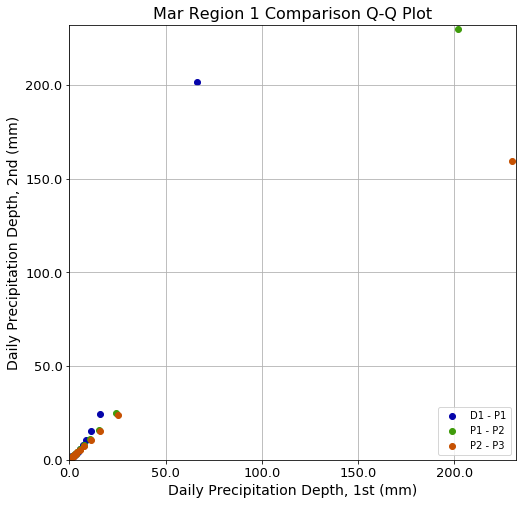

In [330]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Mar1D1Qs, Mar1P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Mar1P1Qs, Mar1P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Mar1P2Qs, Mar1P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.set_title('Mar Region 1 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max1Qs) )
ax11.set_ylim( (0.0, max1Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

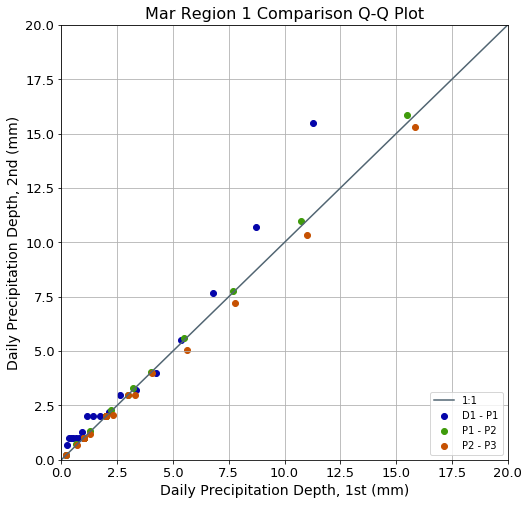

In [331]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Mar1D1Qs, Mar1P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Mar1P1Qs, Mar1P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Mar1P2Qs, Mar1P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.plot( [0.0, max1Qs], [0.0, max1Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Mar Region 1 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 20.0) )
ax11.set_ylim( (0.0, 20.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

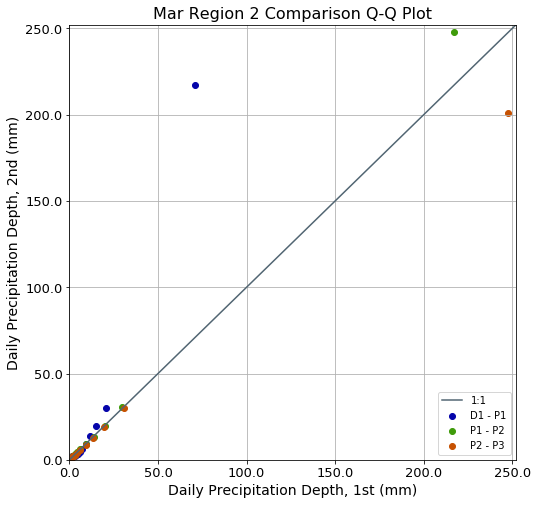

In [332]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Mar2D1Qs, Mar2P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Mar2P1Qs, Mar2P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Mar2P2Qs, Mar2P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.plot( [0.0, max2Qs], [0.0, max2Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Mar Region 2 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max2Qs) )
ax11.set_ylim( (0.0, max2Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

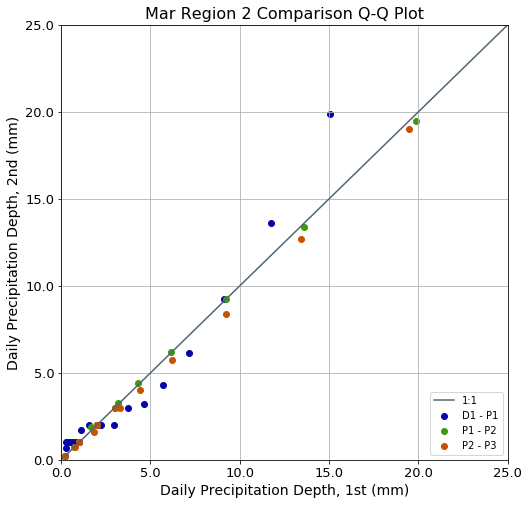

In [333]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Mar2D1Qs, Mar2P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Mar2P1Qs, Mar2P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Mar2P2Qs, Mar2P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.plot( [0.0, max2Qs], [0.0, max2Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Mar Region 2 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

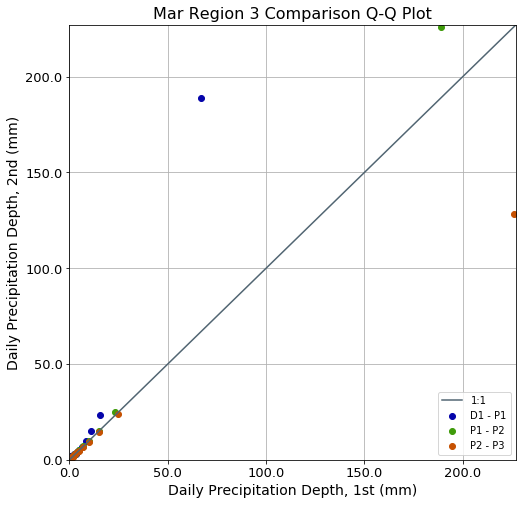

In [334]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Mar3D1Qs, Mar3P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Mar3P1Qs, Mar3P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Mar3P2Qs, Mar3P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.plot( [0.0, max3Qs], [0.0, max3Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Mar Region 3 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max3Qs) )
ax11.set_ylim( (0.0, max3Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

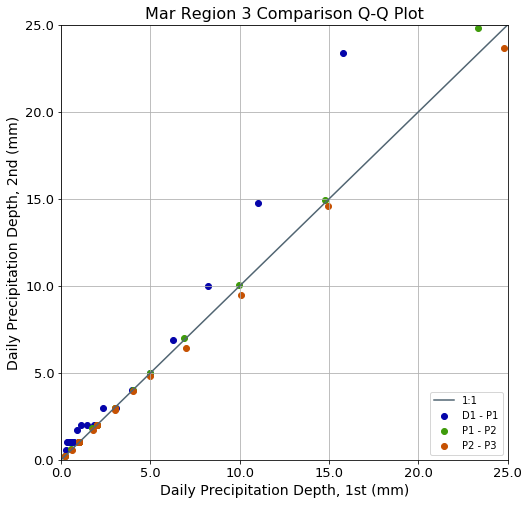

In [335]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Mar3D1Qs, Mar3P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Mar3P1Qs, Mar3P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Mar3P2Qs, Mar3P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.plot( [0.0, max3Qs], [0.0, max3Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Mar Region 3 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

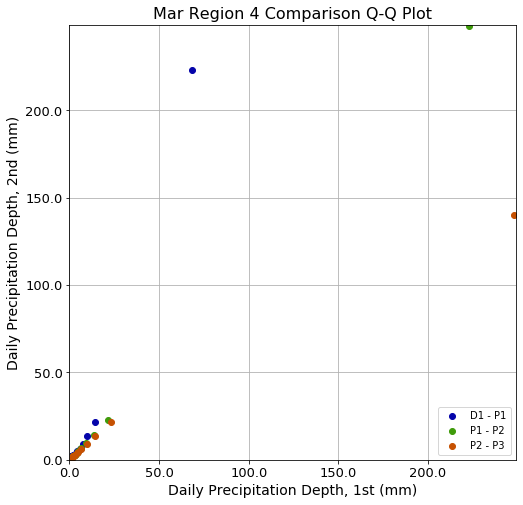

In [336]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Mar4D1Qs, Mar4P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Mar4P1Qs, Mar4P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Mar4P2Qs, Mar4P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.set_title('Mar Region 4 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max4Qs) )
ax11.set_ylim( (0.0, max4Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

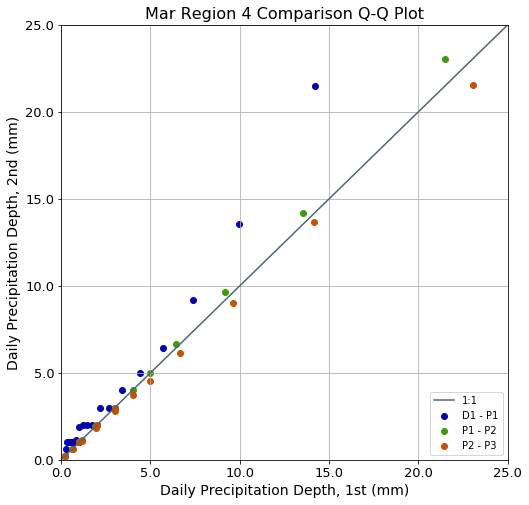

In [337]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Mar4D1Qs, Mar4P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Mar4P1Qs, Mar4P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Mar4P2Qs, Mar4P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.plot( [0.0, max4Qs], [0.0, max4Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Mar Region 4 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

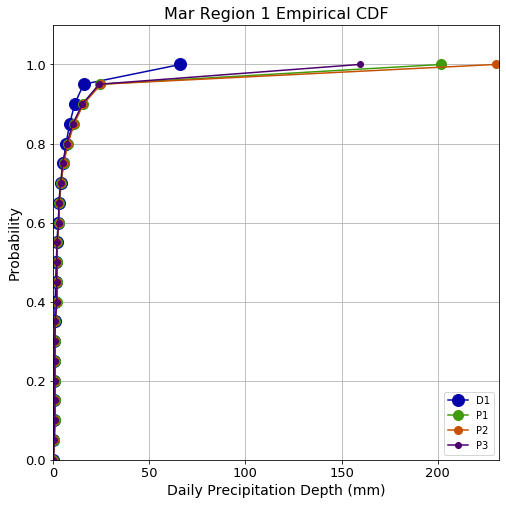

In [338]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Mar1D1Qs, nCompQs, c='xkcd:royal blue', markersize=12, marker='o', 
           linestyle='-', label="D1")
ax11.plot( Mar1P1Qs, nCompQs, c='xkcd:grass green', markersize=10, marker='o', 
           linestyle='-', label="P1")
ax11.plot( Mar1P2Qs, nCompQs, c='xkcd:dark orange', markersize=8, marker='o', 
           linestyle='-', label="P2")
ax11.plot( Mar1P3Qs, nCompQs, c='xkcd:royal purple', markersize=6, marker='o', 
           linestyle='-', label="P3")
ax11.set_title('Mar Region 1 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max1Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

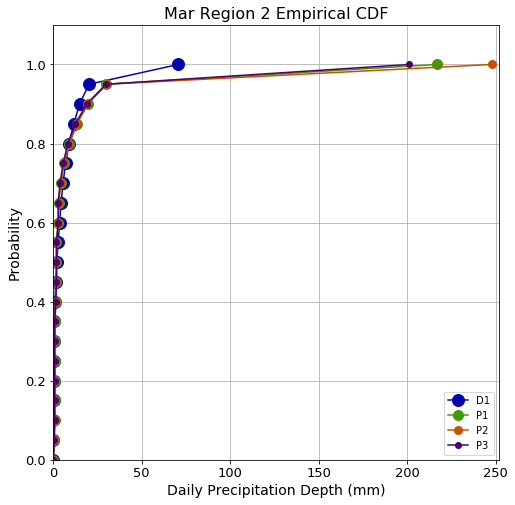

In [339]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Mar2D1Qs, nCompQs, c='xkcd:royal blue', markersize=12, marker='o', 
           linestyle='-', label="D1")
ax11.plot( Mar2P1Qs, nCompQs, c='xkcd:grass green', markersize=10, marker='o', 
           linestyle='-', label="P1")
ax11.plot( Mar2P2Qs, nCompQs, c='xkcd:dark orange', markersize=8, marker='o', 
           linestyle='-', label="P2")
ax11.plot( Mar2P3Qs, nCompQs, c='xkcd:royal purple', markersize=6, marker='o', 
           linestyle='-', label="P3")
ax11.set_title('Mar Region 2 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max2Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

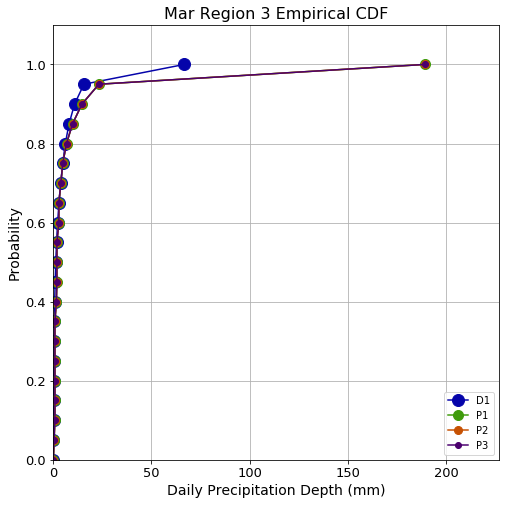

In [340]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Mar3D1Qs, nCompQs, c='xkcd:royal blue', markersize=12, marker='o', 
           linestyle='-', label="D1")
ax11.plot( Mar3P1Qs, nCompQs, c='xkcd:grass green', markersize=10, marker='o', 
           linestyle='-', label="P1")
ax11.plot( Mar3P1Qs, nCompQs, c='xkcd:dark orange', markersize=8, marker='o', 
           linestyle='-', label="P2")
ax11.plot( Mar3P1Qs, nCompQs, c='xkcd:royal purple', markersize=6, marker='o', 
           linestyle='-', label="P3")
ax11.set_title('Mar Region 3 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max3Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

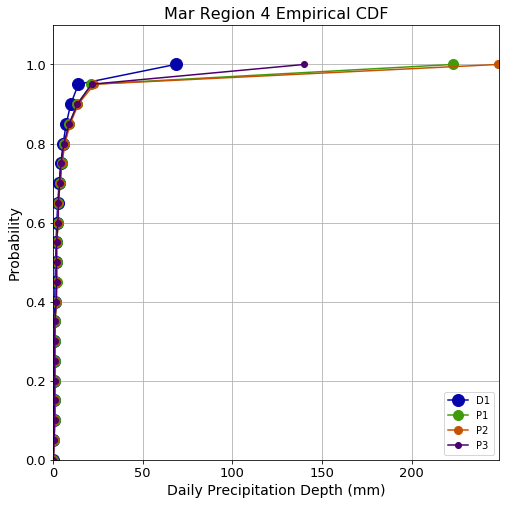

In [341]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Mar4D1Qs, nCompQs, c='xkcd:royal blue', markersize=12, marker='o', 
           linestyle='-', label="D1")
ax11.plot( Mar4P1Qs, nCompQs, c='xkcd:grass green', markersize=10, marker='o', 
           linestyle='-', label="P1")
ax11.plot( Mar4P2Qs, nCompQs, c='xkcd:dark orange', markersize=8, marker='o', 
           linestyle='-', label="P2")
ax11.plot( Mar4P3Qs, nCompQs, c='xkcd:royal purple', markersize=6, marker='o', 
           linestyle='-', label="P3")
ax11.set_title('Mar Region 4 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max4Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### Apr

In [342]:
AprNum = 4

In [343]:
Apr1D1DF = AprD1DF[AprD1DF["PRegion_Id"] == 1].copy()
Apr2D1DF = AprD1DF[AprD1DF["PRegion_Id"] == 2].copy()
Apr3D1DF = AprD1DF[AprD1DF["PRegion_Id"] == 3].copy()
Apr4D1DF = AprD1DF[AprD1DF["PRegion_Id"] == 4].copy()

In [344]:
Apr1P1DF = AprP1DF[AprP1DF["PRegion_Id"] == 1].copy()
Apr2P1DF = AprP1DF[AprP1DF["PRegion_Id"] == 2].copy()
Apr3P1DF = AprP1DF[AprP1DF["PRegion_Id"] == 3].copy()
Apr4P1DF = AprP1DF[AprP1DF["PRegion_Id"] == 4].copy()

In [345]:
Apr1P2DF = AprP2DF[AprP2DF["PRegion_Id"] == 1].copy()
Apr2P2DF = AprP2DF[AprP2DF["PRegion_Id"] == 2].copy()
Apr3P2DF = AprP2DF[AprP2DF["PRegion_Id"] == 3].copy()
Apr4P2DF = AprP2DF[AprP2DF["PRegion_Id"] == 4].copy()

In [346]:
Apr1P3DF = AprP3DF[AprP3DF["PRegion_Id"] == 1].copy()
Apr2P3DF = AprP3DF[AprP3DF["PRegion_Id"] == 2].copy()
Apr3P3DF = AprP3DF[AprP3DF["PRegion_Id"] == 3].copy()
Apr4P3DF = AprP3DF[AprP3DF["PRegion_Id"] == 4].copy()

Bayesian estimates of confidence intervals for mean, variance, and standard deviation of the samples

In [347]:
Apr1D1BSCI = sstats.bayes_mvs( np.array( Apr1D1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Apr2D1BSCI = sstats.bayes_mvs( np.array( Apr2D1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Apr3D1BSCI = sstats.bayes_mvs( np.array( Apr3D1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Apr4D1BSCI = sstats.bayes_mvs( np.array( Apr4D1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )

In [348]:
Apr1P1BSCI = sstats.bayes_mvs( np.array( Apr1P1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Apr2P1BSCI = sstats.bayes_mvs( np.array( Apr2P1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Apr3P1BSCI = sstats.bayes_mvs( np.array( Apr3P1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Apr4P1BSCI = sstats.bayes_mvs( np.array( Apr4P1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )

In [349]:
Apr1P2BSCI = sstats.bayes_mvs( np.array( Apr1P2DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Apr2P2BSCI = sstats.bayes_mvs( np.array( Apr2P2DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Apr3P2BSCI = sstats.bayes_mvs( np.array( Apr3P2DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Apr4P2BSCI = sstats.bayes_mvs( np.array( Apr4P2DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )

In [350]:
Apr1P3BSCI = sstats.bayes_mvs( np.array( Apr1P3DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Apr2P3BSCI = sstats.bayes_mvs( np.array( Apr2P3DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Apr3P3BSCI = sstats.bayes_mvs( np.array( Apr3P3DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Apr4P3BSCI = sstats.bayes_mvs( np.array( Apr4P3DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )

In [351]:
CMonList.append( AprNum )
CZoneList.append( 1 )
SD1Mean.append( Apr1D1BSCI[0][0] )
SD1MeanMinCI.append( Apr1D1BSCI[0][1][0] )
SD1MeanMaxCI.append( Apr1D1BSCI[0][1][1] )
SD1Var.append( Apr1D1BSCI[1][0] )
SD1VarMinCI.append( Apr1D1BSCI[1][1][0] )
SD1VarMaxCI.append( Apr1D1BSCI[1][1][1] )
SD1Std.append( Apr1D1BSCI[2][0] )
SD1StdMinCI.append( Apr1D1BSCI[2][1][0] )
SD1StdMaxCI.append( Apr1D1BSCI[2][1][1] )
CMonList.append( AprNum )
CZoneList.append( 2 )
SD1Mean.append( Apr2D1BSCI[0][0] )
SD1MeanMinCI.append( Apr2D1BSCI[0][1][0] )
SD1MeanMaxCI.append( Apr2D1BSCI[0][1][1] )
SD1Var.append( Apr2D1BSCI[1][0] )
SD1VarMinCI.append( Apr2D1BSCI[1][1][0] )
SD1VarMaxCI.append( Apr2D1BSCI[1][1][1] )
SD1Std.append( Apr2D1BSCI[2][0] )
SD1StdMinCI.append( Apr2D1BSCI[2][1][0] )
SD1StdMaxCI.append( Apr2D1BSCI[2][1][1] )
CMonList.append( AprNum )
CZoneList.append( 3 )
SD1Mean.append( Apr3D1BSCI[0][0] )
SD1MeanMinCI.append( Apr3D1BSCI[0][1][0] )
SD1MeanMaxCI.append( Apr3D1BSCI[0][1][1] )
SD1Var.append( Apr3D1BSCI[1][0] )
SD1VarMinCI.append( Apr3D1BSCI[1][1][0] )
SD1VarMaxCI.append( Apr3D1BSCI[1][1][1] )
SD1Std.append( Apr3D1BSCI[2][0] )
SD1StdMinCI.append( Apr3D1BSCI[2][1][0] )
SD1StdMaxCI.append( Apr3D1BSCI[2][1][1] )
CMonList.append( AprNum )
CZoneList.append( 4 )
SD1Mean.append( Apr4D1BSCI[0][0] )
SD1MeanMinCI.append( Apr4D1BSCI[0][1][0] )
SD1MeanMaxCI.append( Apr4D1BSCI[0][1][1] )
SD1Var.append( Apr4D1BSCI[1][0] )
SD1VarMinCI.append( Apr4D1BSCI[1][1][0] )
SD1VarMaxCI.append( Apr4D1BSCI[1][1][1] )
SD1Std.append( Apr4D1BSCI[2][0] )
SD1StdMinCI.append( Apr4D1BSCI[2][1][0] )
SD1StdMaxCI.append( Apr4D1BSCI[2][1][1] )

In [352]:
SP1Mean.append( Apr1P1BSCI[0][0] )
SP1MeanMinCI.append( Apr1P1BSCI[0][1][0] )
SP1MeanMaxCI.append( Apr1P1BSCI[0][1][1] )
SP1Var.append( Apr1P1BSCI[1][0] )
SP1VarMinCI.append( Apr1P1BSCI[1][1][0] )
SP1VarMaxCI.append( Apr1P1BSCI[1][1][1] )
SP1Std.append( Apr1P1BSCI[2][0] )
SP1StdMinCI.append( Apr1P1BSCI[2][1][0] )
SP1StdMaxCI.append( Apr1P1BSCI[2][1][1] )
SP1Mean.append( Apr2P1BSCI[0][0] )
SP1MeanMinCI.append( Apr2P1BSCI[0][1][0] )
SP1MeanMaxCI.append( Apr2P1BSCI[0][1][1] )
SP1Var.append( Apr2P1BSCI[1][0] )
SP1VarMinCI.append( Apr2P1BSCI[1][1][0] )
SP1VarMaxCI.append( Apr2P1BSCI[1][1][1] )
SP1Std.append( Apr2P1BSCI[2][0] )
SP1StdMinCI.append( Apr2P1BSCI[2][1][0] )
SP1StdMaxCI.append( Apr2P1BSCI[2][1][1] )
SP1Mean.append( Apr3P1BSCI[0][0] )
SP1MeanMinCI.append( Apr3P1BSCI[0][1][0] )
SP1MeanMaxCI.append( Apr3P1BSCI[0][1][1] )
SP1Var.append( Apr3P1BSCI[1][0] )
SP1VarMinCI.append( Apr3P1BSCI[1][1][0] )
SP1VarMaxCI.append( Apr3P1BSCI[1][1][1] )
SP1Std.append( Apr3P1BSCI[2][0] )
SP1StdMinCI.append( Apr3P1BSCI[2][1][0] )
SP1StdMaxCI.append( Apr3P1BSCI[2][1][1] )
SP1Mean.append( Apr4P1BSCI[0][0] )
SP1MeanMinCI.append( Apr4P1BSCI[0][1][0] )
SP1MeanMaxCI.append( Apr4P1BSCI[0][1][1] )
SP1Var.append( Apr4P1BSCI[1][0] )
SP1VarMinCI.append( Apr4P1BSCI[1][1][0] )
SP1VarMaxCI.append( Apr4P1BSCI[1][1][1] )
SP1Std.append( Apr4P1BSCI[2][0] )
SP1StdMinCI.append( Apr4P1BSCI[2][1][0] )
SP1StdMaxCI.append( Apr4P1BSCI[2][1][1] )

In [353]:
SP2Mean.append( Apr1P2BSCI[0][0] )
SP2MeanMinCI.append( Apr1P2BSCI[0][1][0] )
SP2MeanMaxCI.append( Apr1P2BSCI[0][1][1] )
SP2Var.append( Apr1P2BSCI[1][0] )
SP2VarMinCI.append( Apr1P2BSCI[1][1][0] )
SP2VarMaxCI.append( Apr1P2BSCI[1][1][1] )
SP2Std.append( Apr1P2BSCI[2][0] )
SP2StdMinCI.append( Apr1P2BSCI[2][1][0] )
SP2StdMaxCI.append( Apr1P2BSCI[2][1][1] )
SP2Mean.append( Apr2P2BSCI[0][0] )
SP2MeanMinCI.append( Apr2P2BSCI[0][1][0] )
SP2MeanMaxCI.append( Apr2P2BSCI[0][1][1] )
SP2Var.append( Apr2P2BSCI[1][0] )
SP2VarMinCI.append( Apr2P2BSCI[1][1][0] )
SP2VarMaxCI.append( Apr2P2BSCI[1][1][1] )
SP2Std.append( Apr2P2BSCI[2][0] )
SP2StdMinCI.append( Apr2P2BSCI[2][1][0] )
SP2StdMaxCI.append( Apr2P2BSCI[2][1][1] )
SP2Mean.append( Apr3P2BSCI[0][0] )
SP2MeanMinCI.append( Apr3P2BSCI[0][1][0] )
SP2MeanMaxCI.append( Apr3P2BSCI[0][1][1] )
SP2Var.append( Apr3P2BSCI[1][0] )
SP2VarMinCI.append( Apr3P2BSCI[1][1][0] )
SP2VarMaxCI.append( Apr3P2BSCI[1][1][1] )
SP2Std.append( Apr3P2BSCI[2][0] )
SP2StdMinCI.append( Apr3P2BSCI[2][1][0] )
SP2StdMaxCI.append( Apr3P2BSCI[2][1][1] )
SP2Mean.append( Apr4P2BSCI[0][0] )
SP2MeanMinCI.append( Apr4P2BSCI[0][1][0] )
SP2MeanMaxCI.append( Apr4P2BSCI[0][1][1] )
SP2Var.append( Apr4P2BSCI[1][0] )
SP2VarMinCI.append( Apr4P2BSCI[1][1][0] )
SP2VarMaxCI.append( Apr4P2BSCI[1][1][1] )
SP2Std.append( Apr4P2BSCI[2][0] )
SP2StdMinCI.append( Apr4P2BSCI[2][1][0] )
SP2StdMaxCI.append( Apr4P2BSCI[2][1][1] )

In [354]:
SP3Mean.append( Apr1P3BSCI[0][0] )
SP3MeanMinCI.append( Apr1P3BSCI[0][1][0] )
SP3MeanMaxCI.append( Apr1P3BSCI[0][1][1] )
SP3Var.append( Apr1P3BSCI[1][0] )
SP3VarMinCI.append( Apr1P3BSCI[1][1][0] )
SP3VarMaxCI.append( Apr1P3BSCI[1][1][1] )
SP3Std.append( Apr1P3BSCI[2][0] )
SP3StdMinCI.append( Apr1P3BSCI[2][1][0] )
SP3StdMaxCI.append( Apr1P3BSCI[2][1][1] )
SP3Mean.append( Apr2P3BSCI[0][0] )
SP3MeanMinCI.append( Apr2P3BSCI[0][1][0] )
SP3MeanMaxCI.append( Apr2P3BSCI[0][1][1] )
SP3Var.append( Apr2P3BSCI[1][0] )
SP3VarMinCI.append( Apr2P3BSCI[1][1][0] )
SP3VarMaxCI.append( Apr2P3BSCI[1][1][1] )
SP3Std.append( Apr2P3BSCI[2][0] )
SP3StdMinCI.append( Apr2P3BSCI[2][1][0] )
SP3StdMaxCI.append( Apr2P3BSCI[2][1][1] )
SP3Mean.append( Apr3P3BSCI[0][0] )
SP3MeanMinCI.append( Apr3P3BSCI[0][1][0] )
SP3MeanMaxCI.append( Apr3P3BSCI[0][1][1] )
SP3Var.append( Apr3P3BSCI[1][0] )
SP3VarMinCI.append( Apr3P3BSCI[1][1][0] )
SP3VarMaxCI.append( Apr3P3BSCI[1][1][1] )
SP3Std.append( Apr3P3BSCI[2][0] )
SP3StdMinCI.append( Apr3P3BSCI[2][1][0] )
SP3StdMaxCI.append( Apr3P3BSCI[2][1][1] )
SP3Mean.append( Apr4P3BSCI[0][0] )
SP3MeanMinCI.append( Apr4P3BSCI[0][1][0] )
SP3MeanMaxCI.append( Apr4P3BSCI[0][1][1] )
SP3Var.append( Apr4P3BSCI[1][0] )
SP3VarMinCI.append( Apr4P3BSCI[1][1][0] )
SP3VarMaxCI.append( Apr4P3BSCI[1][1][1] )
SP3Std.append( Apr4P3BSCI[2][0] )
SP3StdMinCI.append( Apr4P3BSCI[2][1][0] )
SP3StdMaxCI.append( Apr4P3BSCI[2][1][1] )

#### T-Test

T-Test for the means of two independent samples. Two-sided test for the null hypothesis that 2 independent samples hae identical average values. Test assumes that the populations have identical variances.

If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [355]:
Apr1TTD1toP1 = sstats.ttest_ind( np.array( Apr1D1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Apr1P1DF["Precip_mm"], dtype=np.int32 ) )

In [356]:
Apr1TTD1toP1Pval = Apr1TTD1toP1[1]
print("Region 1, P-Value for LOCA D1 and P1 from same population is: %g" % Apr1TTD1toP1Pval )

Region 1, P-Value for LOCA D1 and P1 from same population is: 0


In [357]:
Apr2TTD1toP1 = sstats.ttest_ind( np.array( Apr2D1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Apr2P1DF["Precip_mm"], dtype=np.int32 ) )

In [358]:
Apr2TTD1toP1Pval = Apr2TTD1toP1[1]
print("Region 2, P-Value for LOCA D1 and P1 from same population is: %g" % Apr2TTD1toP1Pval )

Region 2, P-Value for LOCA D1 and P1 from same population is: 0


In [359]:
Apr3TTD1toP1 = sstats.ttest_ind( np.array( Apr3D1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Apr3P1DF["Precip_mm"], dtype=np.int32 ) )

In [360]:
Apr3TTD1toP1Pval = Apr3TTD1toP1[1]
print("Region 3, P-Value for LOCA D1 and P1 from same population is: %g" % Apr3TTD1toP1Pval )

Region 3, P-Value for LOCA D1 and P1 from same population is: 0


In [361]:
Apr4TTD1toP1 = sstats.ttest_ind( np.array( Apr4D1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Apr4P1DF["Precip_mm"], dtype=np.int32 ) )

In [362]:
Apr4TTD1toP1Pval = Apr4TTD1toP1[1]
print("Region 4, P-Value for LOCA D1 and P1 from same population is: %g" % Apr4TTD1toP1Pval )

Region 4, P-Value for LOCA D1 and P1 from same population is: 0


In [363]:
Apr1TTP1toP2 = sstats.ttest_ind( np.array( Apr1P1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Apr1P2DF["Precip_mm"], dtype=np.int32 ) )

In [364]:
Apr1TTP1toP2Pval = Apr1TTP1toP2[1]
print("Region 1, P-Value for LOCA P1 and P2 from same population is: %g" % Apr1TTP1toP2Pval )

Region 1, P-Value for LOCA P1 and P2 from same population is: 7.7656e-44


In [365]:
Apr2TTP1toP2 = sstats.ttest_ind( np.array( Apr2P1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Apr2P2DF["Precip_mm"], dtype=np.int32 ) )

In [366]:
Apr2TTP1toP2Pval = Apr2TTP1toP2[1]
print("Region 2, P-Value for LOCA P1 and P2 from same population is: %g" % Apr2TTP1toP2Pval )

Region 2, P-Value for LOCA P1 and P2 from same population is: 3.33383e-27


In [367]:
Apr3TTP1toP2 = sstats.ttest_ind( np.array( Apr3P1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Apr3P2DF["Precip_mm"], dtype=np.int32 ) )

In [368]:
Apr3TTP1toP2Pval = Apr3TTP1toP2[1]
print("Region 3, P-Value for LOCA P1 and P2 from same population is: %g" % Apr3TTP1toP2Pval )

Region 3, P-Value for LOCA P1 and P2 from same population is: 4.12212e-20


In [369]:
Apr4TTP1toP2 = sstats.ttest_ind( np.array( Apr4P1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Apr4P2DF["Precip_mm"], dtype=np.int32 ) )

In [370]:
Apr4TTP1toP2Pval = Apr4TTP1toP2[1]
print("Region 4, P-Value for LOCA P1 and P2 from same population is: %g" % Apr4TTP1toP2Pval )

Region 4, P-Value for LOCA P1 and P2 from same population is: 1.39517e-34


In [371]:
Apr1TTP2toP3 = sstats.ttest_ind( np.array( Apr1P2DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Apr1P3DF["Precip_mm"], dtype=np.int32 ) )

In [372]:
Apr1TTP2toP3Pval = Apr1TTP2toP3[1]
print("Region 1, P-Value for LOCA P2 and P3 from same population is: %g" % Apr1TTP2toP3Pval )

Region 1, P-Value for LOCA P2 and P3 from same population is: 3.91079e-36


In [373]:
Apr2TTP2toP3 = sstats.ttest_ind( np.array( Apr2P2DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Apr2P3DF["Precip_mm"], dtype=np.int32 ) )

In [374]:
Apr2TTP2toP3Pval = Apr2TTP2toP3[1]
print("Region 2, P-Value for LOCA P2 and P3 from same population is: %g" % Apr2TTP2toP3Pval )

Region 2, P-Value for LOCA P2 and P3 from same population is: 9.53345e-14


In [375]:
Apr3TTP2toP3 = sstats.ttest_ind( np.array( Apr3P2DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Apr3P3DF["Precip_mm"], dtype=np.int32 ) )

In [376]:
Apr3TTP2toP3Pval = Apr3TTP2toP3[1]
print("Region 3, P-Value for LOCA P2 and P3 from same population is: %g" % Apr3TTP2toP3Pval )

Region 3, P-Value for LOCA P2 and P3 from same population is: 1.00053e-07


In [377]:
Apr4TTP2toP3 = sstats.ttest_ind( np.array( Apr4P2DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Apr4P3DF["Precip_mm"], dtype=np.int32 ) )

In [378]:
Apr4TTP2toP3Pval = Apr4TTP2toP3[1]
print("Region 4, P-Value for LOCA P2 and P3 from same population is: %g" % Apr4TTP2toP3Pval )

Region 4, P-Value for LOCA P2 and P3 from same population is: 1.23849e-18


#### Mann-Whitney Rank Test

Nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample. This test can be used to investigate whether two independent samples were selected from populations having the same distribution.

Null hypothesis, $H_{0}$, is that the distributions of both populations are equal.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of being from the same distribution.

In [379]:
Apr1MWUD1toP1 = sstats.mannwhitneyu( np.array( Apr1D1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Apr1P1DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [380]:
Apr1MWUD1toP1Pval = Apr1MWUD1toP1[1]
print("Region 1, P-Value for LOCA D1 and P1 from same distribution is: %g" % Apr1MWUD1toP1Pval )

Region 1, P-Value for LOCA D1 and P1 from same distribution is: 0


In [381]:
Apr2MWUD1toP1 = sstats.mannwhitneyu( np.array( Apr2D1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Apr2P1DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [382]:
Apr2MWUD1toP1Pval = Apr2MWUD1toP1[1]
print("Region 2, P-Value for LOCA D1 and P1 from same distribution is: %g" % Apr2MWUD1toP1Pval )

Region 2, P-Value for LOCA D1 and P1 from same distribution is: 0


In [383]:
Apr3MWUD1toP1 = sstats.mannwhitneyu( np.array( Apr3D1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Apr3P1DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [384]:
Apr3MWUD1toP1Pval = Apr3MWUD1toP1[1]
print("Region 3, P-Value for LOCA D1 and P1 from same distribution is: %g" % Apr3MWUD1toP1Pval )

Region 3, P-Value for LOCA D1 and P1 from same distribution is: 0


In [385]:
Apr4MWUD1toP1 = sstats.mannwhitneyu( np.array( Apr4D1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Apr4P1DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [386]:
Apr4MWUD1toP1Pval = Apr4MWUD1toP1[1]
print("Region 4, P-Value for LOCA D1 and P1 from same distribution is: %g" % Apr4MWUD1toP1Pval )

Region 4, P-Value for LOCA D1 and P1 from same distribution is: 0


In [387]:
Apr1MWUP1toP2 = sstats.mannwhitneyu( np.array( Apr1P1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Apr1P2DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [388]:
Apr1MWUP1toP2Pval = Apr1MWUP1toP2[1]
print("Region 1, P-Value for LOCA P1 and P2 from same distribution is: %g" % Apr1MWUP1toP2Pval )

Region 1, P-Value for LOCA P1 and P2 from same distribution is: 1.42155e-28


In [389]:
Apr2MWUP1toP2 = sstats.mannwhitneyu( np.array( Apr2P1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Apr2P2DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [390]:
Apr2MWUP1toP2Pval = Apr2MWUP1toP2[1]
print("Region 2, P-Value for LOCA P1 and P2 from same distribution is: %g" % Apr2MWUP1toP2Pval )

Region 2, P-Value for LOCA P1 and P2 from same distribution is: 8.73464e-20


In [391]:
Apr3MWUP1toP2 = sstats.mannwhitneyu( np.array( Apr3P1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Apr3P2DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [392]:
Apr3MWUP1toP2Pval = Apr3MWUP1toP2[1]
print("Region 3, P-Value for LOCA P1 and P2 from same distribution is: %g" % Apr3MWUP1toP2Pval )

Region 3, P-Value for LOCA P1 and P2 from same distribution is: 4.0701e-19


In [393]:
Apr4MWUP1toP2 = sstats.mannwhitneyu( np.array( Apr4P1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Apr4P2DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [394]:
Apr4MWUP1toP2Pval = Apr4MWUP1toP2[1]
print("Region 4, P-Value for LOCA P1 and P2 from same distribution is: %g" % Apr4MWUP1toP2Pval )

Region 4, P-Value for LOCA P1 and P2 from same distribution is: 9.4269e-31


In [395]:
Apr1MWUP2toP3 = sstats.mannwhitneyu( np.array( Apr1P2DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Apr1P3DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [396]:
Apr1MWUP2toP3Pval = Apr1MWUP2toP3[1]
print("Region 1, P-Value for LOCA P2 and P3 from same distribution is: %g" % Apr1MWUP2toP3Pval )

Region 1, P-Value for LOCA P2 and P3 from same distribution is: 2.38208e-44


In [397]:
Apr2MWUP2toP3 = sstats.mannwhitneyu( np.array( Apr2P2DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Apr2P3DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [398]:
Apr2MWUP2toP3Pval = Apr2MWUP2toP3[1]
print("Region 2, P-Value for LOCA P2 and P3 from same distribution is: %g" % Apr2MWUP2toP3Pval )

Region 2, P-Value for LOCA P2 and P3 from same distribution is: 3.58677e-19


In [399]:
Apr3MWUP2toP3 = sstats.mannwhitneyu( np.array( Apr3P2DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Apr3P3DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [400]:
Apr3MWUP2toP3Pval = Apr3MWUP2toP3[1]
print("Region 3, P-Value for LOCA P2 and P3 from same distribution is: %g" % Apr3MWUP2toP3Pval )

Region 3, P-Value for LOCA P2 and P3 from same distribution is: 7.94681e-10


In [401]:
Apr4MWUP2toP3 = sstats.mannwhitneyu( np.array( Apr4P2DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Apr4P3DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [402]:
Apr4MWUP2toP3Pval = Apr4MWUP2toP3[1]
print("Region 4, P-Value for LOCA P2 and P3 from same distribution is: %g" % Apr4MWUP2toP3Pval )

Region 4, P-Value for LOCA P2 and P3 from same distribution is: 2.60119e-20


#### Kruskal-Wallis Test

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of the same population median.

In [403]:
Apr1KWD1toP1 = sstats.kruskal( np.array( Apr1D1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Apr1P1DF["Precip_mm"], dtype=np.int32 ) )

In [404]:
Apr1KWD1toP1Pval = Apr1KWD1toP1[1]
print("Region 1, P-Value for LOCA D1 and P1 have the same median is: %g" % Apr1KWD1toP1Pval )

Region 1, P-Value for LOCA D1 and P1 have the same median is: 0


In [405]:
Apr2KWD1toP1 = sstats.kruskal( np.array( Apr2D1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Apr2P1DF["Precip_mm"], dtype=np.int32 ) )

In [406]:
Apr2KWD1toP1Pval = Apr2KWD1toP1[1]
print("Region 2, P-Value for LOCA D1 and P1 have the same median is: %g" % Apr2KWD1toP1Pval )

Region 2, P-Value for LOCA D1 and P1 have the same median is: 1


In [407]:
Apr3KWD1toP1 = sstats.kruskal( np.array( Apr3D1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Apr3P1DF["Precip_mm"], dtype=np.int32 ) )

In [408]:
Apr3KWD1toP1Pval = Apr3KWD1toP1[1]
print("Region 3, P-Value for LOCA D1 and P1 have the same median is: %g" % Apr3KWD1toP1Pval )

Region 3, P-Value for LOCA D1 and P1 have the same median is: 1


In [409]:
Apr4KWD1toP1 = sstats.kruskal( np.array( Apr4D1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Apr4P1DF["Precip_mm"], dtype=np.int32 ) )

In [410]:
Apr4KWD1toP1Pval = Apr4KWD1toP1[1]
print("Region 4, P-Value for LOCA D1 and P1 have the same median is: %g" % Apr4KWD1toP1Pval )

Region 4, P-Value for LOCA D1 and P1 have the same median is: 1


In [411]:
Apr1KWP1toP2 = sstats.kruskal( np.array( Apr1P1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Apr1P2DF["Precip_mm"], dtype=np.int32 ) )

In [412]:
Apr1KWP1toP2Pval = Apr1KWP1toP2[1]
print("Region 1, P-Value for LOCA P1 and P2 have the same median is: %g" % Apr1KWP1toP2Pval )

Region 1, P-Value for LOCA P1 and P2 have the same median is: 0


In [413]:
Apr2KWP1toP2 = sstats.kruskal( np.array( Apr2P1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Apr2P2DF["Precip_mm"], dtype=np.int32 ) )

In [414]:
Apr2KWP1toP2Pval = Apr2KWP1toP2[1]
print("Region 2, P-Value for LOCA P1 and P2 have the same median is: %g" % Apr2KWP1toP2Pval )

Region 2, P-Value for LOCA P1 and P2 have the same median is: 0


In [415]:
Apr3KWP1toP2 = sstats.kruskal( np.array( Apr3P1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Apr3P2DF["Precip_mm"], dtype=np.int32 ) )

In [416]:
Apr3KWP1toP2Pval = Apr3KWP1toP2[1]
print("Region 3, P-Value for LOCA P1 and P2 have the same median is: %g" % Apr3KWP1toP2Pval )

Region 3, P-Value for LOCA P1 and P2 have the same median is: 1


In [417]:
Apr4KWP1toP2 = sstats.kruskal( np.array( Apr4P1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Apr4P2DF["Precip_mm"], dtype=np.int32 ) )

In [418]:
Apr4KWP1toP2Pval = Apr4KWP1toP2[1]
print("Region 4, P-Value for LOCA P1 and P2 have the same median is: %g" % Apr4KWP1toP2Pval )

Region 4, P-Value for LOCA P1 and P2 have the same median is: 0


In [419]:
Apr1KWP2toP3 = sstats.kruskal( np.array( Apr1P2DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Apr1P3DF["Precip_mm"], dtype=np.int32 ) )

In [420]:
Apr1KWP2toP3Pval = Apr1KWP2toP3[1]
print("Region 1, P-Value for LOCA P2 and P3 have the same median is: %g" % Apr1KWP2toP3Pval )

Region 1, P-Value for LOCA P2 and P3 have the same median is: 1


In [421]:
Apr2KWP2toP3 = sstats.kruskal( np.array( Apr2P2DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Apr2P3DF["Precip_mm"], dtype=np.int32 ) )

In [422]:
Apr2KWP2toP3Pval = Apr2KWP2toP3[1]
print("Region 2, P-Value for LOCA P2 and P3 have the same median is: %g" % Apr2KWP2toP3Pval )

Region 2, P-Value for LOCA P2 and P3 have the same median is: 0


In [423]:
Apr3KWP2toP3 = sstats.kruskal( np.array( Apr3P2DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Apr3P3DF["Precip_mm"], dtype=np.int32 ) )

In [424]:
Apr3KWP2toP3Pval = Apr3KWP2toP3[1]
print("Region 3, P-Value for LOCA P2 and P3 have the same median is: %g" % Apr3KWP2toP3Pval )

Region 3, P-Value for LOCA P2 and P3 have the same median is: 1


In [425]:
Apr4KWP2toP3 = sstats.kruskal( np.array( Apr4P2DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Apr4P3DF["Precip_mm"], dtype=np.int32 ) )

In [426]:
Apr4KWP2toP3Pval = Apr4KWP2toP3[1]
print("Region 4, P-Value for LOCA P2 and P3 have the same median is: %g" % Apr4KWP2toP3Pval )

Region 4, P-Value for LOCA P2 and P3 have the same median is: 1


In [427]:
Apr4P3DF["Precip_mm"].median(), Apr4P2DF["Precip_mm"].median(), Apr4P1DF["Precip_mm"].median(), Apr4D1DF["Precip_mm"].median()

(2.8361458778381348, 3.0, 2.84185528755188, 2.057403802871704)

#### Plots

In [428]:
Apr1D1Qs = Apr1D1DF["Precip_mm"].quantile(q=nCompQs)
Apr1P1Qs = Apr1P1DF["Precip_mm"].quantile(q=nCompQs)
Apr1P2Qs = Apr1P2DF["Precip_mm"].quantile(q=nCompQs)
Apr1P3Qs = Apr1P3DF["Precip_mm"].quantile(q=nCompQs)
Apr2D1Qs = Apr2D1DF["Precip_mm"].quantile(q=nCompQs)
Apr2P1Qs = Apr2P1DF["Precip_mm"].quantile(q=nCompQs)
Apr2P2Qs = Apr2P2DF["Precip_mm"].quantile(q=nCompQs)
Apr2P3Qs = Apr2P3DF["Precip_mm"].quantile(q=nCompQs)
Apr3D1Qs = Apr3D1DF["Precip_mm"].quantile(q=nCompQs)
Apr3P1Qs = Apr3P1DF["Precip_mm"].quantile(q=nCompQs)
Apr3P2Qs = Apr3P2DF["Precip_mm"].quantile(q=nCompQs)
Apr3P3Qs = Apr3P3DF["Precip_mm"].quantile(q=nCompQs)
Apr4D1Qs = Apr4D1DF["Precip_mm"].quantile(q=nCompQs)
Apr4P1Qs = Apr4P1DF["Precip_mm"].quantile(q=nCompQs)
Apr4P2Qs = Apr4P2DF["Precip_mm"].quantile(q=nCompQs)
Apr4P3Qs = Apr4P3DF["Precip_mm"].quantile(q=nCompQs)

In [429]:
max1Qs = max( Apr1D1Qs.max(), Apr1P1Qs.max(), Apr1P2Qs.max(), Apr1P3Qs.max() )
max1Qs = round(max1Qs) + 2.0
max1Qs

246.0

In [430]:
max2Qs = max( Apr2D1Qs.max(), Apr2P1Qs.max(), Apr2P2Qs.max(), Apr2P3Qs.max() )
max2Qs = round(max2Qs) + 4.0
max2Qs

265.0

In [431]:
max3Qs = max( Apr3D1Qs.max(), Apr3P1Qs.max(), Apr3P2Qs.max(), Apr3P3Qs.max() )
max3Qs = round(max3Qs) + 1.0
max3Qs

289.0

In [432]:
max4Qs = max( Apr4D1Qs.max(), Apr4P1Qs.max(), Apr4P2Qs.max(), Apr4P3Qs.max() )
max4Qs = round(max4Qs) + 1.0
max4Qs

257.0

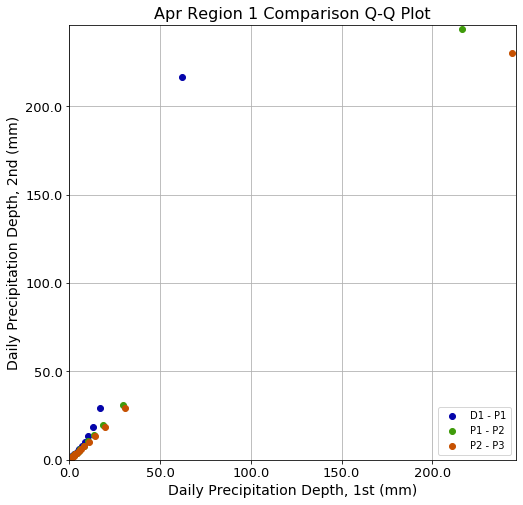

In [433]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Apr1D1Qs, Apr1P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Apr1P1Qs, Apr1P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Apr1P2Qs, Apr1P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.set_title('Apr Region 1 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max1Qs) )
ax11.set_ylim( (0.0, max1Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

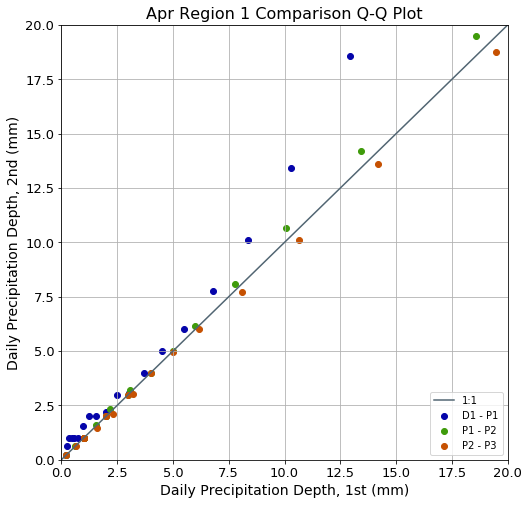

In [434]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Apr1D1Qs, Apr1P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Apr1P1Qs, Apr1P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Apr1P2Qs, Apr1P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.plot( [0.0, max1Qs], [0.0, max1Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Apr Region 1 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 20.0) )
ax11.set_ylim( (0.0, 20.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

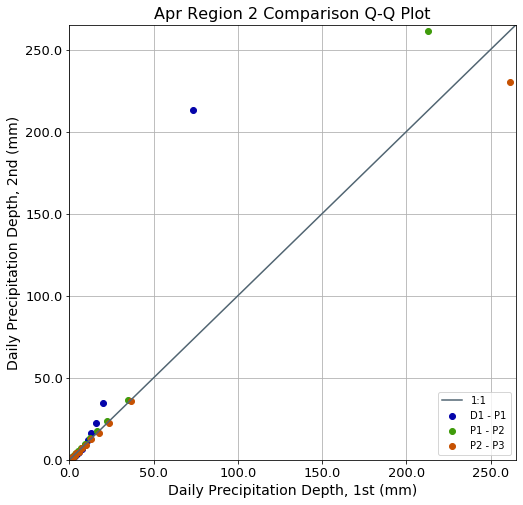

In [435]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Apr2D1Qs, Apr2P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Apr2P1Qs, Apr2P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Apr2P2Qs, Apr2P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.plot( [0.0, max2Qs], [0.0, max2Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Apr Region 2 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max2Qs) )
ax11.set_ylim( (0.0, max2Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

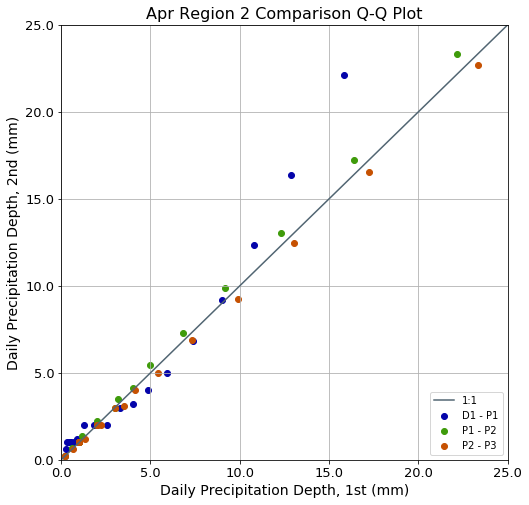

In [436]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Apr2D1Qs, Apr2P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Apr2P1Qs, Apr2P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Apr2P2Qs, Apr2P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.plot( [0.0, max2Qs], [0.0, max2Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Apr Region 2 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

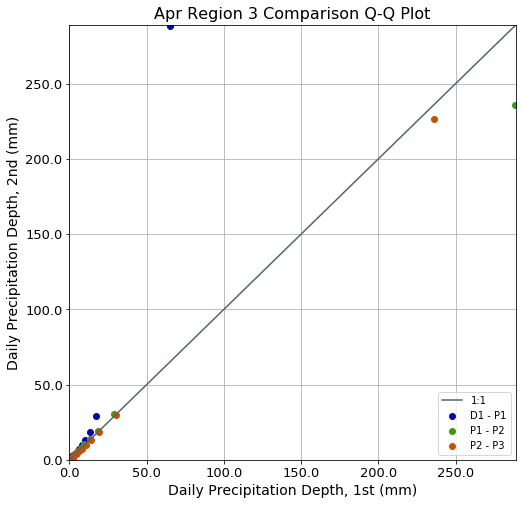

In [437]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Apr3D1Qs, Apr3P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Apr3P1Qs, Apr3P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Apr3P2Qs, Apr3P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.plot( [0.0, max3Qs], [0.0, max3Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Apr Region 3 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max3Qs) )
ax11.set_ylim( (0.0, max3Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

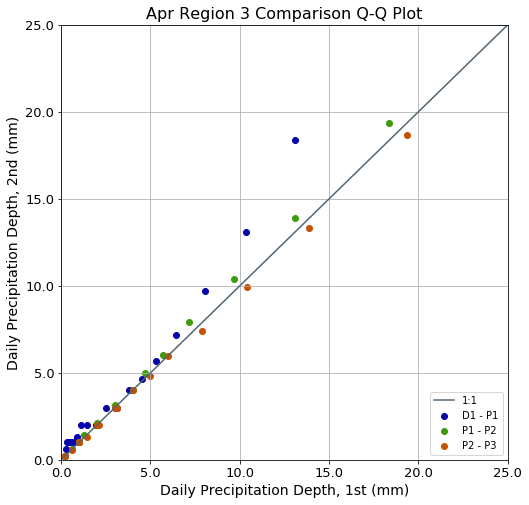

In [438]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Apr3D1Qs, Apr3P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Apr3P1Qs, Apr3P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Apr3P2Qs, Apr3P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.plot( [0.0, max3Qs], [0.0, max3Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Apr Region 3 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

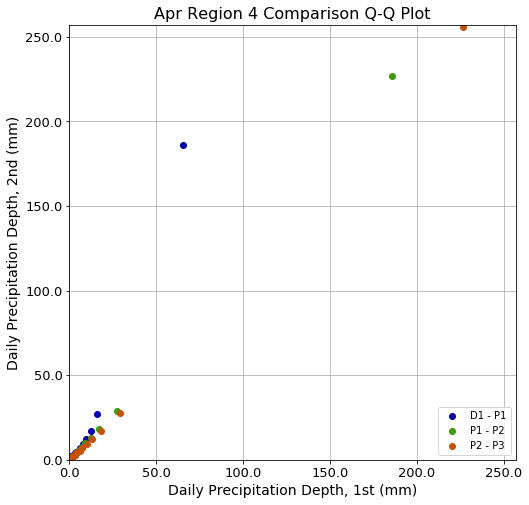

In [439]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Apr4D1Qs, Apr4P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Apr4P1Qs, Apr4P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Apr4P2Qs, Apr4P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.set_title('Apr Region 4 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max4Qs) )
ax11.set_ylim( (0.0, max4Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

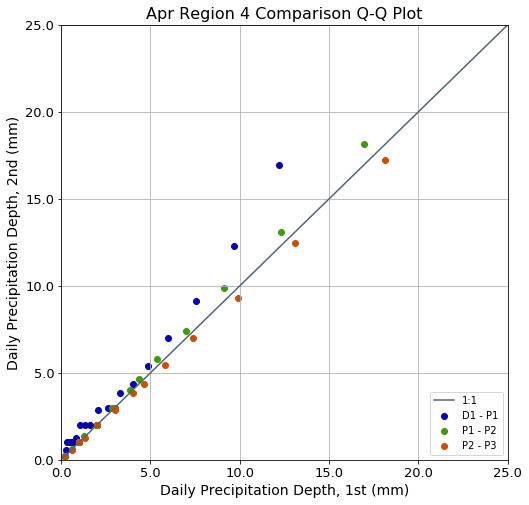

In [440]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Apr4D1Qs, Apr4P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Apr4P1Qs, Apr4P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Apr4P2Qs, Apr4P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.plot( [0.0, max4Qs], [0.0, max4Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Apr Region 4 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

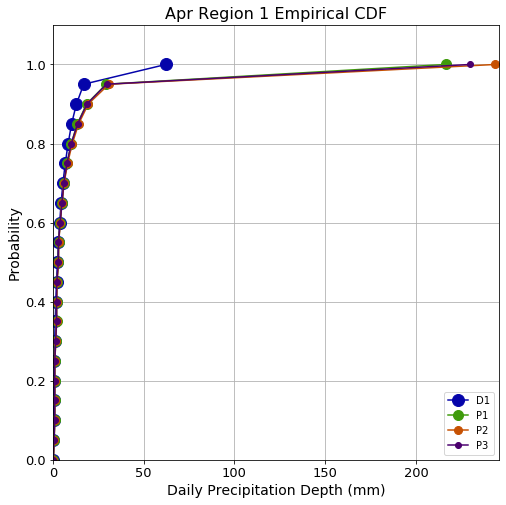

In [441]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Apr1D1Qs, nCompQs, c='xkcd:royal blue', markersize=12, marker='o', 
           linestyle='-', label="D1")
ax11.plot( Apr1P1Qs, nCompQs, c='xkcd:grass green', markersize=10, marker='o', 
           linestyle='-', label="P1")
ax11.plot( Apr1P2Qs, nCompQs, c='xkcd:dark orange', markersize=8, marker='o', 
           linestyle='-', label="P2")
ax11.plot( Apr1P3Qs, nCompQs, c='xkcd:royal purple', markersize=6, marker='o', 
           linestyle='-', label="P3")
ax11.set_title('Apr Region 1 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max1Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

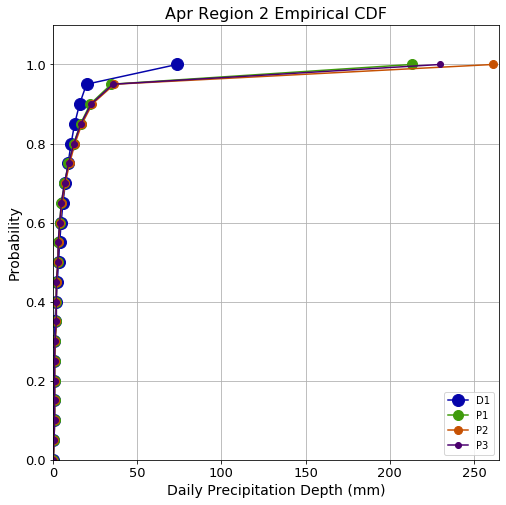

In [442]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Apr2D1Qs, nCompQs, c='xkcd:royal blue', markersize=12, marker='o', 
           linestyle='-', label="D1")
ax11.plot( Apr2P1Qs, nCompQs, c='xkcd:grass green', markersize=10, marker='o', 
           linestyle='-', label="P1")
ax11.plot( Apr2P2Qs, nCompQs, c='xkcd:dark orange', markersize=8, marker='o', 
           linestyle='-', label="P2")
ax11.plot( Apr2P3Qs, nCompQs, c='xkcd:royal purple', markersize=6, marker='o', 
           linestyle='-', label="P3")
ax11.set_title('Apr Region 2 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max2Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

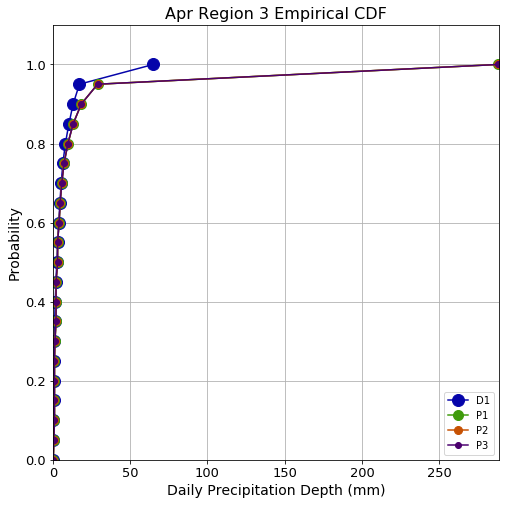

In [443]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Apr3D1Qs, nCompQs, c='xkcd:royal blue', markersize=12, marker='o', 
           linestyle='-', label="D1")
ax11.plot( Apr3P1Qs, nCompQs, c='xkcd:grass green', markersize=10, marker='o', 
           linestyle='-', label="P1")
ax11.plot( Apr3P1Qs, nCompQs, c='xkcd:dark orange', markersize=8, marker='o', 
           linestyle='-', label="P2")
ax11.plot( Apr3P1Qs, nCompQs, c='xkcd:royal purple', markersize=6, marker='o', 
           linestyle='-', label="P3")
ax11.set_title('Apr Region 3 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max3Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

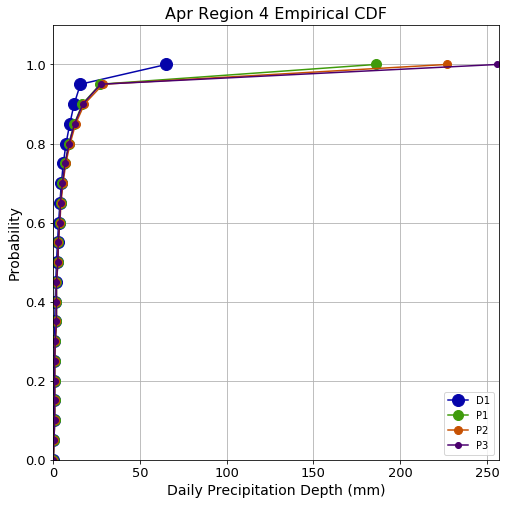

In [444]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Apr4D1Qs, nCompQs, c='xkcd:royal blue', markersize=12, marker='o', 
           linestyle='-', label="D1")
ax11.plot( Apr4P1Qs, nCompQs, c='xkcd:grass green', markersize=10, marker='o', 
           linestyle='-', label="P1")
ax11.plot( Apr4P2Qs, nCompQs, c='xkcd:dark orange', markersize=8, marker='o', 
           linestyle='-', label="P2")
ax11.plot( Apr4P3Qs, nCompQs, c='xkcd:royal purple', markersize=6, marker='o', 
           linestyle='-', label="P3")
ax11.set_title('Apr Region 4 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max4Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### May

In [445]:
MayNum = 5

In [446]:
May1D1DF = MayD1DF[MayD1DF["PRegion_Id"] == 1].copy()
May2D1DF = MayD1DF[MayD1DF["PRegion_Id"] == 2].copy()
May3D1DF = MayD1DF[MayD1DF["PRegion_Id"] == 3].copy()
May4D1DF = MayD1DF[MayD1DF["PRegion_Id"] == 4].copy()

In [447]:
May1P1DF = MayP1DF[MayP1DF["PRegion_Id"] == 1].copy()
May2P1DF = MayP1DF[MayP1DF["PRegion_Id"] == 2].copy()
May3P1DF = MayP1DF[MayP1DF["PRegion_Id"] == 3].copy()
May4P1DF = MayP1DF[MayP1DF["PRegion_Id"] == 4].copy()

In [448]:
May1P2DF = MayP2DF[MayP2DF["PRegion_Id"] == 1].copy()
May2P2DF = MayP2DF[MayP2DF["PRegion_Id"] == 2].copy()
May3P2DF = MayP2DF[MayP2DF["PRegion_Id"] == 3].copy()
May4P2DF = MayP2DF[MayP2DF["PRegion_Id"] == 4].copy()

In [449]:
May1P3DF = MayP3DF[MayP3DF["PRegion_Id"] == 1].copy()
May2P3DF = MayP3DF[MayP3DF["PRegion_Id"] == 2].copy()
May3P3DF = MayP3DF[MayP3DF["PRegion_Id"] == 3].copy()
May4P3DF = MayP3DF[MayP3DF["PRegion_Id"] == 4].copy()

Bayesian estimates of confidence intervals for mean, variance, and standard deviation of the samples

In [450]:
May1D1BSCI = sstats.bayes_mvs( np.array( May1D1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
May2D1BSCI = sstats.bayes_mvs( np.array( May2D1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
May3D1BSCI = sstats.bayes_mvs( np.array( May3D1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
May4D1BSCI = sstats.bayes_mvs( np.array( May4D1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )

In [451]:
May1P1BSCI = sstats.bayes_mvs( np.array( May1P1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
May2P1BSCI = sstats.bayes_mvs( np.array( May2P1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
May3P1BSCI = sstats.bayes_mvs( np.array( May3P1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
May4P1BSCI = sstats.bayes_mvs( np.array( May4P1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )

In [452]:
May1P2BSCI = sstats.bayes_mvs( np.array( May1P2DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
May2P2BSCI = sstats.bayes_mvs( np.array( May2P2DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
May3P2BSCI = sstats.bayes_mvs( np.array( May3P2DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
May4P2BSCI = sstats.bayes_mvs( np.array( May4P2DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )

In [453]:
May1P3BSCI = sstats.bayes_mvs( np.array( May1P3DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
May2P3BSCI = sstats.bayes_mvs( np.array( May2P3DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
May3P3BSCI = sstats.bayes_mvs( np.array( May3P3DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
May4P3BSCI = sstats.bayes_mvs( np.array( May4P3DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )

In [454]:
CMonList.append( MayNum )
CZoneList.append( 1 )
SD1Mean.append( May1D1BSCI[0][0] )
SD1MeanMinCI.append( May1D1BSCI[0][1][0] )
SD1MeanMaxCI.append( May1D1BSCI[0][1][1] )
SD1Var.append( May1D1BSCI[1][0] )
SD1VarMinCI.append( May1D1BSCI[1][1][0] )
SD1VarMaxCI.append( May1D1BSCI[1][1][1] )
SD1Std.append( May1D1BSCI[2][0] )
SD1StdMinCI.append( May1D1BSCI[2][1][0] )
SD1StdMaxCI.append( May1D1BSCI[2][1][1] )
CMonList.append( MayNum )
CZoneList.append( 2 )
SD1Mean.append( May2D1BSCI[0][0] )
SD1MeanMinCI.append( May2D1BSCI[0][1][0] )
SD1MeanMaxCI.append( May2D1BSCI[0][1][1] )
SD1Var.append( May2D1BSCI[1][0] )
SD1VarMinCI.append( May2D1BSCI[1][1][0] )
SD1VarMaxCI.append( May2D1BSCI[1][1][1] )
SD1Std.append( May2D1BSCI[2][0] )
SD1StdMinCI.append( May2D1BSCI[2][1][0] )
SD1StdMaxCI.append( May2D1BSCI[2][1][1] )
CMonList.append( MayNum )
CZoneList.append( 3 )
SD1Mean.append( May3D1BSCI[0][0] )
SD1MeanMinCI.append( May3D1BSCI[0][1][0] )
SD1MeanMaxCI.append( May3D1BSCI[0][1][1] )
SD1Var.append( May3D1BSCI[1][0] )
SD1VarMinCI.append( May3D1BSCI[1][1][0] )
SD1VarMaxCI.append( May3D1BSCI[1][1][1] )
SD1Std.append( May3D1BSCI[2][0] )
SD1StdMinCI.append( May3D1BSCI[2][1][0] )
SD1StdMaxCI.append( May3D1BSCI[2][1][1] )
CMonList.append( MayNum )
CZoneList.append( 4 )
SD1Mean.append( May4D1BSCI[0][0] )
SD1MeanMinCI.append( May4D1BSCI[0][1][0] )
SD1MeanMaxCI.append( May4D1BSCI[0][1][1] )
SD1Var.append( May4D1BSCI[1][0] )
SD1VarMinCI.append( May4D1BSCI[1][1][0] )
SD1VarMaxCI.append( May4D1BSCI[1][1][1] )
SD1Std.append( May4D1BSCI[2][0] )
SD1StdMinCI.append( May4D1BSCI[2][1][0] )
SD1StdMaxCI.append( May4D1BSCI[2][1][1] )

In [455]:
SP1Mean.append( May1P1BSCI[0][0] )
SP1MeanMinCI.append( May1P1BSCI[0][1][0] )
SP1MeanMaxCI.append( May1P1BSCI[0][1][1] )
SP1Var.append( May1P1BSCI[1][0] )
SP1VarMinCI.append( May1P1BSCI[1][1][0] )
SP1VarMaxCI.append( May1P1BSCI[1][1][1] )
SP1Std.append( May1P1BSCI[2][0] )
SP1StdMinCI.append( May1P1BSCI[2][1][0] )
SP1StdMaxCI.append( May1P1BSCI[2][1][1] )
SP1Mean.append( May2P1BSCI[0][0] )
SP1MeanMinCI.append( May2P1BSCI[0][1][0] )
SP1MeanMaxCI.append( May2P1BSCI[0][1][1] )
SP1Var.append( May2P1BSCI[1][0] )
SP1VarMinCI.append( May2P1BSCI[1][1][0] )
SP1VarMaxCI.append( May2P1BSCI[1][1][1] )
SP1Std.append( May2P1BSCI[2][0] )
SP1StdMinCI.append( May2P1BSCI[2][1][0] )
SP1StdMaxCI.append( May2P1BSCI[2][1][1] )
SP1Mean.append( May3P1BSCI[0][0] )
SP1MeanMinCI.append( May3P1BSCI[0][1][0] )
SP1MeanMaxCI.append( May3P1BSCI[0][1][1] )
SP1Var.append( May3P1BSCI[1][0] )
SP1VarMinCI.append( May3P1BSCI[1][1][0] )
SP1VarMaxCI.append( May3P1BSCI[1][1][1] )
SP1Std.append( May3P1BSCI[2][0] )
SP1StdMinCI.append( May3P1BSCI[2][1][0] )
SP1StdMaxCI.append( May3P1BSCI[2][1][1] )
SP1Mean.append( May4P1BSCI[0][0] )
SP1MeanMinCI.append( May4P1BSCI[0][1][0] )
SP1MeanMaxCI.append( May4P1BSCI[0][1][1] )
SP1Var.append( May4P1BSCI[1][0] )
SP1VarMinCI.append( May4P1BSCI[1][1][0] )
SP1VarMaxCI.append( May4P1BSCI[1][1][1] )
SP1Std.append( May4P1BSCI[2][0] )
SP1StdMinCI.append( May4P1BSCI[2][1][0] )
SP1StdMaxCI.append( May4P1BSCI[2][1][1] )

In [456]:
SP2Mean.append( May1P2BSCI[0][0] )
SP2MeanMinCI.append( May1P2BSCI[0][1][0] )
SP2MeanMaxCI.append( May1P2BSCI[0][1][1] )
SP2Var.append( May1P2BSCI[1][0] )
SP2VarMinCI.append( May1P2BSCI[1][1][0] )
SP2VarMaxCI.append( May1P2BSCI[1][1][1] )
SP2Std.append( May1P2BSCI[2][0] )
SP2StdMinCI.append( May1P2BSCI[2][1][0] )
SP2StdMaxCI.append( May1P2BSCI[2][1][1] )
SP2Mean.append( May2P2BSCI[0][0] )
SP2MeanMinCI.append( May2P2BSCI[0][1][0] )
SP2MeanMaxCI.append( May2P2BSCI[0][1][1] )
SP2Var.append( May2P2BSCI[1][0] )
SP2VarMinCI.append( May2P2BSCI[1][1][0] )
SP2VarMaxCI.append( May2P2BSCI[1][1][1] )
SP2Std.append( May2P2BSCI[2][0] )
SP2StdMinCI.append( May2P2BSCI[2][1][0] )
SP2StdMaxCI.append( May2P2BSCI[2][1][1] )
SP2Mean.append( May3P2BSCI[0][0] )
SP2MeanMinCI.append( May3P2BSCI[0][1][0] )
SP2MeanMaxCI.append( May3P2BSCI[0][1][1] )
SP2Var.append( May3P2BSCI[1][0] )
SP2VarMinCI.append( May3P2BSCI[1][1][0] )
SP2VarMaxCI.append( May3P2BSCI[1][1][1] )
SP2Std.append( May3P2BSCI[2][0] )
SP2StdMinCI.append( May3P2BSCI[2][1][0] )
SP2StdMaxCI.append( May3P2BSCI[2][1][1] )
SP2Mean.append( May4P2BSCI[0][0] )
SP2MeanMinCI.append( May4P2BSCI[0][1][0] )
SP2MeanMaxCI.append( May4P2BSCI[0][1][1] )
SP2Var.append( May4P2BSCI[1][0] )
SP2VarMinCI.append( May4P2BSCI[1][1][0] )
SP2VarMaxCI.append( May4P2BSCI[1][1][1] )
SP2Std.append( May4P2BSCI[2][0] )
SP2StdMinCI.append( May4P2BSCI[2][1][0] )
SP2StdMaxCI.append( May4P2BSCI[2][1][1] )

In [457]:
SP3Mean.append( May1P3BSCI[0][0] )
SP3MeanMinCI.append( May1P3BSCI[0][1][0] )
SP3MeanMaxCI.append( May1P3BSCI[0][1][1] )
SP3Var.append( May1P3BSCI[1][0] )
SP3VarMinCI.append( May1P3BSCI[1][1][0] )
SP3VarMaxCI.append( May1P3BSCI[1][1][1] )
SP3Std.append( May1P3BSCI[2][0] )
SP3StdMinCI.append( May1P3BSCI[2][1][0] )
SP3StdMaxCI.append( May1P3BSCI[2][1][1] )
SP3Mean.append( May2P3BSCI[0][0] )
SP3MeanMinCI.append( May2P3BSCI[0][1][0] )
SP3MeanMaxCI.append( May2P3BSCI[0][1][1] )
SP3Var.append( May2P3BSCI[1][0] )
SP3VarMinCI.append( May2P3BSCI[1][1][0] )
SP3VarMaxCI.append( May2P3BSCI[1][1][1] )
SP3Std.append( May2P3BSCI[2][0] )
SP3StdMinCI.append( May2P3BSCI[2][1][0] )
SP3StdMaxCI.append( May2P3BSCI[2][1][1] )
SP3Mean.append( May3P3BSCI[0][0] )
SP3MeanMinCI.append( May3P3BSCI[0][1][0] )
SP3MeanMaxCI.append( May3P3BSCI[0][1][1] )
SP3Var.append( May3P3BSCI[1][0] )
SP3VarMinCI.append( May3P3BSCI[1][1][0] )
SP3VarMaxCI.append( May3P3BSCI[1][1][1] )
SP3Std.append( May3P3BSCI[2][0] )
SP3StdMinCI.append( May3P3BSCI[2][1][0] )
SP3StdMaxCI.append( May3P3BSCI[2][1][1] )
SP3Mean.append( May4P3BSCI[0][0] )
SP3MeanMinCI.append( May4P3BSCI[0][1][0] )
SP3MeanMaxCI.append( May4P3BSCI[0][1][1] )
SP3Var.append( May4P3BSCI[1][0] )
SP3VarMinCI.append( May4P3BSCI[1][1][0] )
SP3VarMaxCI.append( May4P3BSCI[1][1][1] )
SP3Std.append( May4P3BSCI[2][0] )
SP3StdMinCI.append( May4P3BSCI[2][1][0] )
SP3StdMaxCI.append( May4P3BSCI[2][1][1] )

#### T-Test

T-Test for the means of two independent samples. Two-sided test for the null hypothesis that 2 independent samples hae identical average values. Test assumes that the populations have identical variances.

If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [458]:
May1TTD1toP1 = sstats.ttest_ind( np.array( May1D1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( May1P1DF["Precip_mm"], dtype=np.int32 ) )

In [459]:
May1TTD1toP1Pval = May1TTD1toP1[1]
print("Region 1, P-Value for LOCA D1 and P1 from same population is: %g" % May1TTD1toP1Pval )

Region 1, P-Value for LOCA D1 and P1 from same population is: 0


In [460]:
May2TTD1toP1 = sstats.ttest_ind( np.array( May2D1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( May2P1DF["Precip_mm"], dtype=np.int32 ) )

In [461]:
May2TTD1toP1Pval = May2TTD1toP1[1]
print("Region 2, P-Value for LOCA D1 and P1 from same population is: %g" % May2TTD1toP1Pval )

Region 2, P-Value for LOCA D1 and P1 from same population is: 0


In [462]:
May3TTD1toP1 = sstats.ttest_ind( np.array( May3D1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( May3P1DF["Precip_mm"], dtype=np.int32 ) )

In [463]:
May3TTD1toP1Pval = May3TTD1toP1[1]
print("Region 3, P-Value for LOCA D1 and P1 from same population is: %g" % May3TTD1toP1Pval )

Region 3, P-Value for LOCA D1 and P1 from same population is: 0


In [464]:
May4TTD1toP1 = sstats.ttest_ind( np.array( May4D1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( May4P1DF["Precip_mm"], dtype=np.int32 ) )

In [465]:
May4TTD1toP1Pval = May4TTD1toP1[1]
print("Region 4, P-Value for LOCA D1 and P1 from same population is: %g" % May4TTD1toP1Pval )

Region 4, P-Value for LOCA D1 and P1 from same population is: 0


In [466]:
May1TTP1toP2 = sstats.ttest_ind( np.array( May1P1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( May1P2DF["Precip_mm"], dtype=np.int32 ) )

In [467]:
May1TTP1toP2Pval = May1TTP1toP2[1]
print("Region 1, P-Value for LOCA P1 and P2 from same population is: %g" % May1TTP1toP2Pval )

Region 1, P-Value for LOCA P1 and P2 from same population is: 0.000285778


In [468]:
May2TTP1toP2 = sstats.ttest_ind( np.array( May2P1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( May2P2DF["Precip_mm"], dtype=np.int32 ) )

In [469]:
May2TTP1toP2Pval = May2TTP1toP2[1]
print("Region 2, P-Value for LOCA P1 and P2 from same population is: %g" % May2TTP1toP2Pval )

Region 2, P-Value for LOCA P1 and P2 from same population is: 0.00390963


In [470]:
May3TTP1toP2 = sstats.ttest_ind( np.array( May3P1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( May3P2DF["Precip_mm"], dtype=np.int32 ) )

In [471]:
May3TTP1toP2Pval = May3TTP1toP2[1]
print("Region 3, P-Value for LOCA P1 and P2 from same population is: %g" % May3TTP1toP2Pval )

Region 3, P-Value for LOCA P1 and P2 from same population is: 7.85664e-05


In [472]:
May4TTP1toP2 = sstats.ttest_ind( np.array( May4P1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( May4P2DF["Precip_mm"], dtype=np.int32 ) )

In [473]:
May4TTP1toP2Pval = May4TTP1toP2[1]
print("Region 4, P-Value for LOCA P1 and P2 from same population is: %g" % May4TTP1toP2Pval )

Region 4, P-Value for LOCA P1 and P2 from same population is: 0.000805177


In [474]:
May1TTP2toP3 = sstats.ttest_ind( np.array( May1P2DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( May1P3DF["Precip_mm"], dtype=np.int32 ) )

In [475]:
May1TTP2toP3Pval = May1TTP2toP3[1]
print("Region 1, P-Value for LOCA P2 and P3 from same population is: %g" % May1TTP2toP3Pval )

Region 1, P-Value for LOCA P2 and P3 from same population is: 0.291718


In [476]:
May2TTP2toP3 = sstats.ttest_ind( np.array( May2P2DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( May2P3DF["Precip_mm"], dtype=np.int32 ) )

In [477]:
May2TTP2toP3Pval = May2TTP2toP3[1]
print("Region 2, P-Value for LOCA P2 and P3 from same population is: %g" % May2TTP2toP3Pval )

Region 2, P-Value for LOCA P2 and P3 from same population is: 0.0157522


In [478]:
May3TTP2toP3 = sstats.ttest_ind( np.array( May3P2DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( May3P3DF["Precip_mm"], dtype=np.int32 ) )

In [479]:
May3TTP2toP3Pval = May3TTP2toP3[1]
print("Region 3, P-Value for LOCA P2 and P3 from same population is: %g" % May3TTP2toP3Pval )

Region 3, P-Value for LOCA P2 and P3 from same population is: 0.0825196


In [480]:
May4TTP2toP3 = sstats.ttest_ind( np.array( May4P2DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( May4P3DF["Precip_mm"], dtype=np.int32 ) )

In [481]:
May4TTP2toP3Pval = May4TTP2toP3[1]
print("Region 4, P-Value for LOCA P2 and P3 from same population is: %g" % May4TTP2toP3Pval )

Region 4, P-Value for LOCA P2 and P3 from same population is: 0.479371


#### Mann-Whitney Rank Test

Nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample. This test can be used to investigate whether two independent samples were selected from populations having the same distribution.

Null hypothesis, $H_{0}$, is that the distributions of both populations are equal.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of being from the same distribution.

In [482]:
May1MWUD1toP1 = sstats.mannwhitneyu( np.array( May1D1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( May1P1DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [483]:
May1MWUD1toP1Pval = May1MWUD1toP1[1]
print("Region 1, P-Value for LOCA D1 and P1 from same distribution is: %g" % May1MWUD1toP1Pval )

Region 1, P-Value for LOCA D1 and P1 from same distribution is: 0


In [484]:
May2MWUD1toP1 = sstats.mannwhitneyu( np.array( May2D1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( May2P1DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [485]:
May2MWUD1toP1Pval = May2MWUD1toP1[1]
print("Region 2, P-Value for LOCA D1 and P1 from same distribution is: %g" % May2MWUD1toP1Pval )

Region 2, P-Value for LOCA D1 and P1 from same distribution is: 0


In [486]:
May3MWUD1toP1 = sstats.mannwhitneyu( np.array( May3D1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( May3P1DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [487]:
May3MWUD1toP1Pval = May3MWUD1toP1[1]
print("Region 3, P-Value for LOCA D1 and P1 from same distribution is: %g" % May3MWUD1toP1Pval )

Region 3, P-Value for LOCA D1 and P1 from same distribution is: 0


In [488]:
May4MWUD1toP1 = sstats.mannwhitneyu( np.array( May4D1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( May4P1DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [489]:
May4MWUD1toP1Pval = May4MWUD1toP1[1]
print("Region 4, P-Value for LOCA D1 and P1 from same distribution is: %g" % May4MWUD1toP1Pval )

Region 4, P-Value for LOCA D1 and P1 from same distribution is: 0


In [490]:
May1MWUP1toP2 = sstats.mannwhitneyu( np.array( May1P1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( May1P2DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [491]:
May1MWUP1toP2Pval = May1MWUP1toP2[1]
print("Region 1, P-Value for LOCA P1 and P2 from same distribution is: %g" % May1MWUP1toP2Pval )

Region 1, P-Value for LOCA P1 and P2 from same distribution is: 0.78603


In [492]:
May2MWUP1toP2 = sstats.mannwhitneyu( np.array( May2P1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( May2P2DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [493]:
May2MWUP1toP2Pval = May2MWUP1toP2[1]
print("Region 2, P-Value for LOCA P1 and P2 from same distribution is: %g" % May2MWUP1toP2Pval )

Region 2, P-Value for LOCA P1 and P2 from same distribution is: 0.190074


In [494]:
May3MWUP1toP2 = sstats.mannwhitneyu( np.array( May3P1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( May3P2DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [495]:
May3MWUP1toP2Pval = May3MWUP1toP2[1]
print("Region 3, P-Value for LOCA P1 and P2 from same distribution is: %g" % May3MWUP1toP2Pval )

Region 3, P-Value for LOCA P1 and P2 from same distribution is: 0.335789


In [496]:
May4MWUP1toP2 = sstats.mannwhitneyu( np.array( May4P1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( May4P2DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [497]:
May4MWUP1toP2Pval = May4MWUP1toP2[1]
print("Region 4, P-Value for LOCA P1 and P2 from same distribution is: %g" % May4MWUP1toP2Pval )

Region 4, P-Value for LOCA P1 and P2 from same distribution is: 0.388681


In [498]:
May1MWUP2toP3 = sstats.mannwhitneyu( np.array( May1P2DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( May1P3DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [499]:
May1MWUP2toP3Pval = May1MWUP2toP3[1]
print("Region 1, P-Value for LOCA P2 and P3 from same distribution is: %g" % May1MWUP2toP3Pval )

Region 1, P-Value for LOCA P2 and P3 from same distribution is: 4.2193e-10


In [500]:
May2MWUP2toP3 = sstats.mannwhitneyu( np.array( May2P2DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( May2P3DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [501]:
May2MWUP2toP3Pval = May2MWUP2toP3[1]
print("Region 2, P-Value for LOCA P2 and P3 from same distribution is: %g" % May2MWUP2toP3Pval )

Region 2, P-Value for LOCA P2 and P3 from same distribution is: 0.000323473


In [502]:
May3MWUP2toP3 = sstats.mannwhitneyu( np.array( May3P2DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( May3P3DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [503]:
May3MWUP2toP3Pval = May3MWUP2toP3[1]
print("Region 3, P-Value for LOCA P2 and P3 from same distribution is: %g" % May3MWUP2toP3Pval )

Region 3, P-Value for LOCA P2 and P3 from same distribution is: 1.10869e-08


In [504]:
May4MWUP2toP3 = sstats.mannwhitneyu( np.array( May4P2DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( May4P3DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [505]:
May4MWUP2toP3Pval = May4MWUP2toP3[1]
print("Region 4, P-Value for LOCA P2 and P3 from same distribution is: %g" % May4MWUP2toP3Pval )

Region 4, P-Value for LOCA P2 and P3 from same distribution is: 0.00144982


#### Kruskal-Wallis Test

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of the same population median.

In [506]:
May1KWD1toP1 = sstats.kruskal( np.array( May1D1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( May1P1DF["Precip_mm"], dtype=np.int32 ) )

In [507]:
May1KWD1toP1Pval = May1KWD1toP1[1]
print("Region 1, P-Value for LOCA D1 and P1 have the same median is: %g" % May1KWD1toP1Pval )

Region 1, P-Value for LOCA D1 and P1 have the same median is: 1


In [508]:
May2KWD1toP1 = sstats.kruskal( np.array( May2D1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( May2P1DF["Precip_mm"], dtype=np.int32 ) )

In [509]:
May2KWD1toP1Pval = May2KWD1toP1[1]
print("Region 2, P-Value for LOCA D1 and P1 have the same median is: %g" % May2KWD1toP1Pval )

Region 2, P-Value for LOCA D1 and P1 have the same median is: 1


In [510]:
May3KWD1toP1 = sstats.kruskal( np.array( May3D1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( May3P1DF["Precip_mm"], dtype=np.int32 ) )

In [511]:
May3KWD1toP1Pval = May3KWD1toP1[1]
print("Region 3, P-Value for LOCA D1 and P1 have the same median is: %g" % May3KWD1toP1Pval )

Region 3, P-Value for LOCA D1 and P1 have the same median is: 1


In [512]:
May4KWD1toP1 = sstats.kruskal( np.array( May4D1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( May4P1DF["Precip_mm"], dtype=np.int32 ) )

In [513]:
May4KWD1toP1Pval = May4KWD1toP1[1]
print("Region 4, P-Value for LOCA D1 and P1 have the same median is: %g" % May4KWD1toP1Pval )

Region 4, P-Value for LOCA D1 and P1 have the same median is: 0


In [514]:
May1KWP1toP2 = sstats.kruskal( np.array( May1P1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( May1P2DF["Precip_mm"], dtype=np.int32 ) )

In [515]:
May1KWP1toP2Pval = May1KWP1toP2[1]
print("Region 1, P-Value for LOCA P1 and P2 have the same median is: %g" % May1KWP1toP2Pval )

Region 1, P-Value for LOCA P1 and P2 have the same median is: 0


In [516]:
May2KWP1toP2 = sstats.kruskal( np.array( May2P1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( May2P2DF["Precip_mm"], dtype=np.int32 ) )

In [517]:
May2KWP1toP2Pval = May2KWP1toP2[1]
print("Region 2, P-Value for LOCA P1 and P2 have the same median is: %g" % May2KWP1toP2Pval )

Region 2, P-Value for LOCA P1 and P2 have the same median is: 1


In [518]:
May3KWP1toP2 = sstats.kruskal( np.array( May3P1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( May3P2DF["Precip_mm"], dtype=np.int32 ) )

In [519]:
May3KWP1toP2Pval = May3KWP1toP2[1]
print("Region 3, P-Value for LOCA P1 and P2 have the same median is: %g" % May3KWP1toP2Pval )

Region 3, P-Value for LOCA P1 and P2 have the same median is: 1


In [520]:
May4KWP1toP2 = sstats.kruskal( np.array( May4P1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( May4P2DF["Precip_mm"], dtype=np.int32 ) )

In [521]:
May4KWP1toP2Pval = May4KWP1toP2[1]
print("Region 4, P-Value for LOCA P1 and P2 have the same median is: %g" % May4KWP1toP2Pval )

Region 4, P-Value for LOCA P1 and P2 have the same median is: 1


In [522]:
May1KWP2toP3 = sstats.kruskal( np.array( May1P2DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( May1P3DF["Precip_mm"], dtype=np.int32 ) )

In [523]:
May1KWP2toP3Pval = May1KWP2toP3[1]
print("Region 1, P-Value for LOCA P2 and P3 have the same median is: %g" % May1KWP2toP3Pval )

Region 1, P-Value for LOCA P2 and P3 have the same median is: 0


In [524]:
May2KWP2toP3 = sstats.kruskal( np.array( May2P2DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( May2P3DF["Precip_mm"], dtype=np.int32 ) )

In [525]:
May2KWP2toP3Pval = May2KWP2toP3[1]
print("Region 2, P-Value for LOCA P2 and P3 have the same median is: %g" % May2KWP2toP3Pval )

Region 2, P-Value for LOCA P2 and P3 have the same median is: 0


In [526]:
May3KWP2toP3 = sstats.kruskal( np.array( May3P2DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( May3P3DF["Precip_mm"], dtype=np.int32 ) )

In [527]:
May3KWP2toP3Pval = May3KWP2toP3[1]
print("Region 3, P-Value for LOCA P2 and P3 have the same median is: %g" % May3KWP2toP3Pval )

Region 3, P-Value for LOCA P2 and P3 have the same median is: 1


In [528]:
May4KWP2toP3 = sstats.kruskal( np.array( May4P2DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( May4P3DF["Precip_mm"], dtype=np.int32 ) )

In [529]:
May4KWP2toP3Pval = May4KWP2toP3[1]
print("Region 4, P-Value for LOCA P2 and P3 have the same median is: %g" % May4KWP2toP3Pval )

Region 4, P-Value for LOCA P2 and P3 have the same median is: 1


In [530]:
May4P3DF["Precip_mm"].median(), May4P2DF["Precip_mm"].median(), May4P1DF["Precip_mm"].median(), May4D1DF["Precip_mm"].median()

(3.0, 3.0, 3.0, 2.43206524848938)

#### Plots

In [531]:
May1D1Qs = May1D1DF["Precip_mm"].quantile(q=nCompQs)
May1P1Qs = May1P1DF["Precip_mm"].quantile(q=nCompQs)
May1P2Qs = May1P2DF["Precip_mm"].quantile(q=nCompQs)
May1P3Qs = May1P3DF["Precip_mm"].quantile(q=nCompQs)
May2D1Qs = May2D1DF["Precip_mm"].quantile(q=nCompQs)
May2P1Qs = May2P1DF["Precip_mm"].quantile(q=nCompQs)
May2P2Qs = May2P2DF["Precip_mm"].quantile(q=nCompQs)
May2P3Qs = May2P3DF["Precip_mm"].quantile(q=nCompQs)
May3D1Qs = May3D1DF["Precip_mm"].quantile(q=nCompQs)
May3P1Qs = May3P1DF["Precip_mm"].quantile(q=nCompQs)
May3P2Qs = May3P2DF["Precip_mm"].quantile(q=nCompQs)
May3P3Qs = May3P3DF["Precip_mm"].quantile(q=nCompQs)
May4D1Qs = May4D1DF["Precip_mm"].quantile(q=nCompQs)
May4P1Qs = May4P1DF["Precip_mm"].quantile(q=nCompQs)
May4P2Qs = May4P2DF["Precip_mm"].quantile(q=nCompQs)
May4P3Qs = May4P3DF["Precip_mm"].quantile(q=nCompQs)

In [532]:
max1Qs = max( May1D1Qs.max(), May1P1Qs.max(), May1P2Qs.max(), May1P3Qs.max() )
max1Qs = round(max1Qs) + 2.0
max1Qs

475.0

In [533]:
max2Qs = max( May2D1Qs.max(), May2P1Qs.max(), May2P2Qs.max(), May2P3Qs.max() )
max2Qs = round(max2Qs) + 4.0
max2Qs

431.0

In [534]:
max3Qs = max( May3D1Qs.max(), May3P1Qs.max(), May3P2Qs.max(), May3P3Qs.max() )
max3Qs = round(max3Qs) + 1.0
max3Qs

568.0

In [535]:
max4Qs = max( May4D1Qs.max(), May4P1Qs.max(), May4P2Qs.max(), May4P3Qs.max() )
max4Qs = round(max4Qs) + 1.0
max4Qs

479.0

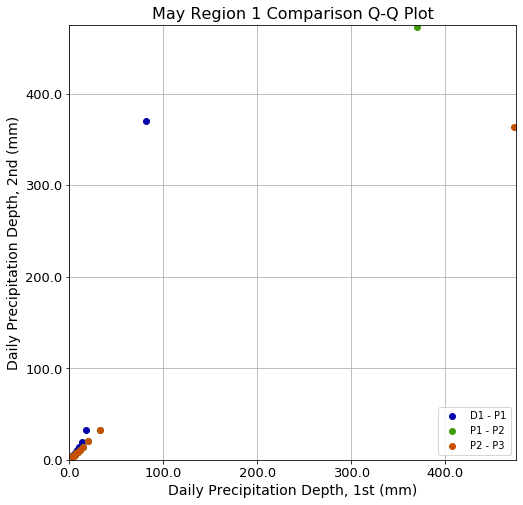

In [536]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( May1D1Qs, May1P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( May1P1Qs, May1P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( May1P2Qs, May1P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.set_title('May Region 1 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max1Qs) )
ax11.set_ylim( (0.0, max1Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

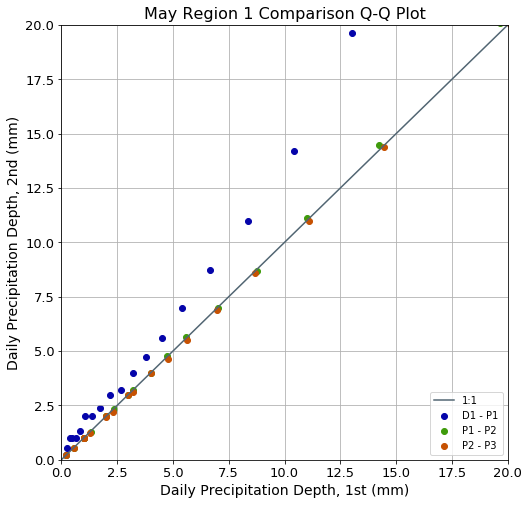

In [537]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( May1D1Qs, May1P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( May1P1Qs, May1P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( May1P2Qs, May1P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.plot( [0.0, max1Qs], [0.0, max1Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('May Region 1 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 20.0) )
ax11.set_ylim( (0.0, 20.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

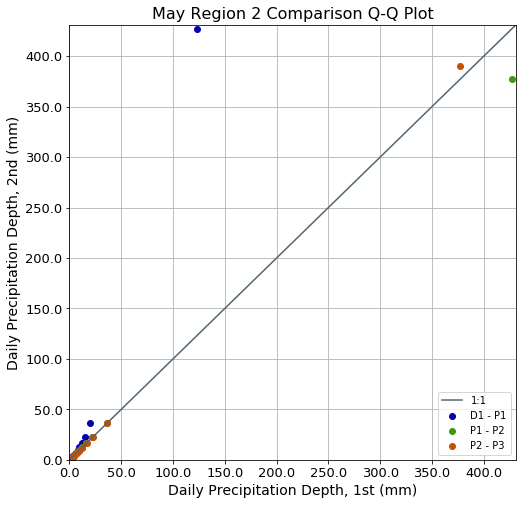

In [538]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( May2D1Qs, May2P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( May2P1Qs, May2P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( May2P2Qs, May2P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.plot( [0.0, max2Qs], [0.0, max2Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('May Region 2 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max2Qs) )
ax11.set_ylim( (0.0, max2Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

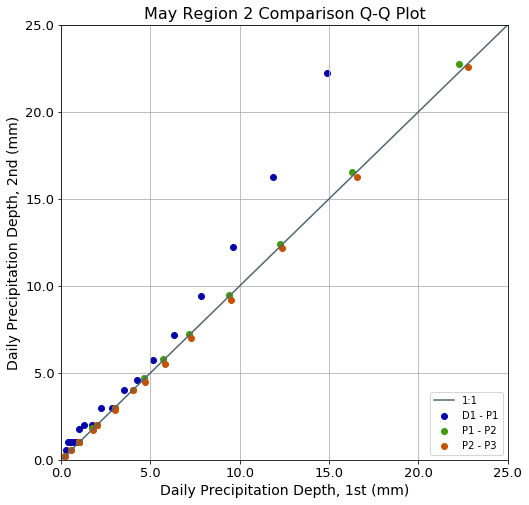

In [539]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( May2D1Qs, May2P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( May2P1Qs, May2P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( May2P2Qs, May2P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.plot( [0.0, max2Qs], [0.0, max2Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('May Region 2 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

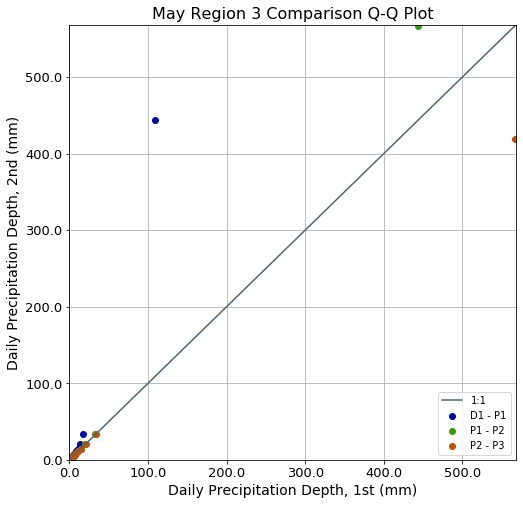

In [540]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( May3D1Qs, May3P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( May3P1Qs, May3P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( May3P2Qs, May3P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.plot( [0.0, max3Qs], [0.0, max3Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('May Region 3 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max3Qs) )
ax11.set_ylim( (0.0, max3Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

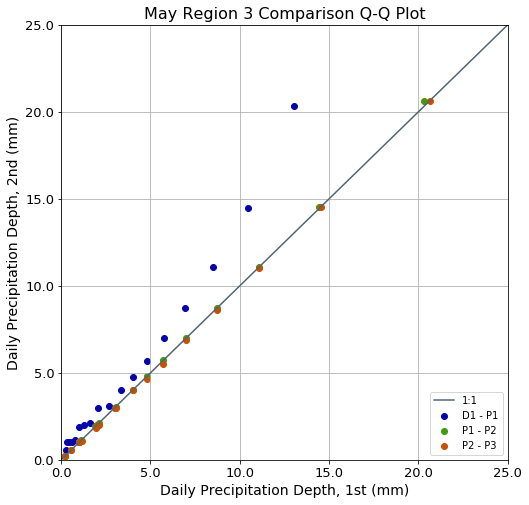

In [541]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( May3D1Qs, May3P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( May3P1Qs, May3P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( May3P2Qs, May3P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.plot( [0.0, max3Qs], [0.0, max3Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('May Region 3 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

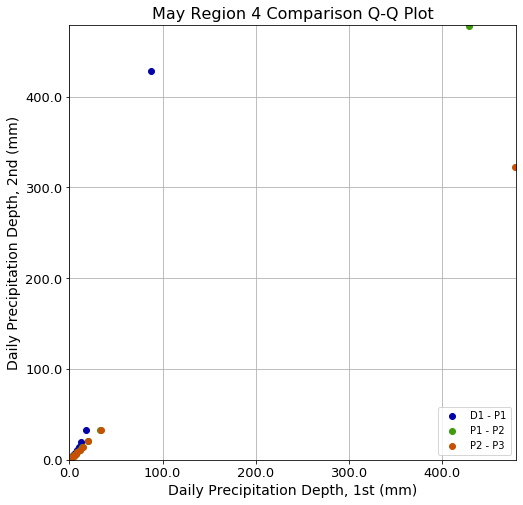

In [542]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( May4D1Qs, May4P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( May4P1Qs, May4P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( May4P2Qs, May4P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.set_title('May Region 4 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max4Qs) )
ax11.set_ylim( (0.0, max4Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

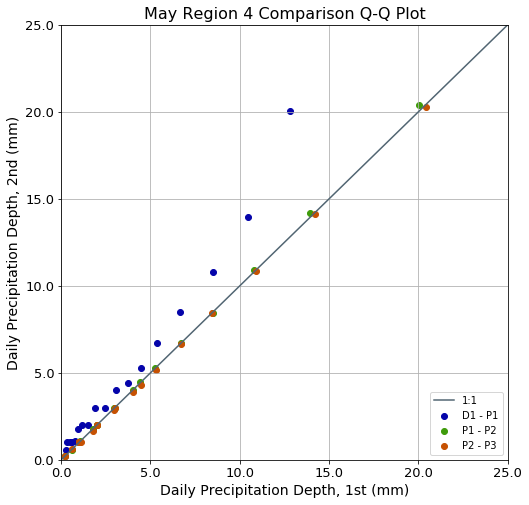

In [543]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( May4D1Qs, May4P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( May4P1Qs, May4P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( May4P2Qs, May4P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.plot( [0.0, max4Qs], [0.0, max4Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('May Region 4 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

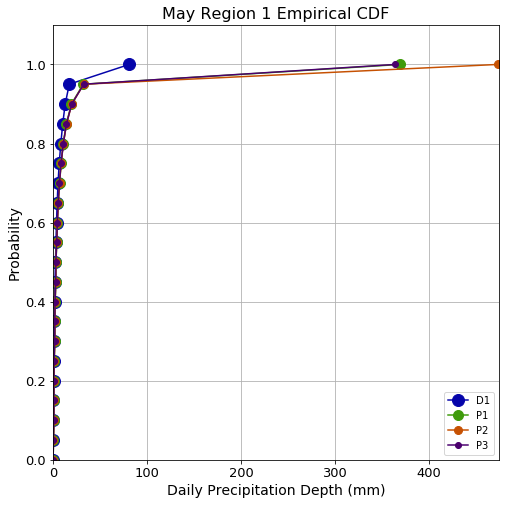

In [544]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( May1D1Qs, nCompQs, c='xkcd:royal blue', markersize=12, marker='o', 
           linestyle='-', label="D1")
ax11.plot( May1P1Qs, nCompQs, c='xkcd:grass green', markersize=10, marker='o', 
           linestyle='-', label="P1")
ax11.plot( May1P2Qs, nCompQs, c='xkcd:dark orange', markersize=8, marker='o', 
           linestyle='-', label="P2")
ax11.plot( May1P3Qs, nCompQs, c='xkcd:royal purple', markersize=6, marker='o', 
           linestyle='-', label="P3")
ax11.set_title('May Region 1 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max1Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

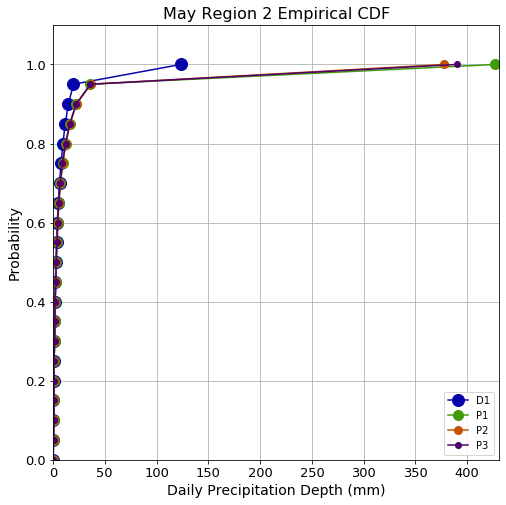

In [545]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( May2D1Qs, nCompQs, c='xkcd:royal blue', markersize=12, marker='o', 
           linestyle='-', label="D1")
ax11.plot( May2P1Qs, nCompQs, c='xkcd:grass green', markersize=10, marker='o', 
           linestyle='-', label="P1")
ax11.plot( May2P2Qs, nCompQs, c='xkcd:dark orange', markersize=8, marker='o', 
           linestyle='-', label="P2")
ax11.plot( May2P3Qs, nCompQs, c='xkcd:royal purple', markersize=6, marker='o', 
           linestyle='-', label="P3")
ax11.set_title('May Region 2 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max2Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

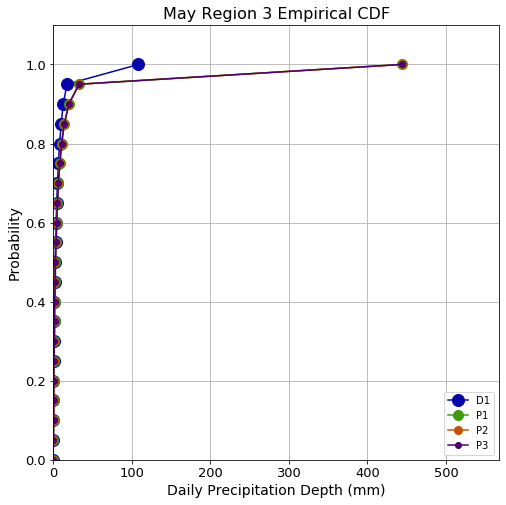

In [546]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( May3D1Qs, nCompQs, c='xkcd:royal blue', markersize=12, marker='o', 
           linestyle='-', label="D1")
ax11.plot( May3P1Qs, nCompQs, c='xkcd:grass green', markersize=10, marker='o', 
           linestyle='-', label="P1")
ax11.plot( May3P1Qs, nCompQs, c='xkcd:dark orange', markersize=8, marker='o', 
           linestyle='-', label="P2")
ax11.plot( May3P1Qs, nCompQs, c='xkcd:royal purple', markersize=6, marker='o', 
           linestyle='-', label="P3")
ax11.set_title('May Region 3 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max3Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

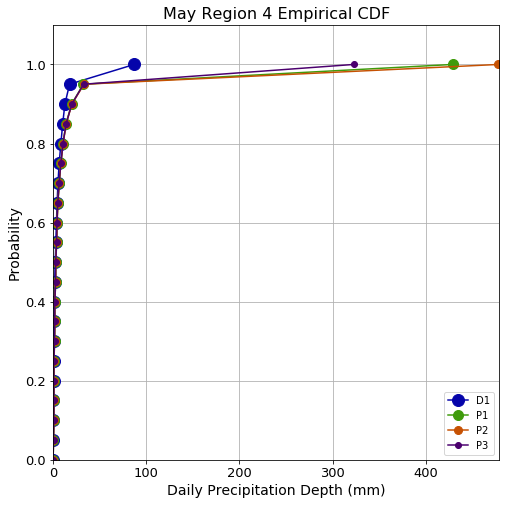

In [547]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( May4D1Qs, nCompQs, c='xkcd:royal blue', markersize=12, marker='o', 
           linestyle='-', label="D1")
ax11.plot( May4P1Qs, nCompQs, c='xkcd:grass green', markersize=10, marker='o', 
           linestyle='-', label="P1")
ax11.plot( May4P2Qs, nCompQs, c='xkcd:dark orange', markersize=8, marker='o', 
           linestyle='-', label="P2")
ax11.plot( May4P3Qs, nCompQs, c='xkcd:royal purple', markersize=6, marker='o', 
           linestyle='-', label="P3")
ax11.set_title('May Region 4 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max4Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### Jun

In [548]:
JunNum = 6

In [549]:
Jun1D1DF = JunD1DF[JunD1DF["PRegion_Id"] == 1].copy()
Jun2D1DF = JunD1DF[JunD1DF["PRegion_Id"] == 2].copy()
Jun3D1DF = JunD1DF[JunD1DF["PRegion_Id"] == 3].copy()
Jun4D1DF = JunD1DF[JunD1DF["PRegion_Id"] == 4].copy()

In [550]:
Jun1P1DF = JunP1DF[JunP1DF["PRegion_Id"] == 1].copy()
Jun2P1DF = JunP1DF[JunP1DF["PRegion_Id"] == 2].copy()
Jun3P1DF = JunP1DF[JunP1DF["PRegion_Id"] == 3].copy()
Jun4P1DF = JunP1DF[JunP1DF["PRegion_Id"] == 4].copy()

In [551]:
Jun1P2DF = JunP2DF[JunP2DF["PRegion_Id"] == 1].copy()
Jun2P2DF = JunP2DF[JunP2DF["PRegion_Id"] == 2].copy()
Jun3P2DF = JunP2DF[JunP2DF["PRegion_Id"] == 3].copy()
Jun4P2DF = JunP2DF[JunP2DF["PRegion_Id"] == 4].copy()

In [552]:
Jun1P3DF = JunP3DF[JunP3DF["PRegion_Id"] == 1].copy()
Jun2P3DF = JunP3DF[JunP3DF["PRegion_Id"] == 2].copy()
Jun3P3DF = JunP3DF[JunP3DF["PRegion_Id"] == 3].copy()
Jun4P3DF = JunP3DF[JunP3DF["PRegion_Id"] == 4].copy()

Bayesian estimates of confidence intervals for mean, variance, and standard deviation of the samples

In [553]:
Jun1D1BSCI = sstats.bayes_mvs( np.array( Jun1D1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Jun2D1BSCI = sstats.bayes_mvs( np.array( Jun2D1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Jun3D1BSCI = sstats.bayes_mvs( np.array( Jun3D1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Jun4D1BSCI = sstats.bayes_mvs( np.array( Jun4D1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )

In [554]:
Jun1P1BSCI = sstats.bayes_mvs( np.array( Jun1P1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Jun2P1BSCI = sstats.bayes_mvs( np.array( Jun2P1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Jun3P1BSCI = sstats.bayes_mvs( np.array( Jun3P1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Jun4P1BSCI = sstats.bayes_mvs( np.array( Jun4P1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )

In [555]:
Jun1P2BSCI = sstats.bayes_mvs( np.array( Jun1P2DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Jun2P2BSCI = sstats.bayes_mvs( np.array( Jun2P2DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Jun3P2BSCI = sstats.bayes_mvs( np.array( Jun3P2DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Jun4P2BSCI = sstats.bayes_mvs( np.array( Jun4P2DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )

In [556]:
Jun1P3BSCI = sstats.bayes_mvs( np.array( Jun1P3DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Jun2P3BSCI = sstats.bayes_mvs( np.array( Jun2P3DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Jun3P3BSCI = sstats.bayes_mvs( np.array( Jun3P3DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Jun4P3BSCI = sstats.bayes_mvs( np.array( Jun4P3DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )

In [557]:
CMonList.append( JunNum )
CZoneList.append( 1 )
SD1Mean.append( Jun1D1BSCI[0][0] )
SD1MeanMinCI.append( Jun1D1BSCI[0][1][0] )
SD1MeanMaxCI.append( Jun1D1BSCI[0][1][1] )
SD1Var.append( Jun1D1BSCI[1][0] )
SD1VarMinCI.append( Jun1D1BSCI[1][1][0] )
SD1VarMaxCI.append( Jun1D1BSCI[1][1][1] )
SD1Std.append( Jun1D1BSCI[2][0] )
SD1StdMinCI.append( Jun1D1BSCI[2][1][0] )
SD1StdMaxCI.append( Jun1D1BSCI[2][1][1] )
CMonList.append( JunNum )
CZoneList.append( 2 )
SD1Mean.append( Jun2D1BSCI[0][0] )
SD1MeanMinCI.append( Jun2D1BSCI[0][1][0] )
SD1MeanMaxCI.append( Jun2D1BSCI[0][1][1] )
SD1Var.append( Jun2D1BSCI[1][0] )
SD1VarMinCI.append( Jun2D1BSCI[1][1][0] )
SD1VarMaxCI.append( Jun2D1BSCI[1][1][1] )
SD1Std.append( Jun2D1BSCI[2][0] )
SD1StdMinCI.append( Jun2D1BSCI[2][1][0] )
SD1StdMaxCI.append( Jun2D1BSCI[2][1][1] )
CMonList.append( JunNum )
CZoneList.append( 3 )
SD1Mean.append( Jun3D1BSCI[0][0] )
SD1MeanMinCI.append( Jun3D1BSCI[0][1][0] )
SD1MeanMaxCI.append( Jun3D1BSCI[0][1][1] )
SD1Var.append( Jun3D1BSCI[1][0] )
SD1VarMinCI.append( Jun3D1BSCI[1][1][0] )
SD1VarMaxCI.append( Jun3D1BSCI[1][1][1] )
SD1Std.append( Jun3D1BSCI[2][0] )
SD1StdMinCI.append( Jun3D1BSCI[2][1][0] )
SD1StdMaxCI.append( Jun3D1BSCI[2][1][1] )
CMonList.append( JunNum )
CZoneList.append( 4 )
SD1Mean.append( Jun4D1BSCI[0][0] )
SD1MeanMinCI.append( Jun4D1BSCI[0][1][0] )
SD1MeanMaxCI.append( Jun4D1BSCI[0][1][1] )
SD1Var.append( Jun4D1BSCI[1][0] )
SD1VarMinCI.append( Jun4D1BSCI[1][1][0] )
SD1VarMaxCI.append( Jun4D1BSCI[1][1][1] )
SD1Std.append( Jun4D1BSCI[2][0] )
SD1StdMinCI.append( Jun4D1BSCI[2][1][0] )
SD1StdMaxCI.append( Jun4D1BSCI[2][1][1] )

In [558]:
SP1Mean.append( Jun1P1BSCI[0][0] )
SP1MeanMinCI.append( Jun1P1BSCI[0][1][0] )
SP1MeanMaxCI.append( Jun1P1BSCI[0][1][1] )
SP1Var.append( Jun1P1BSCI[1][0] )
SP1VarMinCI.append( Jun1P1BSCI[1][1][0] )
SP1VarMaxCI.append( Jun1P1BSCI[1][1][1] )
SP1Std.append( Jun1P1BSCI[2][0] )
SP1StdMinCI.append( Jun1P1BSCI[2][1][0] )
SP1StdMaxCI.append( Jun1P1BSCI[2][1][1] )
SP1Mean.append( Jun2P1BSCI[0][0] )
SP1MeanMinCI.append( Jun2P1BSCI[0][1][0] )
SP1MeanMaxCI.append( Jun2P1BSCI[0][1][1] )
SP1Var.append( Jun2P1BSCI[1][0] )
SP1VarMinCI.append( Jun2P1BSCI[1][1][0] )
SP1VarMaxCI.append( Jun2P1BSCI[1][1][1] )
SP1Std.append( Jun2P1BSCI[2][0] )
SP1StdMinCI.append( Jun2P1BSCI[2][1][0] )
SP1StdMaxCI.append( Jun2P1BSCI[2][1][1] )
SP1Mean.append( Jun3P1BSCI[0][0] )
SP1MeanMinCI.append( Jun3P1BSCI[0][1][0] )
SP1MeanMaxCI.append( Jun3P1BSCI[0][1][1] )
SP1Var.append( Jun3P1BSCI[1][0] )
SP1VarMinCI.append( Jun3P1BSCI[1][1][0] )
SP1VarMaxCI.append( Jun3P1BSCI[1][1][1] )
SP1Std.append( Jun3P1BSCI[2][0] )
SP1StdMinCI.append( Jun3P1BSCI[2][1][0] )
SP1StdMaxCI.append( Jun3P1BSCI[2][1][1] )
SP1Mean.append( Jun4P1BSCI[0][0] )
SP1MeanMinCI.append( Jun4P1BSCI[0][1][0] )
SP1MeanMaxCI.append( Jun4P1BSCI[0][1][1] )
SP1Var.append( Jun4P1BSCI[1][0] )
SP1VarMinCI.append( Jun4P1BSCI[1][1][0] )
SP1VarMaxCI.append( Jun4P1BSCI[1][1][1] )
SP1Std.append( Jun4P1BSCI[2][0] )
SP1StdMinCI.append( Jun4P1BSCI[2][1][0] )
SP1StdMaxCI.append( Jun4P1BSCI[2][1][1] )

In [559]:
SP2Mean.append( Jun1P2BSCI[0][0] )
SP2MeanMinCI.append( Jun1P2BSCI[0][1][0] )
SP2MeanMaxCI.append( Jun1P2BSCI[0][1][1] )
SP2Var.append( Jun1P2BSCI[1][0] )
SP2VarMinCI.append( Jun1P2BSCI[1][1][0] )
SP2VarMaxCI.append( Jun1P2BSCI[1][1][1] )
SP2Std.append( Jun1P2BSCI[2][0] )
SP2StdMinCI.append( Jun1P2BSCI[2][1][0] )
SP2StdMaxCI.append( Jun1P2BSCI[2][1][1] )
SP2Mean.append( Jun2P2BSCI[0][0] )
SP2MeanMinCI.append( Jun2P2BSCI[0][1][0] )
SP2MeanMaxCI.append( Jun2P2BSCI[0][1][1] )
SP2Var.append( Jun2P2BSCI[1][0] )
SP2VarMinCI.append( Jun2P2BSCI[1][1][0] )
SP2VarMaxCI.append( Jun2P2BSCI[1][1][1] )
SP2Std.append( Jun2P2BSCI[2][0] )
SP2StdMinCI.append( Jun2P2BSCI[2][1][0] )
SP2StdMaxCI.append( Jun2P2BSCI[2][1][1] )
SP2Mean.append( Jun3P2BSCI[0][0] )
SP2MeanMinCI.append( Jun3P2BSCI[0][1][0] )
SP2MeanMaxCI.append( Jun3P2BSCI[0][1][1] )
SP2Var.append( Jun3P2BSCI[1][0] )
SP2VarMinCI.append( Jun3P2BSCI[1][1][0] )
SP2VarMaxCI.append( Jun3P2BSCI[1][1][1] )
SP2Std.append( Jun3P2BSCI[2][0] )
SP2StdMinCI.append( Jun3P2BSCI[2][1][0] )
SP2StdMaxCI.append( Jun3P2BSCI[2][1][1] )
SP2Mean.append( Jun4P2BSCI[0][0] )
SP2MeanMinCI.append( Jun4P2BSCI[0][1][0] )
SP2MeanMaxCI.append( Jun4P2BSCI[0][1][1] )
SP2Var.append( Jun4P2BSCI[1][0] )
SP2VarMinCI.append( Jun4P2BSCI[1][1][0] )
SP2VarMaxCI.append( Jun4P2BSCI[1][1][1] )
SP2Std.append( Jun4P2BSCI[2][0] )
SP2StdMinCI.append( Jun4P2BSCI[2][1][0] )
SP2StdMaxCI.append( Jun4P2BSCI[2][1][1] )

In [560]:
SP3Mean.append( Jun1P3BSCI[0][0] )
SP3MeanMinCI.append( Jun1P3BSCI[0][1][0] )
SP3MeanMaxCI.append( Jun1P3BSCI[0][1][1] )
SP3Var.append( Jun1P3BSCI[1][0] )
SP3VarMinCI.append( Jun1P3BSCI[1][1][0] )
SP3VarMaxCI.append( Jun1P3BSCI[1][1][1] )
SP3Std.append( Jun1P3BSCI[2][0] )
SP3StdMinCI.append( Jun1P3BSCI[2][1][0] )
SP3StdMaxCI.append( Jun1P3BSCI[2][1][1] )
SP3Mean.append( Jun2P3BSCI[0][0] )
SP3MeanMinCI.append( Jun2P3BSCI[0][1][0] )
SP3MeanMaxCI.append( Jun2P3BSCI[0][1][1] )
SP3Var.append( Jun2P3BSCI[1][0] )
SP3VarMinCI.append( Jun2P3BSCI[1][1][0] )
SP3VarMaxCI.append( Jun2P3BSCI[1][1][1] )
SP3Std.append( Jun2P3BSCI[2][0] )
SP3StdMinCI.append( Jun2P3BSCI[2][1][0] )
SP3StdMaxCI.append( Jun2P3BSCI[2][1][1] )
SP3Mean.append( Jun3P3BSCI[0][0] )
SP3MeanMinCI.append( Jun3P3BSCI[0][1][0] )
SP3MeanMaxCI.append( Jun3P3BSCI[0][1][1] )
SP3Var.append( Jun3P3BSCI[1][0] )
SP3VarMinCI.append( Jun3P3BSCI[1][1][0] )
SP3VarMaxCI.append( Jun3P3BSCI[1][1][1] )
SP3Std.append( Jun3P3BSCI[2][0] )
SP3StdMinCI.append( Jun3P3BSCI[2][1][0] )
SP3StdMaxCI.append( Jun3P3BSCI[2][1][1] )
SP3Mean.append( Jun4P3BSCI[0][0] )
SP3MeanMinCI.append( Jun4P3BSCI[0][1][0] )
SP3MeanMaxCI.append( Jun4P3BSCI[0][1][1] )
SP3Var.append( Jun4P3BSCI[1][0] )
SP3VarMinCI.append( Jun4P3BSCI[1][1][0] )
SP3VarMaxCI.append( Jun4P3BSCI[1][1][1] )
SP3Std.append( Jun4P3BSCI[2][0] )
SP3StdMinCI.append( Jun4P3BSCI[2][1][0] )
SP3StdMaxCI.append( Jun4P3BSCI[2][1][1] )

#### T-Test

T-Test for the means of two independent samples. Two-sided test for the null hypothesis that 2 independent samples hae identical average values. Test assumes that the populations have identical variances.

If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [561]:
Jun1TTD1toP1 = sstats.ttest_ind( np.array( Jun1D1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Jun1P1DF["Precip_mm"], dtype=np.int32 ) )

In [562]:
Jun1TTD1toP1Pval = Jun1TTD1toP1[1]
print("Region 1, P-Value for LOCA D1 and P1 from same population is: %g" % Jun1TTD1toP1Pval )

Region 1, P-Value for LOCA D1 and P1 from same population is: 0


In [563]:
Jun2TTD1toP1 = sstats.ttest_ind( np.array( Jun2D1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Jun2P1DF["Precip_mm"], dtype=np.int32 ) )

In [564]:
Jun2TTD1toP1Pval = Jun2TTD1toP1[1]
print("Region 2, P-Value for LOCA D1 and P1 from same population is: %g" % Jun2TTD1toP1Pval )

Region 2, P-Value for LOCA D1 and P1 from same population is: 0


In [565]:
Jun3TTD1toP1 = sstats.ttest_ind( np.array( Jun3D1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Jun3P1DF["Precip_mm"], dtype=np.int32 ) )

In [566]:
Jun3TTD1toP1Pval = Jun3TTD1toP1[1]
print("Region 3, P-Value for LOCA D1 and P1 from same population is: %g" % Jun3TTD1toP1Pval )

Region 3, P-Value for LOCA D1 and P1 from same population is: 0


In [567]:
Jun4TTD1toP1 = sstats.ttest_ind( np.array( Jun4D1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Jun4P1DF["Precip_mm"], dtype=np.int32 ) )

In [568]:
Jun4TTD1toP1Pval = Jun4TTD1toP1[1]
print("Region 4, P-Value for LOCA D1 and P1 from same population is: %g" % Jun4TTD1toP1Pval )

Region 4, P-Value for LOCA D1 and P1 from same population is: 0


In [569]:
Jun1TTP1toP2 = sstats.ttest_ind( np.array( Jun1P1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Jun1P2DF["Precip_mm"], dtype=np.int32 ) )

In [570]:
Jun1TTP1toP2Pval = Jun1TTP1toP2[1]
print("Region 1, P-Value for LOCA P1 and P2 from same population is: %g" % Jun1TTP1toP2Pval )

Region 1, P-Value for LOCA P1 and P2 from same population is: 6.74759e-05


In [571]:
Jun2TTP1toP2 = sstats.ttest_ind( np.array( Jun2P1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Jun2P2DF["Precip_mm"], dtype=np.int32 ) )

In [572]:
Jun2TTP1toP2Pval = Jun2TTP1toP2[1]
print("Region 2, P-Value for LOCA P1 and P2 from same population is: %g" % Jun2TTP1toP2Pval )

Region 2, P-Value for LOCA P1 and P2 from same population is: 0.0270336


In [573]:
Jun3TTP1toP2 = sstats.ttest_ind( np.array( Jun3P1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Jun3P2DF["Precip_mm"], dtype=np.int32 ) )

In [574]:
Jun3TTP1toP2Pval = Jun3TTP1toP2[1]
print("Region 3, P-Value for LOCA P1 and P2 from same population is: %g" % Jun3TTP1toP2Pval )

Region 3, P-Value for LOCA P1 and P2 from same population is: 8.6918e-06


In [575]:
Jun4TTP1toP2 = sstats.ttest_ind( np.array( Jun4P1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Jun4P2DF["Precip_mm"], dtype=np.int32 ) )

In [576]:
Jun4TTP1toP2Pval = Jun4TTP1toP2[1]
print("Region 4, P-Value for LOCA P1 and P2 from same population is: %g" % Jun4TTP1toP2Pval )

Region 4, P-Value for LOCA P1 and P2 from same population is: 0.0218693


In [577]:
Jun1TTP2toP3 = sstats.ttest_ind( np.array( Jun1P2DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Jun1P3DF["Precip_mm"], dtype=np.int32 ) )

In [578]:
Jun1TTP2toP3Pval = Jun1TTP2toP3[1]
print("Region 1, P-Value for LOCA P2 and P3 from same population is: %g" % Jun1TTP2toP3Pval )

Region 1, P-Value for LOCA P2 and P3 from same population is: 1.02751e-64


In [579]:
Jun2TTP2toP3 = sstats.ttest_ind( np.array( Jun2P2DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Jun2P3DF["Precip_mm"], dtype=np.int32 ) )

In [580]:
Jun2TTP2toP3Pval = Jun2TTP2toP3[1]
print("Region 2, P-Value for LOCA P2 and P3 from same population is: %g" % Jun2TTP2toP3Pval )

Region 2, P-Value for LOCA P2 and P3 from same population is: 6.89719e-24


In [581]:
Jun3TTP2toP3 = sstats.ttest_ind( np.array( Jun3P2DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Jun3P3DF["Precip_mm"], dtype=np.int32 ) )

In [582]:
Jun3TTP2toP3Pval = Jun3TTP2toP3[1]
print("Region 3, P-Value for LOCA P2 and P3 from same population is: %g" % Jun3TTP2toP3Pval )

Region 3, P-Value for LOCA P2 and P3 from same population is: 1.12104e-126


In [583]:
Jun4TTP2toP3 = sstats.ttest_ind( np.array( Jun4P2DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Jun4P3DF["Precip_mm"], dtype=np.int32 ) )

In [584]:
Jun4TTP2toP3Pval = Jun4TTP2toP3[1]
print("Region 4, P-Value for LOCA P2 and P3 from same population is: %g" % Jun4TTP2toP3Pval )

Region 4, P-Value for LOCA P2 and P3 from same population is: 7.32153e-27


#### Mann-Whitney Rank Test

Nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample. This test can be used to investigate whether two independent samples were selected from populations having the same distribution.

Null hypothesis, $H_{0}$, is that the distributions of both populations are equal.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of being from the same distribution.

In [585]:
Jun1MWUD1toP1 = sstats.mannwhitneyu( np.array( Jun1D1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Jun1P1DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [586]:
Jun1MWUD1toP1Pval = Jun1MWUD1toP1[1]
print("Region 1, P-Value for LOCA D1 and P1 from same distribution is: %g" % Jun1MWUD1toP1Pval )

Region 1, P-Value for LOCA D1 and P1 from same distribution is: 0


In [587]:
Jun2MWUD1toP1 = sstats.mannwhitneyu( np.array( Jun2D1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Jun2P1DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [588]:
Jun2MWUD1toP1Pval = Jun2MWUD1toP1[1]
print("Region 2, P-Value for LOCA D1 and P1 from same distribution is: %g" % Jun2MWUD1toP1Pval )

Region 2, P-Value for LOCA D1 and P1 from same distribution is: 0


In [589]:
Jun3MWUD1toP1 = sstats.mannwhitneyu( np.array( Jun3D1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Jun3P1DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [590]:
Jun3MWUD1toP1Pval = Jun3MWUD1toP1[1]
print("Region 3, P-Value for LOCA D1 and P1 from same distribution is: %g" % Jun3MWUD1toP1Pval )

Region 3, P-Value for LOCA D1 and P1 from same distribution is: 0


In [591]:
Jun4MWUD1toP1 = sstats.mannwhitneyu( np.array( Jun4D1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Jun4P1DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [592]:
Jun4MWUD1toP1Pval = Jun4MWUD1toP1[1]
print("Region 4, P-Value for LOCA D1 and P1 from same distribution is: %g" % Jun4MWUD1toP1Pval )

Region 4, P-Value for LOCA D1 and P1 from same distribution is: 0


In [593]:
Jun1MWUP1toP2 = sstats.mannwhitneyu( np.array( Jun1P1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Jun1P2DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [594]:
Jun1MWUP1toP2Pval = Jun1MWUP1toP2[1]
print("Region 1, P-Value for LOCA P1 and P2 from same distribution is: %g" % Jun1MWUP1toP2Pval )

Region 1, P-Value for LOCA P1 and P2 from same distribution is: 0.395702


In [595]:
Jun2MWUP1toP2 = sstats.mannwhitneyu( np.array( Jun2P1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Jun2P2DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [596]:
Jun2MWUP1toP2Pval = Jun2MWUP1toP2[1]
print("Region 2, P-Value for LOCA P1 and P2 from same distribution is: %g" % Jun2MWUP1toP2Pval )

Region 2, P-Value for LOCA P1 and P2 from same distribution is: 0.0748743


In [597]:
Jun3MWUP1toP2 = sstats.mannwhitneyu( np.array( Jun3P1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Jun3P2DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [598]:
Jun3MWUP1toP2Pval = Jun3MWUP1toP2[1]
print("Region 3, P-Value for LOCA P1 and P2 from same distribution is: %g" % Jun3MWUP1toP2Pval )

Region 3, P-Value for LOCA P1 and P2 from same distribution is: 0.620026


In [599]:
Jun4MWUP1toP2 = sstats.mannwhitneyu( np.array( Jun4P1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Jun4P2DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [600]:
Jun4MWUP1toP2Pval = Jun4MWUP1toP2[1]
print("Region 4, P-Value for LOCA P1 and P2 from same distribution is: %g" % Jun4MWUP1toP2Pval )

Region 4, P-Value for LOCA P1 and P2 from same distribution is: 0.475798


In [601]:
Jun1MWUP2toP3 = sstats.mannwhitneyu( np.array( Jun1P2DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Jun1P3DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [602]:
Jun1MWUP2toP3Pval = Jun1MWUP2toP3[1]
print("Region 1, P-Value for LOCA P2 and P3 from same distribution is: %g" % Jun1MWUP2toP3Pval )

Region 1, P-Value for LOCA P2 and P3 from same distribution is: 7.14386e-19


In [603]:
Jun2MWUP2toP3 = sstats.mannwhitneyu( np.array( Jun2P2DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Jun2P3DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [604]:
Jun2MWUP2toP3Pval = Jun2MWUP2toP3[1]
print("Region 2, P-Value for LOCA P2 and P3 from same distribution is: %g" % Jun2MWUP2toP3Pval )

Region 2, P-Value for LOCA P2 and P3 from same distribution is: 0.00215254


In [605]:
Jun3MWUP2toP3 = sstats.mannwhitneyu( np.array( Jun3P2DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Jun3P3DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [606]:
Jun3MWUP2toP3Pval = Jun3MWUP2toP3[1]
print("Region 3, P-Value for LOCA P2 and P3 from same distribution is: %g" % Jun3MWUP2toP3Pval )

Region 3, P-Value for LOCA P2 and P3 from same distribution is: 2.95398e-35


In [607]:
Jun4MWUP2toP3 = sstats.mannwhitneyu( np.array( Jun4P2DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Jun4P3DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [608]:
Jun4MWUP2toP3Pval = Jun4MWUP2toP3[1]
print("Region 4, P-Value for LOCA P2 and P3 from same distribution is: %g" % Jun4MWUP2toP3Pval )

Region 4, P-Value for LOCA P2 and P3 from same distribution is: 6.84643e-06


#### Kruskal-Wallis Test

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of the same population median.

In [609]:
Jun1KWD1toP1 = sstats.kruskal( np.array( Jun1D1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Jun1P1DF["Precip_mm"], dtype=np.int32 ) )

In [610]:
Jun1KWD1toP1Pval = Jun1KWD1toP1[1]
print("Region 1, P-Value for LOCA D1 and P1 have the same median is: %g" % Jun1KWD1toP1Pval )

Region 1, P-Value for LOCA D1 and P1 have the same median is: 1


In [611]:
Jun2KWD1toP1 = sstats.kruskal( np.array( Jun2D1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Jun2P1DF["Precip_mm"], dtype=np.int32 ) )

In [612]:
Jun2KWD1toP1Pval = Jun2KWD1toP1[1]
print("Region 2, P-Value for LOCA D1 and P1 have the same median is: %g" % Jun2KWD1toP1Pval )

Region 2, P-Value for LOCA D1 and P1 have the same median is: 0


In [613]:
Jun3KWD1toP1 = sstats.kruskal( np.array( Jun3D1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Jun3P1DF["Precip_mm"], dtype=np.int32 ) )

In [614]:
Jun3KWD1toP1Pval = Jun3KWD1toP1[1]
print("Region 3, P-Value for LOCA D1 and P1 have the same median is: %g" % Jun3KWD1toP1Pval )

Region 3, P-Value for LOCA D1 and P1 have the same median is: 0


In [615]:
Jun4KWD1toP1 = sstats.kruskal( np.array( Jun4D1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Jun4P1DF["Precip_mm"], dtype=np.int32 ) )

In [616]:
Jun4KWD1toP1Pval = Jun4KWD1toP1[1]
print("Region 4, P-Value for LOCA D1 and P1 have the same median is: %g" % Jun4KWD1toP1Pval )

Region 4, P-Value for LOCA D1 and P1 have the same median is: 1


In [617]:
Jun1KWP1toP2 = sstats.kruskal( np.array( Jun1P1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Jun1P2DF["Precip_mm"], dtype=np.int32 ) )

In [618]:
Jun1KWP1toP2Pval = Jun1KWP1toP2[1]
print("Region 1, P-Value for LOCA P1 and P2 have the same median is: %g" % Jun1KWP1toP2Pval )

Region 1, P-Value for LOCA P1 and P2 have the same median is: 1


In [619]:
Jun2KWP1toP2 = sstats.kruskal( np.array( Jun2P1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Jun2P2DF["Precip_mm"], dtype=np.int32 ) )

In [620]:
Jun2KWP1toP2Pval = Jun2KWP1toP2[1]
print("Region 2, P-Value for LOCA P1 and P2 have the same median is: %g" % Jun2KWP1toP2Pval )

Region 2, P-Value for LOCA P1 and P2 have the same median is: 1


In [621]:
Jun3KWP1toP2 = sstats.kruskal( np.array( Jun3P1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Jun3P2DF["Precip_mm"], dtype=np.int32 ) )

In [622]:
Jun3KWP1toP2Pval = Jun3KWP1toP2[1]
print("Region 3, P-Value for LOCA P1 and P2 have the same median is: %g" % Jun3KWP1toP2Pval )

Region 3, P-Value for LOCA P1 and P2 have the same median is: 0


In [623]:
Jun4KWP1toP2 = sstats.kruskal( np.array( Jun4P1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Jun4P2DF["Precip_mm"], dtype=np.int32 ) )

In [624]:
Jun4KWP1toP2Pval = Jun4KWP1toP2[1]
print("Region 4, P-Value for LOCA P1 and P2 have the same median is: %g" % Jun4KWP1toP2Pval )

Region 4, P-Value for LOCA P1 and P2 have the same median is: 0


In [625]:
Jun1KWP2toP3 = sstats.kruskal( np.array( Jun1P2DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Jun1P3DF["Precip_mm"], dtype=np.int32 ) )

In [626]:
Jun1KWP2toP3Pval = Jun1KWP2toP3[1]
print("Region 1, P-Value for LOCA P2 and P3 have the same median is: %g" % Jun1KWP2toP3Pval )

Region 1, P-Value for LOCA P2 and P3 have the same median is: 1


In [627]:
Jun2KWP2toP3 = sstats.kruskal( np.array( Jun2P2DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Jun2P3DF["Precip_mm"], dtype=np.int32 ) )

In [628]:
Jun2KWP2toP3Pval = Jun2KWP2toP3[1]
print("Region 2, P-Value for LOCA P2 and P3 have the same median is: %g" % Jun2KWP2toP3Pval )

Region 2, P-Value for LOCA P2 and P3 have the same median is: 1


In [629]:
Jun3KWP2toP3 = sstats.kruskal( np.array( Jun3P2DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Jun3P3DF["Precip_mm"], dtype=np.int32 ) )

In [630]:
Jun3KWP2toP3Pval = Jun3KWP2toP3[1]
print("Region 3, P-Value for LOCA P2 and P3 have the same median is: %g" % Jun3KWP2toP3Pval )

Region 3, P-Value for LOCA P2 and P3 have the same median is: 1


In [631]:
Jun4KWP2toP3 = sstats.kruskal( np.array( Jun4P2DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Jun4P3DF["Precip_mm"], dtype=np.int32 ) )

In [632]:
Jun4KWP2toP3Pval = Jun4KWP2toP3[1]
print("Region 4, P-Value for LOCA P2 and P3 have the same median is: %g" % Jun4KWP2toP3Pval )

Region 4, P-Value for LOCA P2 and P3 have the same median is: 0


In [633]:
Jun4P3DF["Precip_mm"].median(), Jun4P2DF["Precip_mm"].median(), Jun4P1DF["Precip_mm"].median(), Jun4D1DF["Precip_mm"].median()

(3.494008779525757, 3.422738790512085, 3.4015443325042725, 2.2171401977539062)

#### Plots

In [634]:
Jun1D1Qs = Jun1D1DF["Precip_mm"].quantile(q=nCompQs)
Jun1P1Qs = Jun1P1DF["Precip_mm"].quantile(q=nCompQs)
Jun1P2Qs = Jun1P2DF["Precip_mm"].quantile(q=nCompQs)
Jun1P3Qs = Jun1P3DF["Precip_mm"].quantile(q=nCompQs)
Jun2D1Qs = Jun2D1DF["Precip_mm"].quantile(q=nCompQs)
Jun2P1Qs = Jun2P1DF["Precip_mm"].quantile(q=nCompQs)
Jun2P2Qs = Jun2P2DF["Precip_mm"].quantile(q=nCompQs)
Jun2P3Qs = Jun2P3DF["Precip_mm"].quantile(q=nCompQs)
Jun3D1Qs = Jun3D1DF["Precip_mm"].quantile(q=nCompQs)
Jun3P1Qs = Jun3P1DF["Precip_mm"].quantile(q=nCompQs)
Jun3P2Qs = Jun3P2DF["Precip_mm"].quantile(q=nCompQs)
Jun3P3Qs = Jun3P3DF["Precip_mm"].quantile(q=nCompQs)
Jun4D1Qs = Jun4D1DF["Precip_mm"].quantile(q=nCompQs)
Jun4P1Qs = Jun4P1DF["Precip_mm"].quantile(q=nCompQs)
Jun4P2Qs = Jun4P2DF["Precip_mm"].quantile(q=nCompQs)
Jun4P3Qs = Jun4P3DF["Precip_mm"].quantile(q=nCompQs)

In [635]:
max1Qs = max( Jun1D1Qs.max(), Jun1P1Qs.max(), Jun1P2Qs.max(), Jun1P3Qs.max() )
max1Qs = round(max1Qs) + 2.0
max1Qs

460.0

In [636]:
max2Qs = max( Jun2D1Qs.max(), Jun2P1Qs.max(), Jun2P2Qs.max(), Jun2P3Qs.max() )
max2Qs = round(max2Qs) + 4.0
max2Qs

712.0

In [637]:
max3Qs = max( Jun3D1Qs.max(), Jun3P1Qs.max(), Jun3P2Qs.max(), Jun3P3Qs.max() )
max3Qs = round(max3Qs) + 1.0
max3Qs

809.0

In [638]:
max4Qs = max( Jun4D1Qs.max(), Jun4P1Qs.max(), Jun4P2Qs.max(), Jun4P3Qs.max() )
max4Qs = round(max4Qs) + 1.0
max4Qs

423.0

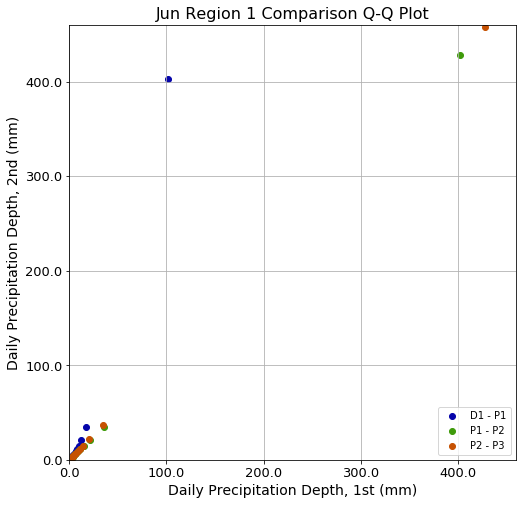

In [639]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Jun1D1Qs, Jun1P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Jun1P1Qs, Jun1P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Jun1P2Qs, Jun1P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.set_title('Jun Region 1 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max1Qs) )
ax11.set_ylim( (0.0, max1Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

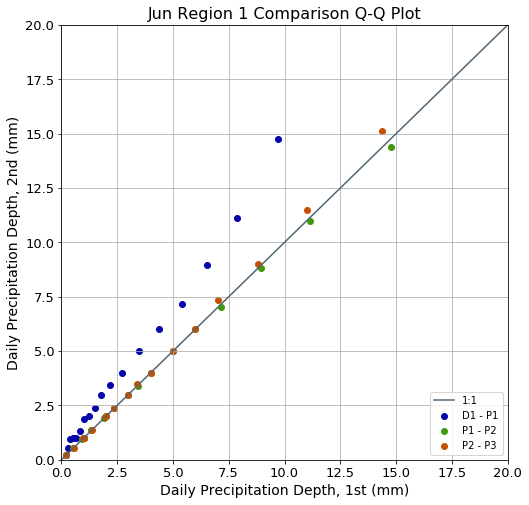

In [640]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Jun1D1Qs, Jun1P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Jun1P1Qs, Jun1P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Jun1P2Qs, Jun1P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.plot( [0.0, max1Qs], [0.0, max1Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Jun Region 1 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 20.0) )
ax11.set_ylim( (0.0, 20.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

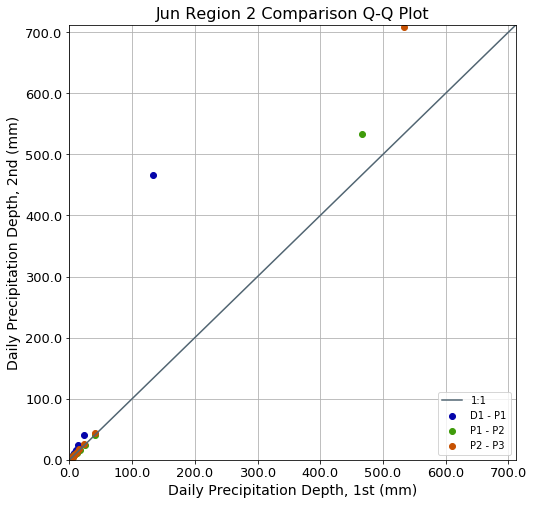

In [641]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Jun2D1Qs, Jun2P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Jun2P1Qs, Jun2P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Jun2P2Qs, Jun2P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.plot( [0.0, max2Qs], [0.0, max2Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Jun Region 2 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max2Qs) )
ax11.set_ylim( (0.0, max2Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

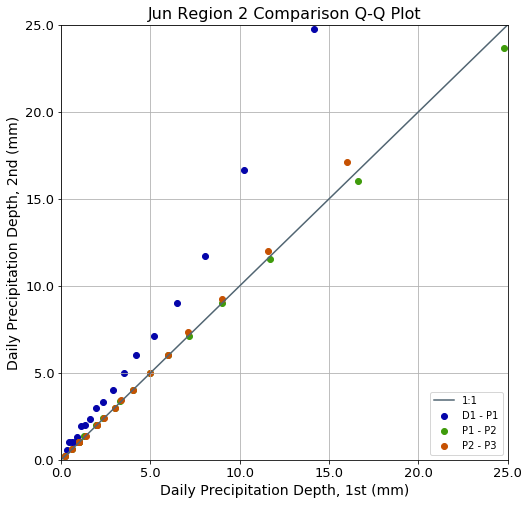

In [642]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Jun2D1Qs, Jun2P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Jun2P1Qs, Jun2P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Jun2P2Qs, Jun2P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.plot( [0.0, max2Qs], [0.0, max2Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Jun Region 2 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

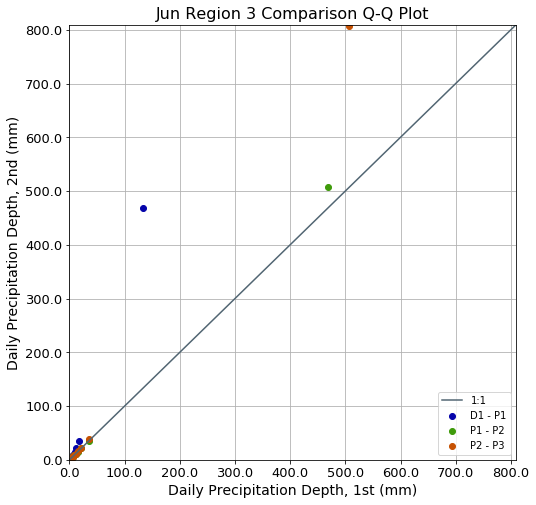

In [643]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Jun3D1Qs, Jun3P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Jun3P1Qs, Jun3P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Jun3P2Qs, Jun3P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.plot( [0.0, max3Qs], [0.0, max3Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Jun Region 3 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max3Qs) )
ax11.set_ylim( (0.0, max3Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

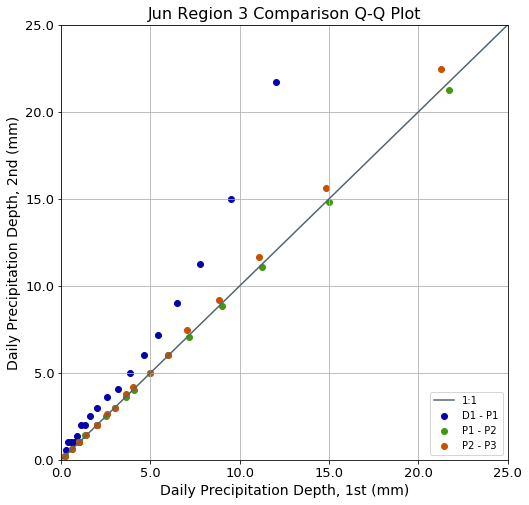

In [644]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Jun3D1Qs, Jun3P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Jun3P1Qs, Jun3P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Jun3P2Qs, Jun3P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.plot( [0.0, max3Qs], [0.0, max3Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Jun Region 3 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

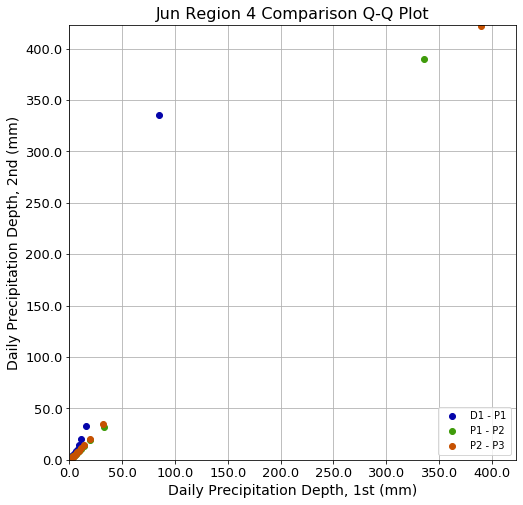

In [645]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Jun4D1Qs, Jun4P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Jun4P1Qs, Jun4P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Jun4P2Qs, Jun4P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.set_title('Jun Region 4 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max4Qs) )
ax11.set_ylim( (0.0, max4Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

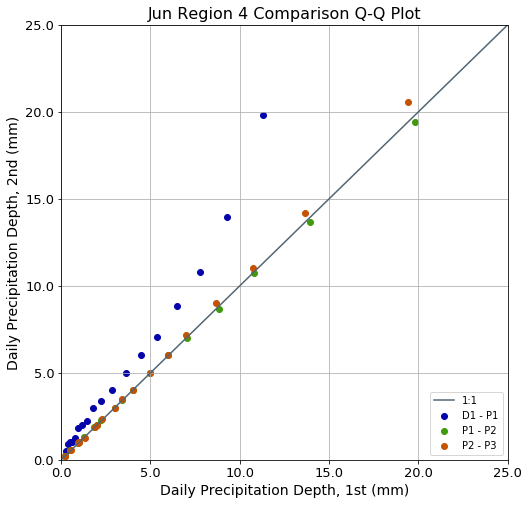

In [646]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Jun4D1Qs, Jun4P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Jun4P1Qs, Jun4P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Jun4P2Qs, Jun4P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.plot( [0.0, max4Qs], [0.0, max4Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Jun Region 4 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

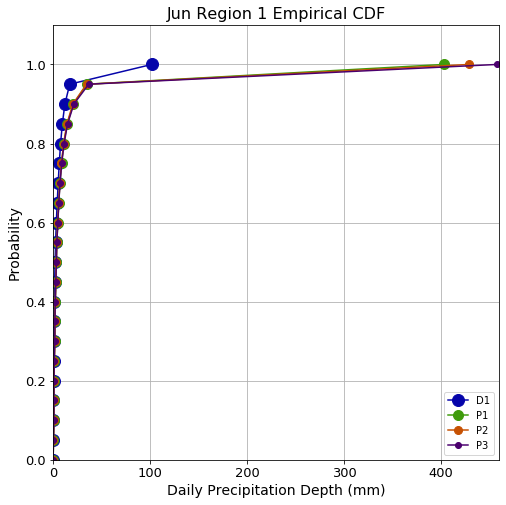

In [647]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Jun1D1Qs, nCompQs, c='xkcd:royal blue', markersize=12, marker='o', 
           linestyle='-', label="D1")
ax11.plot( Jun1P1Qs, nCompQs, c='xkcd:grass green', markersize=10, marker='o', 
           linestyle='-', label="P1")
ax11.plot( Jun1P2Qs, nCompQs, c='xkcd:dark orange', markersize=8, marker='o', 
           linestyle='-', label="P2")
ax11.plot( Jun1P3Qs, nCompQs, c='xkcd:royal purple', markersize=6, marker='o', 
           linestyle='-', label="P3")
ax11.set_title('Jun Region 1 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max1Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

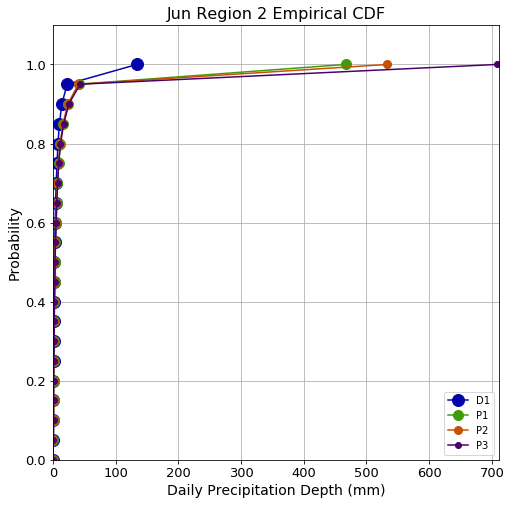

In [648]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Jun2D1Qs, nCompQs, c='xkcd:royal blue', markersize=12, marker='o', 
           linestyle='-', label="D1")
ax11.plot( Jun2P1Qs, nCompQs, c='xkcd:grass green', markersize=10, marker='o', 
           linestyle='-', label="P1")
ax11.plot( Jun2P2Qs, nCompQs, c='xkcd:dark orange', markersize=8, marker='o', 
           linestyle='-', label="P2")
ax11.plot( Jun2P3Qs, nCompQs, c='xkcd:royal purple', markersize=6, marker='o', 
           linestyle='-', label="P3")
ax11.set_title('Jun Region 2 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max2Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

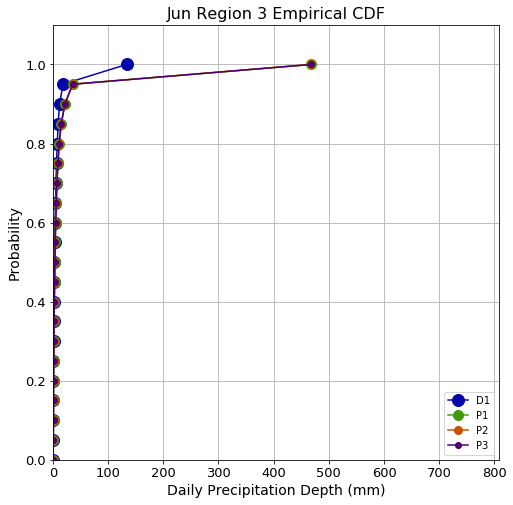

In [649]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Jun3D1Qs, nCompQs, c='xkcd:royal blue', markersize=12, marker='o', 
           linestyle='-', label="D1")
ax11.plot( Jun3P1Qs, nCompQs, c='xkcd:grass green', markersize=10, marker='o', 
           linestyle='-', label="P1")
ax11.plot( Jun3P1Qs, nCompQs, c='xkcd:dark orange', markersize=8, marker='o', 
           linestyle='-', label="P2")
ax11.plot( Jun3P1Qs, nCompQs, c='xkcd:royal purple', markersize=6, marker='o', 
           linestyle='-', label="P3")
ax11.set_title('Jun Region 3 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max3Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

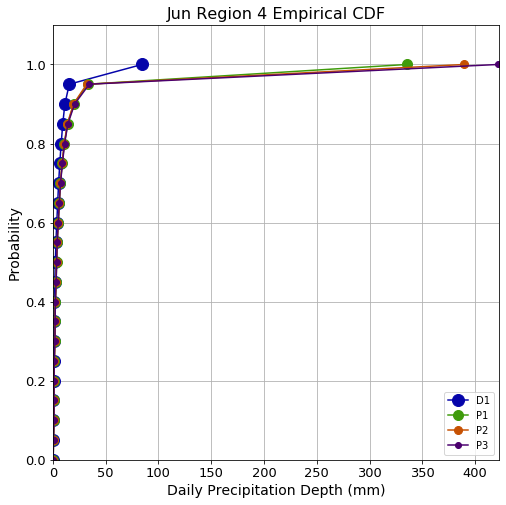

In [650]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Jun4D1Qs, nCompQs, c='xkcd:royal blue', markersize=12, marker='o', 
           linestyle='-', label="D1")
ax11.plot( Jun4P1Qs, nCompQs, c='xkcd:grass green', markersize=10, marker='o', 
           linestyle='-', label="P1")
ax11.plot( Jun4P2Qs, nCompQs, c='xkcd:dark orange', markersize=8, marker='o', 
           linestyle='-', label="P2")
ax11.plot( Jun4P3Qs, nCompQs, c='xkcd:royal purple', markersize=6, marker='o', 
           linestyle='-', label="P3")
ax11.set_title('Jun Region 4 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max4Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### Jul

In [651]:
JulNum = 7

In [652]:
Jul1D1DF = JulD1DF[JulD1DF["PRegion_Id"] == 1].copy()
Jul2D1DF = JulD1DF[JulD1DF["PRegion_Id"] == 2].copy()
Jul3D1DF = JulD1DF[JulD1DF["PRegion_Id"] == 3].copy()
Jul4D1DF = JulD1DF[JulD1DF["PRegion_Id"] == 4].copy()

In [653]:
Jul1P1DF = JulP1DF[JulP1DF["PRegion_Id"] == 1].copy()
Jul2P1DF = JulP1DF[JulP1DF["PRegion_Id"] == 2].copy()
Jul3P1DF = JulP1DF[JulP1DF["PRegion_Id"] == 3].copy()
Jul4P1DF = JulP1DF[JulP1DF["PRegion_Id"] == 4].copy()

In [654]:
Jul1P2DF = JulP2DF[JulP2DF["PRegion_Id"] == 1].copy()
Jul2P2DF = JulP2DF[JulP2DF["PRegion_Id"] == 2].copy()
Jul3P2DF = JulP2DF[JulP2DF["PRegion_Id"] == 3].copy()
Jul4P2DF = JulP2DF[JulP2DF["PRegion_Id"] == 4].copy()

In [655]:
Jul1P3DF = JulP3DF[JulP3DF["PRegion_Id"] == 1].copy()
Jul2P3DF = JulP3DF[JulP3DF["PRegion_Id"] == 2].copy()
Jul3P3DF = JulP3DF[JulP3DF["PRegion_Id"] == 3].copy()
Jul4P3DF = JulP3DF[JulP3DF["PRegion_Id"] == 4].copy()

Bayesian estimates of confidence intervals for mean, variance, and standard deviation of the samples

In [656]:
Jul1D1BSCI = sstats.bayes_mvs( np.array( Jul1D1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Jul2D1BSCI = sstats.bayes_mvs( np.array( Jul2D1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Jul3D1BSCI = sstats.bayes_mvs( np.array( Jul3D1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Jul4D1BSCI = sstats.bayes_mvs( np.array( Jul4D1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )

In [657]:
Jul1P1BSCI = sstats.bayes_mvs( np.array( Jul1P1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Jul2P1BSCI = sstats.bayes_mvs( np.array( Jul2P1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Jul3P1BSCI = sstats.bayes_mvs( np.array( Jul3P1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Jul4P1BSCI = sstats.bayes_mvs( np.array( Jul4P1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )

In [658]:
Jul1P2BSCI = sstats.bayes_mvs( np.array( Jul1P2DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Jul2P2BSCI = sstats.bayes_mvs( np.array( Jul2P2DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Jul3P2BSCI = sstats.bayes_mvs( np.array( Jul3P2DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Jul4P2BSCI = sstats.bayes_mvs( np.array( Jul4P2DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )

In [659]:
Jul1P3BSCI = sstats.bayes_mvs( np.array( Jul1P3DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Jul2P3BSCI = sstats.bayes_mvs( np.array( Jul2P3DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Jul3P3BSCI = sstats.bayes_mvs( np.array( Jul3P3DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Jul4P3BSCI = sstats.bayes_mvs( np.array( Jul4P3DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )

In [660]:
CMonList.append( JulNum )
CZoneList.append( 1 )
SD1Mean.append( Jul1D1BSCI[0][0] )
SD1MeanMinCI.append( Jul1D1BSCI[0][1][0] )
SD1MeanMaxCI.append( Jul1D1BSCI[0][1][1] )
SD1Var.append( Jul1D1BSCI[1][0] )
SD1VarMinCI.append( Jul1D1BSCI[1][1][0] )
SD1VarMaxCI.append( Jul1D1BSCI[1][1][1] )
SD1Std.append( Jul1D1BSCI[2][0] )
SD1StdMinCI.append( Jul1D1BSCI[2][1][0] )
SD1StdMaxCI.append( Jul1D1BSCI[2][1][1] )
CMonList.append( JulNum )
CZoneList.append( 2 )
SD1Mean.append( Jul2D1BSCI[0][0] )
SD1MeanMinCI.append( Jul2D1BSCI[0][1][0] )
SD1MeanMaxCI.append( Jul2D1BSCI[0][1][1] )
SD1Var.append( Jul2D1BSCI[1][0] )
SD1VarMinCI.append( Jul2D1BSCI[1][1][0] )
SD1VarMaxCI.append( Jul2D1BSCI[1][1][1] )
SD1Std.append( Jul2D1BSCI[2][0] )
SD1StdMinCI.append( Jul2D1BSCI[2][1][0] )
SD1StdMaxCI.append( Jul2D1BSCI[2][1][1] )
CMonList.append( JulNum )
CZoneList.append( 3 )
SD1Mean.append( Jul3D1BSCI[0][0] )
SD1MeanMinCI.append( Jul3D1BSCI[0][1][0] )
SD1MeanMaxCI.append( Jul3D1BSCI[0][1][1] )
SD1Var.append( Jul3D1BSCI[1][0] )
SD1VarMinCI.append( Jul3D1BSCI[1][1][0] )
SD1VarMaxCI.append( Jul3D1BSCI[1][1][1] )
SD1Std.append( Jul3D1BSCI[2][0] )
SD1StdMinCI.append( Jul3D1BSCI[2][1][0] )
SD1StdMaxCI.append( Jul3D1BSCI[2][1][1] )
CMonList.append( JulNum )
CZoneList.append( 4 )
SD1Mean.append( Jul4D1BSCI[0][0] )
SD1MeanMinCI.append( Jul4D1BSCI[0][1][0] )
SD1MeanMaxCI.append( Jul4D1BSCI[0][1][1] )
SD1Var.append( Jul4D1BSCI[1][0] )
SD1VarMinCI.append( Jul4D1BSCI[1][1][0] )
SD1VarMaxCI.append( Jul4D1BSCI[1][1][1] )
SD1Std.append( Jul4D1BSCI[2][0] )
SD1StdMinCI.append( Jul4D1BSCI[2][1][0] )
SD1StdMaxCI.append( Jul4D1BSCI[2][1][1] )

In [661]:
SP1Mean.append( Jul1P1BSCI[0][0] )
SP1MeanMinCI.append( Jul1P1BSCI[0][1][0] )
SP1MeanMaxCI.append( Jul1P1BSCI[0][1][1] )
SP1Var.append( Jul1P1BSCI[1][0] )
SP1VarMinCI.append( Jul1P1BSCI[1][1][0] )
SP1VarMaxCI.append( Jul1P1BSCI[1][1][1] )
SP1Std.append( Jul1P1BSCI[2][0] )
SP1StdMinCI.append( Jul1P1BSCI[2][1][0] )
SP1StdMaxCI.append( Jul1P1BSCI[2][1][1] )
SP1Mean.append( Jul2P1BSCI[0][0] )
SP1MeanMinCI.append( Jul2P1BSCI[0][1][0] )
SP1MeanMaxCI.append( Jul2P1BSCI[0][1][1] )
SP1Var.append( Jul2P1BSCI[1][0] )
SP1VarMinCI.append( Jul2P1BSCI[1][1][0] )
SP1VarMaxCI.append( Jul2P1BSCI[1][1][1] )
SP1Std.append( Jul2P1BSCI[2][0] )
SP1StdMinCI.append( Jul2P1BSCI[2][1][0] )
SP1StdMaxCI.append( Jul2P1BSCI[2][1][1] )
SP1Mean.append( Jul3P1BSCI[0][0] )
SP1MeanMinCI.append( Jul3P1BSCI[0][1][0] )
SP1MeanMaxCI.append( Jul3P1BSCI[0][1][1] )
SP1Var.append( Jul3P1BSCI[1][0] )
SP1VarMinCI.append( Jul3P1BSCI[1][1][0] )
SP1VarMaxCI.append( Jul3P1BSCI[1][1][1] )
SP1Std.append( Jul3P1BSCI[2][0] )
SP1StdMinCI.append( Jul3P1BSCI[2][1][0] )
SP1StdMaxCI.append( Jul3P1BSCI[2][1][1] )
SP1Mean.append( Jul4P1BSCI[0][0] )
SP1MeanMinCI.append( Jul4P1BSCI[0][1][0] )
SP1MeanMaxCI.append( Jul4P1BSCI[0][1][1] )
SP1Var.append( Jul4P1BSCI[1][0] )
SP1VarMinCI.append( Jul4P1BSCI[1][1][0] )
SP1VarMaxCI.append( Jul4P1BSCI[1][1][1] )
SP1Std.append( Jul4P1BSCI[2][0] )
SP1StdMinCI.append( Jul4P1BSCI[2][1][0] )
SP1StdMaxCI.append( Jul4P1BSCI[2][1][1] )

In [662]:
SP2Mean.append( Jul1P2BSCI[0][0] )
SP2MeanMinCI.append( Jul1P2BSCI[0][1][0] )
SP2MeanMaxCI.append( Jul1P2BSCI[0][1][1] )
SP2Var.append( Jul1P2BSCI[1][0] )
SP2VarMinCI.append( Jul1P2BSCI[1][1][0] )
SP2VarMaxCI.append( Jul1P2BSCI[1][1][1] )
SP2Std.append( Jul1P2BSCI[2][0] )
SP2StdMinCI.append( Jul1P2BSCI[2][1][0] )
SP2StdMaxCI.append( Jul1P2BSCI[2][1][1] )
SP2Mean.append( Jul2P2BSCI[0][0] )
SP2MeanMinCI.append( Jul2P2BSCI[0][1][0] )
SP2MeanMaxCI.append( Jul2P2BSCI[0][1][1] )
SP2Var.append( Jul2P2BSCI[1][0] )
SP2VarMinCI.append( Jul2P2BSCI[1][1][0] )
SP2VarMaxCI.append( Jul2P2BSCI[1][1][1] )
SP2Std.append( Jul2P2BSCI[2][0] )
SP2StdMinCI.append( Jul2P2BSCI[2][1][0] )
SP2StdMaxCI.append( Jul2P2BSCI[2][1][1] )
SP2Mean.append( Jul3P2BSCI[0][0] )
SP2MeanMinCI.append( Jul3P2BSCI[0][1][0] )
SP2MeanMaxCI.append( Jul3P2BSCI[0][1][1] )
SP2Var.append( Jul3P2BSCI[1][0] )
SP2VarMinCI.append( Jul3P2BSCI[1][1][0] )
SP2VarMaxCI.append( Jul3P2BSCI[1][1][1] )
SP2Std.append( Jul3P2BSCI[2][0] )
SP2StdMinCI.append( Jul3P2BSCI[2][1][0] )
SP2StdMaxCI.append( Jul3P2BSCI[2][1][1] )
SP2Mean.append( Jul4P2BSCI[0][0] )
SP2MeanMinCI.append( Jul4P2BSCI[0][1][0] )
SP2MeanMaxCI.append( Jul4P2BSCI[0][1][1] )
SP2Var.append( Jul4P2BSCI[1][0] )
SP2VarMinCI.append( Jul4P2BSCI[1][1][0] )
SP2VarMaxCI.append( Jul4P2BSCI[1][1][1] )
SP2Std.append( Jul4P2BSCI[2][0] )
SP2StdMinCI.append( Jul4P2BSCI[2][1][0] )
SP2StdMaxCI.append( Jul4P2BSCI[2][1][1] )

In [663]:
SP3Mean.append( Jul1P3BSCI[0][0] )
SP3MeanMinCI.append( Jul1P3BSCI[0][1][0] )
SP3MeanMaxCI.append( Jul1P3BSCI[0][1][1] )
SP3Var.append( Jul1P3BSCI[1][0] )
SP3VarMinCI.append( Jul1P3BSCI[1][1][0] )
SP3VarMaxCI.append( Jul1P3BSCI[1][1][1] )
SP3Std.append( Jul1P3BSCI[2][0] )
SP3StdMinCI.append( Jul1P3BSCI[2][1][0] )
SP3StdMaxCI.append( Jul1P3BSCI[2][1][1] )
SP3Mean.append( Jul2P3BSCI[0][0] )
SP3MeanMinCI.append( Jul2P3BSCI[0][1][0] )
SP3MeanMaxCI.append( Jul2P3BSCI[0][1][1] )
SP3Var.append( Jul2P3BSCI[1][0] )
SP3VarMinCI.append( Jul2P3BSCI[1][1][0] )
SP3VarMaxCI.append( Jul2P3BSCI[1][1][1] )
SP3Std.append( Jul2P3BSCI[2][0] )
SP3StdMinCI.append( Jul2P3BSCI[2][1][0] )
SP3StdMaxCI.append( Jul2P3BSCI[2][1][1] )
SP3Mean.append( Jul3P3BSCI[0][0] )
SP3MeanMinCI.append( Jul3P3BSCI[0][1][0] )
SP3MeanMaxCI.append( Jul3P3BSCI[0][1][1] )
SP3Var.append( Jul3P3BSCI[1][0] )
SP3VarMinCI.append( Jul3P3BSCI[1][1][0] )
SP3VarMaxCI.append( Jul3P3BSCI[1][1][1] )
SP3Std.append( Jul3P3BSCI[2][0] )
SP3StdMinCI.append( Jul3P3BSCI[2][1][0] )
SP3StdMaxCI.append( Jul3P3BSCI[2][1][1] )
SP3Mean.append( Jul4P3BSCI[0][0] )
SP3MeanMinCI.append( Jul4P3BSCI[0][1][0] )
SP3MeanMaxCI.append( Jul4P3BSCI[0][1][1] )
SP3Var.append( Jul4P3BSCI[1][0] )
SP3VarMinCI.append( Jul4P3BSCI[1][1][0] )
SP3VarMaxCI.append( Jul4P3BSCI[1][1][1] )
SP3Std.append( Jul4P3BSCI[2][0] )
SP3StdMinCI.append( Jul4P3BSCI[2][1][0] )
SP3StdMaxCI.append( Jul4P3BSCI[2][1][1] )

#### T-Test

T-Test for the means of two independent samples. Two-sided test for the null hypothesis that 2 independent samples hae identical average values. Test assumes that the populations have identical variances.

If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [664]:
Jul1TTD1toP1 = sstats.ttest_ind( np.array( Jul1D1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Jul1P1DF["Precip_mm"], dtype=np.int32 ) )

In [665]:
Jul1TTD1toP1Pval = Jul1TTD1toP1[1]
print("Region 1, P-Value for LOCA D1 and P1 from same population is: %g" % Jul1TTD1toP1Pval )

Region 1, P-Value for LOCA D1 and P1 from same population is: 0


In [666]:
Jul2TTD1toP1 = sstats.ttest_ind( np.array( Jul2D1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Jul2P1DF["Precip_mm"], dtype=np.int32 ) )

In [667]:
Jul2TTD1toP1Pval = Jul2TTD1toP1[1]
print("Region 2, P-Value for LOCA D1 and P1 from same population is: %g" % Jul2TTD1toP1Pval )

Region 2, P-Value for LOCA D1 and P1 from same population is: 0


In [668]:
Jul3TTD1toP1 = sstats.ttest_ind( np.array( Jul3D1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Jul3P1DF["Precip_mm"], dtype=np.int32 ) )

In [669]:
Jul3TTD1toP1Pval = Jul3TTD1toP1[1]
print("Region 3, P-Value for LOCA D1 and P1 from same population is: %g" % Jul3TTD1toP1Pval )

Region 3, P-Value for LOCA D1 and P1 from same population is: 0


In [670]:
Jul4TTD1toP1 = sstats.ttest_ind( np.array( Jul4D1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Jul4P1DF["Precip_mm"], dtype=np.int32 ) )

In [671]:
Jul4TTD1toP1Pval = Jul4TTD1toP1[1]
print("Region 4, P-Value for LOCA D1 and P1 from same population is: %g" % Jul4TTD1toP1Pval )

Region 4, P-Value for LOCA D1 and P1 from same population is: 0


In [672]:
Jul1TTP1toP2 = sstats.ttest_ind( np.array( Jul1P1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Jul1P2DF["Precip_mm"], dtype=np.int32 ) )

In [673]:
Jul1TTP1toP2Pval = Jul1TTP1toP2[1]
print("Region 1, P-Value for LOCA P1 and P2 from same population is: %g" % Jul1TTP1toP2Pval )

Region 1, P-Value for LOCA P1 and P2 from same population is: 3.36675e-63


In [674]:
Jul2TTP1toP2 = sstats.ttest_ind( np.array( Jul2P1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Jul2P2DF["Precip_mm"], dtype=np.int32 ) )

In [675]:
Jul2TTP1toP2Pval = Jul2TTP1toP2[1]
print("Region 2, P-Value for LOCA P1 and P2 from same population is: %g" % Jul2TTP1toP2Pval )

Region 2, P-Value for LOCA P1 and P2 from same population is: 2.10253e-11


In [676]:
Jul3TTP1toP2 = sstats.ttest_ind( np.array( Jul3P1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Jul3P2DF["Precip_mm"], dtype=np.int32 ) )

In [677]:
Jul3TTP1toP2Pval = Jul3TTP1toP2[1]
print("Region 3, P-Value for LOCA P1 and P2 from same population is: %g" % Jul3TTP1toP2Pval )

Region 3, P-Value for LOCA P1 and P2 from same population is: 4.95762e-32


In [678]:
Jul4TTP1toP2 = sstats.ttest_ind( np.array( Jul4P1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Jul4P2DF["Precip_mm"], dtype=np.int32 ) )

In [679]:
Jul4TTP1toP2Pval = Jul4TTP1toP2[1]
print("Region 4, P-Value for LOCA P1 and P2 from same population is: %g" % Jul4TTP1toP2Pval )

Region 4, P-Value for LOCA P1 and P2 from same population is: 6.20204e-09


In [680]:
Jul1TTP2toP3 = sstats.ttest_ind( np.array( Jul1P2DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Jul1P3DF["Precip_mm"], dtype=np.int32 ) )

In [681]:
Jul1TTP2toP3Pval = Jul1TTP2toP3[1]
print("Region 1, P-Value for LOCA P2 and P3 from same population is: %g" % Jul1TTP2toP3Pval )

Region 1, P-Value for LOCA P2 and P3 from same population is: 0.0104001


In [682]:
Jul2TTP2toP3 = sstats.ttest_ind( np.array( Jul2P2DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Jul2P3DF["Precip_mm"], dtype=np.int32 ) )

In [683]:
Jul2TTP2toP3Pval = Jul2TTP2toP3[1]
print("Region 2, P-Value for LOCA P2 and P3 from same population is: %g" % Jul2TTP2toP3Pval )

Region 2, P-Value for LOCA P2 and P3 from same population is: 0.800385


In [684]:
Jul3TTP2toP3 = sstats.ttest_ind( np.array( Jul3P2DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Jul3P3DF["Precip_mm"], dtype=np.int32 ) )

In [685]:
Jul3TTP2toP3Pval = Jul3TTP2toP3[1]
print("Region 3, P-Value for LOCA P2 and P3 from same population is: %g" % Jul3TTP2toP3Pval )

Region 3, P-Value for LOCA P2 and P3 from same population is: 0.600192


In [686]:
Jul4TTP2toP3 = sstats.ttest_ind( np.array( Jul4P2DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Jul4P3DF["Precip_mm"], dtype=np.int32 ) )

In [687]:
Jul4TTP2toP3Pval = Jul4TTP2toP3[1]
print("Region 4, P-Value for LOCA P2 and P3 from same population is: %g" % Jul4TTP2toP3Pval )

Region 4, P-Value for LOCA P2 and P3 from same population is: 0.204555


#### Mann-Whitney Rank Test

Nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample. This test can be used to investigate whether two independent samples were selected from populations having the same distribution.

Null hypothesis, $H_{0}$, is that the distributions of both populations are equal.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of being from the same distribution.

In [688]:
Jul1MWUD1toP1 = sstats.mannwhitneyu( np.array( Jul1D1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Jul1P1DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [689]:
Jul1MWUD1toP1Pval = Jul1MWUD1toP1[1]
print("Region 1, P-Value for LOCA D1 and P1 from same distribution is: %g" % Jul1MWUD1toP1Pval )

Region 1, P-Value for LOCA D1 and P1 from same distribution is: 0


In [690]:
Jul2MWUD1toP1 = sstats.mannwhitneyu( np.array( Jul2D1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Jul2P1DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [691]:
Jul2MWUD1toP1Pval = Jul2MWUD1toP1[1]
print("Region 2, P-Value for LOCA D1 and P1 from same distribution is: %g" % Jul2MWUD1toP1Pval )

Region 2, P-Value for LOCA D1 and P1 from same distribution is: 0


In [692]:
Jul3MWUD1toP1 = sstats.mannwhitneyu( np.array( Jul3D1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Jul3P1DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [693]:
Jul3MWUD1toP1Pval = Jul3MWUD1toP1[1]
print("Region 3, P-Value for LOCA D1 and P1 from same distribution is: %g" % Jul3MWUD1toP1Pval )

Region 3, P-Value for LOCA D1 and P1 from same distribution is: 0


In [694]:
Jul4MWUD1toP1 = sstats.mannwhitneyu( np.array( Jul4D1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Jul4P1DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [695]:
Jul4MWUD1toP1Pval = Jul4MWUD1toP1[1]
print("Region 4, P-Value for LOCA D1 and P1 from same distribution is: %g" % Jul4MWUD1toP1Pval )

Region 4, P-Value for LOCA D1 and P1 from same distribution is: 0


In [696]:
Jul1MWUP1toP2 = sstats.mannwhitneyu( np.array( Jul1P1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Jul1P2DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [697]:
Jul1MWUP1toP2Pval = Jul1MWUP1toP2[1]
print("Region 1, P-Value for LOCA P1 and P2 from same distribution is: %g" % Jul1MWUP1toP2Pval )

Region 1, P-Value for LOCA P1 and P2 from same distribution is: 2.06439e-40


In [698]:
Jul2MWUP1toP2 = sstats.mannwhitneyu( np.array( Jul2P1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Jul2P2DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [699]:
Jul2MWUP1toP2Pval = Jul2MWUP1toP2[1]
print("Region 2, P-Value for LOCA P1 and P2 from same distribution is: %g" % Jul2MWUP1toP2Pval )

Region 2, P-Value for LOCA P1 and P2 from same distribution is: 0.00256745


In [700]:
Jul3MWUP1toP2 = sstats.mannwhitneyu( np.array( Jul3P1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Jul3P2DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [701]:
Jul3MWUP1toP2Pval = Jul3MWUP1toP2[1]
print("Region 3, P-Value for LOCA P1 and P2 from same distribution is: %g" % Jul3MWUP1toP2Pval )

Region 3, P-Value for LOCA P1 and P2 from same distribution is: 1.91e-17


In [702]:
Jul4MWUP1toP2 = sstats.mannwhitneyu( np.array( Jul4P1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Jul4P2DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [703]:
Jul4MWUP1toP2Pval = Jul4MWUP1toP2[1]
print("Region 4, P-Value for LOCA P1 and P2 from same distribution is: %g" % Jul4MWUP1toP2Pval )

Region 4, P-Value for LOCA P1 and P2 from same distribution is: 1.04599e-08


In [704]:
Jul1MWUP2toP3 = sstats.mannwhitneyu( np.array( Jul1P2DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Jul1P3DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [705]:
Jul1MWUP2toP3Pval = Jul1MWUP2toP3[1]
print("Region 1, P-Value for LOCA P2 and P3 from same distribution is: %g" % Jul1MWUP2toP3Pval )

Region 1, P-Value for LOCA P2 and P3 from same distribution is: 5.39066e-07


In [706]:
Jul2MWUP2toP3 = sstats.mannwhitneyu( np.array( Jul2P2DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Jul2P3DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [707]:
Jul2MWUP2toP3Pval = Jul2MWUP2toP3[1]
print("Region 2, P-Value for LOCA P2 and P3 from same distribution is: %g" % Jul2MWUP2toP3Pval )

Region 2, P-Value for LOCA P2 and P3 from same distribution is: 0.00665064


In [708]:
Jul3MWUP2toP3 = sstats.mannwhitneyu( np.array( Jul3P2DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Jul3P3DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [709]:
Jul3MWUP2toP3Pval = Jul3MWUP2toP3[1]
print("Region 3, P-Value for LOCA P2 and P3 from same distribution is: %g" % Jul3MWUP2toP3Pval )

Region 3, P-Value for LOCA P2 and P3 from same distribution is: 7.45195e-06


In [710]:
Jul4MWUP2toP3 = sstats.mannwhitneyu( np.array( Jul4P2DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Jul4P3DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [711]:
Jul4MWUP2toP3Pval = Jul4MWUP2toP3[1]
print("Region 4, P-Value for LOCA P2 and P3 from same distribution is: %g" % Jul4MWUP2toP3Pval )

Region 4, P-Value for LOCA P2 and P3 from same distribution is: 0.00050641


#### Kruskal-Wallis Test

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of the same population median.

In [712]:
Jul1KWD1toP1 = sstats.kruskal( np.array( Jul1D1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Jul1P1DF["Precip_mm"], dtype=np.int32 ) )

In [713]:
Jul1KWD1toP1Pval = Jul1KWD1toP1[1]
print("Region 1, P-Value for LOCA D1 and P1 have the same median is: %g" % Jul1KWD1toP1Pval )

Region 1, P-Value for LOCA D1 and P1 have the same median is: 0


In [714]:
Jul2KWD1toP1 = sstats.kruskal( np.array( Jul2D1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Jul2P1DF["Precip_mm"], dtype=np.int32 ) )

In [715]:
Jul2KWD1toP1Pval = Jul2KWD1toP1[1]
print("Region 2, P-Value for LOCA D1 and P1 have the same median is: %g" % Jul2KWD1toP1Pval )

Region 2, P-Value for LOCA D1 and P1 have the same median is: 1


In [716]:
Jul3KWD1toP1 = sstats.kruskal( np.array( Jul3D1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Jul3P1DF["Precip_mm"], dtype=np.int32 ) )

In [717]:
Jul3KWD1toP1Pval = Jul3KWD1toP1[1]
print("Region 3, P-Value for LOCA D1 and P1 have the same median is: %g" % Jul3KWD1toP1Pval )

Region 3, P-Value for LOCA D1 and P1 have the same median is: 0


In [718]:
Jul4KWD1toP1 = sstats.kruskal( np.array( Jul4D1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Jul4P1DF["Precip_mm"], dtype=np.int32 ) )

In [719]:
Jul4KWD1toP1Pval = Jul4KWD1toP1[1]
print("Region 4, P-Value for LOCA D1 and P1 have the same median is: %g" % Jul4KWD1toP1Pval )

Region 4, P-Value for LOCA D1 and P1 have the same median is: 0


In [720]:
Jul1KWP1toP2 = sstats.kruskal( np.array( Jul1P1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Jul1P2DF["Precip_mm"], dtype=np.int32 ) )

In [721]:
Jul1KWP1toP2Pval = Jul1KWP1toP2[1]
print("Region 1, P-Value for LOCA P1 and P2 have the same median is: %g" % Jul1KWP1toP2Pval )

Region 1, P-Value for LOCA P1 and P2 have the same median is: 0


In [722]:
Jul2KWP1toP2 = sstats.kruskal( np.array( Jul2P1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Jul2P2DF["Precip_mm"], dtype=np.int32 ) )

In [723]:
Jul2KWP1toP2Pval = Jul2KWP1toP2[1]
print("Region 2, P-Value for LOCA P1 and P2 have the same median is: %g" % Jul2KWP1toP2Pval )

Region 2, P-Value for LOCA P1 and P2 have the same median is: 1


In [724]:
Jul3KWP1toP2 = sstats.kruskal( np.array( Jul3P1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Jul3P2DF["Precip_mm"], dtype=np.int32 ) )

In [725]:
Jul3KWP1toP2Pval = Jul3KWP1toP2[1]
print("Region 3, P-Value for LOCA P1 and P2 have the same median is: %g" % Jul3KWP1toP2Pval )

Region 3, P-Value for LOCA P1 and P2 have the same median is: 1


In [726]:
Jul4KWP1toP2 = sstats.kruskal( np.array( Jul4P1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Jul4P2DF["Precip_mm"], dtype=np.int32 ) )

In [727]:
Jul4KWP1toP2Pval = Jul4KWP1toP2[1]
print("Region 4, P-Value for LOCA P1 and P2 have the same median is: %g" % Jul4KWP1toP2Pval )

Region 4, P-Value for LOCA P1 and P2 have the same median is: 0


In [728]:
Jul1KWP2toP3 = sstats.kruskal( np.array( Jul1P2DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Jul1P3DF["Precip_mm"], dtype=np.int32 ) )

In [729]:
Jul1KWP2toP3Pval = Jul1KWP2toP3[1]
print("Region 1, P-Value for LOCA P2 and P3 have the same median is: %g" % Jul1KWP2toP3Pval )

Region 1, P-Value for LOCA P2 and P3 have the same median is: 1


In [730]:
Jul2KWP2toP3 = sstats.kruskal( np.array( Jul2P2DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Jul2P3DF["Precip_mm"], dtype=np.int32 ) )

In [731]:
Jul2KWP2toP3Pval = Jul2KWP2toP3[1]
print("Region 2, P-Value for LOCA P2 and P3 have the same median is: %g" % Jul2KWP2toP3Pval )

Region 2, P-Value for LOCA P2 and P3 have the same median is: 1


In [732]:
Jul3KWP2toP3 = sstats.kruskal( np.array( Jul3P2DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Jul3P3DF["Precip_mm"], dtype=np.int32 ) )

In [733]:
Jul3KWP2toP3Pval = Jul3KWP2toP3[1]
print("Region 3, P-Value for LOCA P2 and P3 have the same median is: %g" % Jul3KWP2toP3Pval )

Region 3, P-Value for LOCA P2 and P3 have the same median is: 1


In [734]:
Jul4KWP2toP3 = sstats.kruskal( np.array( Jul4P2DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Jul4P3DF["Precip_mm"], dtype=np.int32 ) )

In [735]:
Jul4KWP2toP3Pval = Jul4KWP2toP3[1]
print("Region 4, P-Value for LOCA P2 and P3 have the same median is: %g" % Jul4KWP2toP3Pval )

Region 4, P-Value for LOCA P2 and P3 have the same median is: 0


In [736]:
Jul4P3DF["Precip_mm"].median(), Jul4P2DF["Precip_mm"].median(), Jul4P1DF["Precip_mm"].median(), Jul4D1DF["Precip_mm"].median()

(3.001091718673706, 3.1641106605529785, 3.0, 2.202869176864624)

#### Plots

In [737]:
Jul1D1Qs = Jul1D1DF["Precip_mm"].quantile(q=nCompQs)
Jul1P1Qs = Jul1P1DF["Precip_mm"].quantile(q=nCompQs)
Jul1P2Qs = Jul1P2DF["Precip_mm"].quantile(q=nCompQs)
Jul1P3Qs = Jul1P3DF["Precip_mm"].quantile(q=nCompQs)
Jul2D1Qs = Jul2D1DF["Precip_mm"].quantile(q=nCompQs)
Jul2P1Qs = Jul2P1DF["Precip_mm"].quantile(q=nCompQs)
Jul2P2Qs = Jul2P2DF["Precip_mm"].quantile(q=nCompQs)
Jul2P3Qs = Jul2P3DF["Precip_mm"].quantile(q=nCompQs)
Jul3D1Qs = Jul3D1DF["Precip_mm"].quantile(q=nCompQs)
Jul3P1Qs = Jul3P1DF["Precip_mm"].quantile(q=nCompQs)
Jul3P2Qs = Jul3P2DF["Precip_mm"].quantile(q=nCompQs)
Jul3P3Qs = Jul3P3DF["Precip_mm"].quantile(q=nCompQs)
Jul4D1Qs = Jul4D1DF["Precip_mm"].quantile(q=nCompQs)
Jul4P1Qs = Jul4P1DF["Precip_mm"].quantile(q=nCompQs)
Jul4P2Qs = Jul4P2DF["Precip_mm"].quantile(q=nCompQs)
Jul4P3Qs = Jul4P3DF["Precip_mm"].quantile(q=nCompQs)

In [738]:
max1Qs = max( Jul1D1Qs.max(), Jul1P1Qs.max(), Jul1P2Qs.max(), Jul1P3Qs.max() )
max1Qs = round(max1Qs) + 2.0
max1Qs

738.0

In [739]:
max2Qs = max( Jul2D1Qs.max(), Jul2P1Qs.max(), Jul2P2Qs.max(), Jul2P3Qs.max() )
max2Qs = round(max2Qs) + 4.0
max2Qs

747.0

In [740]:
max3Qs = max( Jul3D1Qs.max(), Jul3P1Qs.max(), Jul3P2Qs.max(), Jul3P3Qs.max() )
max3Qs = round(max3Qs) + 1.0
max3Qs

768.0

In [741]:
max4Qs = max( Jul4D1Qs.max(), Jul4P1Qs.max(), Jul4P2Qs.max(), Jul4P3Qs.max() )
max4Qs = round(max4Qs) + 1.0
max4Qs

631.0

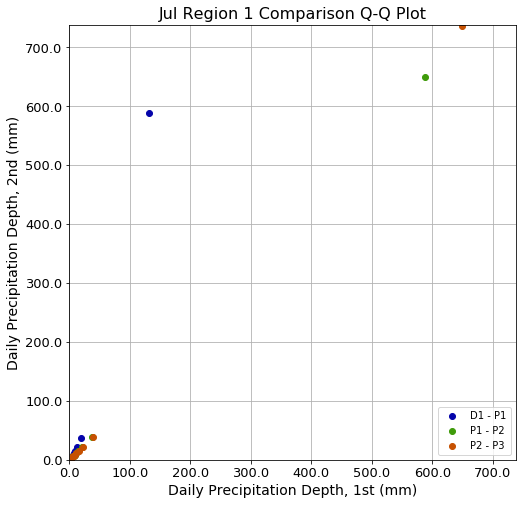

In [742]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Jul1D1Qs, Jul1P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Jul1P1Qs, Jul1P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Jul1P2Qs, Jul1P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.set_title('Jul Region 1 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max1Qs) )
ax11.set_ylim( (0.0, max1Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

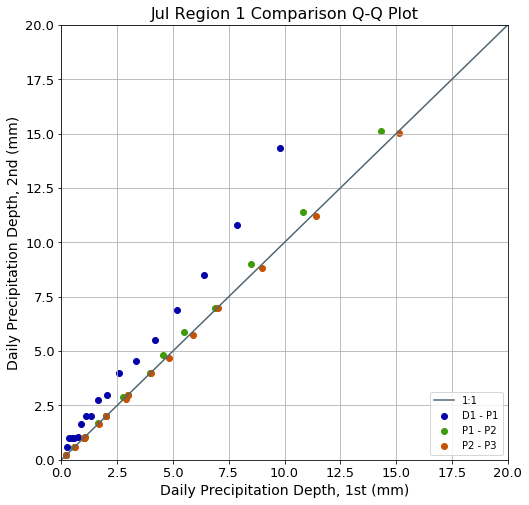

In [743]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Jul1D1Qs, Jul1P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Jul1P1Qs, Jul1P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Jul1P2Qs, Jul1P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.plot( [0.0, max1Qs], [0.0, max1Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Jul Region 1 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 20.0) )
ax11.set_ylim( (0.0, 20.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

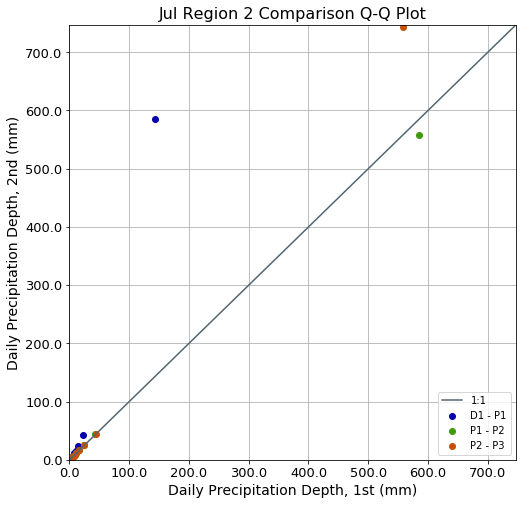

In [744]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Jul2D1Qs, Jul2P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Jul2P1Qs, Jul2P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Jul2P2Qs, Jul2P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.plot( [0.0, max2Qs], [0.0, max2Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Jul Region 2 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max2Qs) )
ax11.set_ylim( (0.0, max2Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

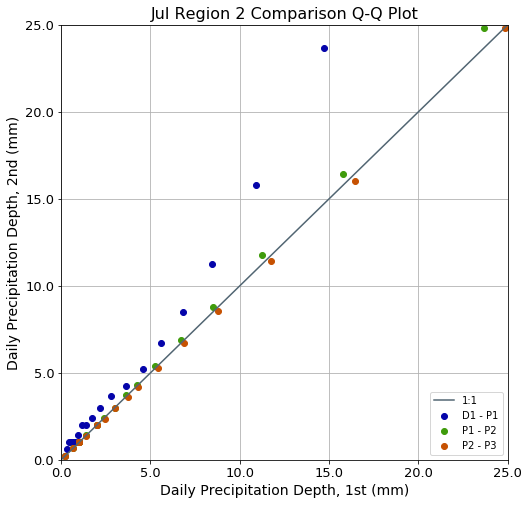

In [745]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Jul2D1Qs, Jul2P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Jul2P1Qs, Jul2P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Jul2P2Qs, Jul2P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.plot( [0.0, max2Qs], [0.0, max2Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Jul Region 2 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

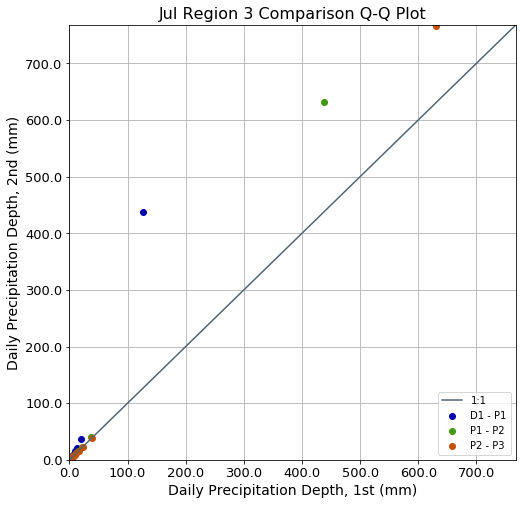

In [746]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Jul3D1Qs, Jul3P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Jul3P1Qs, Jul3P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Jul3P2Qs, Jul3P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.plot( [0.0, max3Qs], [0.0, max3Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Jul Region 3 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max3Qs) )
ax11.set_ylim( (0.0, max3Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

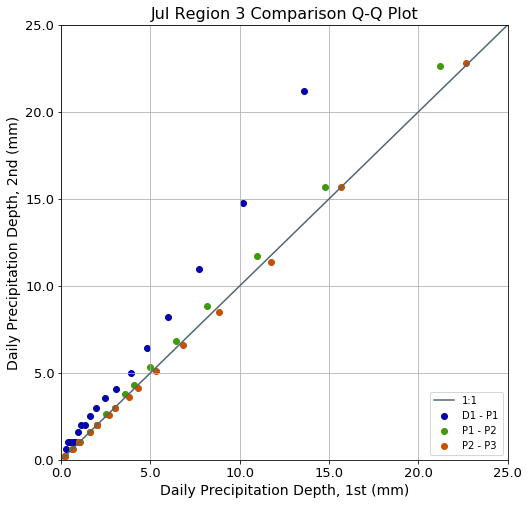

In [747]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Jul3D1Qs, Jul3P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Jul3P1Qs, Jul3P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Jul3P2Qs, Jul3P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.plot( [0.0, max3Qs], [0.0, max3Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Jul Region 3 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

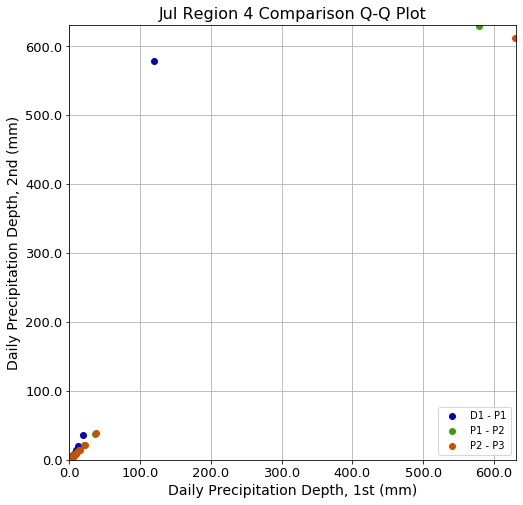

In [748]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Jul4D1Qs, Jul4P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Jul4P1Qs, Jul4P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Jul4P2Qs, Jul4P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.set_title('Jul Region 4 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max4Qs) )
ax11.set_ylim( (0.0, max4Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

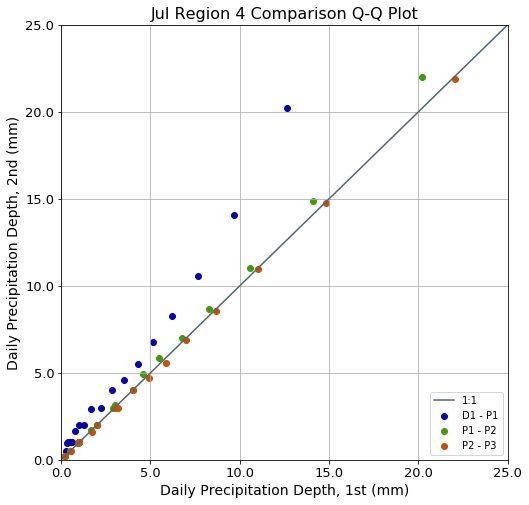

In [749]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Jul4D1Qs, Jul4P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Jul4P1Qs, Jul4P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Jul4P2Qs, Jul4P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.plot( [0.0, max4Qs], [0.0, max4Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Jul Region 4 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

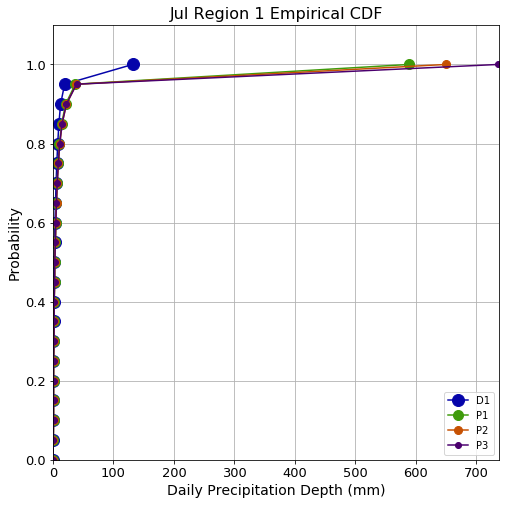

In [750]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Jul1D1Qs, nCompQs, c='xkcd:royal blue', markersize=12, marker='o', 
           linestyle='-', label="D1")
ax11.plot( Jul1P1Qs, nCompQs, c='xkcd:grass green', markersize=10, marker='o', 
           linestyle='-', label="P1")
ax11.plot( Jul1P2Qs, nCompQs, c='xkcd:dark orange', markersize=8, marker='o', 
           linestyle='-', label="P2")
ax11.plot( Jul1P3Qs, nCompQs, c='xkcd:royal purple', markersize=6, marker='o', 
           linestyle='-', label="P3")
ax11.set_title('Jul Region 1 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max1Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

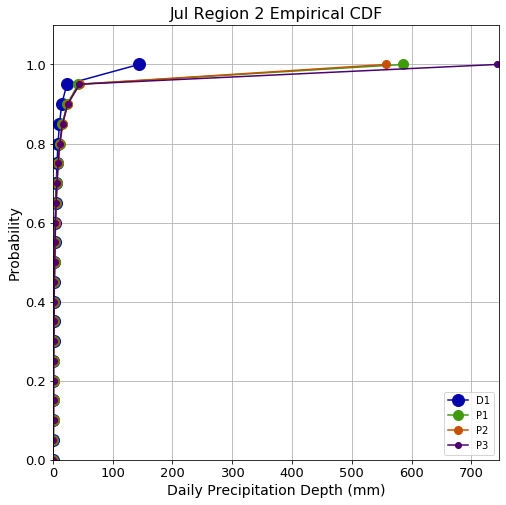

In [751]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Jul2D1Qs, nCompQs, c='xkcd:royal blue', markersize=12, marker='o', 
           linestyle='-', label="D1")
ax11.plot( Jul2P1Qs, nCompQs, c='xkcd:grass green', markersize=10, marker='o', 
           linestyle='-', label="P1")
ax11.plot( Jul2P2Qs, nCompQs, c='xkcd:dark orange', markersize=8, marker='o', 
           linestyle='-', label="P2")
ax11.plot( Jul2P3Qs, nCompQs, c='xkcd:royal purple', markersize=6, marker='o', 
           linestyle='-', label="P3")
ax11.set_title('Jul Region 2 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max2Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

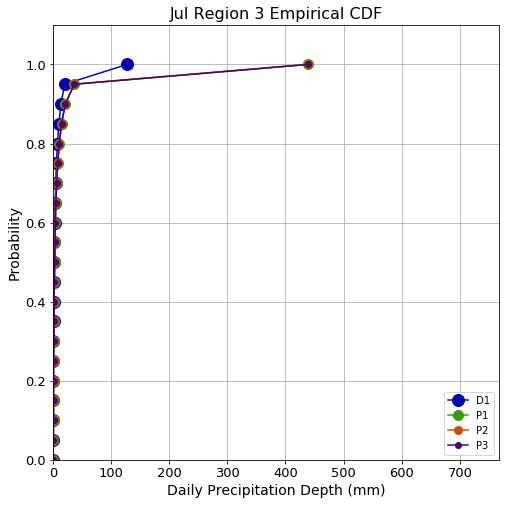

In [752]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Jul3D1Qs, nCompQs, c='xkcd:royal blue', markersize=12, marker='o', 
           linestyle='-', label="D1")
ax11.plot( Jul3P1Qs, nCompQs, c='xkcd:grass green', markersize=10, marker='o', 
           linestyle='-', label="P1")
ax11.plot( Jul3P1Qs, nCompQs, c='xkcd:dark orange', markersize=8, marker='o', 
           linestyle='-', label="P2")
ax11.plot( Jul3P1Qs, nCompQs, c='xkcd:royal purple', markersize=6, marker='o', 
           linestyle='-', label="P3")
ax11.set_title('Jul Region 3 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max3Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

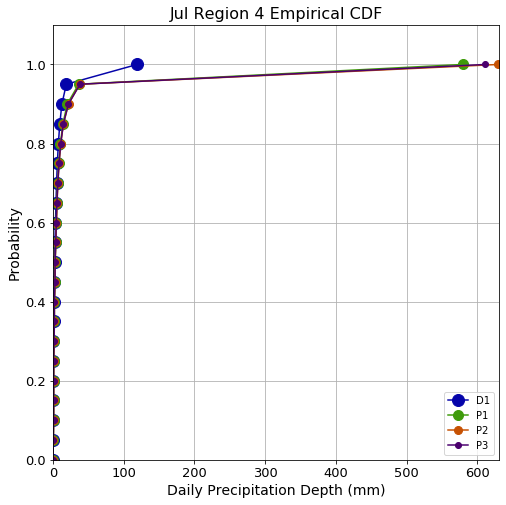

In [753]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Jul4D1Qs, nCompQs, c='xkcd:royal blue', markersize=12, marker='o', 
           linestyle='-', label="D1")
ax11.plot( Jul4P1Qs, nCompQs, c='xkcd:grass green', markersize=10, marker='o', 
           linestyle='-', label="P1")
ax11.plot( Jul4P2Qs, nCompQs, c='xkcd:dark orange', markersize=8, marker='o', 
           linestyle='-', label="P2")
ax11.plot( Jul4P3Qs, nCompQs, c='xkcd:royal purple', markersize=6, marker='o', 
           linestyle='-', label="P3")
ax11.set_title('Jul Region 4 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max4Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### Aug

In [754]:
AugNum = 8

In [755]:
Aug1D1DF = AugD1DF[AugD1DF["PRegion_Id"] == 1].copy()
Aug2D1DF = AugD1DF[AugD1DF["PRegion_Id"] == 2].copy()
Aug3D1DF = AugD1DF[AugD1DF["PRegion_Id"] == 3].copy()
Aug4D1DF = AugD1DF[AugD1DF["PRegion_Id"] == 4].copy()

In [756]:
Aug1P1DF = AugP1DF[AugP1DF["PRegion_Id"] == 1].copy()
Aug2P1DF = AugP1DF[AugP1DF["PRegion_Id"] == 2].copy()
Aug3P1DF = AugP1DF[AugP1DF["PRegion_Id"] == 3].copy()
Aug4P1DF = AugP1DF[AugP1DF["PRegion_Id"] == 4].copy()

In [757]:
Aug1P2DF = AugP2DF[AugP2DF["PRegion_Id"] == 1].copy()
Aug2P2DF = AugP2DF[AugP2DF["PRegion_Id"] == 2].copy()
Aug3P2DF = AugP2DF[AugP2DF["PRegion_Id"] == 3].copy()
Aug4P2DF = AugP2DF[AugP2DF["PRegion_Id"] == 4].copy()

In [758]:
Aug1P3DF = AugP3DF[AugP3DF["PRegion_Id"] == 1].copy()
Aug2P3DF = AugP3DF[AugP3DF["PRegion_Id"] == 2].copy()
Aug3P3DF = AugP3DF[AugP3DF["PRegion_Id"] == 3].copy()
Aug4P3DF = AugP3DF[AugP3DF["PRegion_Id"] == 4].copy()

Bayesian estimates of confidence intervals for mean, variance, and standard deviation of the samples

In [759]:
Aug1D1BSCI = sstats.bayes_mvs( np.array( Aug1D1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Aug2D1BSCI = sstats.bayes_mvs( np.array( Aug2D1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Aug3D1BSCI = sstats.bayes_mvs( np.array( Aug3D1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Aug4D1BSCI = sstats.bayes_mvs( np.array( Aug4D1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )

In [760]:
Aug1P1BSCI = sstats.bayes_mvs( np.array( Aug1P1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Aug2P1BSCI = sstats.bayes_mvs( np.array( Aug2P1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Aug3P1BSCI = sstats.bayes_mvs( np.array( Aug3P1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Aug4P1BSCI = sstats.bayes_mvs( np.array( Aug4P1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )

In [761]:
Aug1P2BSCI = sstats.bayes_mvs( np.array( Aug1P2DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Aug2P2BSCI = sstats.bayes_mvs( np.array( Aug2P2DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Aug3P2BSCI = sstats.bayes_mvs( np.array( Aug3P2DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Aug4P2BSCI = sstats.bayes_mvs( np.array( Aug4P2DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )

In [762]:
Aug1P3BSCI = sstats.bayes_mvs( np.array( Aug1P3DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Aug2P3BSCI = sstats.bayes_mvs( np.array( Aug2P3DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Aug3P3BSCI = sstats.bayes_mvs( np.array( Aug3P3DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Aug4P3BSCI = sstats.bayes_mvs( np.array( Aug4P3DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )

In [763]:
CMonList.append( AugNum )
CZoneList.append( 1 )
SD1Mean.append( Aug1D1BSCI[0][0] )
SD1MeanMinCI.append( Aug1D1BSCI[0][1][0] )
SD1MeanMaxCI.append( Aug1D1BSCI[0][1][1] )
SD1Var.append( Aug1D1BSCI[1][0] )
SD1VarMinCI.append( Aug1D1BSCI[1][1][0] )
SD1VarMaxCI.append( Aug1D1BSCI[1][1][1] )
SD1Std.append( Aug1D1BSCI[2][0] )
SD1StdMinCI.append( Aug1D1BSCI[2][1][0] )
SD1StdMaxCI.append( Aug1D1BSCI[2][1][1] )
CMonList.append( AugNum )
CZoneList.append( 2 )
SD1Mean.append( Aug2D1BSCI[0][0] )
SD1MeanMinCI.append( Aug2D1BSCI[0][1][0] )
SD1MeanMaxCI.append( Aug2D1BSCI[0][1][1] )
SD1Var.append( Aug2D1BSCI[1][0] )
SD1VarMinCI.append( Aug2D1BSCI[1][1][0] )
SD1VarMaxCI.append( Aug2D1BSCI[1][1][1] )
SD1Std.append( Aug2D1BSCI[2][0] )
SD1StdMinCI.append( Aug2D1BSCI[2][1][0] )
SD1StdMaxCI.append( Aug2D1BSCI[2][1][1] )
CMonList.append( AugNum )
CZoneList.append( 3 )
SD1Mean.append( Aug3D1BSCI[0][0] )
SD1MeanMinCI.append( Aug3D1BSCI[0][1][0] )
SD1MeanMaxCI.append( Aug3D1BSCI[0][1][1] )
SD1Var.append( Aug3D1BSCI[1][0] )
SD1VarMinCI.append( Aug3D1BSCI[1][1][0] )
SD1VarMaxCI.append( Aug3D1BSCI[1][1][1] )
SD1Std.append( Aug3D1BSCI[2][0] )
SD1StdMinCI.append( Aug3D1BSCI[2][1][0] )
SD1StdMaxCI.append( Aug3D1BSCI[2][1][1] )
CMonList.append( AugNum )
CZoneList.append( 4 )
SD1Mean.append( Aug4D1BSCI[0][0] )
SD1MeanMinCI.append( Aug4D1BSCI[0][1][0] )
SD1MeanMaxCI.append( Aug4D1BSCI[0][1][1] )
SD1Var.append( Aug4D1BSCI[1][0] )
SD1VarMinCI.append( Aug4D1BSCI[1][1][0] )
SD1VarMaxCI.append( Aug4D1BSCI[1][1][1] )
SD1Std.append( Aug4D1BSCI[2][0] )
SD1StdMinCI.append( Aug4D1BSCI[2][1][0] )
SD1StdMaxCI.append( Aug4D1BSCI[2][1][1] )

In [764]:
SP1Mean.append( Aug1P1BSCI[0][0] )
SP1MeanMinCI.append( Aug1P1BSCI[0][1][0] )
SP1MeanMaxCI.append( Aug1P1BSCI[0][1][1] )
SP1Var.append( Aug1P1BSCI[1][0] )
SP1VarMinCI.append( Aug1P1BSCI[1][1][0] )
SP1VarMaxCI.append( Aug1P1BSCI[1][1][1] )
SP1Std.append( Aug1P1BSCI[2][0] )
SP1StdMinCI.append( Aug1P1BSCI[2][1][0] )
SP1StdMaxCI.append( Aug1P1BSCI[2][1][1] )
SP1Mean.append( Aug2P1BSCI[0][0] )
SP1MeanMinCI.append( Aug2P1BSCI[0][1][0] )
SP1MeanMaxCI.append( Aug2P1BSCI[0][1][1] )
SP1Var.append( Aug2P1BSCI[1][0] )
SP1VarMinCI.append( Aug2P1BSCI[1][1][0] )
SP1VarMaxCI.append( Aug2P1BSCI[1][1][1] )
SP1Std.append( Aug2P1BSCI[2][0] )
SP1StdMinCI.append( Aug2P1BSCI[2][1][0] )
SP1StdMaxCI.append( Aug2P1BSCI[2][1][1] )
SP1Mean.append( Aug3P1BSCI[0][0] )
SP1MeanMinCI.append( Aug3P1BSCI[0][1][0] )
SP1MeanMaxCI.append( Aug3P1BSCI[0][1][1] )
SP1Var.append( Aug3P1BSCI[1][0] )
SP1VarMinCI.append( Aug3P1BSCI[1][1][0] )
SP1VarMaxCI.append( Aug3P1BSCI[1][1][1] )
SP1Std.append( Aug3P1BSCI[2][0] )
SP1StdMinCI.append( Aug3P1BSCI[2][1][0] )
SP1StdMaxCI.append( Aug3P1BSCI[2][1][1] )
SP1Mean.append( Aug4P1BSCI[0][0] )
SP1MeanMinCI.append( Aug4P1BSCI[0][1][0] )
SP1MeanMaxCI.append( Aug4P1BSCI[0][1][1] )
SP1Var.append( Aug4P1BSCI[1][0] )
SP1VarMinCI.append( Aug4P1BSCI[1][1][0] )
SP1VarMaxCI.append( Aug4P1BSCI[1][1][1] )
SP1Std.append( Aug4P1BSCI[2][0] )
SP1StdMinCI.append( Aug4P1BSCI[2][1][0] )
SP1StdMaxCI.append( Aug4P1BSCI[2][1][1] )

In [765]:
SP2Mean.append( Aug1P2BSCI[0][0] )
SP2MeanMinCI.append( Aug1P2BSCI[0][1][0] )
SP2MeanMaxCI.append( Aug1P2BSCI[0][1][1] )
SP2Var.append( Aug1P2BSCI[1][0] )
SP2VarMinCI.append( Aug1P2BSCI[1][1][0] )
SP2VarMaxCI.append( Aug1P2BSCI[1][1][1] )
SP2Std.append( Aug1P2BSCI[2][0] )
SP2StdMinCI.append( Aug1P2BSCI[2][1][0] )
SP2StdMaxCI.append( Aug1P2BSCI[2][1][1] )
SP2Mean.append( Aug2P2BSCI[0][0] )
SP2MeanMinCI.append( Aug2P2BSCI[0][1][0] )
SP2MeanMaxCI.append( Aug2P2BSCI[0][1][1] )
SP2Var.append( Aug2P2BSCI[1][0] )
SP2VarMinCI.append( Aug2P2BSCI[1][1][0] )
SP2VarMaxCI.append( Aug2P2BSCI[1][1][1] )
SP2Std.append( Aug2P2BSCI[2][0] )
SP2StdMinCI.append( Aug2P2BSCI[2][1][0] )
SP2StdMaxCI.append( Aug2P2BSCI[2][1][1] )
SP2Mean.append( Aug3P2BSCI[0][0] )
SP2MeanMinCI.append( Aug3P2BSCI[0][1][0] )
SP2MeanMaxCI.append( Aug3P2BSCI[0][1][1] )
SP2Var.append( Aug3P2BSCI[1][0] )
SP2VarMinCI.append( Aug3P2BSCI[1][1][0] )
SP2VarMaxCI.append( Aug3P2BSCI[1][1][1] )
SP2Std.append( Aug3P2BSCI[2][0] )
SP2StdMinCI.append( Aug3P2BSCI[2][1][0] )
SP2StdMaxCI.append( Aug3P2BSCI[2][1][1] )
SP2Mean.append( Aug4P2BSCI[0][0] )
SP2MeanMinCI.append( Aug4P2BSCI[0][1][0] )
SP2MeanMaxCI.append( Aug4P2BSCI[0][1][1] )
SP2Var.append( Aug4P2BSCI[1][0] )
SP2VarMinCI.append( Aug4P2BSCI[1][1][0] )
SP2VarMaxCI.append( Aug4P2BSCI[1][1][1] )
SP2Std.append( Aug4P2BSCI[2][0] )
SP2StdMinCI.append( Aug4P2BSCI[2][1][0] )
SP2StdMaxCI.append( Aug4P2BSCI[2][1][1] )

In [766]:
SP3Mean.append( Aug1P3BSCI[0][0] )
SP3MeanMinCI.append( Aug1P3BSCI[0][1][0] )
SP3MeanMaxCI.append( Aug1P3BSCI[0][1][1] )
SP3Var.append( Aug1P3BSCI[1][0] )
SP3VarMinCI.append( Aug1P3BSCI[1][1][0] )
SP3VarMaxCI.append( Aug1P3BSCI[1][1][1] )
SP3Std.append( Aug1P3BSCI[2][0] )
SP3StdMinCI.append( Aug1P3BSCI[2][1][0] )
SP3StdMaxCI.append( Aug1P3BSCI[2][1][1] )
SP3Mean.append( Aug2P3BSCI[0][0] )
SP3MeanMinCI.append( Aug2P3BSCI[0][1][0] )
SP3MeanMaxCI.append( Aug2P3BSCI[0][1][1] )
SP3Var.append( Aug2P3BSCI[1][0] )
SP3VarMinCI.append( Aug2P3BSCI[1][1][0] )
SP3VarMaxCI.append( Aug2P3BSCI[1][1][1] )
SP3Std.append( Aug2P3BSCI[2][0] )
SP3StdMinCI.append( Aug2P3BSCI[2][1][0] )
SP3StdMaxCI.append( Aug2P3BSCI[2][1][1] )
SP3Mean.append( Aug3P3BSCI[0][0] )
SP3MeanMinCI.append( Aug3P3BSCI[0][1][0] )
SP3MeanMaxCI.append( Aug3P3BSCI[0][1][1] )
SP3Var.append( Aug3P3BSCI[1][0] )
SP3VarMinCI.append( Aug3P3BSCI[1][1][0] )
SP3VarMaxCI.append( Aug3P3BSCI[1][1][1] )
SP3Std.append( Aug3P3BSCI[2][0] )
SP3StdMinCI.append( Aug3P3BSCI[2][1][0] )
SP3StdMaxCI.append( Aug3P3BSCI[2][1][1] )
SP3Mean.append( Aug4P3BSCI[0][0] )
SP3MeanMinCI.append( Aug4P3BSCI[0][1][0] )
SP3MeanMaxCI.append( Aug4P3BSCI[0][1][1] )
SP3Var.append( Aug4P3BSCI[1][0] )
SP3VarMinCI.append( Aug4P3BSCI[1][1][0] )
SP3VarMaxCI.append( Aug4P3BSCI[1][1][1] )
SP3Std.append( Aug4P3BSCI[2][0] )
SP3StdMinCI.append( Aug4P3BSCI[2][1][0] )
SP3StdMaxCI.append( Aug4P3BSCI[2][1][1] )

#### T-Test

T-Test for the means of two independent samples. Two-sided test for the null hypothesis that 2 independent samples hae identical average values. Test assumes that the populations have identical variances.

If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [767]:
Aug1TTD1toP1 = sstats.ttest_ind( np.array( Aug1D1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Aug1P1DF["Precip_mm"], dtype=np.int32 ) )

In [768]:
Aug1TTD1toP1Pval = Aug1TTD1toP1[1]
print("Region 1, P-Value for LOCA D1 and P1 from same population is: %g" % Aug1TTD1toP1Pval )

Region 1, P-Value for LOCA D1 and P1 from same population is: 0


In [769]:
Aug2TTD1toP1 = sstats.ttest_ind( np.array( Aug2D1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Aug2P1DF["Precip_mm"], dtype=np.int32 ) )

In [770]:
Aug2TTD1toP1Pval = Aug2TTD1toP1[1]
print("Region 2, P-Value for LOCA D1 and P1 from same population is: %g" % Aug2TTD1toP1Pval )

Region 2, P-Value for LOCA D1 and P1 from same population is: 0


In [771]:
Aug3TTD1toP1 = sstats.ttest_ind( np.array( Aug3D1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Aug3P1DF["Precip_mm"], dtype=np.int32 ) )

In [772]:
Aug3TTD1toP1Pval = Aug3TTD1toP1[1]
print("Region 3, P-Value for LOCA D1 and P1 from same population is: %g" % Aug3TTD1toP1Pval )

Region 3, P-Value for LOCA D1 and P1 from same population is: 0


In [773]:
Aug4TTD1toP1 = sstats.ttest_ind( np.array( Aug4D1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Aug4P1DF["Precip_mm"], dtype=np.int32 ) )

In [774]:
Aug4TTD1toP1Pval = Aug4TTD1toP1[1]
print("Region 4, P-Value for LOCA D1 and P1 from same population is: %g" % Aug4TTD1toP1Pval )

Region 4, P-Value for LOCA D1 and P1 from same population is: 0


In [775]:
Aug1TTP1toP2 = sstats.ttest_ind( np.array( Aug1P1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Aug1P2DF["Precip_mm"], dtype=np.int32 ) )

In [776]:
Aug1TTP1toP2Pval = Aug1TTP1toP2[1]
print("Region 1, P-Value for LOCA P1 and P2 from same population is: %g" % Aug1TTP1toP2Pval )

Region 1, P-Value for LOCA P1 and P2 from same population is: 9.06109e-13


In [777]:
Aug2TTP1toP2 = sstats.ttest_ind( np.array( Aug2P1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Aug2P2DF["Precip_mm"], dtype=np.int32 ) )

In [778]:
Aug2TTP1toP2Pval = Aug2TTP1toP2[1]
print("Region 2, P-Value for LOCA P1 and P2 from same population is: %g" % Aug2TTP1toP2Pval )

Region 2, P-Value for LOCA P1 and P2 from same population is: 7.64296e-17


In [779]:
Aug3TTP1toP2 = sstats.ttest_ind( np.array( Aug3P1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Aug3P2DF["Precip_mm"], dtype=np.int32 ) )

In [780]:
Aug3TTP1toP2Pval = Aug3TTP1toP2[1]
print("Region 3, P-Value for LOCA P1 and P2 from same population is: %g" % Aug3TTP1toP2Pval )

Region 3, P-Value for LOCA P1 and P2 from same population is: 3.6988e-06


In [781]:
Aug4TTP1toP2 = sstats.ttest_ind( np.array( Aug4P1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Aug4P2DF["Precip_mm"], dtype=np.int32 ) )

In [782]:
Aug4TTP1toP2Pval = Aug4TTP1toP2[1]
print("Region 4, P-Value for LOCA P1 and P2 from same population is: %g" % Aug4TTP1toP2Pval )

Region 4, P-Value for LOCA P1 and P2 from same population is: 2.69651e-20


In [783]:
Aug1TTP2toP3 = sstats.ttest_ind( np.array( Aug1P2DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Aug1P3DF["Precip_mm"], dtype=np.int32 ) )

In [784]:
Aug1TTP2toP3Pval = Aug1TTP2toP3[1]
print("Region 1, P-Value for LOCA P2 and P3 from same population is: %g" % Aug1TTP2toP3Pval )

Region 1, P-Value for LOCA P2 and P3 from same population is: 1.67455e-21


In [785]:
Aug2TTP2toP3 = sstats.ttest_ind( np.array( Aug2P2DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Aug2P3DF["Precip_mm"], dtype=np.int32 ) )

In [786]:
Aug2TTP2toP3Pval = Aug2TTP2toP3[1]
print("Region 2, P-Value for LOCA P2 and P3 from same population is: %g" % Aug2TTP2toP3Pval )

Region 2, P-Value for LOCA P2 and P3 from same population is: 5.62269e-17


In [787]:
Aug3TTP2toP3 = sstats.ttest_ind( np.array( Aug3P2DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Aug3P3DF["Precip_mm"], dtype=np.int32 ) )

In [788]:
Aug3TTP2toP3Pval = Aug3TTP2toP3[1]
print("Region 3, P-Value for LOCA P2 and P3 from same population is: %g" % Aug3TTP2toP3Pval )

Region 3, P-Value for LOCA P2 and P3 from same population is: 4.98633e-09


In [789]:
Aug4TTP2toP3 = sstats.ttest_ind( np.array( Aug4P2DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Aug4P3DF["Precip_mm"], dtype=np.int32 ) )

In [790]:
Aug4TTP2toP3Pval = Aug4TTP2toP3[1]
print("Region 4, P-Value for LOCA P2 and P3 from same population is: %g" % Aug4TTP2toP3Pval )

Region 4, P-Value for LOCA P2 and P3 from same population is: 4.85465e-35


#### Mann-Whitney Rank Test

Nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample. This test can be used to investigate whether two independent samples were selected from populations having the same distribution.

Null hypothesis, $H_{0}$, is that the distributions of both populations are equal.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of being from the same distribution.

In [791]:
Aug1MWUD1toP1 = sstats.mannwhitneyu( np.array( Aug1D1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Aug1P1DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [792]:
Aug1MWUD1toP1Pval = Aug1MWUD1toP1[1]
print("Region 1, P-Value for LOCA D1 and P1 from same distribution is: %g" % Aug1MWUD1toP1Pval )

Region 1, P-Value for LOCA D1 and P1 from same distribution is: 0


In [793]:
Aug2MWUD1toP1 = sstats.mannwhitneyu( np.array( Aug2D1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Aug2P1DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [794]:
Aug2MWUD1toP1Pval = Aug2MWUD1toP1[1]
print("Region 2, P-Value for LOCA D1 and P1 from same distribution is: %g" % Aug2MWUD1toP1Pval )

Region 2, P-Value for LOCA D1 and P1 from same distribution is: 0


In [795]:
Aug3MWUD1toP1 = sstats.mannwhitneyu( np.array( Aug3D1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Aug3P1DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [796]:
Aug3MWUD1toP1Pval = Aug3MWUD1toP1[1]
print("Region 3, P-Value for LOCA D1 and P1 from same distribution is: %g" % Aug3MWUD1toP1Pval )

Region 3, P-Value for LOCA D1 and P1 from same distribution is: 0


In [797]:
Aug4MWUD1toP1 = sstats.mannwhitneyu( np.array( Aug4D1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Aug4P1DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [798]:
Aug4MWUD1toP1Pval = Aug4MWUD1toP1[1]
print("Region 4, P-Value for LOCA D1 and P1 from same distribution is: %g" % Aug4MWUD1toP1Pval )

Region 4, P-Value for LOCA D1 and P1 from same distribution is: 0


In [799]:
Aug1MWUP1toP2 = sstats.mannwhitneyu( np.array( Aug1P1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Aug1P2DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [800]:
Aug1MWUP1toP2Pval = Aug1MWUP1toP2[1]
print("Region 1, P-Value for LOCA P1 and P2 from same distribution is: %g" % Aug1MWUP1toP2Pval )

Region 1, P-Value for LOCA P1 and P2 from same distribution is: 0.626532


In [801]:
Aug2MWUP1toP2 = sstats.mannwhitneyu( np.array( Aug2P1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Aug2P2DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [802]:
Aug2MWUP1toP2Pval = Aug2MWUP1toP2[1]
print("Region 2, P-Value for LOCA P1 and P2 from same distribution is: %g" % Aug2MWUP1toP2Pval )

Region 2, P-Value for LOCA P1 and P2 from same distribution is: 0.0976566


In [803]:
Aug3MWUP1toP2 = sstats.mannwhitneyu( np.array( Aug3P1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Aug3P2DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [804]:
Aug3MWUP1toP2Pval = Aug3MWUP1toP2[1]
print("Region 3, P-Value for LOCA P1 and P2 from same distribution is: %g" % Aug3MWUP1toP2Pval )

Region 3, P-Value for LOCA P1 and P2 from same distribution is: 0.61014


In [805]:
Aug4MWUP1toP2 = sstats.mannwhitneyu( np.array( Aug4P1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Aug4P2DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [806]:
Aug4MWUP1toP2Pval = Aug4MWUP1toP2[1]
print("Region 4, P-Value for LOCA P1 and P2 from same distribution is: %g" % Aug4MWUP1toP2Pval )

Region 4, P-Value for LOCA P1 and P2 from same distribution is: 1.0527e-08


In [807]:
Aug1MWUP2toP3 = sstats.mannwhitneyu( np.array( Aug1P2DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Aug1P3DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [808]:
Aug1MWUP2toP3Pval = Aug1MWUP2toP3[1]
print("Region 1, P-Value for LOCA P2 and P3 from same distribution is: %g" % Aug1MWUP2toP3Pval )

Region 1, P-Value for LOCA P2 and P3 from same distribution is: 1.13416e-12


In [809]:
Aug2MWUP2toP3 = sstats.mannwhitneyu( np.array( Aug2P2DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Aug2P3DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [810]:
Aug2MWUP2toP3Pval = Aug2MWUP2toP3[1]
print("Region 2, P-Value for LOCA P2 and P3 from same distribution is: %g" % Aug2MWUP2toP3Pval )

Region 2, P-Value for LOCA P2 and P3 from same distribution is: 1.22658e-13


In [811]:
Aug3MWUP2toP3 = sstats.mannwhitneyu( np.array( Aug3P2DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Aug3P3DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [812]:
Aug3MWUP2toP3Pval = Aug3MWUP2toP3[1]
print("Region 3, P-Value for LOCA P2 and P3 from same distribution is: %g" % Aug3MWUP2toP3Pval )

Region 3, P-Value for LOCA P2 and P3 from same distribution is: 6.48795e-11


In [813]:
Aug4MWUP2toP3 = sstats.mannwhitneyu( np.array( Aug4P2DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Aug4P3DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [814]:
Aug4MWUP2toP3Pval = Aug4MWUP2toP3[1]
print("Region 4, P-Value for LOCA P2 and P3 from same distribution is: %g" % Aug4MWUP2toP3Pval )

Region 4, P-Value for LOCA P2 and P3 from same distribution is: 2.41129e-18


#### Kruskal-Wallis Test

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of the same population median.

In [815]:
Aug1KWD1toP1 = sstats.kruskal( np.array( Aug1D1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Aug1P1DF["Precip_mm"], dtype=np.int32 ) )

In [816]:
Aug1KWD1toP1Pval = Aug1KWD1toP1[1]
print("Region 1, P-Value for LOCA D1 and P1 have the same median is: %g" % Aug1KWD1toP1Pval )

Region 1, P-Value for LOCA D1 and P1 have the same median is: 0


In [817]:
Aug2KWD1toP1 = sstats.kruskal( np.array( Aug2D1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Aug2P1DF["Precip_mm"], dtype=np.int32 ) )

In [818]:
Aug2KWD1toP1Pval = Aug2KWD1toP1[1]
print("Region 2, P-Value for LOCA D1 and P1 have the same median is: %g" % Aug2KWD1toP1Pval )

Region 2, P-Value for LOCA D1 and P1 have the same median is: 0


In [819]:
Aug3KWD1toP1 = sstats.kruskal( np.array( Aug3D1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Aug3P1DF["Precip_mm"], dtype=np.int32 ) )

In [820]:
Aug3KWD1toP1Pval = Aug3KWD1toP1[1]
print("Region 3, P-Value for LOCA D1 and P1 have the same median is: %g" % Aug3KWD1toP1Pval )

Region 3, P-Value for LOCA D1 and P1 have the same median is: 0


In [821]:
Aug4KWD1toP1 = sstats.kruskal( np.array( Aug4D1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Aug4P1DF["Precip_mm"], dtype=np.int32 ) )

In [822]:
Aug4KWD1toP1Pval = Aug4KWD1toP1[1]
print("Region 4, P-Value for LOCA D1 and P1 have the same median is: %g" % Aug4KWD1toP1Pval )

Region 4, P-Value for LOCA D1 and P1 have the same median is: 1


In [823]:
Aug1KWP1toP2 = sstats.kruskal( np.array( Aug1P1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Aug1P2DF["Precip_mm"], dtype=np.int32 ) )

In [824]:
Aug1KWP1toP2Pval = Aug1KWP1toP2[1]
print("Region 1, P-Value for LOCA P1 and P2 have the same median is: %g" % Aug1KWP1toP2Pval )

Region 1, P-Value for LOCA P1 and P2 have the same median is: 0


In [825]:
Aug2KWP1toP2 = sstats.kruskal( np.array( Aug2P1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Aug2P2DF["Precip_mm"], dtype=np.int32 ) )

In [826]:
Aug2KWP1toP2Pval = Aug2KWP1toP2[1]
print("Region 2, P-Value for LOCA P1 and P2 have the same median is: %g" % Aug2KWP1toP2Pval )

Region 2, P-Value for LOCA P1 and P2 have the same median is: 1


In [827]:
Aug3KWP1toP2 = sstats.kruskal( np.array( Aug3P1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Aug3P2DF["Precip_mm"], dtype=np.int32 ) )

In [828]:
Aug3KWP1toP2Pval = Aug3KWP1toP2[1]
print("Region 3, P-Value for LOCA P1 and P2 have the same median is: %g" % Aug3KWP1toP2Pval )

Region 3, P-Value for LOCA P1 and P2 have the same median is: 0


In [829]:
Aug4KWP1toP2 = sstats.kruskal( np.array( Aug4P1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Aug4P2DF["Precip_mm"], dtype=np.int32 ) )

In [830]:
Aug4KWP1toP2Pval = Aug4KWP1toP2[1]
print("Region 4, P-Value for LOCA P1 and P2 have the same median is: %g" % Aug4KWP1toP2Pval )

Region 4, P-Value for LOCA P1 and P2 have the same median is: 0


In [831]:
Aug1KWP2toP3 = sstats.kruskal( np.array( Aug1P2DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Aug1P3DF["Precip_mm"], dtype=np.int32 ) )

In [832]:
Aug1KWP2toP3Pval = Aug1KWP2toP3[1]
print("Region 1, P-Value for LOCA P2 and P3 have the same median is: %g" % Aug1KWP2toP3Pval )

Region 1, P-Value for LOCA P2 and P3 have the same median is: 1


In [833]:
Aug2KWP2toP3 = sstats.kruskal( np.array( Aug2P2DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Aug2P3DF["Precip_mm"], dtype=np.int32 ) )

In [834]:
Aug2KWP2toP3Pval = Aug2KWP2toP3[1]
print("Region 2, P-Value for LOCA P2 and P3 have the same median is: %g" % Aug2KWP2toP3Pval )

Region 2, P-Value for LOCA P2 and P3 have the same median is: 1


In [835]:
Aug3KWP2toP3 = sstats.kruskal( np.array( Aug3P2DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Aug3P3DF["Precip_mm"], dtype=np.int32 ) )

In [836]:
Aug3KWP2toP3Pval = Aug3KWP2toP3[1]
print("Region 3, P-Value for LOCA P2 and P3 have the same median is: %g" % Aug3KWP2toP3Pval )

Region 3, P-Value for LOCA P2 and P3 have the same median is: 1


In [837]:
Aug4KWP2toP3 = sstats.kruskal( np.array( Aug4P2DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Aug4P3DF["Precip_mm"], dtype=np.int32 ) )

In [838]:
Aug4KWP2toP3Pval = Aug4KWP2toP3[1]
print("Region 4, P-Value for LOCA P2 and P3 have the same median is: %g" % Aug4KWP2toP3Pval )

Region 4, P-Value for LOCA P2 and P3 have the same median is: 0


In [839]:
Aug4P3DF["Precip_mm"].median(), Aug4P2DF["Precip_mm"].median(), Aug4P1DF["Precip_mm"].median(), Aug4D1DF["Precip_mm"].median()

(3.0, 3.0, 3.0, 2.472048759460449)

#### Plots

In [840]:
Aug1D1Qs = Aug1D1DF["Precip_mm"].quantile(q=nCompQs)
Aug1P1Qs = Aug1P1DF["Precip_mm"].quantile(q=nCompQs)
Aug1P2Qs = Aug1P2DF["Precip_mm"].quantile(q=nCompQs)
Aug1P3Qs = Aug1P3DF["Precip_mm"].quantile(q=nCompQs)
Aug2D1Qs = Aug2D1DF["Precip_mm"].quantile(q=nCompQs)
Aug2P1Qs = Aug2P1DF["Precip_mm"].quantile(q=nCompQs)
Aug2P2Qs = Aug2P2DF["Precip_mm"].quantile(q=nCompQs)
Aug2P3Qs = Aug2P3DF["Precip_mm"].quantile(q=nCompQs)
Aug3D1Qs = Aug3D1DF["Precip_mm"].quantile(q=nCompQs)
Aug3P1Qs = Aug3P1DF["Precip_mm"].quantile(q=nCompQs)
Aug3P2Qs = Aug3P2DF["Precip_mm"].quantile(q=nCompQs)
Aug3P3Qs = Aug3P3DF["Precip_mm"].quantile(q=nCompQs)
Aug4D1Qs = Aug4D1DF["Precip_mm"].quantile(q=nCompQs)
Aug4P1Qs = Aug4P1DF["Precip_mm"].quantile(q=nCompQs)
Aug4P2Qs = Aug4P2DF["Precip_mm"].quantile(q=nCompQs)
Aug4P3Qs = Aug4P3DF["Precip_mm"].quantile(q=nCompQs)

In [841]:
max1Qs = max( Aug1D1Qs.max(), Aug1P1Qs.max(), Aug1P2Qs.max(), Aug1P3Qs.max() )
max1Qs = round(max1Qs) + 2.0
max1Qs

664.0

In [842]:
max2Qs = max( Aug2D1Qs.max(), Aug2P1Qs.max(), Aug2P2Qs.max(), Aug2P3Qs.max() )
max2Qs = round(max2Qs) + 4.0
max2Qs

732.0

In [843]:
max3Qs = max( Aug3D1Qs.max(), Aug3P1Qs.max(), Aug3P2Qs.max(), Aug3P3Qs.max() )
max3Qs = round(max3Qs) + 1.0
max3Qs

721.0

In [844]:
max4Qs = max( Aug4D1Qs.max(), Aug4P1Qs.max(), Aug4P2Qs.max(), Aug4P3Qs.max() )
max4Qs = round(max4Qs) + 1.0
max4Qs

617.0

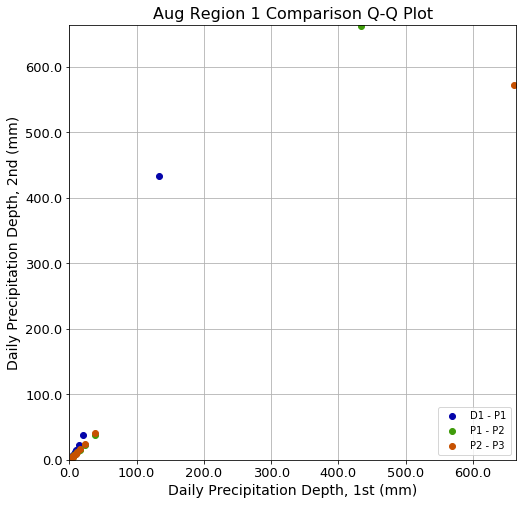

In [845]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Aug1D1Qs, Aug1P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Aug1P1Qs, Aug1P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Aug1P2Qs, Aug1P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.set_title('Aug Region 1 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max1Qs) )
ax11.set_ylim( (0.0, max1Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

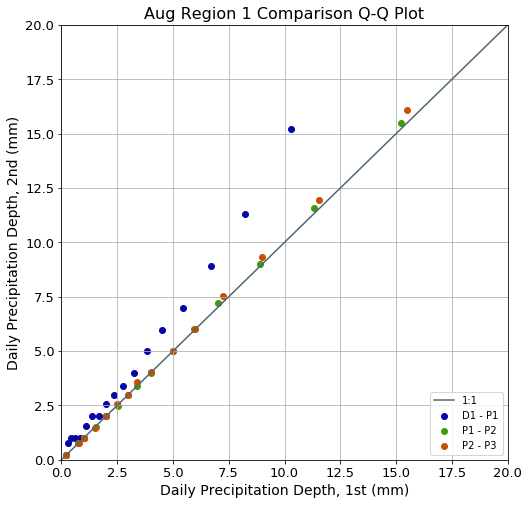

In [846]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Aug1D1Qs, Aug1P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Aug1P1Qs, Aug1P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Aug1P2Qs, Aug1P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.plot( [0.0, max1Qs], [0.0, max1Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Aug Region 1 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 20.0) )
ax11.set_ylim( (0.0, 20.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

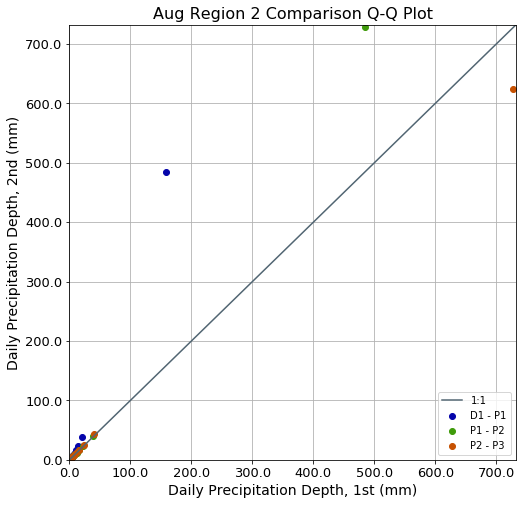

In [847]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Aug2D1Qs, Aug2P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Aug2P1Qs, Aug2P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Aug2P2Qs, Aug2P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.plot( [0.0, max2Qs], [0.0, max2Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Aug Region 2 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max2Qs) )
ax11.set_ylim( (0.0, max2Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

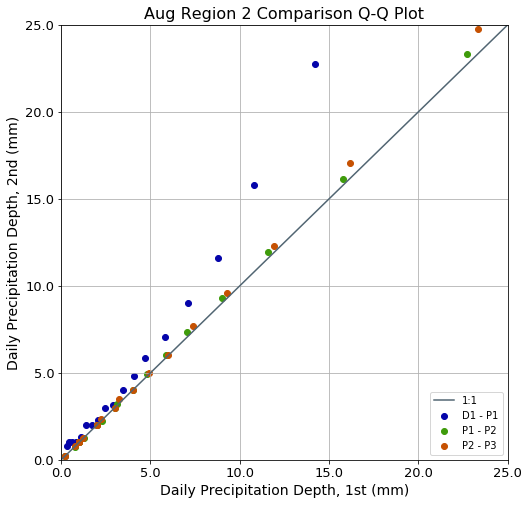

In [848]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Aug2D1Qs, Aug2P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Aug2P1Qs, Aug2P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Aug2P2Qs, Aug2P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.plot( [0.0, max2Qs], [0.0, max2Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Aug Region 2 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

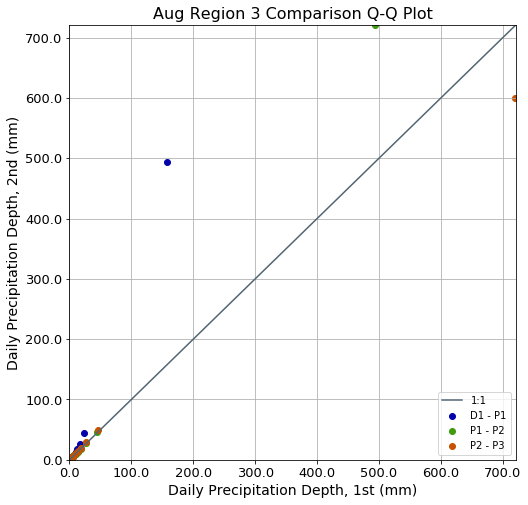

In [849]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Aug3D1Qs, Aug3P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Aug3P1Qs, Aug3P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Aug3P2Qs, Aug3P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.plot( [0.0, max3Qs], [0.0, max3Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Aug Region 3 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max3Qs) )
ax11.set_ylim( (0.0, max3Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

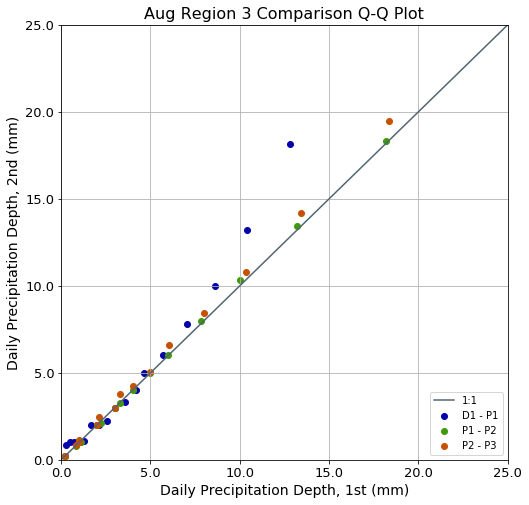

In [850]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Aug3D1Qs, Aug3P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Aug3P1Qs, Aug3P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Aug3P2Qs, Aug3P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.plot( [0.0, max3Qs], [0.0, max3Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Aug Region 3 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

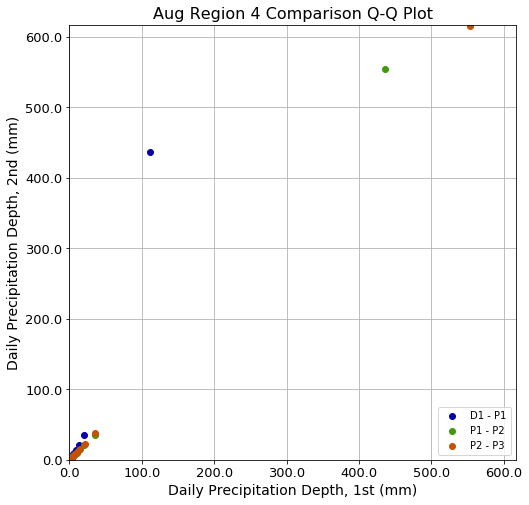

In [851]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Aug4D1Qs, Aug4P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Aug4P1Qs, Aug4P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Aug4P2Qs, Aug4P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.set_title('Aug Region 4 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max4Qs) )
ax11.set_ylim( (0.0, max4Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

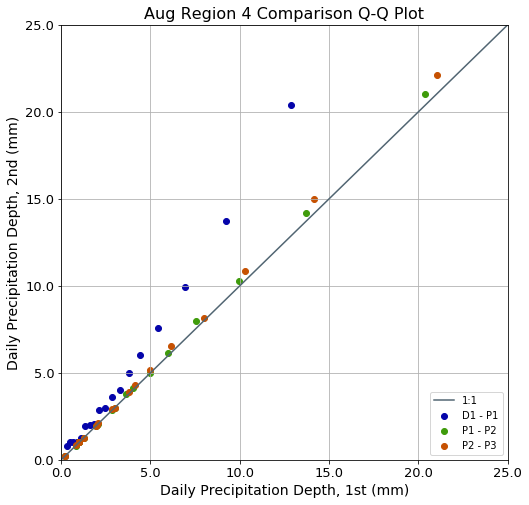

In [852]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Aug4D1Qs, Aug4P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Aug4P1Qs, Aug4P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Aug4P2Qs, Aug4P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.plot( [0.0, max4Qs], [0.0, max4Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Aug Region 4 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

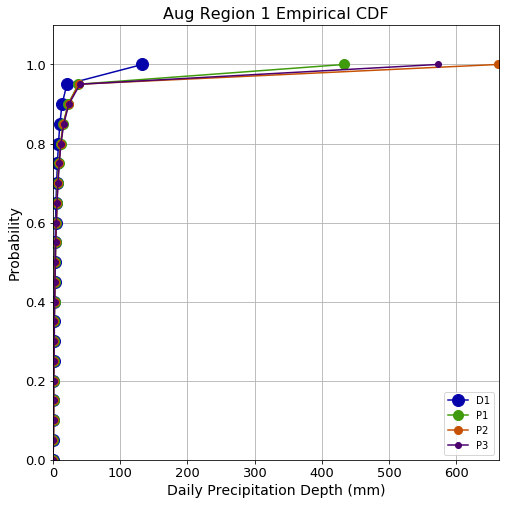

In [853]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Aug1D1Qs, nCompQs, c='xkcd:royal blue', markersize=12, marker='o', 
           linestyle='-', label="D1")
ax11.plot( Aug1P1Qs, nCompQs, c='xkcd:grass green', markersize=10, marker='o', 
           linestyle='-', label="P1")
ax11.plot( Aug1P2Qs, nCompQs, c='xkcd:dark orange', markersize=8, marker='o', 
           linestyle='-', label="P2")
ax11.plot( Aug1P3Qs, nCompQs, c='xkcd:royal purple', markersize=6, marker='o', 
           linestyle='-', label="P3")
ax11.set_title('Aug Region 1 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max1Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

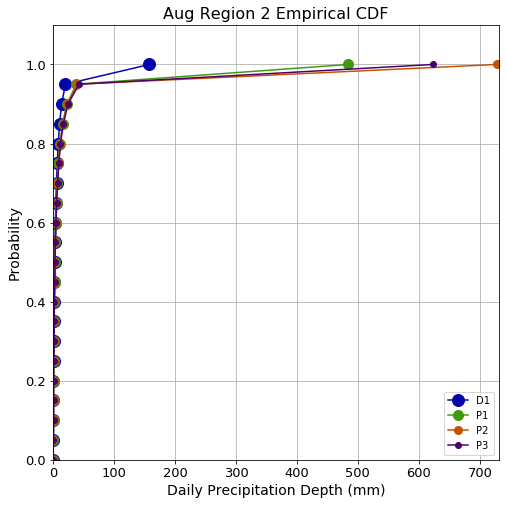

In [854]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Aug2D1Qs, nCompQs, c='xkcd:royal blue', markersize=12, marker='o', 
           linestyle='-', label="D1")
ax11.plot( Aug2P1Qs, nCompQs, c='xkcd:grass green', markersize=10, marker='o', 
           linestyle='-', label="P1")
ax11.plot( Aug2P2Qs, nCompQs, c='xkcd:dark orange', markersize=8, marker='o', 
           linestyle='-', label="P2")
ax11.plot( Aug2P3Qs, nCompQs, c='xkcd:royal purple', markersize=6, marker='o', 
           linestyle='-', label="P3")
ax11.set_title('Aug Region 2 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max2Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

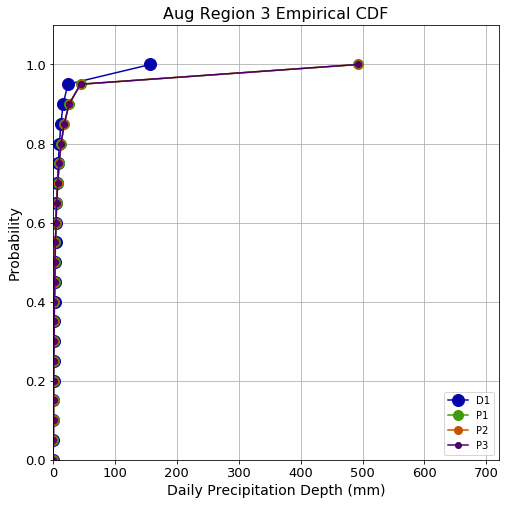

In [855]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Aug3D1Qs, nCompQs, c='xkcd:royal blue', markersize=12, marker='o', 
           linestyle='-', label="D1")
ax11.plot( Aug3P1Qs, nCompQs, c='xkcd:grass green', markersize=10, marker='o', 
           linestyle='-', label="P1")
ax11.plot( Aug3P1Qs, nCompQs, c='xkcd:dark orange', markersize=8, marker='o', 
           linestyle='-', label="P2")
ax11.plot( Aug3P1Qs, nCompQs, c='xkcd:royal purple', markersize=6, marker='o', 
           linestyle='-', label="P3")
ax11.set_title('Aug Region 3 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max3Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

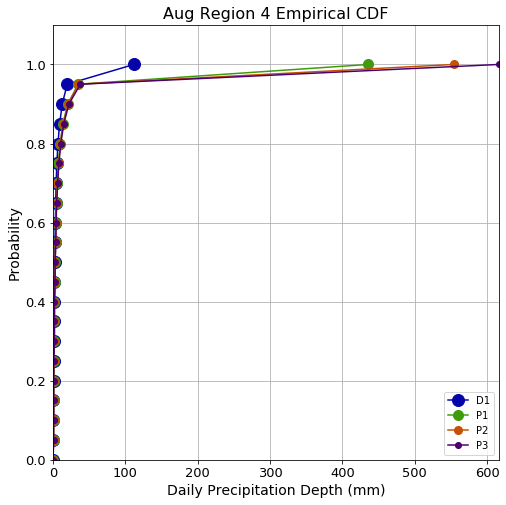

In [856]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Aug4D1Qs, nCompQs, c='xkcd:royal blue', markersize=12, marker='o', 
           linestyle='-', label="D1")
ax11.plot( Aug4P1Qs, nCompQs, c='xkcd:grass green', markersize=10, marker='o', 
           linestyle='-', label="P1")
ax11.plot( Aug4P2Qs, nCompQs, c='xkcd:dark orange', markersize=8, marker='o', 
           linestyle='-', label="P2")
ax11.plot( Aug4P3Qs, nCompQs, c='xkcd:royal purple', markersize=6, marker='o', 
           linestyle='-', label="P3")
ax11.set_title('Aug Region 4 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max4Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### Sep

In [857]:
SepNum = 9

In [858]:
Sep1D1DF = SepD1DF[SepD1DF["PRegion_Id"] == 1].copy()
Sep2D1DF = SepD1DF[SepD1DF["PRegion_Id"] == 2].copy()
Sep3D1DF = SepD1DF[SepD1DF["PRegion_Id"] == 3].copy()
Sep4D1DF = SepD1DF[SepD1DF["PRegion_Id"] == 4].copy()

In [859]:
Sep1P1DF = SepP1DF[SepP1DF["PRegion_Id"] == 1].copy()
Sep2P1DF = SepP1DF[SepP1DF["PRegion_Id"] == 2].copy()
Sep3P1DF = SepP1DF[SepP1DF["PRegion_Id"] == 3].copy()
Sep4P1DF = SepP1DF[SepP1DF["PRegion_Id"] == 4].copy()

In [860]:
Sep1P2DF = SepP2DF[SepP2DF["PRegion_Id"] == 1].copy()
Sep2P2DF = SepP2DF[SepP2DF["PRegion_Id"] == 2].copy()
Sep3P2DF = SepP2DF[SepP2DF["PRegion_Id"] == 3].copy()
Sep4P2DF = SepP2DF[SepP2DF["PRegion_Id"] == 4].copy()

In [861]:
Sep1P3DF = SepP3DF[SepP3DF["PRegion_Id"] == 1].copy()
Sep2P3DF = SepP3DF[SepP3DF["PRegion_Id"] == 2].copy()
Sep3P3DF = SepP3DF[SepP3DF["PRegion_Id"] == 3].copy()
Sep4P3DF = SepP3DF[SepP3DF["PRegion_Id"] == 4].copy()

Bayesian estimates of confidence intervals for mean, variance, and standard deviation of the samples

In [862]:
Sep1D1BSCI = sstats.bayes_mvs( np.array( Sep1D1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Sep2D1BSCI = sstats.bayes_mvs( np.array( Sep2D1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Sep3D1BSCI = sstats.bayes_mvs( np.array( Sep3D1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Sep4D1BSCI = sstats.bayes_mvs( np.array( Sep4D1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )

In [863]:
Sep1P1BSCI = sstats.bayes_mvs( np.array( Sep1P1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Sep2P1BSCI = sstats.bayes_mvs( np.array( Sep2P1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Sep3P1BSCI = sstats.bayes_mvs( np.array( Sep3P1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Sep4P1BSCI = sstats.bayes_mvs( np.array( Sep4P1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )

In [864]:
Sep1P2BSCI = sstats.bayes_mvs( np.array( Sep1P2DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Sep2P2BSCI = sstats.bayes_mvs( np.array( Sep2P2DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Sep3P2BSCI = sstats.bayes_mvs( np.array( Sep3P2DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Sep4P2BSCI = sstats.bayes_mvs( np.array( Sep4P2DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )

In [865]:
Sep1P3BSCI = sstats.bayes_mvs( np.array( Sep1P3DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Sep2P3BSCI = sstats.bayes_mvs( np.array( Sep2P3DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Sep3P3BSCI = sstats.bayes_mvs( np.array( Sep3P3DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Sep4P3BSCI = sstats.bayes_mvs( np.array( Sep4P3DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )

In [866]:
CMonList.append( SepNum )
CZoneList.append( 1 )
SD1Mean.append( Sep1D1BSCI[0][0] )
SD1MeanMinCI.append( Sep1D1BSCI[0][1][0] )
SD1MeanMaxCI.append( Sep1D1BSCI[0][1][1] )
SD1Var.append( Sep1D1BSCI[1][0] )
SD1VarMinCI.append( Sep1D1BSCI[1][1][0] )
SD1VarMaxCI.append( Sep1D1BSCI[1][1][1] )
SD1Std.append( Sep1D1BSCI[2][0] )
SD1StdMinCI.append( Sep1D1BSCI[2][1][0] )
SD1StdMaxCI.append( Sep1D1BSCI[2][1][1] )
CMonList.append( SepNum )
CZoneList.append( 2 )
SD1Mean.append( Sep2D1BSCI[0][0] )
SD1MeanMinCI.append( Sep2D1BSCI[0][1][0] )
SD1MeanMaxCI.append( Sep2D1BSCI[0][1][1] )
SD1Var.append( Sep2D1BSCI[1][0] )
SD1VarMinCI.append( Sep2D1BSCI[1][1][0] )
SD1VarMaxCI.append( Sep2D1BSCI[1][1][1] )
SD1Std.append( Sep2D1BSCI[2][0] )
SD1StdMinCI.append( Sep2D1BSCI[2][1][0] )
SD1StdMaxCI.append( Sep2D1BSCI[2][1][1] )
CMonList.append( SepNum )
CZoneList.append( 3 )
SD1Mean.append( Sep3D1BSCI[0][0] )
SD1MeanMinCI.append( Sep3D1BSCI[0][1][0] )
SD1MeanMaxCI.append( Sep3D1BSCI[0][1][1] )
SD1Var.append( Sep3D1BSCI[1][0] )
SD1VarMinCI.append( Sep3D1BSCI[1][1][0] )
SD1VarMaxCI.append( Sep3D1BSCI[1][1][1] )
SD1Std.append( Sep3D1BSCI[2][0] )
SD1StdMinCI.append( Sep3D1BSCI[2][1][0] )
SD1StdMaxCI.append( Sep3D1BSCI[2][1][1] )
CMonList.append( SepNum )
CZoneList.append( 4 )
SD1Mean.append( Sep4D1BSCI[0][0] )
SD1MeanMinCI.append( Sep4D1BSCI[0][1][0] )
SD1MeanMaxCI.append( Sep4D1BSCI[0][1][1] )
SD1Var.append( Sep4D1BSCI[1][0] )
SD1VarMinCI.append( Sep4D1BSCI[1][1][0] )
SD1VarMaxCI.append( Sep4D1BSCI[1][1][1] )
SD1Std.append( Sep4D1BSCI[2][0] )
SD1StdMinCI.append( Sep4D1BSCI[2][1][0] )
SD1StdMaxCI.append( Sep4D1BSCI[2][1][1] )

In [867]:
SP1Mean.append( Sep1P1BSCI[0][0] )
SP1MeanMinCI.append( Sep1P1BSCI[0][1][0] )
SP1MeanMaxCI.append( Sep1P1BSCI[0][1][1] )
SP1Var.append( Sep1P1BSCI[1][0] )
SP1VarMinCI.append( Sep1P1BSCI[1][1][0] )
SP1VarMaxCI.append( Sep1P1BSCI[1][1][1] )
SP1Std.append( Sep1P1BSCI[2][0] )
SP1StdMinCI.append( Sep1P1BSCI[2][1][0] )
SP1StdMaxCI.append( Sep1P1BSCI[2][1][1] )
SP1Mean.append( Sep2P1BSCI[0][0] )
SP1MeanMinCI.append( Sep2P1BSCI[0][1][0] )
SP1MeanMaxCI.append( Sep2P1BSCI[0][1][1] )
SP1Var.append( Sep2P1BSCI[1][0] )
SP1VarMinCI.append( Sep2P1BSCI[1][1][0] )
SP1VarMaxCI.append( Sep2P1BSCI[1][1][1] )
SP1Std.append( Sep2P1BSCI[2][0] )
SP1StdMinCI.append( Sep2P1BSCI[2][1][0] )
SP1StdMaxCI.append( Sep2P1BSCI[2][1][1] )
SP1Mean.append( Sep3P1BSCI[0][0] )
SP1MeanMinCI.append( Sep3P1BSCI[0][1][0] )
SP1MeanMaxCI.append( Sep3P1BSCI[0][1][1] )
SP1Var.append( Sep3P1BSCI[1][0] )
SP1VarMinCI.append( Sep3P1BSCI[1][1][0] )
SP1VarMaxCI.append( Sep3P1BSCI[1][1][1] )
SP1Std.append( Sep3P1BSCI[2][0] )
SP1StdMinCI.append( Sep3P1BSCI[2][1][0] )
SP1StdMaxCI.append( Sep3P1BSCI[2][1][1] )
SP1Mean.append( Sep4P1BSCI[0][0] )
SP1MeanMinCI.append( Sep4P1BSCI[0][1][0] )
SP1MeanMaxCI.append( Sep4P1BSCI[0][1][1] )
SP1Var.append( Sep4P1BSCI[1][0] )
SP1VarMinCI.append( Sep4P1BSCI[1][1][0] )
SP1VarMaxCI.append( Sep4P1BSCI[1][1][1] )
SP1Std.append( Sep4P1BSCI[2][0] )
SP1StdMinCI.append( Sep4P1BSCI[2][1][0] )
SP1StdMaxCI.append( Sep4P1BSCI[2][1][1] )

In [868]:
SP2Mean.append( Sep1P2BSCI[0][0] )
SP2MeanMinCI.append( Sep1P2BSCI[0][1][0] )
SP2MeanMaxCI.append( Sep1P2BSCI[0][1][1] )
SP2Var.append( Sep1P2BSCI[1][0] )
SP2VarMinCI.append( Sep1P2BSCI[1][1][0] )
SP2VarMaxCI.append( Sep1P2BSCI[1][1][1] )
SP2Std.append( Sep1P2BSCI[2][0] )
SP2StdMinCI.append( Sep1P2BSCI[2][1][0] )
SP2StdMaxCI.append( Sep1P2BSCI[2][1][1] )
SP2Mean.append( Sep2P2BSCI[0][0] )
SP2MeanMinCI.append( Sep2P2BSCI[0][1][0] )
SP2MeanMaxCI.append( Sep2P2BSCI[0][1][1] )
SP2Var.append( Sep2P2BSCI[1][0] )
SP2VarMinCI.append( Sep2P2BSCI[1][1][0] )
SP2VarMaxCI.append( Sep2P2BSCI[1][1][1] )
SP2Std.append( Sep2P2BSCI[2][0] )
SP2StdMinCI.append( Sep2P2BSCI[2][1][0] )
SP2StdMaxCI.append( Sep2P2BSCI[2][1][1] )
SP2Mean.append( Sep3P2BSCI[0][0] )
SP2MeanMinCI.append( Sep3P2BSCI[0][1][0] )
SP2MeanMaxCI.append( Sep3P2BSCI[0][1][1] )
SP2Var.append( Sep3P2BSCI[1][0] )
SP2VarMinCI.append( Sep3P2BSCI[1][1][0] )
SP2VarMaxCI.append( Sep3P2BSCI[1][1][1] )
SP2Std.append( Sep3P2BSCI[2][0] )
SP2StdMinCI.append( Sep3P2BSCI[2][1][0] )
SP2StdMaxCI.append( Sep3P2BSCI[2][1][1] )
SP2Mean.append( Sep4P2BSCI[0][0] )
SP2MeanMinCI.append( Sep4P2BSCI[0][1][0] )
SP2MeanMaxCI.append( Sep4P2BSCI[0][1][1] )
SP2Var.append( Sep4P2BSCI[1][0] )
SP2VarMinCI.append( Sep4P2BSCI[1][1][0] )
SP2VarMaxCI.append( Sep4P2BSCI[1][1][1] )
SP2Std.append( Sep4P2BSCI[2][0] )
SP2StdMinCI.append( Sep4P2BSCI[2][1][0] )
SP2StdMaxCI.append( Sep4P2BSCI[2][1][1] )

In [869]:
SP3Mean.append( Sep1P3BSCI[0][0] )
SP3MeanMinCI.append( Sep1P3BSCI[0][1][0] )
SP3MeanMaxCI.append( Sep1P3BSCI[0][1][1] )
SP3Var.append( Sep1P3BSCI[1][0] )
SP3VarMinCI.append( Sep1P3BSCI[1][1][0] )
SP3VarMaxCI.append( Sep1P3BSCI[1][1][1] )
SP3Std.append( Sep1P3BSCI[2][0] )
SP3StdMinCI.append( Sep1P3BSCI[2][1][0] )
SP3StdMaxCI.append( Sep1P3BSCI[2][1][1] )
SP3Mean.append( Sep2P3BSCI[0][0] )
SP3MeanMinCI.append( Sep2P3BSCI[0][1][0] )
SP3MeanMaxCI.append( Sep2P3BSCI[0][1][1] )
SP3Var.append( Sep2P3BSCI[1][0] )
SP3VarMinCI.append( Sep2P3BSCI[1][1][0] )
SP3VarMaxCI.append( Sep2P3BSCI[1][1][1] )
SP3Std.append( Sep2P3BSCI[2][0] )
SP3StdMinCI.append( Sep2P3BSCI[2][1][0] )
SP3StdMaxCI.append( Sep2P3BSCI[2][1][1] )
SP3Mean.append( Sep3P3BSCI[0][0] )
SP3MeanMinCI.append( Sep3P3BSCI[0][1][0] )
SP3MeanMaxCI.append( Sep3P3BSCI[0][1][1] )
SP3Var.append( Sep3P3BSCI[1][0] )
SP3VarMinCI.append( Sep3P3BSCI[1][1][0] )
SP3VarMaxCI.append( Sep3P3BSCI[1][1][1] )
SP3Std.append( Sep3P3BSCI[2][0] )
SP3StdMinCI.append( Sep3P3BSCI[2][1][0] )
SP3StdMaxCI.append( Sep3P3BSCI[2][1][1] )
SP3Mean.append( Sep4P3BSCI[0][0] )
SP3MeanMinCI.append( Sep4P3BSCI[0][1][0] )
SP3MeanMaxCI.append( Sep4P3BSCI[0][1][1] )
SP3Var.append( Sep4P3BSCI[1][0] )
SP3VarMinCI.append( Sep4P3BSCI[1][1][0] )
SP3VarMaxCI.append( Sep4P3BSCI[1][1][1] )
SP3Std.append( Sep4P3BSCI[2][0] )
SP3StdMinCI.append( Sep4P3BSCI[2][1][0] )
SP3StdMaxCI.append( Sep4P3BSCI[2][1][1] )

#### T-Test

T-Test for the means of two independent samples. Two-sided test for the null hypothesis that 2 independent samples hae identical average values. Test assumes that the populations have identical variances.

If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [870]:
Sep1TTD1toP1 = sstats.ttest_ind( np.array( Sep1D1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Sep1P1DF["Precip_mm"], dtype=np.int32 ) )

In [871]:
Sep1TTD1toP1Pval = Sep1TTD1toP1[1]
print("Region 1, P-Value for LOCA D1 and P1 from same population is: %g" % Sep1TTD1toP1Pval )

Region 1, P-Value for LOCA D1 and P1 from same population is: 0


In [872]:
Sep2TTD1toP1 = sstats.ttest_ind( np.array( Sep2D1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Sep2P1DF["Precip_mm"], dtype=np.int32 ) )

In [873]:
Sep2TTD1toP1Pval = Sep2TTD1toP1[1]
print("Region 2, P-Value for LOCA D1 and P1 from same population is: %g" % Sep2TTD1toP1Pval )

Region 2, P-Value for LOCA D1 and P1 from same population is: 0


In [874]:
Sep3TTD1toP1 = sstats.ttest_ind( np.array( Sep3D1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Sep3P1DF["Precip_mm"], dtype=np.int32 ) )

In [875]:
Sep3TTD1toP1Pval = Sep3TTD1toP1[1]
print("Region 3, P-Value for LOCA D1 and P1 from same population is: %g" % Sep3TTD1toP1Pval )

Region 3, P-Value for LOCA D1 and P1 from same population is: 0


In [876]:
Sep4TTD1toP1 = sstats.ttest_ind( np.array( Sep4D1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Sep4P1DF["Precip_mm"], dtype=np.int32 ) )

In [877]:
Sep4TTD1toP1Pval = Sep4TTD1toP1[1]
print("Region 4, P-Value for LOCA D1 and P1 from same population is: %g" % Sep4TTD1toP1Pval )

Region 4, P-Value for LOCA D1 and P1 from same population is: 0


In [878]:
Sep1TTP1toP2 = sstats.ttest_ind( np.array( Sep1P1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Sep1P2DF["Precip_mm"], dtype=np.int32 ) )

In [879]:
Sep1TTP1toP2Pval = Sep1TTP1toP2[1]
print("Region 1, P-Value for LOCA P1 and P2 from same population is: %g" % Sep1TTP1toP2Pval )

Region 1, P-Value for LOCA P1 and P2 from same population is: 0.000144997


In [880]:
Sep2TTP1toP2 = sstats.ttest_ind( np.array( Sep2P1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Sep2P2DF["Precip_mm"], dtype=np.int32 ) )

In [881]:
Sep2TTP1toP2Pval = Sep2TTP1toP2[1]
print("Region 2, P-Value for LOCA P1 and P2 from same population is: %g" % Sep2TTP1toP2Pval )

Region 2, P-Value for LOCA P1 and P2 from same population is: 1.14707e-13


In [882]:
Sep3TTP1toP2 = sstats.ttest_ind( np.array( Sep3P1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Sep3P2DF["Precip_mm"], dtype=np.int32 ) )

In [883]:
Sep3TTP1toP2Pval = Sep3TTP1toP2[1]
print("Region 3, P-Value for LOCA P1 and P2 from same population is: %g" % Sep3TTP1toP2Pval )

Region 3, P-Value for LOCA P1 and P2 from same population is: 1.35112e-07


In [884]:
Sep4TTP1toP2 = sstats.ttest_ind( np.array( Sep4P1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Sep4P2DF["Precip_mm"], dtype=np.int32 ) )

In [885]:
Sep4TTP1toP2Pval = Sep4TTP1toP2[1]
print("Region 4, P-Value for LOCA P1 and P2 from same population is: %g" % Sep4TTP1toP2Pval )

Region 4, P-Value for LOCA P1 and P2 from same population is: 1.16245e-12


In [886]:
Sep1TTP2toP3 = sstats.ttest_ind( np.array( Sep1P2DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Sep1P3DF["Precip_mm"], dtype=np.int32 ) )

In [887]:
Sep1TTP2toP3Pval = Sep1TTP2toP3[1]
print("Region 1, P-Value for LOCA P2 and P3 from same population is: %g" % Sep1TTP2toP3Pval )

Region 1, P-Value for LOCA P2 and P3 from same population is: 8.72656e-08


In [888]:
Sep2TTP2toP3 = sstats.ttest_ind( np.array( Sep2P2DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Sep2P3DF["Precip_mm"], dtype=np.int32 ) )

In [889]:
Sep2TTP2toP3Pval = Sep2TTP2toP3[1]
print("Region 2, P-Value for LOCA P2 and P3 from same population is: %g" % Sep2TTP2toP3Pval )

Region 2, P-Value for LOCA P2 and P3 from same population is: 1.73295e-30


In [890]:
Sep3TTP2toP3 = sstats.ttest_ind( np.array( Sep3P2DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Sep3P3DF["Precip_mm"], dtype=np.int32 ) )

In [891]:
Sep3TTP2toP3Pval = Sep3TTP2toP3[1]
print("Region 3, P-Value for LOCA P2 and P3 from same population is: %g" % Sep3TTP2toP3Pval )

Region 3, P-Value for LOCA P2 and P3 from same population is: 2.15292e-11


In [892]:
Sep4TTP2toP3 = sstats.ttest_ind( np.array( Sep4P2DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Sep4P3DF["Precip_mm"], dtype=np.int32 ) )

In [893]:
Sep4TTP2toP3Pval = Sep4TTP2toP3[1]
print("Region 4, P-Value for LOCA P2 and P3 from same population is: %g" % Sep4TTP2toP3Pval )

Region 4, P-Value for LOCA P2 and P3 from same population is: 2.01939e-17


#### Mann-Whitney Rank Test

Nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample. This test can be used to investigate whether two independent samples were selected from populations having the same distribution.

Null hypothesis, $H_{0}$, is that the distributions of both populations are equal.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of being from the same distribution.

In [894]:
Sep1MWUD1toP1 = sstats.mannwhitneyu( np.array( Sep1D1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Sep1P1DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [895]:
Sep1MWUD1toP1Pval = Sep1MWUD1toP1[1]
print("Region 1, P-Value for LOCA D1 and P1 from same distribution is: %g" % Sep1MWUD1toP1Pval )

Region 1, P-Value for LOCA D1 and P1 from same distribution is: 0


In [896]:
Sep2MWUD1toP1 = sstats.mannwhitneyu( np.array( Sep2D1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Sep2P1DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [897]:
Sep2MWUD1toP1Pval = Sep2MWUD1toP1[1]
print("Region 2, P-Value for LOCA D1 and P1 from same distribution is: %g" % Sep2MWUD1toP1Pval )

Region 2, P-Value for LOCA D1 and P1 from same distribution is: 0


In [898]:
Sep3MWUD1toP1 = sstats.mannwhitneyu( np.array( Sep3D1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Sep3P1DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [899]:
Sep3MWUD1toP1Pval = Sep3MWUD1toP1[1]
print("Region 3, P-Value for LOCA D1 and P1 from same distribution is: %g" % Sep3MWUD1toP1Pval )

Region 3, P-Value for LOCA D1 and P1 from same distribution is: 0


In [900]:
Sep4MWUD1toP1 = sstats.mannwhitneyu( np.array( Sep4D1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Sep4P1DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [901]:
Sep4MWUD1toP1Pval = Sep4MWUD1toP1[1]
print("Region 4, P-Value for LOCA D1 and P1 from same distribution is: %g" % Sep4MWUD1toP1Pval )

Region 4, P-Value for LOCA D1 and P1 from same distribution is: 0


In [902]:
Sep1MWUP1toP2 = sstats.mannwhitneyu( np.array( Sep1P1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Sep1P2DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [903]:
Sep1MWUP1toP2Pval = Sep1MWUP1toP2[1]
print("Region 1, P-Value for LOCA P1 and P2 from same distribution is: %g" % Sep1MWUP1toP2Pval )

Region 1, P-Value for LOCA P1 and P2 from same distribution is: 1.79728e-05


In [904]:
Sep2MWUP1toP2 = sstats.mannwhitneyu( np.array( Sep2P1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Sep2P2DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [905]:
Sep2MWUP1toP2Pval = Sep2MWUP1toP2[1]
print("Region 2, P-Value for LOCA P1 and P2 from same distribution is: %g" % Sep2MWUP1toP2Pval )

Region 2, P-Value for LOCA P1 and P2 from same distribution is: 1.21322e-05


In [906]:
Sep3MWUP1toP2 = sstats.mannwhitneyu( np.array( Sep3P1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Sep3P2DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [907]:
Sep3MWUP1toP2Pval = Sep3MWUP1toP2[1]
print("Region 3, P-Value for LOCA P1 and P2 from same distribution is: %g" % Sep3MWUP1toP2Pval )

Region 3, P-Value for LOCA P1 and P2 from same distribution is: 0.936399


In [908]:
Sep4MWUP1toP2 = sstats.mannwhitneyu( np.array( Sep4P1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Sep4P2DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [909]:
Sep4MWUP1toP2Pval = Sep4MWUP1toP2[1]
print("Region 4, P-Value for LOCA P1 and P2 from same distribution is: %g" % Sep4MWUP1toP2Pval )

Region 4, P-Value for LOCA P1 and P2 from same distribution is: 0.00182456


In [910]:
Sep1MWUP2toP3 = sstats.mannwhitneyu( np.array( Sep1P2DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Sep1P3DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [911]:
Sep1MWUP2toP3Pval = Sep1MWUP2toP3[1]
print("Region 1, P-Value for LOCA P2 and P3 from same distribution is: %g" % Sep1MWUP2toP3Pval )

Region 1, P-Value for LOCA P2 and P3 from same distribution is: 7.23649e-06


In [912]:
Sep2MWUP2toP3 = sstats.mannwhitneyu( np.array( Sep2P2DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Sep2P3DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [913]:
Sep2MWUP2toP3Pval = Sep2MWUP2toP3[1]
print("Region 2, P-Value for LOCA P2 and P3 from same distribution is: %g" % Sep2MWUP2toP3Pval )

Region 2, P-Value for LOCA P2 and P3 from same distribution is: 1.87266e-21


In [914]:
Sep3MWUP2toP3 = sstats.mannwhitneyu( np.array( Sep3P2DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Sep3P3DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [915]:
Sep3MWUP2toP3Pval = Sep3MWUP2toP3[1]
print("Region 3, P-Value for LOCA P2 and P3 from same distribution is: %g" % Sep3MWUP2toP3Pval )

Region 3, P-Value for LOCA P2 and P3 from same distribution is: 6.7057e-31


In [916]:
Sep4MWUP2toP3 = sstats.mannwhitneyu( np.array( Sep4P2DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Sep4P3DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [917]:
Sep4MWUP2toP3Pval = Sep4MWUP2toP3[1]
print("Region 4, P-Value for LOCA P2 and P3 from same distribution is: %g" % Sep4MWUP2toP3Pval )

Region 4, P-Value for LOCA P2 and P3 from same distribution is: 3.31484e-28


#### Kruskal-Wallis Test

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of the same population median.

In [918]:
Sep1KWD1toP1 = sstats.kruskal( np.array( Sep1D1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Sep1P1DF["Precip_mm"], dtype=np.int32 ) )

In [919]:
Sep1KWD1toP1Pval = Sep1KWD1toP1[1]
print("Region 1, P-Value for LOCA D1 and P1 have the same median is: %g" % Sep1KWD1toP1Pval )

Region 1, P-Value for LOCA D1 and P1 have the same median is: 1


In [920]:
Sep2KWD1toP1 = sstats.kruskal( np.array( Sep2D1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Sep2P1DF["Precip_mm"], dtype=np.int32 ) )

In [921]:
Sep2KWD1toP1Pval = Sep2KWD1toP1[1]
print("Region 2, P-Value for LOCA D1 and P1 have the same median is: %g" % Sep2KWD1toP1Pval )

Region 2, P-Value for LOCA D1 and P1 have the same median is: 0


In [922]:
Sep3KWD1toP1 = sstats.kruskal( np.array( Sep3D1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Sep3P1DF["Precip_mm"], dtype=np.int32 ) )

In [923]:
Sep3KWD1toP1Pval = Sep3KWD1toP1[1]
print("Region 3, P-Value for LOCA D1 and P1 have the same median is: %g" % Sep3KWD1toP1Pval )

Region 3, P-Value for LOCA D1 and P1 have the same median is: 0


In [924]:
Sep4KWD1toP1 = sstats.kruskal( np.array( Sep4D1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Sep4P1DF["Precip_mm"], dtype=np.int32 ) )

In [925]:
Sep4KWD1toP1Pval = Sep4KWD1toP1[1]
print("Region 4, P-Value for LOCA D1 and P1 have the same median is: %g" % Sep4KWD1toP1Pval )

Region 4, P-Value for LOCA D1 and P1 have the same median is: 0


In [926]:
Sep1KWP1toP2 = sstats.kruskal( np.array( Sep1P1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Sep1P2DF["Precip_mm"], dtype=np.int32 ) )

In [927]:
Sep1KWP1toP2Pval = Sep1KWP1toP2[1]
print("Region 1, P-Value for LOCA P1 and P2 have the same median is: %g" % Sep1KWP1toP2Pval )

Region 1, P-Value for LOCA P1 and P2 have the same median is: 1


In [928]:
Sep2KWP1toP2 = sstats.kruskal( np.array( Sep2P1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Sep2P2DF["Precip_mm"], dtype=np.int32 ) )

In [929]:
Sep2KWP1toP2Pval = Sep2KWP1toP2[1]
print("Region 2, P-Value for LOCA P1 and P2 have the same median is: %g" % Sep2KWP1toP2Pval )

Region 2, P-Value for LOCA P1 and P2 have the same median is: 0


In [930]:
Sep3KWP1toP2 = sstats.kruskal( np.array( Sep3P1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Sep3P2DF["Precip_mm"], dtype=np.int32 ) )

In [931]:
Sep3KWP1toP2Pval = Sep3KWP1toP2[1]
print("Region 3, P-Value for LOCA P1 and P2 have the same median is: %g" % Sep3KWP1toP2Pval )

Region 3, P-Value for LOCA P1 and P2 have the same median is: 0


In [932]:
Sep4KWP1toP2 = sstats.kruskal( np.array( Sep4P1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Sep4P2DF["Precip_mm"], dtype=np.int32 ) )

In [933]:
Sep4KWP1toP2Pval = Sep4KWP1toP2[1]
print("Region 4, P-Value for LOCA P1 and P2 have the same median is: %g" % Sep4KWP1toP2Pval )

Region 4, P-Value for LOCA P1 and P2 have the same median is: 0


In [934]:
Sep1KWP2toP3 = sstats.kruskal( np.array( Sep1P2DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Sep1P3DF["Precip_mm"], dtype=np.int32 ) )

In [935]:
Sep1KWP2toP3Pval = Sep1KWP2toP3[1]
print("Region 1, P-Value for LOCA P2 and P3 have the same median is: %g" % Sep1KWP2toP3Pval )

Region 1, P-Value for LOCA P2 and P3 have the same median is: 1


In [936]:
Sep2KWP2toP3 = sstats.kruskal( np.array( Sep2P2DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Sep2P3DF["Precip_mm"], dtype=np.int32 ) )

In [937]:
Sep2KWP2toP3Pval = Sep2KWP2toP3[1]
print("Region 2, P-Value for LOCA P2 and P3 have the same median is: %g" % Sep2KWP2toP3Pval )

Region 2, P-Value for LOCA P2 and P3 have the same median is: 1


In [938]:
Sep3KWP2toP3 = sstats.kruskal( np.array( Sep3P2DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Sep3P3DF["Precip_mm"], dtype=np.int32 ) )

In [939]:
Sep3KWP2toP3Pval = Sep3KWP2toP3[1]
print("Region 3, P-Value for LOCA P2 and P3 have the same median is: %g" % Sep3KWP2toP3Pval )

Region 3, P-Value for LOCA P2 and P3 have the same median is: 0


In [940]:
Sep4KWP2toP3 = sstats.kruskal( np.array( Sep4P2DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Sep4P3DF["Precip_mm"], dtype=np.int32 ) )

In [941]:
Sep4KWP2toP3Pval = Sep4KWP2toP3[1]
print("Region 4, P-Value for LOCA P2 and P3 have the same median is: %g" % Sep4KWP2toP3Pval )

Region 4, P-Value for LOCA P2 and P3 have the same median is: 0


In [942]:
Sep4P3DF["Precip_mm"].median(), Sep4P2DF["Precip_mm"].median(), Sep4P1DF["Precip_mm"].median(), Sep4D1DF["Precip_mm"].median()

(4.0, 4.0, 3.958545684814453, 3.0165929794311523)

#### Plots

In [943]:
Sep1D1Qs = Sep1D1DF["Precip_mm"].quantile(q=nCompQs)
Sep1P1Qs = Sep1P1DF["Precip_mm"].quantile(q=nCompQs)
Sep1P2Qs = Sep1P2DF["Precip_mm"].quantile(q=nCompQs)
Sep1P3Qs = Sep1P3DF["Precip_mm"].quantile(q=nCompQs)
Sep2D1Qs = Sep2D1DF["Precip_mm"].quantile(q=nCompQs)
Sep2P1Qs = Sep2P1DF["Precip_mm"].quantile(q=nCompQs)
Sep2P2Qs = Sep2P2DF["Precip_mm"].quantile(q=nCompQs)
Sep2P3Qs = Sep2P3DF["Precip_mm"].quantile(q=nCompQs)
Sep3D1Qs = Sep3D1DF["Precip_mm"].quantile(q=nCompQs)
Sep3P1Qs = Sep3P1DF["Precip_mm"].quantile(q=nCompQs)
Sep3P2Qs = Sep3P2DF["Precip_mm"].quantile(q=nCompQs)
Sep3P3Qs = Sep3P3DF["Precip_mm"].quantile(q=nCompQs)
Sep4D1Qs = Sep4D1DF["Precip_mm"].quantile(q=nCompQs)
Sep4P1Qs = Sep4P1DF["Precip_mm"].quantile(q=nCompQs)
Sep4P2Qs = Sep4P2DF["Precip_mm"].quantile(q=nCompQs)
Sep4P3Qs = Sep4P3DF["Precip_mm"].quantile(q=nCompQs)

In [944]:
max1Qs = max( Sep1D1Qs.max(), Sep1P1Qs.max(), Sep1P2Qs.max(), Sep1P3Qs.max() )
max1Qs = round(max1Qs) + 2.0
max1Qs

534.0

In [945]:
max2Qs = max( Sep2D1Qs.max(), Sep2P1Qs.max(), Sep2P2Qs.max(), Sep2P3Qs.max() )
max2Qs = round(max2Qs) + 4.0
max2Qs

552.0

In [946]:
max3Qs = max( Sep3D1Qs.max(), Sep3P1Qs.max(), Sep3P2Qs.max(), Sep3P3Qs.max() )
max3Qs = round(max3Qs) + 1.0
max3Qs

532.0

In [947]:
max4Qs = max( Sep4D1Qs.max(), Sep4P1Qs.max(), Sep4P2Qs.max(), Sep4P3Qs.max() )
max4Qs = round(max4Qs) + 1.0
max4Qs

536.0

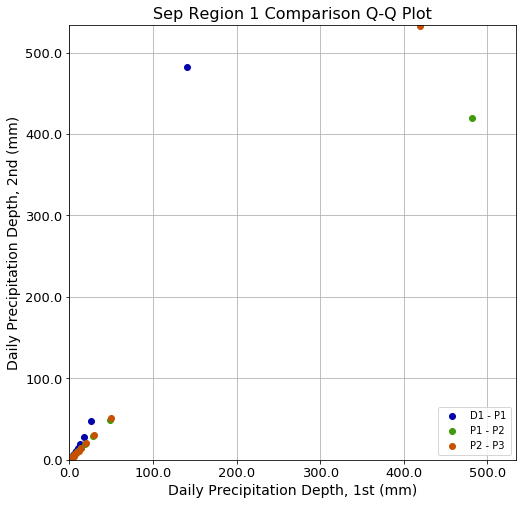

In [948]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Sep1D1Qs, Sep1P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Sep1P1Qs, Sep1P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Sep1P2Qs, Sep1P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.set_title('Sep Region 1 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max1Qs) )
ax11.set_ylim( (0.0, max1Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

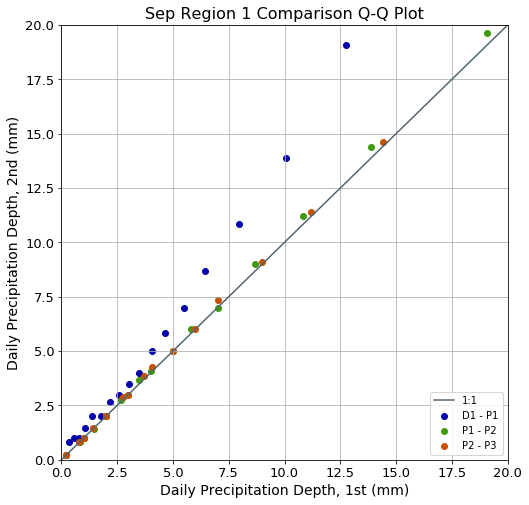

In [949]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Sep1D1Qs, Sep1P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Sep1P1Qs, Sep1P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Sep1P2Qs, Sep1P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.plot( [0.0, max1Qs], [0.0, max1Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Sep Region 1 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 20.0) )
ax11.set_ylim( (0.0, 20.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

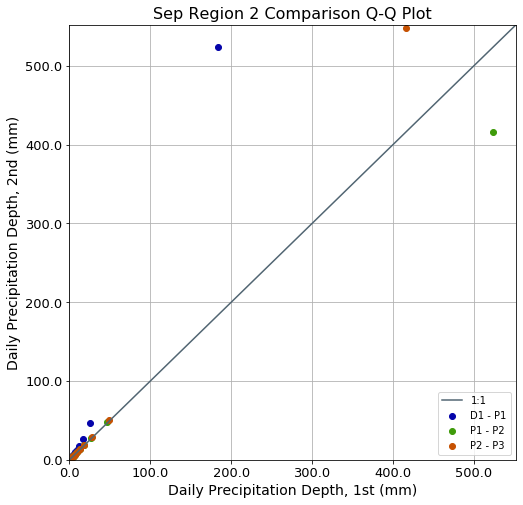

In [950]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Sep2D1Qs, Sep2P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Sep2P1Qs, Sep2P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Sep2P2Qs, Sep2P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.plot( [0.0, max2Qs], [0.0, max2Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Sep Region 2 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max2Qs) )
ax11.set_ylim( (0.0, max2Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

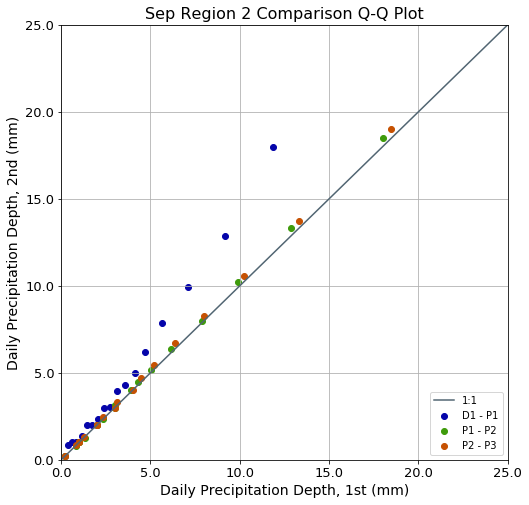

In [951]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Sep2D1Qs, Sep2P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Sep2P1Qs, Sep2P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Sep2P2Qs, Sep2P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.plot( [0.0, max2Qs], [0.0, max2Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Sep Region 2 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

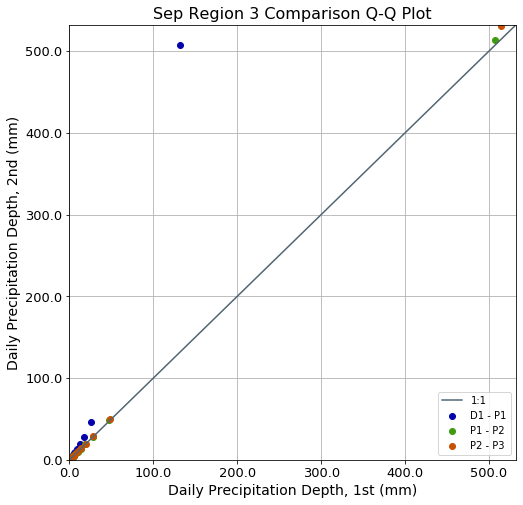

In [952]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Sep3D1Qs, Sep3P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Sep3P1Qs, Sep3P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Sep3P2Qs, Sep3P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.plot( [0.0, max3Qs], [0.0, max3Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Sep Region 3 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max3Qs) )
ax11.set_ylim( (0.0, max3Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

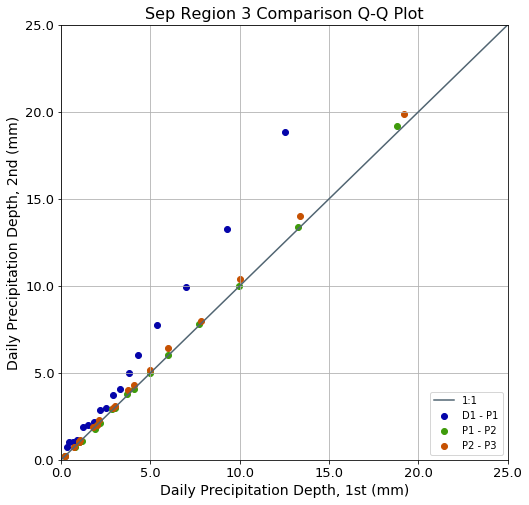

In [953]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Sep3D1Qs, Sep3P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Sep3P1Qs, Sep3P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Sep3P2Qs, Sep3P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.plot( [0.0, max3Qs], [0.0, max3Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Sep Region 3 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

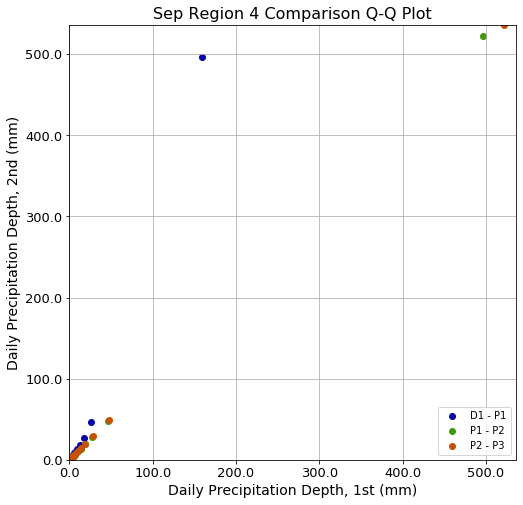

In [954]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Sep4D1Qs, Sep4P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Sep4P1Qs, Sep4P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Sep4P2Qs, Sep4P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.set_title('Sep Region 4 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max4Qs) )
ax11.set_ylim( (0.0, max4Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

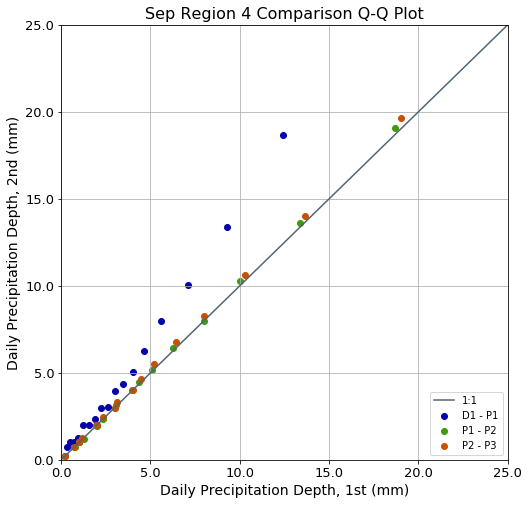

In [955]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Sep4D1Qs, Sep4P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Sep4P1Qs, Sep4P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Sep4P2Qs, Sep4P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.plot( [0.0, max4Qs], [0.0, max4Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Sep Region 4 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

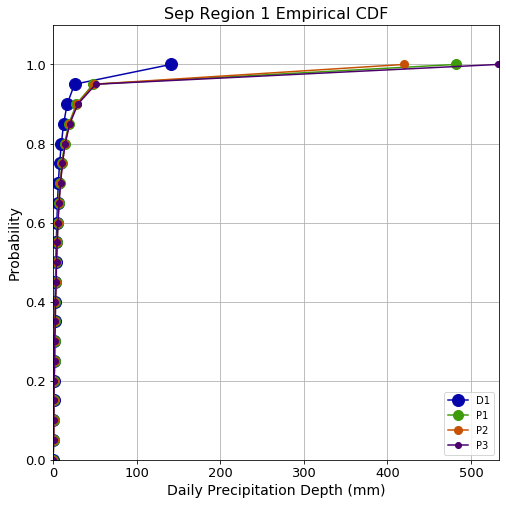

In [956]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Sep1D1Qs, nCompQs, c='xkcd:royal blue', markersize=12, marker='o', 
           linestyle='-', label="D1")
ax11.plot( Sep1P1Qs, nCompQs, c='xkcd:grass green', markersize=10, marker='o', 
           linestyle='-', label="P1")
ax11.plot( Sep1P2Qs, nCompQs, c='xkcd:dark orange', markersize=8, marker='o', 
           linestyle='-', label="P2")
ax11.plot( Sep1P3Qs, nCompQs, c='xkcd:royal purple', markersize=6, marker='o', 
           linestyle='-', label="P3")
ax11.set_title('Sep Region 1 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max1Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

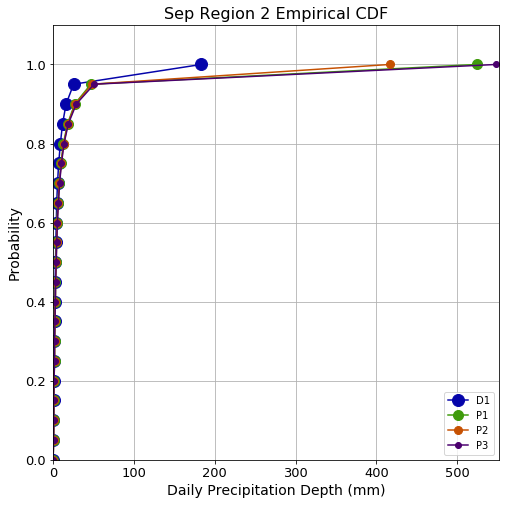

In [957]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Sep2D1Qs, nCompQs, c='xkcd:royal blue', markersize=12, marker='o', 
           linestyle='-', label="D1")
ax11.plot( Sep2P1Qs, nCompQs, c='xkcd:grass green', markersize=10, marker='o', 
           linestyle='-', label="P1")
ax11.plot( Sep2P2Qs, nCompQs, c='xkcd:dark orange', markersize=8, marker='o', 
           linestyle='-', label="P2")
ax11.plot( Sep2P3Qs, nCompQs, c='xkcd:royal purple', markersize=6, marker='o', 
           linestyle='-', label="P3")
ax11.set_title('Sep Region 2 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max2Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

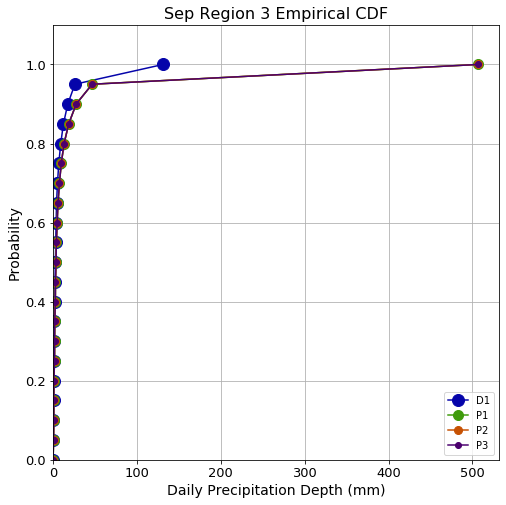

In [958]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Sep3D1Qs, nCompQs, c='xkcd:royal blue', markersize=12, marker='o', 
           linestyle='-', label="D1")
ax11.plot( Sep3P1Qs, nCompQs, c='xkcd:grass green', markersize=10, marker='o', 
           linestyle='-', label="P1")
ax11.plot( Sep3P1Qs, nCompQs, c='xkcd:dark orange', markersize=8, marker='o', 
           linestyle='-', label="P2")
ax11.plot( Sep3P1Qs, nCompQs, c='xkcd:royal purple', markersize=6, marker='o', 
           linestyle='-', label="P3")
ax11.set_title('Sep Region 3 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max3Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

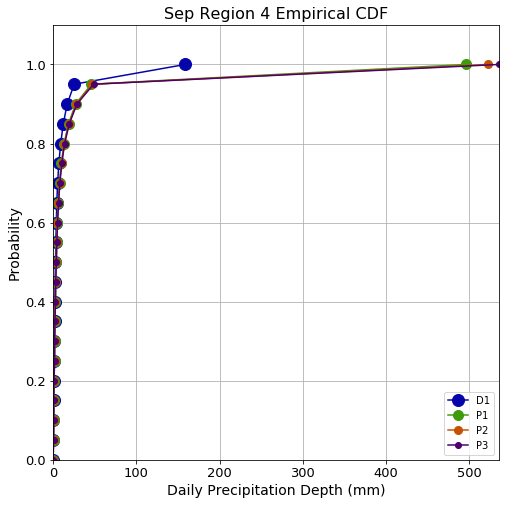

In [959]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Sep4D1Qs, nCompQs, c='xkcd:royal blue', markersize=12, marker='o', 
           linestyle='-', label="D1")
ax11.plot( Sep4P1Qs, nCompQs, c='xkcd:grass green', markersize=10, marker='o', 
           linestyle='-', label="P1")
ax11.plot( Sep4P2Qs, nCompQs, c='xkcd:dark orange', markersize=8, marker='o', 
           linestyle='-', label="P2")
ax11.plot( Sep4P3Qs, nCompQs, c='xkcd:royal purple', markersize=6, marker='o', 
           linestyle='-', label="P3")
ax11.set_title('Sep Region 4 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max4Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### Oct

In [960]:
OctNum = 10

In [961]:
Oct1D1DF = OctD1DF[OctD1DF["PRegion_Id"] == 1].copy()
Oct2D1DF = OctD1DF[OctD1DF["PRegion_Id"] == 2].copy()
Oct3D1DF = OctD1DF[OctD1DF["PRegion_Id"] == 3].copy()
Oct4D1DF = OctD1DF[OctD1DF["PRegion_Id"] == 4].copy()

In [962]:
Oct1P1DF = OctP1DF[OctP1DF["PRegion_Id"] == 1].copy()
Oct2P1DF = OctP1DF[OctP1DF["PRegion_Id"] == 2].copy()
Oct3P1DF = OctP1DF[OctP1DF["PRegion_Id"] == 3].copy()
Oct4P1DF = OctP1DF[OctP1DF["PRegion_Id"] == 4].copy()

In [963]:
Oct1P2DF = OctP2DF[OctP2DF["PRegion_Id"] == 1].copy()
Oct2P2DF = OctP2DF[OctP2DF["PRegion_Id"] == 2].copy()
Oct3P2DF = OctP2DF[OctP2DF["PRegion_Id"] == 3].copy()
Oct4P2DF = OctP2DF[OctP2DF["PRegion_Id"] == 4].copy()

In [964]:
Oct1P3DF = OctP3DF[OctP3DF["PRegion_Id"] == 1].copy()
Oct2P3DF = OctP3DF[OctP3DF["PRegion_Id"] == 2].copy()
Oct3P3DF = OctP3DF[OctP3DF["PRegion_Id"] == 3].copy()
Oct4P3DF = OctP3DF[OctP3DF["PRegion_Id"] == 4].copy()

Bayesian estimates of confidence intervals for mean, variance, and standard deviation of the samples

In [965]:
Oct1D1BSCI = sstats.bayes_mvs( np.array( Oct1D1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Oct2D1BSCI = sstats.bayes_mvs( np.array( Oct2D1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Oct3D1BSCI = sstats.bayes_mvs( np.array( Oct3D1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Oct4D1BSCI = sstats.bayes_mvs( np.array( Oct4D1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )

In [966]:
Oct1P1BSCI = sstats.bayes_mvs( np.array( Oct1P1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Oct2P1BSCI = sstats.bayes_mvs( np.array( Oct2P1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Oct3P1BSCI = sstats.bayes_mvs( np.array( Oct3P1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Oct4P1BSCI = sstats.bayes_mvs( np.array( Oct4P1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )

In [967]:
Oct1P2BSCI = sstats.bayes_mvs( np.array( Oct1P2DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Oct2P2BSCI = sstats.bayes_mvs( np.array( Oct2P2DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Oct3P2BSCI = sstats.bayes_mvs( np.array( Oct3P2DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Oct4P2BSCI = sstats.bayes_mvs( np.array( Oct4P2DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )

In [968]:
Oct1P3BSCI = sstats.bayes_mvs( np.array( Oct1P3DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Oct2P3BSCI = sstats.bayes_mvs( np.array( Oct2P3DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Oct3P3BSCI = sstats.bayes_mvs( np.array( Oct3P3DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Oct4P3BSCI = sstats.bayes_mvs( np.array( Oct4P3DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )

In [969]:
CMonList.append( OctNum )
CZoneList.append( 1 )
SD1Mean.append( Oct1D1BSCI[0][0] )
SD1MeanMinCI.append( Oct1D1BSCI[0][1][0] )
SD1MeanMaxCI.append( Oct1D1BSCI[0][1][1] )
SD1Var.append( Oct1D1BSCI[1][0] )
SD1VarMinCI.append( Oct1D1BSCI[1][1][0] )
SD1VarMaxCI.append( Oct1D1BSCI[1][1][1] )
SD1Std.append( Oct1D1BSCI[2][0] )
SD1StdMinCI.append( Oct1D1BSCI[2][1][0] )
SD1StdMaxCI.append( Oct1D1BSCI[2][1][1] )
CMonList.append( OctNum )
CZoneList.append( 2 )
SD1Mean.append( Oct2D1BSCI[0][0] )
SD1MeanMinCI.append( Oct2D1BSCI[0][1][0] )
SD1MeanMaxCI.append( Oct2D1BSCI[0][1][1] )
SD1Var.append( Oct2D1BSCI[1][0] )
SD1VarMinCI.append( Oct2D1BSCI[1][1][0] )
SD1VarMaxCI.append( Oct2D1BSCI[1][1][1] )
SD1Std.append( Oct2D1BSCI[2][0] )
SD1StdMinCI.append( Oct2D1BSCI[2][1][0] )
SD1StdMaxCI.append( Oct2D1BSCI[2][1][1] )
CMonList.append( OctNum )
CZoneList.append( 3 )
SD1Mean.append( Oct3D1BSCI[0][0] )
SD1MeanMinCI.append( Oct3D1BSCI[0][1][0] )
SD1MeanMaxCI.append( Oct3D1BSCI[0][1][1] )
SD1Var.append( Oct3D1BSCI[1][0] )
SD1VarMinCI.append( Oct3D1BSCI[1][1][0] )
SD1VarMaxCI.append( Oct3D1BSCI[1][1][1] )
SD1Std.append( Oct3D1BSCI[2][0] )
SD1StdMinCI.append( Oct3D1BSCI[2][1][0] )
SD1StdMaxCI.append( Oct3D1BSCI[2][1][1] )
CMonList.append( OctNum )
CZoneList.append( 4 )
SD1Mean.append( Oct4D1BSCI[0][0] )
SD1MeanMinCI.append( Oct4D1BSCI[0][1][0] )
SD1MeanMaxCI.append( Oct4D1BSCI[0][1][1] )
SD1Var.append( Oct4D1BSCI[1][0] )
SD1VarMinCI.append( Oct4D1BSCI[1][1][0] )
SD1VarMaxCI.append( Oct4D1BSCI[1][1][1] )
SD1Std.append( Oct4D1BSCI[2][0] )
SD1StdMinCI.append( Oct4D1BSCI[2][1][0] )
SD1StdMaxCI.append( Oct4D1BSCI[2][1][1] )

In [970]:
SP1Mean.append( Oct1P1BSCI[0][0] )
SP1MeanMinCI.append( Oct1P1BSCI[0][1][0] )
SP1MeanMaxCI.append( Oct1P1BSCI[0][1][1] )
SP1Var.append( Oct1P1BSCI[1][0] )
SP1VarMinCI.append( Oct1P1BSCI[1][1][0] )
SP1VarMaxCI.append( Oct1P1BSCI[1][1][1] )
SP1Std.append( Oct1P1BSCI[2][0] )
SP1StdMinCI.append( Oct1P1BSCI[2][1][0] )
SP1StdMaxCI.append( Oct1P1BSCI[2][1][1] )
SP1Mean.append( Oct2P1BSCI[0][0] )
SP1MeanMinCI.append( Oct2P1BSCI[0][1][0] )
SP1MeanMaxCI.append( Oct2P1BSCI[0][1][1] )
SP1Var.append( Oct2P1BSCI[1][0] )
SP1VarMinCI.append( Oct2P1BSCI[1][1][0] )
SP1VarMaxCI.append( Oct2P1BSCI[1][1][1] )
SP1Std.append( Oct2P1BSCI[2][0] )
SP1StdMinCI.append( Oct2P1BSCI[2][1][0] )
SP1StdMaxCI.append( Oct2P1BSCI[2][1][1] )
SP1Mean.append( Oct3P1BSCI[0][0] )
SP1MeanMinCI.append( Oct3P1BSCI[0][1][0] )
SP1MeanMaxCI.append( Oct3P1BSCI[0][1][1] )
SP1Var.append( Oct3P1BSCI[1][0] )
SP1VarMinCI.append( Oct3P1BSCI[1][1][0] )
SP1VarMaxCI.append( Oct3P1BSCI[1][1][1] )
SP1Std.append( Oct3P1BSCI[2][0] )
SP1StdMinCI.append( Oct3P1BSCI[2][1][0] )
SP1StdMaxCI.append( Oct3P1BSCI[2][1][1] )
SP1Mean.append( Oct4P1BSCI[0][0] )
SP1MeanMinCI.append( Oct4P1BSCI[0][1][0] )
SP1MeanMaxCI.append( Oct4P1BSCI[0][1][1] )
SP1Var.append( Oct4P1BSCI[1][0] )
SP1VarMinCI.append( Oct4P1BSCI[1][1][0] )
SP1VarMaxCI.append( Oct4P1BSCI[1][1][1] )
SP1Std.append( Oct4P1BSCI[2][0] )
SP1StdMinCI.append( Oct4P1BSCI[2][1][0] )
SP1StdMaxCI.append( Oct4P1BSCI[2][1][1] )

In [971]:
SP2Mean.append( Oct1P2BSCI[0][0] )
SP2MeanMinCI.append( Oct1P2BSCI[0][1][0] )
SP2MeanMaxCI.append( Oct1P2BSCI[0][1][1] )
SP2Var.append( Oct1P2BSCI[1][0] )
SP2VarMinCI.append( Oct1P2BSCI[1][1][0] )
SP2VarMaxCI.append( Oct1P2BSCI[1][1][1] )
SP2Std.append( Oct1P2BSCI[2][0] )
SP2StdMinCI.append( Oct1P2BSCI[2][1][0] )
SP2StdMaxCI.append( Oct1P2BSCI[2][1][1] )
SP2Mean.append( Oct2P2BSCI[0][0] )
SP2MeanMinCI.append( Oct2P2BSCI[0][1][0] )
SP2MeanMaxCI.append( Oct2P2BSCI[0][1][1] )
SP2Var.append( Oct2P2BSCI[1][0] )
SP2VarMinCI.append( Oct2P2BSCI[1][1][0] )
SP2VarMaxCI.append( Oct2P2BSCI[1][1][1] )
SP2Std.append( Oct2P2BSCI[2][0] )
SP2StdMinCI.append( Oct2P2BSCI[2][1][0] )
SP2StdMaxCI.append( Oct2P2BSCI[2][1][1] )
SP2Mean.append( Oct3P2BSCI[0][0] )
SP2MeanMinCI.append( Oct3P2BSCI[0][1][0] )
SP2MeanMaxCI.append( Oct3P2BSCI[0][1][1] )
SP2Var.append( Oct3P2BSCI[1][0] )
SP2VarMinCI.append( Oct3P2BSCI[1][1][0] )
SP2VarMaxCI.append( Oct3P2BSCI[1][1][1] )
SP2Std.append( Oct3P2BSCI[2][0] )
SP2StdMinCI.append( Oct3P2BSCI[2][1][0] )
SP2StdMaxCI.append( Oct3P2BSCI[2][1][1] )
SP2Mean.append( Oct4P2BSCI[0][0] )
SP2MeanMinCI.append( Oct4P2BSCI[0][1][0] )
SP2MeanMaxCI.append( Oct4P2BSCI[0][1][1] )
SP2Var.append( Oct4P2BSCI[1][0] )
SP2VarMinCI.append( Oct4P2BSCI[1][1][0] )
SP2VarMaxCI.append( Oct4P2BSCI[1][1][1] )
SP2Std.append( Oct4P2BSCI[2][0] )
SP2StdMinCI.append( Oct4P2BSCI[2][1][0] )
SP2StdMaxCI.append( Oct4P2BSCI[2][1][1] )

In [972]:
SP3Mean.append( Oct1P3BSCI[0][0] )
SP3MeanMinCI.append( Oct1P3BSCI[0][1][0] )
SP3MeanMaxCI.append( Oct1P3BSCI[0][1][1] )
SP3Var.append( Oct1P3BSCI[1][0] )
SP3VarMinCI.append( Oct1P3BSCI[1][1][0] )
SP3VarMaxCI.append( Oct1P3BSCI[1][1][1] )
SP3Std.append( Oct1P3BSCI[2][0] )
SP3StdMinCI.append( Oct1P3BSCI[2][1][0] )
SP3StdMaxCI.append( Oct1P3BSCI[2][1][1] )
SP3Mean.append( Oct2P3BSCI[0][0] )
SP3MeanMinCI.append( Oct2P3BSCI[0][1][0] )
SP3MeanMaxCI.append( Oct2P3BSCI[0][1][1] )
SP3Var.append( Oct2P3BSCI[1][0] )
SP3VarMinCI.append( Oct2P3BSCI[1][1][0] )
SP3VarMaxCI.append( Oct2P3BSCI[1][1][1] )
SP3Std.append( Oct2P3BSCI[2][0] )
SP3StdMinCI.append( Oct2P3BSCI[2][1][0] )
SP3StdMaxCI.append( Oct2P3BSCI[2][1][1] )
SP3Mean.append( Oct3P3BSCI[0][0] )
SP3MeanMinCI.append( Oct3P3BSCI[0][1][0] )
SP3MeanMaxCI.append( Oct3P3BSCI[0][1][1] )
SP3Var.append( Oct3P3BSCI[1][0] )
SP3VarMinCI.append( Oct3P3BSCI[1][1][0] )
SP3VarMaxCI.append( Oct3P3BSCI[1][1][1] )
SP3Std.append( Oct3P3BSCI[2][0] )
SP3StdMinCI.append( Oct3P3BSCI[2][1][0] )
SP3StdMaxCI.append( Oct3P3BSCI[2][1][1] )
SP3Mean.append( Oct4P3BSCI[0][0] )
SP3MeanMinCI.append( Oct4P3BSCI[0][1][0] )
SP3MeanMaxCI.append( Oct4P3BSCI[0][1][1] )
SP3Var.append( Oct4P3BSCI[1][0] )
SP3VarMinCI.append( Oct4P3BSCI[1][1][0] )
SP3VarMaxCI.append( Oct4P3BSCI[1][1][1] )
SP3Std.append( Oct4P3BSCI[2][0] )
SP3StdMinCI.append( Oct4P3BSCI[2][1][0] )
SP3StdMaxCI.append( Oct4P3BSCI[2][1][1] )

#### T-Test

T-Test for the means of two independent samples. Two-sided test for the null hypothesis that 2 independent samples hae identical average values. Test assumes that the populations have identical variances.

If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [973]:
Oct1TTD1toP1 = sstats.ttest_ind( np.array( Oct1D1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Oct1P1DF["Precip_mm"], dtype=np.int32 ) )

In [974]:
Oct1TTD1toP1Pval = Oct1TTD1toP1[1]
print("Region 1, P-Value for LOCA D1 and P1 from same population is: %g" % Oct1TTD1toP1Pval )

Region 1, P-Value for LOCA D1 and P1 from same population is: 0


In [975]:
Oct2TTD1toP1 = sstats.ttest_ind( np.array( Oct2D1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Oct2P1DF["Precip_mm"], dtype=np.int32 ) )

In [976]:
Oct2TTD1toP1Pval = Oct2TTD1toP1[1]
print("Region 2, P-Value for LOCA D1 and P1 from same population is: %g" % Oct2TTD1toP1Pval )

Region 2, P-Value for LOCA D1 and P1 from same population is: 0


In [977]:
Oct3TTD1toP1 = sstats.ttest_ind( np.array( Oct3D1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Oct3P1DF["Precip_mm"], dtype=np.int32 ) )

In [978]:
Oct3TTD1toP1Pval = Oct3TTD1toP1[1]
print("Region 3, P-Value for LOCA D1 and P1 from same population is: %g" % Oct3TTD1toP1Pval )

Region 3, P-Value for LOCA D1 and P1 from same population is: 0


In [979]:
Oct4TTD1toP1 = sstats.ttest_ind( np.array( Oct4D1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Oct4P1DF["Precip_mm"], dtype=np.int32 ) )

In [980]:
Oct4TTD1toP1Pval = Oct4TTD1toP1[1]
print("Region 4, P-Value for LOCA D1 and P1 from same population is: %g" % Oct4TTD1toP1Pval )

Region 4, P-Value for LOCA D1 and P1 from same population is: 0


In [981]:
Oct1TTP1toP2 = sstats.ttest_ind( np.array( Oct1P1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Oct1P2DF["Precip_mm"], dtype=np.int32 ) )

In [982]:
Oct1TTP1toP2Pval = Oct1TTP1toP2[1]
print("Region 1, P-Value for LOCA P1 and P2 from same population is: %g" % Oct1TTP1toP2Pval )

Region 1, P-Value for LOCA P1 and P2 from same population is: 2.88122e-08


In [983]:
Oct2TTP1toP2 = sstats.ttest_ind( np.array( Oct2P1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Oct2P2DF["Precip_mm"], dtype=np.int32 ) )

In [984]:
Oct2TTP1toP2Pval = Oct2TTP1toP2[1]
print("Region 2, P-Value for LOCA P1 and P2 from same population is: %g" % Oct2TTP1toP2Pval )

Region 2, P-Value for LOCA P1 and P2 from same population is: 2.77686e-11


In [985]:
Oct3TTP1toP2 = sstats.ttest_ind( np.array( Oct3P1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Oct3P2DF["Precip_mm"], dtype=np.int32 ) )

In [986]:
Oct3TTP1toP2Pval = Oct3TTP1toP2[1]
print("Region 3, P-Value for LOCA P1 and P2 from same population is: %g" % Oct3TTP1toP2Pval )

Region 3, P-Value for LOCA P1 and P2 from same population is: 7.18735e-05


In [987]:
Oct4TTP1toP2 = sstats.ttest_ind( np.array( Oct4P1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Oct4P2DF["Precip_mm"], dtype=np.int32 ) )

In [988]:
Oct4TTP1toP2Pval = Oct4TTP1toP2[1]
print("Region 4, P-Value for LOCA P1 and P2 from same population is: %g" % Oct4TTP1toP2Pval )

Region 4, P-Value for LOCA P1 and P2 from same population is: 0.00200233


In [989]:
Oct1TTP2toP3 = sstats.ttest_ind( np.array( Oct1P2DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Oct1P3DF["Precip_mm"], dtype=np.int32 ) )

In [990]:
Oct1TTP2toP3Pval = Oct1TTP2toP3[1]
print("Region 1, P-Value for LOCA P2 and P3 from same population is: %g" % Oct1TTP2toP3Pval )

Region 1, P-Value for LOCA P2 and P3 from same population is: 2.30951e-35


In [991]:
Oct2TTP2toP3 = sstats.ttest_ind( np.array( Oct2P2DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Oct2P3DF["Precip_mm"], dtype=np.int32 ) )

In [992]:
Oct2TTP2toP3Pval = Oct2TTP2toP3[1]
print("Region 2, P-Value for LOCA P2 and P3 from same population is: %g" % Oct2TTP2toP3Pval )

Region 2, P-Value for LOCA P2 and P3 from same population is: 1.0994e-28


In [993]:
Oct3TTP2toP3 = sstats.ttest_ind( np.array( Oct3P2DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Oct3P3DF["Precip_mm"], dtype=np.int32 ) )

In [994]:
Oct3TTP2toP3Pval = Oct3TTP2toP3[1]
print("Region 3, P-Value for LOCA P2 and P3 from same population is: %g" % Oct3TTP2toP3Pval )

Region 3, P-Value for LOCA P2 and P3 from same population is: 2.54374e-21


In [995]:
Oct4TTP2toP3 = sstats.ttest_ind( np.array( Oct4P2DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Oct4P3DF["Precip_mm"], dtype=np.int32 ) )

In [996]:
Oct4TTP2toP3Pval = Oct4TTP2toP3[1]
print("Region 4, P-Value for LOCA P2 and P3 from same population is: %g" % Oct4TTP2toP3Pval )

Region 4, P-Value for LOCA P2 and P3 from same population is: 4.7735e-17


#### Mann-Whitney Rank Test

Nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample. This test can be used to investigate whether two independent samples were selected from populations having the same distribution.

Null hypothesis, $H_{0}$, is that the distributions of both populations are equal.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of being from the same distribution.

In [997]:
Oct1MWUD1toP1 = sstats.mannwhitneyu( np.array( Oct1D1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Oct1P1DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [998]:
Oct1MWUD1toP1Pval = Oct1MWUD1toP1[1]
print("Region 1, P-Value for LOCA D1 and P1 from same distribution is: %g" % Oct1MWUD1toP1Pval )

Region 1, P-Value for LOCA D1 and P1 from same distribution is: 0


In [999]:
Oct2MWUD1toP1 = sstats.mannwhitneyu( np.array( Oct2D1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Oct2P1DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [1000]:
Oct2MWUD1toP1Pval = Oct2MWUD1toP1[1]
print("Region 2, P-Value for LOCA D1 and P1 from same distribution is: %g" % Oct2MWUD1toP1Pval )

Region 2, P-Value for LOCA D1 and P1 from same distribution is: 0


In [1001]:
Oct3MWUD1toP1 = sstats.mannwhitneyu( np.array( Oct3D1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Oct3P1DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [1002]:
Oct3MWUD1toP1Pval = Oct3MWUD1toP1[1]
print("Region 3, P-Value for LOCA D1 and P1 from same distribution is: %g" % Oct3MWUD1toP1Pval )

Region 3, P-Value for LOCA D1 and P1 from same distribution is: 0


In [1003]:
Oct4MWUD1toP1 = sstats.mannwhitneyu( np.array( Oct4D1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Oct4P1DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [1004]:
Oct4MWUD1toP1Pval = Oct4MWUD1toP1[1]
print("Region 4, P-Value for LOCA D1 and P1 from same distribution is: %g" % Oct4MWUD1toP1Pval )

Region 4, P-Value for LOCA D1 and P1 from same distribution is: 0


In [1005]:
Oct1MWUP1toP2 = sstats.mannwhitneyu( np.array( Oct1P1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Oct1P2DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [1006]:
Oct1MWUP1toP2Pval = Oct1MWUP1toP2[1]
print("Region 1, P-Value for LOCA P1 and P2 from same distribution is: %g" % Oct1MWUP1toP2Pval )

Region 1, P-Value for LOCA P1 and P2 from same distribution is: 4.27674e-05


In [1007]:
Oct2MWUP1toP2 = sstats.mannwhitneyu( np.array( Oct2P1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Oct2P2DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [1008]:
Oct2MWUP1toP2Pval = Oct2MWUP1toP2[1]
print("Region 2, P-Value for LOCA P1 and P2 from same distribution is: %g" % Oct2MWUP1toP2Pval )

Region 2, P-Value for LOCA P1 and P2 from same distribution is: 0.465434


In [1009]:
Oct3MWUP1toP2 = sstats.mannwhitneyu( np.array( Oct3P1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Oct3P2DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [1010]:
Oct3MWUP1toP2Pval = Oct3MWUP1toP2[1]
print("Region 3, P-Value for LOCA P1 and P2 from same distribution is: %g" % Oct3MWUP1toP2Pval )

Region 3, P-Value for LOCA P1 and P2 from same distribution is: 0.315668


In [1011]:
Oct4MWUP1toP2 = sstats.mannwhitneyu( np.array( Oct4P1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Oct4P2DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [1012]:
Oct4MWUP1toP2Pval = Oct4MWUP1toP2[1]
print("Region 4, P-Value for LOCA P1 and P2 from same distribution is: %g" % Oct4MWUP1toP2Pval )

Region 4, P-Value for LOCA P1 and P2 from same distribution is: 0.236421


In [1013]:
Oct1MWUP2toP3 = sstats.mannwhitneyu( np.array( Oct1P2DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Oct1P3DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [1014]:
Oct1MWUP2toP3Pval = Oct1MWUP2toP3[1]
print("Region 1, P-Value for LOCA P2 and P3 from same distribution is: %g" % Oct1MWUP2toP3Pval )

Region 1, P-Value for LOCA P2 and P3 from same distribution is: 8.2129e-05


In [1015]:
Oct2MWUP2toP3 = sstats.mannwhitneyu( np.array( Oct2P2DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Oct2P3DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [1016]:
Oct2MWUP2toP3Pval = Oct2MWUP2toP3[1]
print("Region 2, P-Value for LOCA P2 and P3 from same distribution is: %g" % Oct2MWUP2toP3Pval )

Region 2, P-Value for LOCA P2 and P3 from same distribution is: 0.213711


In [1017]:
Oct3MWUP2toP3 = sstats.mannwhitneyu( np.array( Oct3P2DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Oct3P3DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [1018]:
Oct3MWUP2toP3Pval = Oct3MWUP2toP3[1]
print("Region 3, P-Value for LOCA P2 and P3 from same distribution is: %g" % Oct3MWUP2toP3Pval )

Region 3, P-Value for LOCA P2 and P3 from same distribution is: 0.357061


In [1019]:
Oct4MWUP2toP3 = sstats.mannwhitneyu( np.array( Oct4P2DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Oct4P3DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [1020]:
Oct4MWUP2toP3Pval = Oct4MWUP2toP3[1]
print("Region 4, P-Value for LOCA P2 and P3 from same distribution is: %g" % Oct4MWUP2toP3Pval )

Region 4, P-Value for LOCA P2 and P3 from same distribution is: 0.0239166


#### Kruskal-Wallis Test

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of the same population median.

In [1021]:
Oct1KWD1toP1 = sstats.kruskal( np.array( Oct1D1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Oct1P1DF["Precip_mm"], dtype=np.int32 ) )

In [1022]:
Oct1KWD1toP1Pval = Oct1KWD1toP1[1]
print("Region 1, P-Value for LOCA D1 and P1 have the same median is: %g" % Oct1KWD1toP1Pval )

Region 1, P-Value for LOCA D1 and P1 have the same median is: 1


In [1023]:
Oct2KWD1toP1 = sstats.kruskal( np.array( Oct2D1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Oct2P1DF["Precip_mm"], dtype=np.int32 ) )

In [1024]:
Oct2KWD1toP1Pval = Oct2KWD1toP1[1]
print("Region 2, P-Value for LOCA D1 and P1 have the same median is: %g" % Oct2KWD1toP1Pval )

Region 2, P-Value for LOCA D1 and P1 have the same median is: 0


In [1025]:
Oct3KWD1toP1 = sstats.kruskal( np.array( Oct3D1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Oct3P1DF["Precip_mm"], dtype=np.int32 ) )

In [1026]:
Oct3KWD1toP1Pval = Oct3KWD1toP1[1]
print("Region 3, P-Value for LOCA D1 and P1 have the same median is: %g" % Oct3KWD1toP1Pval )

Region 3, P-Value for LOCA D1 and P1 have the same median is: 0


In [1027]:
Oct4KWD1toP1 = sstats.kruskal( np.array( Oct4D1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Oct4P1DF["Precip_mm"], dtype=np.int32 ) )

In [1028]:
Oct4KWD1toP1Pval = Oct4KWD1toP1[1]
print("Region 4, P-Value for LOCA D1 and P1 have the same median is: %g" % Oct4KWD1toP1Pval )

Region 4, P-Value for LOCA D1 and P1 have the same median is: 0


In [1029]:
Oct1KWP1toP2 = sstats.kruskal( np.array( Oct1P1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Oct1P2DF["Precip_mm"], dtype=np.int32 ) )

In [1030]:
Oct1KWP1toP2Pval = Oct1KWP1toP2[1]
print("Region 1, P-Value for LOCA P1 and P2 have the same median is: %g" % Oct1KWP1toP2Pval )

Region 1, P-Value for LOCA P1 and P2 have the same median is: 0


In [1031]:
Oct2KWP1toP2 = sstats.kruskal( np.array( Oct2P1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Oct2P2DF["Precip_mm"], dtype=np.int32 ) )

In [1032]:
Oct2KWP1toP2Pval = Oct2KWP1toP2[1]
print("Region 2, P-Value for LOCA P1 and P2 have the same median is: %g" % Oct2KWP1toP2Pval )

Region 2, P-Value for LOCA P1 and P2 have the same median is: 0


In [1033]:
Oct3KWP1toP2 = sstats.kruskal( np.array( Oct3P1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Oct3P2DF["Precip_mm"], dtype=np.int32 ) )

In [1034]:
Oct3KWP1toP2Pval = Oct3KWP1toP2[1]
print("Region 3, P-Value for LOCA P1 and P2 have the same median is: %g" % Oct3KWP1toP2Pval )

Region 3, P-Value for LOCA P1 and P2 have the same median is: 1


In [1035]:
Oct4KWP1toP2 = sstats.kruskal( np.array( Oct4P1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Oct4P2DF["Precip_mm"], dtype=np.int32 ) )

In [1036]:
Oct4KWP1toP2Pval = Oct4KWP1toP2[1]
print("Region 4, P-Value for LOCA P1 and P2 have the same median is: %g" % Oct4KWP1toP2Pval )

Region 4, P-Value for LOCA P1 and P2 have the same median is: 1


In [1037]:
Oct1KWP2toP3 = sstats.kruskal( np.array( Oct1P2DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Oct1P3DF["Precip_mm"], dtype=np.int32 ) )

In [1038]:
Oct1KWP2toP3Pval = Oct1KWP2toP3[1]
print("Region 1, P-Value for LOCA P2 and P3 have the same median is: %g" % Oct1KWP2toP3Pval )

Region 1, P-Value for LOCA P2 and P3 have the same median is: 0


In [1039]:
Oct2KWP2toP3 = sstats.kruskal( np.array( Oct2P2DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Oct2P3DF["Precip_mm"], dtype=np.int32 ) )

In [1040]:
Oct2KWP2toP3Pval = Oct2KWP2toP3[1]
print("Region 2, P-Value for LOCA P2 and P3 have the same median is: %g" % Oct2KWP2toP3Pval )

Region 2, P-Value for LOCA P2 and P3 have the same median is: 0


In [1041]:
Oct3KWP2toP3 = sstats.kruskal( np.array( Oct3P2DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Oct3P3DF["Precip_mm"], dtype=np.int32 ) )

In [1042]:
Oct3KWP2toP3Pval = Oct3KWP2toP3[1]
print("Region 3, P-Value for LOCA P2 and P3 have the same median is: %g" % Oct3KWP2toP3Pval )

Region 3, P-Value for LOCA P2 and P3 have the same median is: 0


In [1043]:
Oct4KWP2toP3 = sstats.kruskal( np.array( Oct4P2DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Oct4P3DF["Precip_mm"], dtype=np.int32 ) )

In [1044]:
Oct4KWP2toP3Pval = Oct4KWP2toP3[1]
print("Region 4, P-Value for LOCA P2 and P3 have the same median is: %g" % Oct4KWP2toP3Pval )

Region 4, P-Value for LOCA P2 and P3 have the same median is: 1


In [1045]:
Oct4P3DF["Precip_mm"].median(), Oct4P2DF["Precip_mm"].median(), Oct4P1DF["Precip_mm"].median(), Oct4D1DF["Precip_mm"].median()

(3.0, 3.0, 3.0, 2.7248315811157227)

#### Plots

In [1046]:
Oct1D1Qs = Oct1D1DF["Precip_mm"].quantile(q=nCompQs)
Oct1P1Qs = Oct1P1DF["Precip_mm"].quantile(q=nCompQs)
Oct1P2Qs = Oct1P2DF["Precip_mm"].quantile(q=nCompQs)
Oct1P3Qs = Oct1P3DF["Precip_mm"].quantile(q=nCompQs)
Oct2D1Qs = Oct2D1DF["Precip_mm"].quantile(q=nCompQs)
Oct2P1Qs = Oct2P1DF["Precip_mm"].quantile(q=nCompQs)
Oct2P2Qs = Oct2P2DF["Precip_mm"].quantile(q=nCompQs)
Oct2P3Qs = Oct2P3DF["Precip_mm"].quantile(q=nCompQs)
Oct3D1Qs = Oct3D1DF["Precip_mm"].quantile(q=nCompQs)
Oct3P1Qs = Oct3P1DF["Precip_mm"].quantile(q=nCompQs)
Oct3P2Qs = Oct3P2DF["Precip_mm"].quantile(q=nCompQs)
Oct3P3Qs = Oct3P3DF["Precip_mm"].quantile(q=nCompQs)
Oct4D1Qs = Oct4D1DF["Precip_mm"].quantile(q=nCompQs)
Oct4P1Qs = Oct4P1DF["Precip_mm"].quantile(q=nCompQs)
Oct4P2Qs = Oct4P2DF["Precip_mm"].quantile(q=nCompQs)
Oct4P3Qs = Oct4P3DF["Precip_mm"].quantile(q=nCompQs)

In [1047]:
max1Qs = max( Oct1D1Qs.max(), Oct1P1Qs.max(), Oct1P2Qs.max(), Oct1P3Qs.max() )
max1Qs = round(max1Qs) + 2.0
max1Qs

490.0

In [1048]:
max2Qs = max( Oct2D1Qs.max(), Oct2P1Qs.max(), Oct2P2Qs.max(), Oct2P3Qs.max() )
max2Qs = round(max2Qs) + 4.0
max2Qs

596.0

In [1049]:
max3Qs = max( Oct3D1Qs.max(), Oct3P1Qs.max(), Oct3P2Qs.max(), Oct3P3Qs.max() )
max3Qs = round(max3Qs) + 1.0
max3Qs

369.0

In [1050]:
max4Qs = max( Oct4D1Qs.max(), Oct4P1Qs.max(), Oct4P2Qs.max(), Oct4P3Qs.max() )
max4Qs = round(max4Qs) + 1.0
max4Qs

353.0

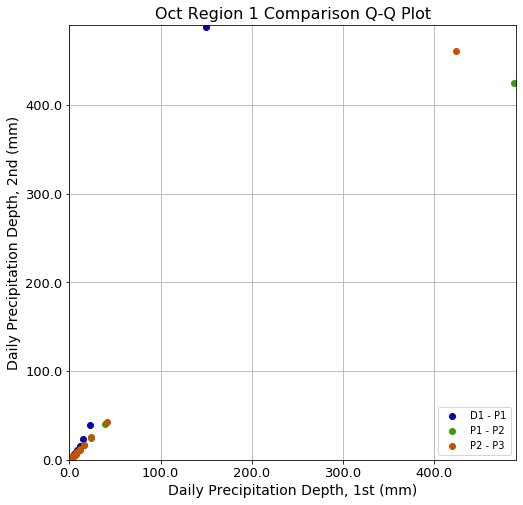

In [1051]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Oct1D1Qs, Oct1P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Oct1P1Qs, Oct1P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Oct1P2Qs, Oct1P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.set_title('Oct Region 1 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max1Qs) )
ax11.set_ylim( (0.0, max1Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

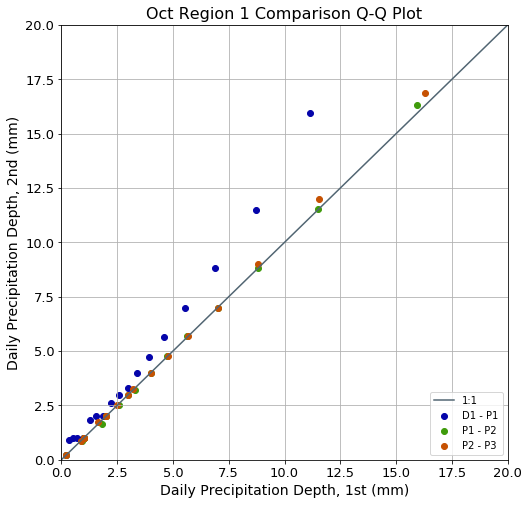

In [1052]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Oct1D1Qs, Oct1P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Oct1P1Qs, Oct1P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Oct1P2Qs, Oct1P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.plot( [0.0, max1Qs], [0.0, max1Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Oct Region 1 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 20.0) )
ax11.set_ylim( (0.0, 20.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

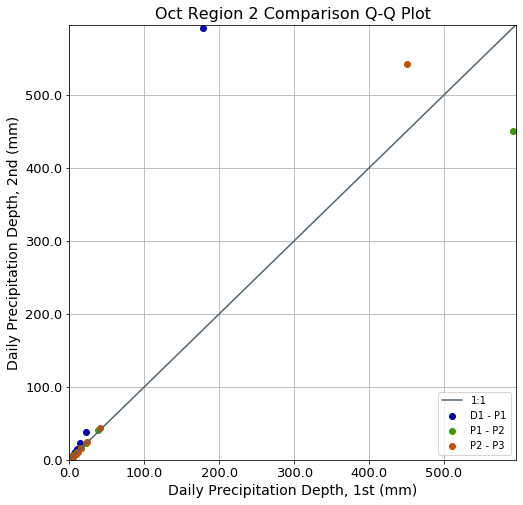

In [1053]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Oct2D1Qs, Oct2P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Oct2P1Qs, Oct2P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Oct2P2Qs, Oct2P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.plot( [0.0, max2Qs], [0.0, max2Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Oct Region 2 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max2Qs) )
ax11.set_ylim( (0.0, max2Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

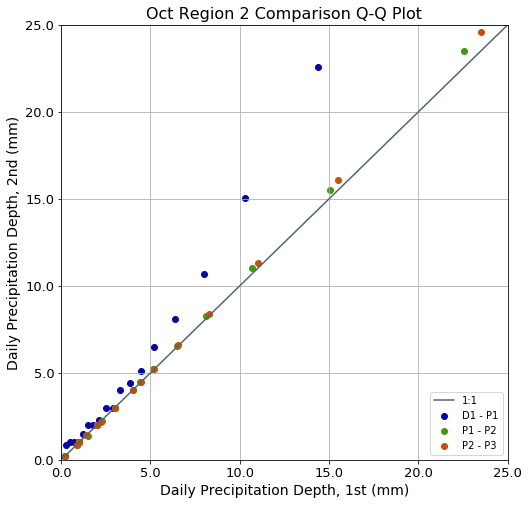

In [1054]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Oct2D1Qs, Oct2P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Oct2P1Qs, Oct2P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Oct2P2Qs, Oct2P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.plot( [0.0, max2Qs], [0.0, max2Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Oct Region 2 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

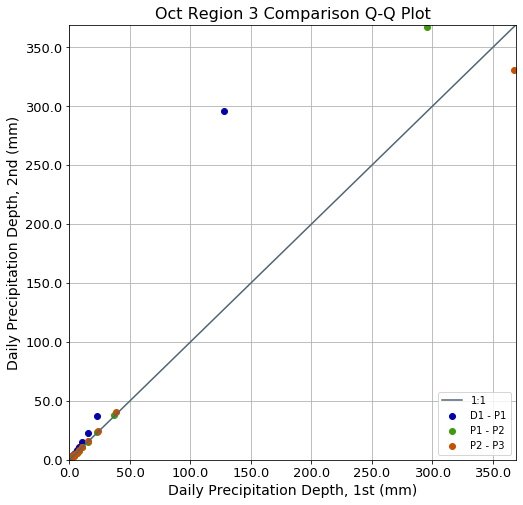

In [1055]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Oct3D1Qs, Oct3P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Oct3P1Qs, Oct3P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Oct3P2Qs, Oct3P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.plot( [0.0, max3Qs], [0.0, max3Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Oct Region 3 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max3Qs) )
ax11.set_ylim( (0.0, max3Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

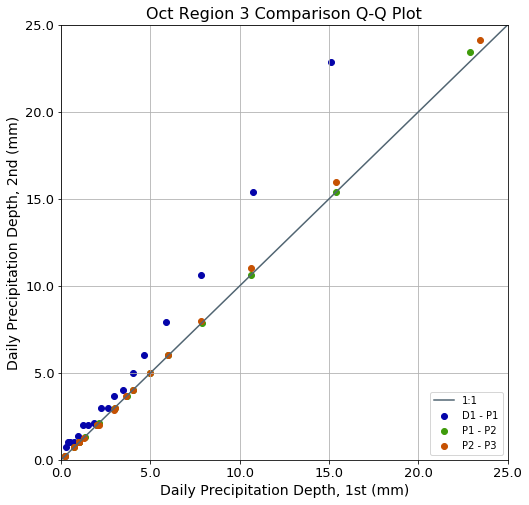

In [1056]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Oct3D1Qs, Oct3P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Oct3P1Qs, Oct3P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Oct3P2Qs, Oct3P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.plot( [0.0, max3Qs], [0.0, max3Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Oct Region 3 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

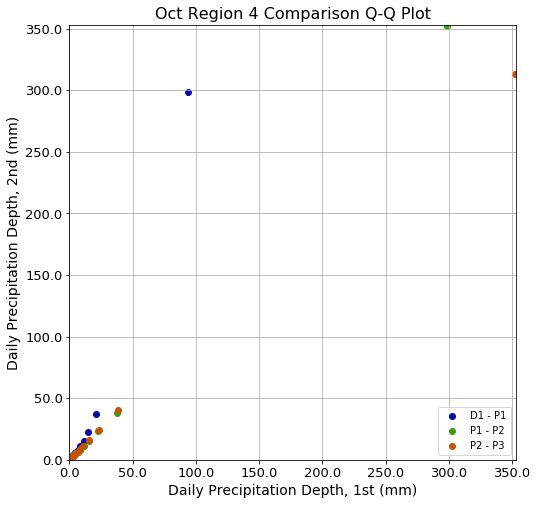

In [1057]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Oct4D1Qs, Oct4P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Oct4P1Qs, Oct4P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Oct4P2Qs, Oct4P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.set_title('Oct Region 4 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max4Qs) )
ax11.set_ylim( (0.0, max4Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

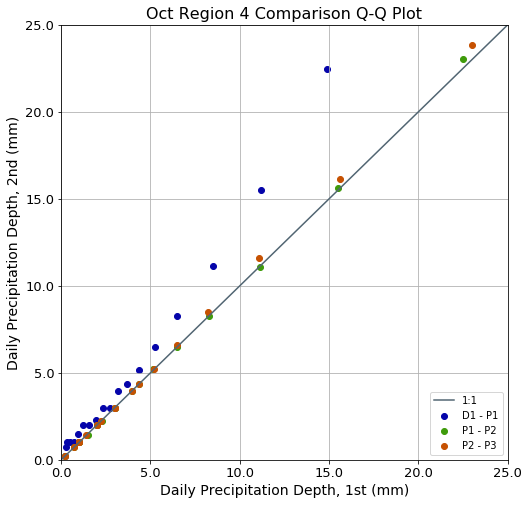

In [1058]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Oct4D1Qs, Oct4P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Oct4P1Qs, Oct4P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Oct4P2Qs, Oct4P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.plot( [0.0, max4Qs], [0.0, max4Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Oct Region 4 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

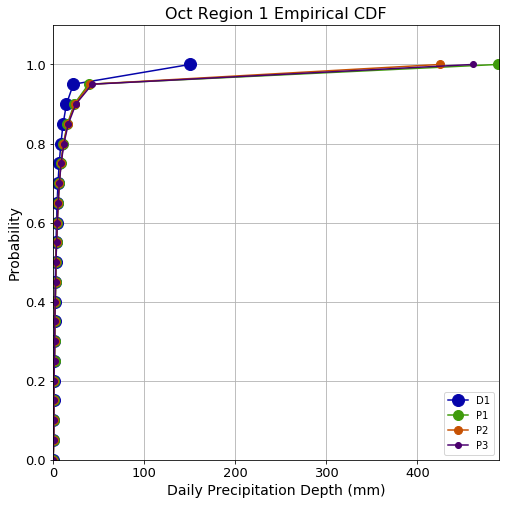

In [1059]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Oct1D1Qs, nCompQs, c='xkcd:royal blue', markersize=12, marker='o', 
           linestyle='-', label="D1")
ax11.plot( Oct1P1Qs, nCompQs, c='xkcd:grass green', markersize=10, marker='o', 
           linestyle='-', label="P1")
ax11.plot( Oct1P2Qs, nCompQs, c='xkcd:dark orange', markersize=8, marker='o', 
           linestyle='-', label="P2")
ax11.plot( Oct1P3Qs, nCompQs, c='xkcd:royal purple', markersize=6, marker='o', 
           linestyle='-', label="P3")
ax11.set_title('Oct Region 1 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max1Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

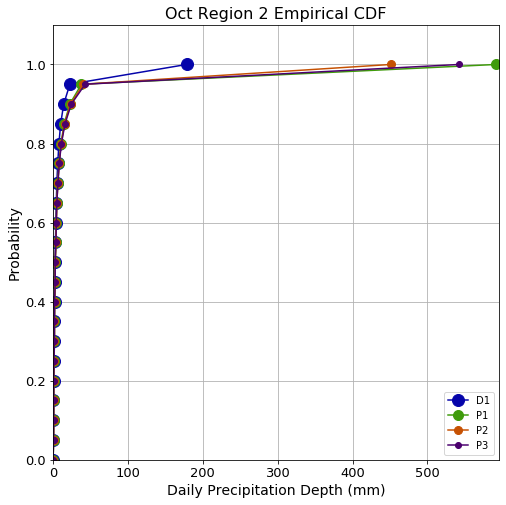

In [1060]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Oct2D1Qs, nCompQs, c='xkcd:royal blue', markersize=12, marker='o', 
           linestyle='-', label="D1")
ax11.plot( Oct2P1Qs, nCompQs, c='xkcd:grass green', markersize=10, marker='o', 
           linestyle='-', label="P1")
ax11.plot( Oct2P2Qs, nCompQs, c='xkcd:dark orange', markersize=8, marker='o', 
           linestyle='-', label="P2")
ax11.plot( Oct2P3Qs, nCompQs, c='xkcd:royal purple', markersize=6, marker='o', 
           linestyle='-', label="P3")
ax11.set_title('Oct Region 2 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max2Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

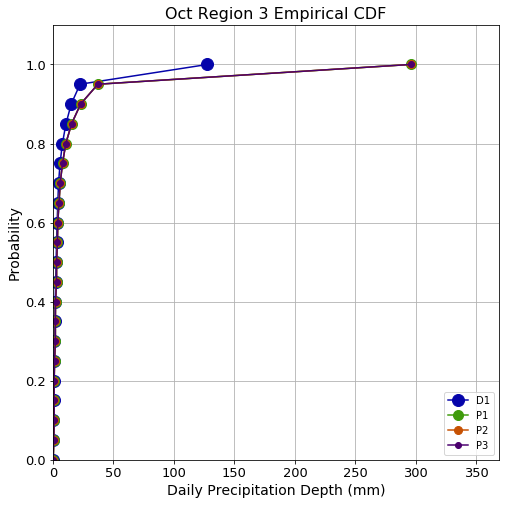

In [1061]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Oct3D1Qs, nCompQs, c='xkcd:royal blue', markersize=12, marker='o', 
           linestyle='-', label="D1")
ax11.plot( Oct3P1Qs, nCompQs, c='xkcd:grass green', markersize=10, marker='o', 
           linestyle='-', label="P1")
ax11.plot( Oct3P1Qs, nCompQs, c='xkcd:dark orange', markersize=8, marker='o', 
           linestyle='-', label="P2")
ax11.plot( Oct3P1Qs, nCompQs, c='xkcd:royal purple', markersize=6, marker='o', 
           linestyle='-', label="P3")
ax11.set_title('Oct Region 3 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max3Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

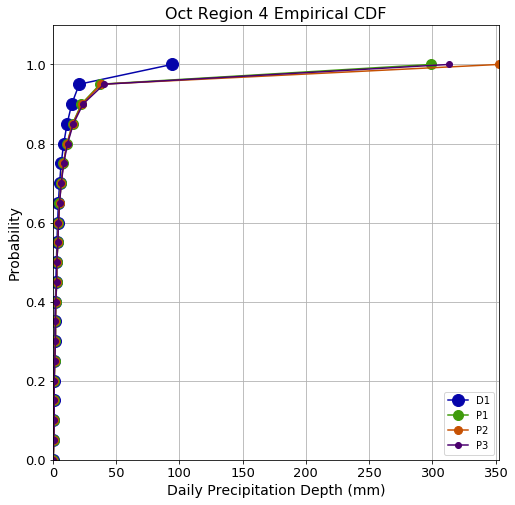

In [1062]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Oct4D1Qs, nCompQs, c='xkcd:royal blue', markersize=12, marker='o', 
           linestyle='-', label="D1")
ax11.plot( Oct4P1Qs, nCompQs, c='xkcd:grass green', markersize=10, marker='o', 
           linestyle='-', label="P1")
ax11.plot( Oct4P2Qs, nCompQs, c='xkcd:dark orange', markersize=8, marker='o', 
           linestyle='-', label="P2")
ax11.plot( Oct4P3Qs, nCompQs, c='xkcd:royal purple', markersize=6, marker='o', 
           linestyle='-', label="P3")
ax11.set_title('Oct Region 4 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max4Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### Nov

In [1063]:
NovNum = 11

In [1064]:
Nov1D1DF = NovD1DF[NovD1DF["PRegion_Id"] == 1].copy()
Nov2D1DF = NovD1DF[NovD1DF["PRegion_Id"] == 2].copy()
Nov3D1DF = NovD1DF[NovD1DF["PRegion_Id"] == 3].copy()
Nov4D1DF = NovD1DF[NovD1DF["PRegion_Id"] == 4].copy()

In [1065]:
Nov1P1DF = NovP1DF[NovP1DF["PRegion_Id"] == 1].copy()
Nov2P1DF = NovP1DF[NovP1DF["PRegion_Id"] == 2].copy()
Nov3P1DF = NovP1DF[NovP1DF["PRegion_Id"] == 3].copy()
Nov4P1DF = NovP1DF[NovP1DF["PRegion_Id"] == 4].copy()

In [1066]:
Nov1P2DF = NovP2DF[NovP2DF["PRegion_Id"] == 1].copy()
Nov2P2DF = NovP2DF[NovP2DF["PRegion_Id"] == 2].copy()
Nov3P2DF = NovP2DF[NovP2DF["PRegion_Id"] == 3].copy()
Nov4P2DF = NovP2DF[NovP2DF["PRegion_Id"] == 4].copy()

In [1067]:
Nov1P3DF = NovP3DF[NovP3DF["PRegion_Id"] == 1].copy()
Nov2P3DF = NovP3DF[NovP3DF["PRegion_Id"] == 2].copy()
Nov3P3DF = NovP3DF[NovP3DF["PRegion_Id"] == 3].copy()
Nov4P3DF = NovP3DF[NovP3DF["PRegion_Id"] == 4].copy()

Bayesian estimates of confidence intervals for mean, variance, and standard deviation of the samples

In [1068]:
Nov1D1BSCI = sstats.bayes_mvs( np.array( Nov1D1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Nov2D1BSCI = sstats.bayes_mvs( np.array( Nov2D1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Nov3D1BSCI = sstats.bayes_mvs( np.array( Nov3D1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Nov4D1BSCI = sstats.bayes_mvs( np.array( Nov4D1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )

In [1069]:
Nov1P1BSCI = sstats.bayes_mvs( np.array( Nov1P1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Nov2P1BSCI = sstats.bayes_mvs( np.array( Nov2P1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Nov3P1BSCI = sstats.bayes_mvs( np.array( Nov3P1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Nov4P1BSCI = sstats.bayes_mvs( np.array( Nov4P1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )

In [1070]:
Nov1P2BSCI = sstats.bayes_mvs( np.array( Nov1P2DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Nov2P2BSCI = sstats.bayes_mvs( np.array( Nov2P2DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Nov3P2BSCI = sstats.bayes_mvs( np.array( Nov3P2DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Nov4P2BSCI = sstats.bayes_mvs( np.array( Nov4P2DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )

In [1071]:
Nov1P3BSCI = sstats.bayes_mvs( np.array( Nov1P3DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Nov2P3BSCI = sstats.bayes_mvs( np.array( Nov2P3DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Nov3P3BSCI = sstats.bayes_mvs( np.array( Nov3P3DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Nov4P3BSCI = sstats.bayes_mvs( np.array( Nov4P3DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )

In [1072]:
CMonList.append( NovNum )
CZoneList.append( 1 )
SD1Mean.append( Nov1D1BSCI[0][0] )
SD1MeanMinCI.append( Nov1D1BSCI[0][1][0] )
SD1MeanMaxCI.append( Nov1D1BSCI[0][1][1] )
SD1Var.append( Nov1D1BSCI[1][0] )
SD1VarMinCI.append( Nov1D1BSCI[1][1][0] )
SD1VarMaxCI.append( Nov1D1BSCI[1][1][1] )
SD1Std.append( Nov1D1BSCI[2][0] )
SD1StdMinCI.append( Nov1D1BSCI[2][1][0] )
SD1StdMaxCI.append( Nov1D1BSCI[2][1][1] )
CMonList.append( NovNum )
CZoneList.append( 2 )
SD1Mean.append( Nov2D1BSCI[0][0] )
SD1MeanMinCI.append( Nov2D1BSCI[0][1][0] )
SD1MeanMaxCI.append( Nov2D1BSCI[0][1][1] )
SD1Var.append( Nov2D1BSCI[1][0] )
SD1VarMinCI.append( Nov2D1BSCI[1][1][0] )
SD1VarMaxCI.append( Nov2D1BSCI[1][1][1] )
SD1Std.append( Nov2D1BSCI[2][0] )
SD1StdMinCI.append( Nov2D1BSCI[2][1][0] )
SD1StdMaxCI.append( Nov2D1BSCI[2][1][1] )
CMonList.append( NovNum )
CZoneList.append( 3 )
SD1Mean.append( Nov3D1BSCI[0][0] )
SD1MeanMinCI.append( Nov3D1BSCI[0][1][0] )
SD1MeanMaxCI.append( Nov3D1BSCI[0][1][1] )
SD1Var.append( Nov3D1BSCI[1][0] )
SD1VarMinCI.append( Nov3D1BSCI[1][1][0] )
SD1VarMaxCI.append( Nov3D1BSCI[1][1][1] )
SD1Std.append( Nov3D1BSCI[2][0] )
SD1StdMinCI.append( Nov3D1BSCI[2][1][0] )
SD1StdMaxCI.append( Nov3D1BSCI[2][1][1] )
CMonList.append( NovNum )
CZoneList.append( 4 )
SD1Mean.append( Nov4D1BSCI[0][0] )
SD1MeanMinCI.append( Nov4D1BSCI[0][1][0] )
SD1MeanMaxCI.append( Nov4D1BSCI[0][1][1] )
SD1Var.append( Nov4D1BSCI[1][0] )
SD1VarMinCI.append( Nov4D1BSCI[1][1][0] )
SD1VarMaxCI.append( Nov4D1BSCI[1][1][1] )
SD1Std.append( Nov4D1BSCI[2][0] )
SD1StdMinCI.append( Nov4D1BSCI[2][1][0] )
SD1StdMaxCI.append( Nov4D1BSCI[2][1][1] )

In [1073]:
SP1Mean.append( Nov1P1BSCI[0][0] )
SP1MeanMinCI.append( Nov1P1BSCI[0][1][0] )
SP1MeanMaxCI.append( Nov1P1BSCI[0][1][1] )
SP1Var.append( Nov1P1BSCI[1][0] )
SP1VarMinCI.append( Nov1P1BSCI[1][1][0] )
SP1VarMaxCI.append( Nov1P1BSCI[1][1][1] )
SP1Std.append( Nov1P1BSCI[2][0] )
SP1StdMinCI.append( Nov1P1BSCI[2][1][0] )
SP1StdMaxCI.append( Nov1P1BSCI[2][1][1] )
SP1Mean.append( Nov2P1BSCI[0][0] )
SP1MeanMinCI.append( Nov2P1BSCI[0][1][0] )
SP1MeanMaxCI.append( Nov2P1BSCI[0][1][1] )
SP1Var.append( Nov2P1BSCI[1][0] )
SP1VarMinCI.append( Nov2P1BSCI[1][1][0] )
SP1VarMaxCI.append( Nov2P1BSCI[1][1][1] )
SP1Std.append( Nov2P1BSCI[2][0] )
SP1StdMinCI.append( Nov2P1BSCI[2][1][0] )
SP1StdMaxCI.append( Nov2P1BSCI[2][1][1] )
SP1Mean.append( Nov3P1BSCI[0][0] )
SP1MeanMinCI.append( Nov3P1BSCI[0][1][0] )
SP1MeanMaxCI.append( Nov3P1BSCI[0][1][1] )
SP1Var.append( Nov3P1BSCI[1][0] )
SP1VarMinCI.append( Nov3P1BSCI[1][1][0] )
SP1VarMaxCI.append( Nov3P1BSCI[1][1][1] )
SP1Std.append( Nov3P1BSCI[2][0] )
SP1StdMinCI.append( Nov3P1BSCI[2][1][0] )
SP1StdMaxCI.append( Nov3P1BSCI[2][1][1] )
SP1Mean.append( Nov4P1BSCI[0][0] )
SP1MeanMinCI.append( Nov4P1BSCI[0][1][0] )
SP1MeanMaxCI.append( Nov4P1BSCI[0][1][1] )
SP1Var.append( Nov4P1BSCI[1][0] )
SP1VarMinCI.append( Nov4P1BSCI[1][1][0] )
SP1VarMaxCI.append( Nov4P1BSCI[1][1][1] )
SP1Std.append( Nov4P1BSCI[2][0] )
SP1StdMinCI.append( Nov4P1BSCI[2][1][0] )
SP1StdMaxCI.append( Nov4P1BSCI[2][1][1] )

In [1074]:
SP2Mean.append( Nov1P2BSCI[0][0] )
SP2MeanMinCI.append( Nov1P2BSCI[0][1][0] )
SP2MeanMaxCI.append( Nov1P2BSCI[0][1][1] )
SP2Var.append( Nov1P2BSCI[1][0] )
SP2VarMinCI.append( Nov1P2BSCI[1][1][0] )
SP2VarMaxCI.append( Nov1P2BSCI[1][1][1] )
SP2Std.append( Nov1P2BSCI[2][0] )
SP2StdMinCI.append( Nov1P2BSCI[2][1][0] )
SP2StdMaxCI.append( Nov1P2BSCI[2][1][1] )
SP2Mean.append( Nov2P2BSCI[0][0] )
SP2MeanMinCI.append( Nov2P2BSCI[0][1][0] )
SP2MeanMaxCI.append( Nov2P2BSCI[0][1][1] )
SP2Var.append( Nov2P2BSCI[1][0] )
SP2VarMinCI.append( Nov2P2BSCI[1][1][0] )
SP2VarMaxCI.append( Nov2P2BSCI[1][1][1] )
SP2Std.append( Nov2P2BSCI[2][0] )
SP2StdMinCI.append( Nov2P2BSCI[2][1][0] )
SP2StdMaxCI.append( Nov2P2BSCI[2][1][1] )
SP2Mean.append( Nov3P2BSCI[0][0] )
SP2MeanMinCI.append( Nov3P2BSCI[0][1][0] )
SP2MeanMaxCI.append( Nov3P2BSCI[0][1][1] )
SP2Var.append( Nov3P2BSCI[1][0] )
SP2VarMinCI.append( Nov3P2BSCI[1][1][0] )
SP2VarMaxCI.append( Nov3P2BSCI[1][1][1] )
SP2Std.append( Nov3P2BSCI[2][0] )
SP2StdMinCI.append( Nov3P2BSCI[2][1][0] )
SP2StdMaxCI.append( Nov3P2BSCI[2][1][1] )
SP2Mean.append( Nov4P2BSCI[0][0] )
SP2MeanMinCI.append( Nov4P2BSCI[0][1][0] )
SP2MeanMaxCI.append( Nov4P2BSCI[0][1][1] )
SP2Var.append( Nov4P2BSCI[1][0] )
SP2VarMinCI.append( Nov4P2BSCI[1][1][0] )
SP2VarMaxCI.append( Nov4P2BSCI[1][1][1] )
SP2Std.append( Nov4P2BSCI[2][0] )
SP2StdMinCI.append( Nov4P2BSCI[2][1][0] )
SP2StdMaxCI.append( Nov4P2BSCI[2][1][1] )

In [1075]:
SP3Mean.append( Nov1P3BSCI[0][0] )
SP3MeanMinCI.append( Nov1P3BSCI[0][1][0] )
SP3MeanMaxCI.append( Nov1P3BSCI[0][1][1] )
SP3Var.append( Nov1P3BSCI[1][0] )
SP3VarMinCI.append( Nov1P3BSCI[1][1][0] )
SP3VarMaxCI.append( Nov1P3BSCI[1][1][1] )
SP3Std.append( Nov1P3BSCI[2][0] )
SP3StdMinCI.append( Nov1P3BSCI[2][1][0] )
SP3StdMaxCI.append( Nov1P3BSCI[2][1][1] )
SP3Mean.append( Nov2P3BSCI[0][0] )
SP3MeanMinCI.append( Nov2P3BSCI[0][1][0] )
SP3MeanMaxCI.append( Nov2P3BSCI[0][1][1] )
SP3Var.append( Nov2P3BSCI[1][0] )
SP3VarMinCI.append( Nov2P3BSCI[1][1][0] )
SP3VarMaxCI.append( Nov2P3BSCI[1][1][1] )
SP3Std.append( Nov2P3BSCI[2][0] )
SP3StdMinCI.append( Nov2P3BSCI[2][1][0] )
SP3StdMaxCI.append( Nov2P3BSCI[2][1][1] )
SP3Mean.append( Nov3P3BSCI[0][0] )
SP3MeanMinCI.append( Nov3P3BSCI[0][1][0] )
SP3MeanMaxCI.append( Nov3P3BSCI[0][1][1] )
SP3Var.append( Nov3P3BSCI[1][0] )
SP3VarMinCI.append( Nov3P3BSCI[1][1][0] )
SP3VarMaxCI.append( Nov3P3BSCI[1][1][1] )
SP3Std.append( Nov3P3BSCI[2][0] )
SP3StdMinCI.append( Nov3P3BSCI[2][1][0] )
SP3StdMaxCI.append( Nov3P3BSCI[2][1][1] )
SP3Mean.append( Nov4P3BSCI[0][0] )
SP3MeanMinCI.append( Nov4P3BSCI[0][1][0] )
SP3MeanMaxCI.append( Nov4P3BSCI[0][1][1] )
SP3Var.append( Nov4P3BSCI[1][0] )
SP3VarMinCI.append( Nov4P3BSCI[1][1][0] )
SP3VarMaxCI.append( Nov4P3BSCI[1][1][1] )
SP3Std.append( Nov4P3BSCI[2][0] )
SP3StdMinCI.append( Nov4P3BSCI[2][1][0] )
SP3StdMaxCI.append( Nov4P3BSCI[2][1][1] )

#### T-Test

T-Test for the means of two independent samples. Two-sided test for the null hypothesis that 2 independent samples hae identical average values. Test assumes that the populations have identical variances.

If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [1076]:
Nov1TTD1toP1 = sstats.ttest_ind( np.array( Nov1D1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Nov1P1DF["Precip_mm"], dtype=np.int32 ) )

In [1077]:
Nov1TTD1toP1Pval = Nov1TTD1toP1[1]
print("Region 1, P-Value for LOCA D1 and P1 from same population is: %g" % Nov1TTD1toP1Pval )

Region 1, P-Value for LOCA D1 and P1 from same population is: 0


In [1078]:
Nov2TTD1toP1 = sstats.ttest_ind( np.array( Nov2D1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Nov2P1DF["Precip_mm"], dtype=np.int32 ) )

In [1079]:
Nov2TTD1toP1Pval = Nov2TTD1toP1[1]
print("Region 2, P-Value for LOCA D1 and P1 from same population is: %g" % Nov2TTD1toP1Pval )

Region 2, P-Value for LOCA D1 and P1 from same population is: 0


In [1080]:
Nov3TTD1toP1 = sstats.ttest_ind( np.array( Nov3D1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Nov3P1DF["Precip_mm"], dtype=np.int32 ) )

In [1081]:
Nov3TTD1toP1Pval = Nov3TTD1toP1[1]
print("Region 3, P-Value for LOCA D1 and P1 from same population is: %g" % Nov3TTD1toP1Pval )

Region 3, P-Value for LOCA D1 and P1 from same population is: 0


In [1082]:
Nov4TTD1toP1 = sstats.ttest_ind( np.array( Nov4D1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Nov4P1DF["Precip_mm"], dtype=np.int32 ) )

In [1083]:
Nov4TTD1toP1Pval = Nov4TTD1toP1[1]
print("Region 4, P-Value for LOCA D1 and P1 from same population is: %g" % Nov4TTD1toP1Pval )

Region 4, P-Value for LOCA D1 and P1 from same population is: 0


In [1084]:
Nov1TTP1toP2 = sstats.ttest_ind( np.array( Nov1P1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Nov1P2DF["Precip_mm"], dtype=np.int32 ) )

In [1085]:
Nov1TTP1toP2Pval = Nov1TTP1toP2[1]
print("Region 1, P-Value for LOCA P1 and P2 from same population is: %g" % Nov1TTP1toP2Pval )

Region 1, P-Value for LOCA P1 and P2 from same population is: 3.20462e-66


In [1086]:
Nov2TTP1toP2 = sstats.ttest_ind( np.array( Nov2P1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Nov2P2DF["Precip_mm"], dtype=np.int32 ) )

In [1087]:
Nov2TTP1toP2Pval = Nov2TTP1toP2[1]
print("Region 2, P-Value for LOCA P1 and P2 from same population is: %g" % Nov2TTP1toP2Pval )

Region 2, P-Value for LOCA P1 and P2 from same population is: 2.0437e-41


In [1088]:
Nov3TTP1toP2 = sstats.ttest_ind( np.array( Nov3P1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Nov3P2DF["Precip_mm"], dtype=np.int32 ) )

In [1089]:
Nov3TTP1toP2Pval = Nov3TTP1toP2[1]
print("Region 3, P-Value for LOCA P1 and P2 from same population is: %g" % Nov3TTP1toP2Pval )

Region 3, P-Value for LOCA P1 and P2 from same population is: 3.98871e-31


In [1090]:
Nov4TTP1toP2 = sstats.ttest_ind( np.array( Nov4P1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Nov4P2DF["Precip_mm"], dtype=np.int32 ) )

In [1091]:
Nov4TTP1toP2Pval = Nov4TTP1toP2[1]
print("Region 4, P-Value for LOCA P1 and P2 from same population is: %g" % Nov4TTP1toP2Pval )

Region 4, P-Value for LOCA P1 and P2 from same population is: 2.0648e-12


In [1092]:
Nov1TTP2toP3 = sstats.ttest_ind( np.array( Nov1P2DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Nov1P3DF["Precip_mm"], dtype=np.int32 ) )

In [1093]:
Nov1TTP2toP3Pval = Nov1TTP2toP3[1]
print("Region 1, P-Value for LOCA P2 and P3 from same population is: %g" % Nov1TTP2toP3Pval )

Region 1, P-Value for LOCA P2 and P3 from same population is: 0.0428517


In [1094]:
Nov2TTP2toP3 = sstats.ttest_ind( np.array( Nov2P2DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Nov2P3DF["Precip_mm"], dtype=np.int32 ) )

In [1095]:
Nov2TTP2toP3Pval = Nov2TTP2toP3[1]
print("Region 2, P-Value for LOCA P2 and P3 from same population is: %g" % Nov2TTP2toP3Pval )

Region 2, P-Value for LOCA P2 and P3 from same population is: 0.151753


In [1096]:
Nov3TTP2toP3 = sstats.ttest_ind( np.array( Nov3P2DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Nov3P3DF["Precip_mm"], dtype=np.int32 ) )

In [1097]:
Nov3TTP2toP3Pval = Nov3TTP2toP3[1]
print("Region 3, P-Value for LOCA P2 and P3 from same population is: %g" % Nov3TTP2toP3Pval )

Region 3, P-Value for LOCA P2 and P3 from same population is: 0.885854


In [1098]:
Nov4TTP2toP3 = sstats.ttest_ind( np.array( Nov4P2DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Nov4P3DF["Precip_mm"], dtype=np.int32 ) )

In [1099]:
Nov4TTP2toP3Pval = Nov4TTP2toP3[1]
print("Region 4, P-Value for LOCA P2 and P3 from same population is: %g" % Nov4TTP2toP3Pval )

Region 4, P-Value for LOCA P2 and P3 from same population is: 0.516251


#### Mann-Whitney Rank Test

Nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample. This test can be used to investigate whether two independent samples were selected from populations having the same distribution.

Null hypothesis, $H_{0}$, is that the distributions of both populations are equal.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of being from the same distribution.

In [1100]:
Nov1MWUD1toP1 = sstats.mannwhitneyu( np.array( Nov1D1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Nov1P1DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [1101]:
Nov1MWUD1toP1Pval = Nov1MWUD1toP1[1]
print("Region 1, P-Value for LOCA D1 and P1 from same distribution is: %g" % Nov1MWUD1toP1Pval )

Region 1, P-Value for LOCA D1 and P1 from same distribution is: 0


In [1102]:
Nov2MWUD1toP1 = sstats.mannwhitneyu( np.array( Nov2D1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Nov2P1DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [1103]:
Nov2MWUD1toP1Pval = Nov2MWUD1toP1[1]
print("Region 2, P-Value for LOCA D1 and P1 from same distribution is: %g" % Nov2MWUD1toP1Pval )

Region 2, P-Value for LOCA D1 and P1 from same distribution is: 0


In [1104]:
Nov3MWUD1toP1 = sstats.mannwhitneyu( np.array( Nov3D1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Nov3P1DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [1105]:
Nov3MWUD1toP1Pval = Nov3MWUD1toP1[1]
print("Region 3, P-Value for LOCA D1 and P1 from same distribution is: %g" % Nov3MWUD1toP1Pval )

Region 3, P-Value for LOCA D1 and P1 from same distribution is: 0


In [1106]:
Nov4MWUD1toP1 = sstats.mannwhitneyu( np.array( Nov4D1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Nov4P1DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [1107]:
Nov4MWUD1toP1Pval = Nov4MWUD1toP1[1]
print("Region 4, P-Value for LOCA D1 and P1 from same distribution is: %g" % Nov4MWUD1toP1Pval )

Region 4, P-Value for LOCA D1 and P1 from same distribution is: 0


In [1108]:
Nov1MWUP1toP2 = sstats.mannwhitneyu( np.array( Nov1P1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Nov1P2DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [1109]:
Nov1MWUP1toP2Pval = Nov1MWUP1toP2[1]
print("Region 1, P-Value for LOCA P1 and P2 from same distribution is: %g" % Nov1MWUP1toP2Pval )

Region 1, P-Value for LOCA P1 and P2 from same distribution is: 6.84687e-06


In [1110]:
Nov2MWUP1toP2 = sstats.mannwhitneyu( np.array( Nov2P1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Nov2P2DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [1111]:
Nov2MWUP1toP2Pval = Nov2MWUP1toP2[1]
print("Region 2, P-Value for LOCA P1 and P2 from same distribution is: %g" % Nov2MWUP1toP2Pval )

Region 2, P-Value for LOCA P1 and P2 from same distribution is: 2.24531e-15


In [1112]:
Nov3MWUP1toP2 = sstats.mannwhitneyu( np.array( Nov3P1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Nov3P2DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [1113]:
Nov3MWUP1toP2Pval = Nov3MWUP1toP2[1]
print("Region 3, P-Value for LOCA P1 and P2 from same distribution is: %g" % Nov3MWUP1toP2Pval )

Region 3, P-Value for LOCA P1 and P2 from same distribution is: 3.91114e-05


In [1114]:
Nov4MWUP1toP2 = sstats.mannwhitneyu( np.array( Nov4P1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Nov4P2DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [1115]:
Nov4MWUP1toP2Pval = Nov4MWUP1toP2[1]
print("Region 4, P-Value for LOCA P1 and P2 from same distribution is: %g" % Nov4MWUP1toP2Pval )

Region 4, P-Value for LOCA P1 and P2 from same distribution is: 0.881884


In [1116]:
Nov1MWUP2toP3 = sstats.mannwhitneyu( np.array( Nov1P2DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Nov1P3DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [1117]:
Nov1MWUP2toP3Pval = Nov1MWUP2toP3[1]
print("Region 1, P-Value for LOCA P2 and P3 from same distribution is: %g" % Nov1MWUP2toP3Pval )

Region 1, P-Value for LOCA P2 and P3 from same distribution is: 5.37735e-09


In [1118]:
Nov2MWUP2toP3 = sstats.mannwhitneyu( np.array( Nov2P2DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Nov2P3DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [1119]:
Nov2MWUP2toP3Pval = Nov2MWUP2toP3[1]
print("Region 2, P-Value for LOCA P2 and P3 from same distribution is: %g" % Nov2MWUP2toP3Pval )

Region 2, P-Value for LOCA P2 and P3 from same distribution is: 7.08837e-09


In [1120]:
Nov3MWUP2toP3 = sstats.mannwhitneyu( np.array( Nov3P2DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Nov3P3DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [1121]:
Nov3MWUP2toP3Pval = Nov3MWUP2toP3[1]
print("Region 3, P-Value for LOCA P2 and P3 from same distribution is: %g" % Nov3MWUP2toP3Pval )

Region 3, P-Value for LOCA P2 and P3 from same distribution is: 6.57088e-05


In [1122]:
Nov4MWUP2toP3 = sstats.mannwhitneyu( np.array( Nov4P2DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Nov4P3DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [1123]:
Nov4MWUP2toP3Pval = Nov4MWUP2toP3[1]
print("Region 4, P-Value for LOCA P2 and P3 from same distribution is: %g" % Nov4MWUP2toP3Pval )

Region 4, P-Value for LOCA P2 and P3 from same distribution is: 0.116421


#### Kruskal-Wallis Test

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of the same population median.

In [1124]:
Nov1KWD1toP1 = sstats.kruskal( np.array( Nov1D1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Nov1P1DF["Precip_mm"], dtype=np.int32 ) )

In [1125]:
Nov1KWD1toP1Pval = Nov1KWD1toP1[1]
print("Region 1, P-Value for LOCA D1 and P1 have the same median is: %g" % Nov1KWD1toP1Pval )

Region 1, P-Value for LOCA D1 and P1 have the same median is: 0


In [1126]:
Nov2KWD1toP1 = sstats.kruskal( np.array( Nov2D1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Nov2P1DF["Precip_mm"], dtype=np.int32 ) )

In [1127]:
Nov2KWD1toP1Pval = Nov2KWD1toP1[1]
print("Region 2, P-Value for LOCA D1 and P1 have the same median is: %g" % Nov2KWD1toP1Pval )

Region 2, P-Value for LOCA D1 and P1 have the same median is: 1


In [1128]:
Nov3KWD1toP1 = sstats.kruskal( np.array( Nov3D1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Nov3P1DF["Precip_mm"], dtype=np.int32 ) )

In [1129]:
Nov3KWD1toP1Pval = Nov3KWD1toP1[1]
print("Region 3, P-Value for LOCA D1 and P1 have the same median is: %g" % Nov3KWD1toP1Pval )

Region 3, P-Value for LOCA D1 and P1 have the same median is: 1


In [1130]:
Nov4KWD1toP1 = sstats.kruskal( np.array( Nov4D1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Nov4P1DF["Precip_mm"], dtype=np.int32 ) )

In [1131]:
Nov4KWD1toP1Pval = Nov4KWD1toP1[1]
print("Region 4, P-Value for LOCA D1 and P1 have the same median is: %g" % Nov4KWD1toP1Pval )

Region 4, P-Value for LOCA D1 and P1 have the same median is: 0


In [1132]:
Nov1KWP1toP2 = sstats.kruskal( np.array( Nov1P1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Nov1P2DF["Precip_mm"], dtype=np.int32 ) )

In [1133]:
Nov1KWP1toP2Pval = Nov1KWP1toP2[1]
print("Region 1, P-Value for LOCA P1 and P2 have the same median is: %g" % Nov1KWP1toP2Pval )

Region 1, P-Value for LOCA P1 and P2 have the same median is: 0


In [1134]:
Nov2KWP1toP2 = sstats.kruskal( np.array( Nov2P1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Nov2P2DF["Precip_mm"], dtype=np.int32 ) )

In [1135]:
Nov2KWP1toP2Pval = Nov2KWP1toP2[1]
print("Region 2, P-Value for LOCA P1 and P2 have the same median is: %g" % Nov2KWP1toP2Pval )

Region 2, P-Value for LOCA P1 and P2 have the same median is: 0


In [1136]:
Nov3KWP1toP2 = sstats.kruskal( np.array( Nov3P1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Nov3P2DF["Precip_mm"], dtype=np.int32 ) )

In [1137]:
Nov3KWP1toP2Pval = Nov3KWP1toP2[1]
print("Region 3, P-Value for LOCA P1 and P2 have the same median is: %g" % Nov3KWP1toP2Pval )

Region 3, P-Value for LOCA P1 and P2 have the same median is: 1


In [1138]:
Nov4KWP1toP2 = sstats.kruskal( np.array( Nov4P1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Nov4P2DF["Precip_mm"], dtype=np.int32 ) )

In [1139]:
Nov4KWP1toP2Pval = Nov4KWP1toP2[1]
print("Region 4, P-Value for LOCA P1 and P2 have the same median is: %g" % Nov4KWP1toP2Pval )

Region 4, P-Value for LOCA P1 and P2 have the same median is: 0


In [1140]:
Nov1KWP2toP3 = sstats.kruskal( np.array( Nov1P2DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Nov1P3DF["Precip_mm"], dtype=np.int32 ) )

In [1141]:
Nov1KWP2toP3Pval = Nov1KWP2toP3[1]
print("Region 1, P-Value for LOCA P2 and P3 have the same median is: %g" % Nov1KWP2toP3Pval )

Region 1, P-Value for LOCA P2 and P3 have the same median is: 0


In [1142]:
Nov2KWP2toP3 = sstats.kruskal( np.array( Nov2P2DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Nov2P3DF["Precip_mm"], dtype=np.int32 ) )

In [1143]:
Nov2KWP2toP3Pval = Nov2KWP2toP3[1]
print("Region 2, P-Value for LOCA P2 and P3 have the same median is: %g" % Nov2KWP2toP3Pval )

Region 2, P-Value for LOCA P2 and P3 have the same median is: 0


In [1144]:
Nov3KWP2toP3 = sstats.kruskal( np.array( Nov3P2DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Nov3P3DF["Precip_mm"], dtype=np.int32 ) )

In [1145]:
Nov3KWP2toP3Pval = Nov3KWP2toP3[1]
print("Region 3, P-Value for LOCA P2 and P3 have the same median is: %g" % Nov3KWP2toP3Pval )

Region 3, P-Value for LOCA P2 and P3 have the same median is: 0


In [1146]:
Nov4KWP2toP3 = sstats.kruskal( np.array( Nov4P2DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Nov4P3DF["Precip_mm"], dtype=np.int32 ) )

In [1147]:
Nov4KWP2toP3Pval = Nov4KWP2toP3[1]
print("Region 4, P-Value for LOCA P2 and P3 have the same median is: %g" % Nov4KWP2toP3Pval )

Region 4, P-Value for LOCA P2 and P3 have the same median is: 0


In [1148]:
Nov4P3DF["Precip_mm"].median(), Nov4P2DF["Precip_mm"].median(), Nov4P1DF["Precip_mm"].median(), Nov4D1DF["Precip_mm"].median()

(2.0, 2.0678181648254395, 2.158329725265503, 1.777484655380249)

#### Plots

In [1149]:
Nov1D1Qs = Nov1D1DF["Precip_mm"].quantile(q=nCompQs)
Nov1P1Qs = Nov1P1DF["Precip_mm"].quantile(q=nCompQs)
Nov1P2Qs = Nov1P2DF["Precip_mm"].quantile(q=nCompQs)
Nov1P3Qs = Nov1P3DF["Precip_mm"].quantile(q=nCompQs)
Nov2D1Qs = Nov2D1DF["Precip_mm"].quantile(q=nCompQs)
Nov2P1Qs = Nov2P1DF["Precip_mm"].quantile(q=nCompQs)
Nov2P2Qs = Nov2P2DF["Precip_mm"].quantile(q=nCompQs)
Nov2P3Qs = Nov2P3DF["Precip_mm"].quantile(q=nCompQs)
Nov3D1Qs = Nov3D1DF["Precip_mm"].quantile(q=nCompQs)
Nov3P1Qs = Nov3P1DF["Precip_mm"].quantile(q=nCompQs)
Nov3P2Qs = Nov3P2DF["Precip_mm"].quantile(q=nCompQs)
Nov3P3Qs = Nov3P3DF["Precip_mm"].quantile(q=nCompQs)
Nov4D1Qs = Nov4D1DF["Precip_mm"].quantile(q=nCompQs)
Nov4P1Qs = Nov4P1DF["Precip_mm"].quantile(q=nCompQs)
Nov4P2Qs = Nov4P2DF["Precip_mm"].quantile(q=nCompQs)
Nov4P3Qs = Nov4P3DF["Precip_mm"].quantile(q=nCompQs)

In [1150]:
max1Qs = max( Nov1D1Qs.max(), Nov1P1Qs.max(), Nov1P2Qs.max(), Nov1P3Qs.max() )
max1Qs = round(max1Qs) + 2.0
max1Qs

338.0

In [1151]:
max2Qs = max( Nov2D1Qs.max(), Nov2P1Qs.max(), Nov2P2Qs.max(), Nov2P3Qs.max() )
max2Qs = round(max2Qs) + 4.0
max2Qs

416.0

In [1152]:
max3Qs = max( Nov3D1Qs.max(), Nov3P1Qs.max(), Nov3P2Qs.max(), Nov3P3Qs.max() )
max3Qs = round(max3Qs) + 1.0
max3Qs

242.0

In [1153]:
max4Qs = max( Nov4D1Qs.max(), Nov4P1Qs.max(), Nov4P2Qs.max(), Nov4P3Qs.max() )
max4Qs = round(max4Qs) + 1.0
max4Qs

217.0

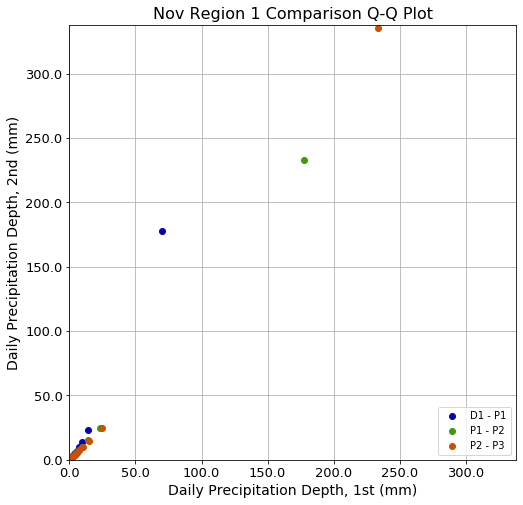

In [1154]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Nov1D1Qs, Nov1P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Nov1P1Qs, Nov1P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Nov1P2Qs, Nov1P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.set_title('Nov Region 1 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max1Qs) )
ax11.set_ylim( (0.0, max1Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

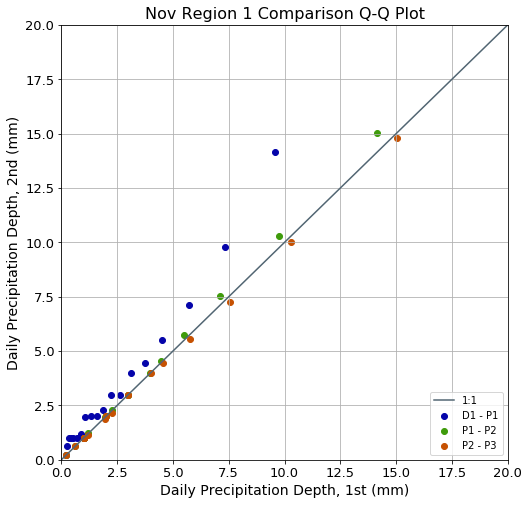

In [1155]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Nov1D1Qs, Nov1P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Nov1P1Qs, Nov1P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Nov1P2Qs, Nov1P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.plot( [0.0, max1Qs], [0.0, max1Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Nov Region 1 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 20.0) )
ax11.set_ylim( (0.0, 20.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

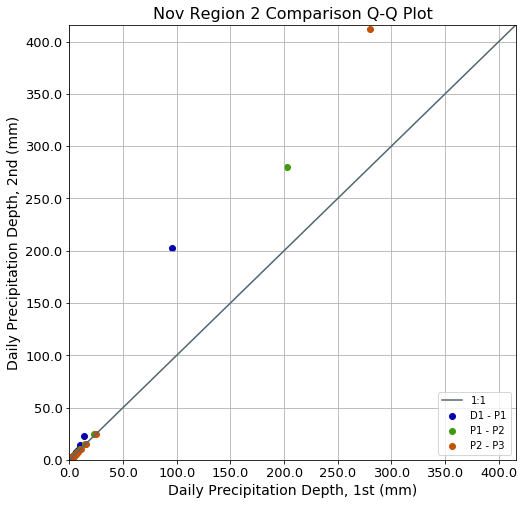

In [1156]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Nov2D1Qs, Nov2P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Nov2P1Qs, Nov2P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Nov2P2Qs, Nov2P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.plot( [0.0, max2Qs], [0.0, max2Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Nov Region 2 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max2Qs) )
ax11.set_ylim( (0.0, max2Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

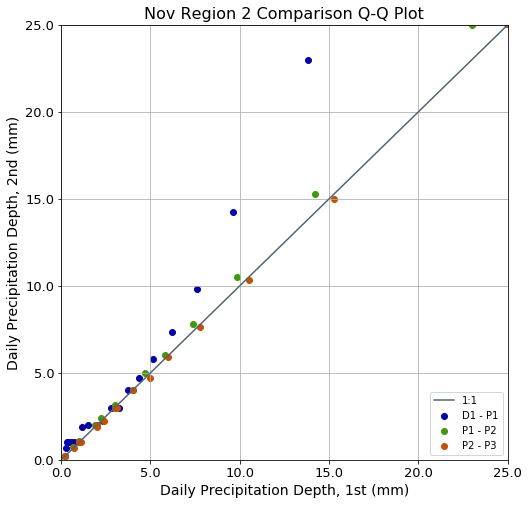

In [1157]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Nov2D1Qs, Nov2P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Nov2P1Qs, Nov2P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Nov2P2Qs, Nov2P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.plot( [0.0, max2Qs], [0.0, max2Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Nov Region 2 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

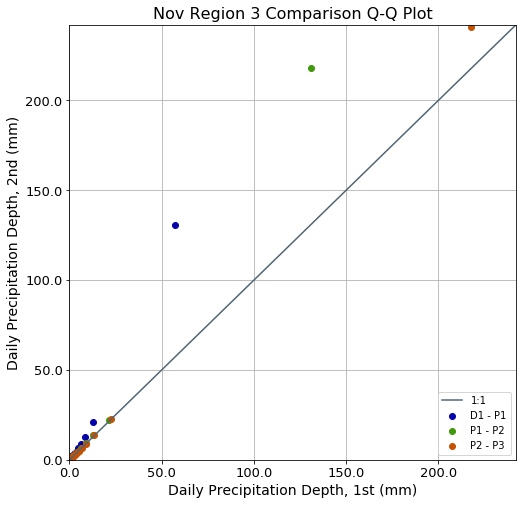

In [1158]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Nov3D1Qs, Nov3P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Nov3P1Qs, Nov3P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Nov3P2Qs, Nov3P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.plot( [0.0, max3Qs], [0.0, max3Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Nov Region 3 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max3Qs) )
ax11.set_ylim( (0.0, max3Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

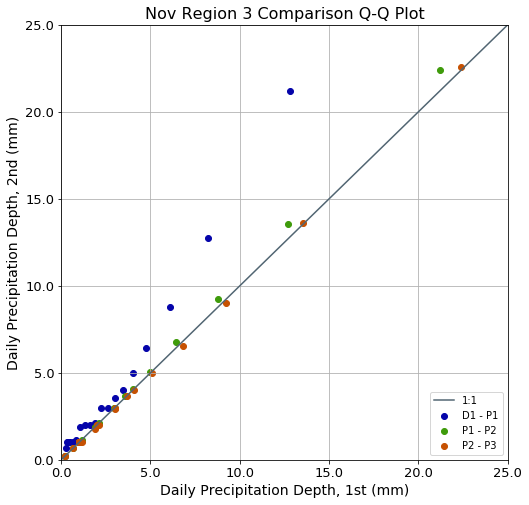

In [1159]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Nov3D1Qs, Nov3P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Nov3P1Qs, Nov3P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Nov3P2Qs, Nov3P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.plot( [0.0, max3Qs], [0.0, max3Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Nov Region 3 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

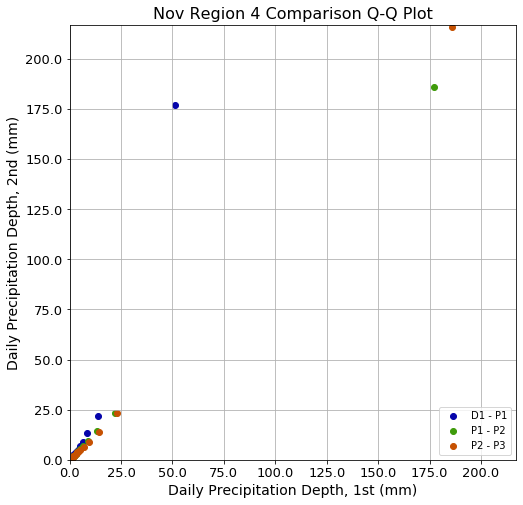

In [1160]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Nov4D1Qs, Nov4P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Nov4P1Qs, Nov4P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Nov4P2Qs, Nov4P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.set_title('Nov Region 4 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max4Qs) )
ax11.set_ylim( (0.0, max4Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

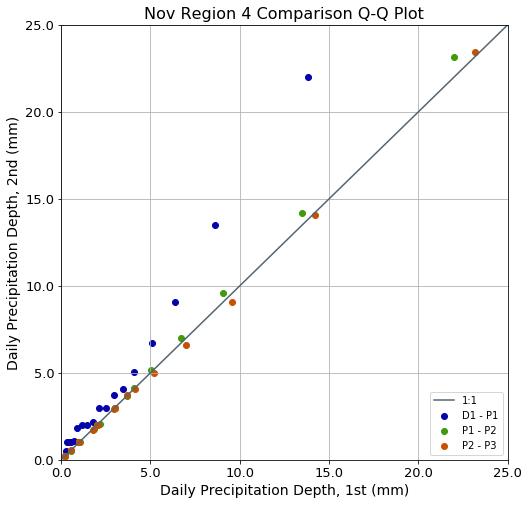

In [1161]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Nov4D1Qs, Nov4P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Nov4P1Qs, Nov4P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Nov4P2Qs, Nov4P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.plot( [0.0, max4Qs], [0.0, max4Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Nov Region 4 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

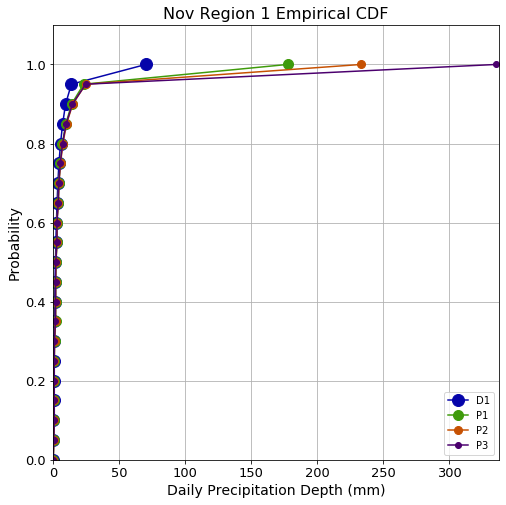

In [1162]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Nov1D1Qs, nCompQs, c='xkcd:royal blue', markersize=12, marker='o', 
           linestyle='-', label="D1")
ax11.plot( Nov1P1Qs, nCompQs, c='xkcd:grass green', markersize=10, marker='o', 
           linestyle='-', label="P1")
ax11.plot( Nov1P2Qs, nCompQs, c='xkcd:dark orange', markersize=8, marker='o', 
           linestyle='-', label="P2")
ax11.plot( Nov1P3Qs, nCompQs, c='xkcd:royal purple', markersize=6, marker='o', 
           linestyle='-', label="P3")
ax11.set_title('Nov Region 1 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max1Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

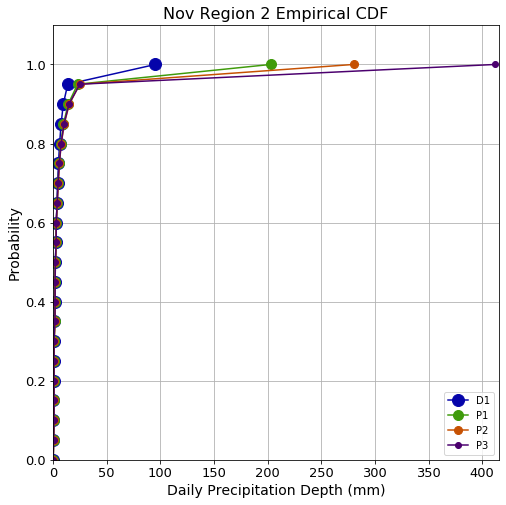

In [1163]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Nov2D1Qs, nCompQs, c='xkcd:royal blue', markersize=12, marker='o', 
           linestyle='-', label="D1")
ax11.plot( Nov2P1Qs, nCompQs, c='xkcd:grass green', markersize=10, marker='o', 
           linestyle='-', label="P1")
ax11.plot( Nov2P2Qs, nCompQs, c='xkcd:dark orange', markersize=8, marker='o', 
           linestyle='-', label="P2")
ax11.plot( Nov2P3Qs, nCompQs, c='xkcd:royal purple', markersize=6, marker='o', 
           linestyle='-', label="P3")
ax11.set_title('Nov Region 2 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max2Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

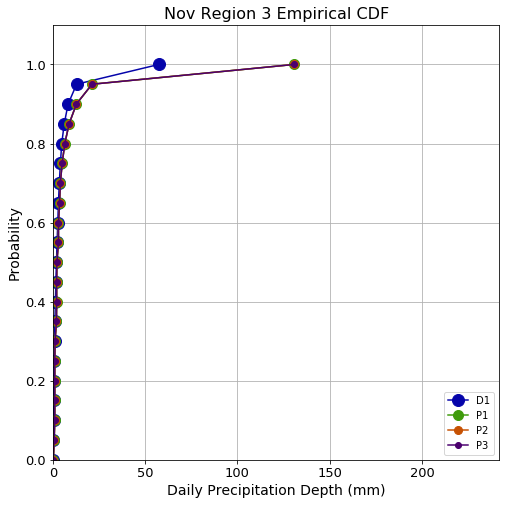

In [1164]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Nov3D1Qs, nCompQs, c='xkcd:royal blue', markersize=12, marker='o', 
           linestyle='-', label="D1")
ax11.plot( Nov3P1Qs, nCompQs, c='xkcd:grass green', markersize=10, marker='o', 
           linestyle='-', label="P1")
ax11.plot( Nov3P1Qs, nCompQs, c='xkcd:dark orange', markersize=8, marker='o', 
           linestyle='-', label="P2")
ax11.plot( Nov3P1Qs, nCompQs, c='xkcd:royal purple', markersize=6, marker='o', 
           linestyle='-', label="P3")
ax11.set_title('Nov Region 3 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max3Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

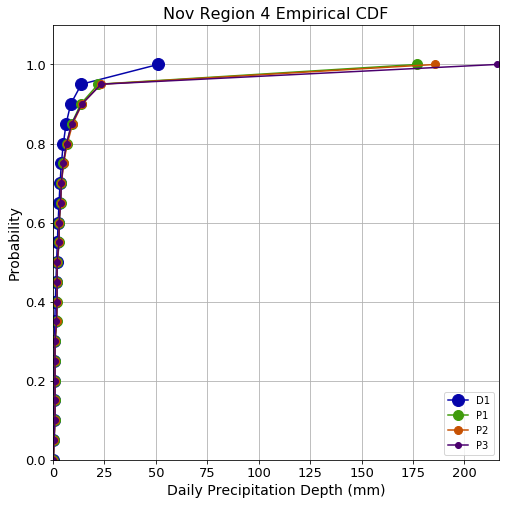

In [1165]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Nov4D1Qs, nCompQs, c='xkcd:royal blue', markersize=12, marker='o', 
           linestyle='-', label="D1")
ax11.plot( Nov4P1Qs, nCompQs, c='xkcd:grass green', markersize=10, marker='o', 
           linestyle='-', label="P1")
ax11.plot( Nov4P2Qs, nCompQs, c='xkcd:dark orange', markersize=8, marker='o', 
           linestyle='-', label="P2")
ax11.plot( Nov4P3Qs, nCompQs, c='xkcd:royal purple', markersize=6, marker='o', 
           linestyle='-', label="P3")
ax11.set_title('Nov Region 4 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max4Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### Dec

In [1166]:
DecNum = 12

In [1167]:
Dec1D1DF = DecD1DF[DecD1DF["PRegion_Id"] == 1].copy()
Dec2D1DF = DecD1DF[DecD1DF["PRegion_Id"] == 2].copy()
Dec3D1DF = DecD1DF[DecD1DF["PRegion_Id"] == 3].copy()
Dec4D1DF = DecD1DF[DecD1DF["PRegion_Id"] == 4].copy()

In [1168]:
Dec1P1DF = DecP1DF[DecP1DF["PRegion_Id"] == 1].copy()
Dec2P1DF = DecP1DF[DecP1DF["PRegion_Id"] == 2].copy()
Dec3P1DF = DecP1DF[DecP1DF["PRegion_Id"] == 3].copy()
Dec4P1DF = DecP1DF[DecP1DF["PRegion_Id"] == 4].copy()

In [1169]:
Dec1P2DF = DecP2DF[DecP2DF["PRegion_Id"] == 1].copy()
Dec2P2DF = DecP2DF[DecP2DF["PRegion_Id"] == 2].copy()
Dec3P2DF = DecP2DF[DecP2DF["PRegion_Id"] == 3].copy()
Dec4P2DF = DecP2DF[DecP2DF["PRegion_Id"] == 4].copy()

In [1170]:
Dec1P3DF = DecP3DF[DecP3DF["PRegion_Id"] == 1].copy()
Dec2P3DF = DecP3DF[DecP3DF["PRegion_Id"] == 2].copy()
Dec3P3DF = DecP3DF[DecP3DF["PRegion_Id"] == 3].copy()
Dec4P3DF = DecP3DF[DecP3DF["PRegion_Id"] == 4].copy()

Bayesian estimates of confidence intervals for mean, variance, and standard deviation of the samples

In [1171]:
Dec1D1BSCI = sstats.bayes_mvs( np.array( Dec1D1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Dec2D1BSCI = sstats.bayes_mvs( np.array( Dec2D1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Dec3D1BSCI = sstats.bayes_mvs( np.array( Dec3D1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Dec4D1BSCI = sstats.bayes_mvs( np.array( Dec4D1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )

In [1172]:
Dec1P1BSCI = sstats.bayes_mvs( np.array( Dec1P1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Dec2P1BSCI = sstats.bayes_mvs( np.array( Dec2P1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Dec3P1BSCI = sstats.bayes_mvs( np.array( Dec3P1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Dec4P1BSCI = sstats.bayes_mvs( np.array( Dec4P1DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )

In [1173]:
Dec1P2BSCI = sstats.bayes_mvs( np.array( Dec1P2DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Dec2P2BSCI = sstats.bayes_mvs( np.array( Dec2P2DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Dec3P2BSCI = sstats.bayes_mvs( np.array( Dec3P2DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Dec4P2BSCI = sstats.bayes_mvs( np.array( Dec4P2DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )

In [1174]:
Dec1P3BSCI = sstats.bayes_mvs( np.array( Dec1P3DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Dec2P3BSCI = sstats.bayes_mvs( np.array( Dec2P3DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Dec3P3BSCI = sstats.bayes_mvs( np.array( Dec3P3DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )
Dec4P3BSCI = sstats.bayes_mvs( np.array( Dec4P3DF["Precip_mm"], dtype=np.int32 ), alpha=0.9 )

In [1175]:
CMonList.append( DecNum )
CZoneList.append( 1 )
SD1Mean.append( Dec1D1BSCI[0][0] )
SD1MeanMinCI.append( Dec1D1BSCI[0][1][0] )
SD1MeanMaxCI.append( Dec1D1BSCI[0][1][1] )
SD1Var.append( Dec1D1BSCI[1][0] )
SD1VarMinCI.append( Dec1D1BSCI[1][1][0] )
SD1VarMaxCI.append( Dec1D1BSCI[1][1][1] )
SD1Std.append( Dec1D1BSCI[2][0] )
SD1StdMinCI.append( Dec1D1BSCI[2][1][0] )
SD1StdMaxCI.append( Dec1D1BSCI[2][1][1] )
CMonList.append( DecNum )
CZoneList.append( 2 )
SD1Mean.append( Dec2D1BSCI[0][0] )
SD1MeanMinCI.append( Dec2D1BSCI[0][1][0] )
SD1MeanMaxCI.append( Dec2D1BSCI[0][1][1] )
SD1Var.append( Dec2D1BSCI[1][0] )
SD1VarMinCI.append( Dec2D1BSCI[1][1][0] )
SD1VarMaxCI.append( Dec2D1BSCI[1][1][1] )
SD1Std.append( Dec2D1BSCI[2][0] )
SD1StdMinCI.append( Dec2D1BSCI[2][1][0] )
SD1StdMaxCI.append( Dec2D1BSCI[2][1][1] )
CMonList.append( DecNum )
CZoneList.append( 3 )
SD1Mean.append( Dec3D1BSCI[0][0] )
SD1MeanMinCI.append( Dec3D1BSCI[0][1][0] )
SD1MeanMaxCI.append( Dec3D1BSCI[0][1][1] )
SD1Var.append( Dec3D1BSCI[1][0] )
SD1VarMinCI.append( Dec3D1BSCI[1][1][0] )
SD1VarMaxCI.append( Dec3D1BSCI[1][1][1] )
SD1Std.append( Dec3D1BSCI[2][0] )
SD1StdMinCI.append( Dec3D1BSCI[2][1][0] )
SD1StdMaxCI.append( Dec3D1BSCI[2][1][1] )
CMonList.append( DecNum )
CZoneList.append( 4 )
SD1Mean.append( Dec4D1BSCI[0][0] )
SD1MeanMinCI.append( Dec4D1BSCI[0][1][0] )
SD1MeanMaxCI.append( Dec4D1BSCI[0][1][1] )
SD1Var.append( Dec4D1BSCI[1][0] )
SD1VarMinCI.append( Dec4D1BSCI[1][1][0] )
SD1VarMaxCI.append( Dec4D1BSCI[1][1][1] )
SD1Std.append( Dec4D1BSCI[2][0] )
SD1StdMinCI.append( Dec4D1BSCI[2][1][0] )
SD1StdMaxCI.append( Dec4D1BSCI[2][1][1] )

In [1176]:
SP1Mean.append( Dec1P1BSCI[0][0] )
SP1MeanMinCI.append( Dec1P1BSCI[0][1][0] )
SP1MeanMaxCI.append( Dec1P1BSCI[0][1][1] )
SP1Var.append( Dec1P1BSCI[1][0] )
SP1VarMinCI.append( Dec1P1BSCI[1][1][0] )
SP1VarMaxCI.append( Dec1P1BSCI[1][1][1] )
SP1Std.append( Dec1P1BSCI[2][0] )
SP1StdMinCI.append( Dec1P1BSCI[2][1][0] )
SP1StdMaxCI.append( Dec1P1BSCI[2][1][1] )
SP1Mean.append( Dec2P1BSCI[0][0] )
SP1MeanMinCI.append( Dec2P1BSCI[0][1][0] )
SP1MeanMaxCI.append( Dec2P1BSCI[0][1][1] )
SP1Var.append( Dec2P1BSCI[1][0] )
SP1VarMinCI.append( Dec2P1BSCI[1][1][0] )
SP1VarMaxCI.append( Dec2P1BSCI[1][1][1] )
SP1Std.append( Dec2P1BSCI[2][0] )
SP1StdMinCI.append( Dec2P1BSCI[2][1][0] )
SP1StdMaxCI.append( Dec2P1BSCI[2][1][1] )
SP1Mean.append( Dec3P1BSCI[0][0] )
SP1MeanMinCI.append( Dec3P1BSCI[0][1][0] )
SP1MeanMaxCI.append( Dec3P1BSCI[0][1][1] )
SP1Var.append( Dec3P1BSCI[1][0] )
SP1VarMinCI.append( Dec3P1BSCI[1][1][0] )
SP1VarMaxCI.append( Dec3P1BSCI[1][1][1] )
SP1Std.append( Dec3P1BSCI[2][0] )
SP1StdMinCI.append( Dec3P1BSCI[2][1][0] )
SP1StdMaxCI.append( Dec3P1BSCI[2][1][1] )
SP1Mean.append( Dec4P1BSCI[0][0] )
SP1MeanMinCI.append( Dec4P1BSCI[0][1][0] )
SP1MeanMaxCI.append( Dec4P1BSCI[0][1][1] )
SP1Var.append( Dec4P1BSCI[1][0] )
SP1VarMinCI.append( Dec4P1BSCI[1][1][0] )
SP1VarMaxCI.append( Dec4P1BSCI[1][1][1] )
SP1Std.append( Dec4P1BSCI[2][0] )
SP1StdMinCI.append( Dec4P1BSCI[2][1][0] )
SP1StdMaxCI.append( Dec4P1BSCI[2][1][1] )

In [1177]:
SP2Mean.append( Dec1P2BSCI[0][0] )
SP2MeanMinCI.append( Dec1P2BSCI[0][1][0] )
SP2MeanMaxCI.append( Dec1P2BSCI[0][1][1] )
SP2Var.append( Dec1P2BSCI[1][0] )
SP2VarMinCI.append( Dec1P2BSCI[1][1][0] )
SP2VarMaxCI.append( Dec1P2BSCI[1][1][1] )
SP2Std.append( Dec1P2BSCI[2][0] )
SP2StdMinCI.append( Dec1P2BSCI[2][1][0] )
SP2StdMaxCI.append( Dec1P2BSCI[2][1][1] )
SP2Mean.append( Dec2P2BSCI[0][0] )
SP2MeanMinCI.append( Dec2P2BSCI[0][1][0] )
SP2MeanMaxCI.append( Dec2P2BSCI[0][1][1] )
SP2Var.append( Dec2P2BSCI[1][0] )
SP2VarMinCI.append( Dec2P2BSCI[1][1][0] )
SP2VarMaxCI.append( Dec2P2BSCI[1][1][1] )
SP2Std.append( Dec2P2BSCI[2][0] )
SP2StdMinCI.append( Dec2P2BSCI[2][1][0] )
SP2StdMaxCI.append( Dec2P2BSCI[2][1][1] )
SP2Mean.append( Dec3P2BSCI[0][0] )
SP2MeanMinCI.append( Dec3P2BSCI[0][1][0] )
SP2MeanMaxCI.append( Dec3P2BSCI[0][1][1] )
SP2Var.append( Dec3P2BSCI[1][0] )
SP2VarMinCI.append( Dec3P2BSCI[1][1][0] )
SP2VarMaxCI.append( Dec3P2BSCI[1][1][1] )
SP2Std.append( Dec3P2BSCI[2][0] )
SP2StdMinCI.append( Dec3P2BSCI[2][1][0] )
SP2StdMaxCI.append( Dec3P2BSCI[2][1][1] )
SP2Mean.append( Dec4P2BSCI[0][0] )
SP2MeanMinCI.append( Dec4P2BSCI[0][1][0] )
SP2MeanMaxCI.append( Dec4P2BSCI[0][1][1] )
SP2Var.append( Dec4P2BSCI[1][0] )
SP2VarMinCI.append( Dec4P2BSCI[1][1][0] )
SP2VarMaxCI.append( Dec4P2BSCI[1][1][1] )
SP2Std.append( Dec4P2BSCI[2][0] )
SP2StdMinCI.append( Dec4P2BSCI[2][1][0] )
SP2StdMaxCI.append( Dec4P2BSCI[2][1][1] )

In [1178]:
SP3Mean.append( Dec1P3BSCI[0][0] )
SP3MeanMinCI.append( Dec1P3BSCI[0][1][0] )
SP3MeanMaxCI.append( Dec1P3BSCI[0][1][1] )
SP3Var.append( Dec1P3BSCI[1][0] )
SP3VarMinCI.append( Dec1P3BSCI[1][1][0] )
SP3VarMaxCI.append( Dec1P3BSCI[1][1][1] )
SP3Std.append( Dec1P3BSCI[2][0] )
SP3StdMinCI.append( Dec1P3BSCI[2][1][0] )
SP3StdMaxCI.append( Dec1P3BSCI[2][1][1] )
SP3Mean.append( Dec2P3BSCI[0][0] )
SP3MeanMinCI.append( Dec2P3BSCI[0][1][0] )
SP3MeanMaxCI.append( Dec2P3BSCI[0][1][1] )
SP3Var.append( Dec2P3BSCI[1][0] )
SP3VarMinCI.append( Dec2P3BSCI[1][1][0] )
SP3VarMaxCI.append( Dec2P3BSCI[1][1][1] )
SP3Std.append( Dec2P3BSCI[2][0] )
SP3StdMinCI.append( Dec2P3BSCI[2][1][0] )
SP3StdMaxCI.append( Dec2P3BSCI[2][1][1] )
SP3Mean.append( Dec3P3BSCI[0][0] )
SP3MeanMinCI.append( Dec3P3BSCI[0][1][0] )
SP3MeanMaxCI.append( Dec3P3BSCI[0][1][1] )
SP3Var.append( Dec3P3BSCI[1][0] )
SP3VarMinCI.append( Dec3P3BSCI[1][1][0] )
SP3VarMaxCI.append( Dec3P3BSCI[1][1][1] )
SP3Std.append( Dec3P3BSCI[2][0] )
SP3StdMinCI.append( Dec3P3BSCI[2][1][0] )
SP3StdMaxCI.append( Dec3P3BSCI[2][1][1] )
SP3Mean.append( Dec4P3BSCI[0][0] )
SP3MeanMinCI.append( Dec4P3BSCI[0][1][0] )
SP3MeanMaxCI.append( Dec4P3BSCI[0][1][1] )
SP3Var.append( Dec4P3BSCI[1][0] )
SP3VarMinCI.append( Dec4P3BSCI[1][1][0] )
SP3VarMaxCI.append( Dec4P3BSCI[1][1][1] )
SP3Std.append( Dec4P3BSCI[2][0] )
SP3StdMinCI.append( Dec4P3BSCI[2][1][0] )
SP3StdMaxCI.append( Dec4P3BSCI[2][1][1] )

#### T-Test

T-Test for the means of two independent samples. Two-sided test for the null hypothesis that 2 independent samples hae identical average values. Test assumes that the populations have identical variances.

If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [1179]:
Dec1TTD1toP1 = sstats.ttest_ind( np.array( Dec1D1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Dec1P1DF["Precip_mm"], dtype=np.int32 ) )

In [1180]:
Dec1TTD1toP1Pval = Dec1TTD1toP1[1]
print("Region 1, P-Value for LOCA D1 and P1 from same population is: %g" % Dec1TTD1toP1Pval )

Region 1, P-Value for LOCA D1 and P1 from same population is: 0


In [1181]:
Dec2TTD1toP1 = sstats.ttest_ind( np.array( Dec2D1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Dec2P1DF["Precip_mm"], dtype=np.int32 ) )

In [1182]:
Dec2TTD1toP1Pval = Dec2TTD1toP1[1]
print("Region 2, P-Value for LOCA D1 and P1 from same population is: %g" % Dec2TTD1toP1Pval )

Region 2, P-Value for LOCA D1 and P1 from same population is: 0


In [1183]:
Dec3TTD1toP1 = sstats.ttest_ind( np.array( Dec3D1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Dec3P1DF["Precip_mm"], dtype=np.int32 ) )

In [1184]:
Dec3TTD1toP1Pval = Dec3TTD1toP1[1]
print("Region 3, P-Value for LOCA D1 and P1 from same population is: %g" % Dec3TTD1toP1Pval )

Region 3, P-Value for LOCA D1 and P1 from same population is: 0


In [1185]:
Dec4TTD1toP1 = sstats.ttest_ind( np.array( Dec4D1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Dec4P1DF["Precip_mm"], dtype=np.int32 ) )

In [1186]:
Dec4TTD1toP1Pval = Dec4TTD1toP1[1]
print("Region 4, P-Value for LOCA D1 and P1 from same population is: %g" % Dec4TTD1toP1Pval )

Region 4, P-Value for LOCA D1 and P1 from same population is: 0


In [1187]:
Dec1TTP1toP2 = sstats.ttest_ind( np.array( Dec1P1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Dec1P2DF["Precip_mm"], dtype=np.int32 ) )

In [1188]:
Dec1TTP1toP2Pval = Dec1TTP1toP2[1]
print("Region 1, P-Value for LOCA P1 and P2 from same population is: %g" % Dec1TTP1toP2Pval )

Region 1, P-Value for LOCA P1 and P2 from same population is: 2.62251e-32


In [1189]:
Dec2TTP1toP2 = sstats.ttest_ind( np.array( Dec2P1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Dec2P2DF["Precip_mm"], dtype=np.int32 ) )

In [1190]:
Dec2TTP1toP2Pval = Dec2TTP1toP2[1]
print("Region 2, P-Value for LOCA P1 and P2 from same population is: %g" % Dec2TTP1toP2Pval )

Region 2, P-Value for LOCA P1 and P2 from same population is: 1.74033e-12


In [1191]:
Dec3TTP1toP2 = sstats.ttest_ind( np.array( Dec3P1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Dec3P2DF["Precip_mm"], dtype=np.int32 ) )

In [1192]:
Dec3TTP1toP2Pval = Dec3TTP1toP2[1]
print("Region 3, P-Value for LOCA P1 and P2 from same population is: %g" % Dec3TTP1toP2Pval )

Region 3, P-Value for LOCA P1 and P2 from same population is: 3.11112e-70


In [1193]:
Dec4TTP1toP2 = sstats.ttest_ind( np.array( Dec4P1DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Dec4P2DF["Precip_mm"], dtype=np.int32 ) )

In [1194]:
Dec4TTP1toP2Pval = Dec4TTP1toP2[1]
print("Region 4, P-Value for LOCA P1 and P2 from same population is: %g" % Dec4TTP1toP2Pval )

Region 4, P-Value for LOCA P1 and P2 from same population is: 2.81471e-22


In [1195]:
Dec1TTP2toP3 = sstats.ttest_ind( np.array( Dec1P2DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Dec1P3DF["Precip_mm"], dtype=np.int32 ) )

In [1196]:
Dec1TTP2toP3Pval = Dec1TTP2toP3[1]
print("Region 1, P-Value for LOCA P2 and P3 from same population is: %g" % Dec1TTP2toP3Pval )

Region 1, P-Value for LOCA P2 and P3 from same population is: 3.83791e-21


In [1197]:
Dec2TTP2toP3 = sstats.ttest_ind( np.array( Dec2P2DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Dec2P3DF["Precip_mm"], dtype=np.int32 ) )

In [1198]:
Dec2TTP2toP3Pval = Dec2TTP2toP3[1]
print("Region 2, P-Value for LOCA P2 and P3 from same population is: %g" % Dec2TTP2toP3Pval )

Region 2, P-Value for LOCA P2 and P3 from same population is: 6.39596e-10


In [1199]:
Dec3TTP2toP3 = sstats.ttest_ind( np.array( Dec3P2DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Dec3P3DF["Precip_mm"], dtype=np.int32 ) )

In [1200]:
Dec3TTP2toP3Pval = Dec3TTP2toP3[1]
print("Region 3, P-Value for LOCA P2 and P3 from same population is: %g" % Dec3TTP2toP3Pval )

Region 3, P-Value for LOCA P2 and P3 from same population is: 1.42223e-34


In [1201]:
Dec4TTP2toP3 = sstats.ttest_ind( np.array( Dec4P2DF["Precip_mm"], dtype=np.int32 ), 
                                 np.array( Dec4P3DF["Precip_mm"], dtype=np.int32 ) )

In [1202]:
Dec4TTP2toP3Pval = Dec4TTP2toP3[1]
print("Region 4, P-Value for LOCA P2 and P3 from same population is: %g" % Dec4TTP2toP3Pval )

Region 4, P-Value for LOCA P2 and P3 from same population is: 1.0647e-13


#### Mann-Whitney Rank Test

Nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample. This test can be used to investigate whether two independent samples were selected from populations having the same distribution.

Null hypothesis, $H_{0}$, is that the distributions of both populations are equal.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of being from the same distribution.

In [1203]:
Dec1MWUD1toP1 = sstats.mannwhitneyu( np.array( Dec1D1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Dec1P1DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [1204]:
Dec1MWUD1toP1Pval = Dec1MWUD1toP1[1]
print("Region 1, P-Value for LOCA D1 and P1 from same distribution is: %g" % Dec1MWUD1toP1Pval )

Region 1, P-Value for LOCA D1 and P1 from same distribution is: 0


In [1205]:
Dec2MWUD1toP1 = sstats.mannwhitneyu( np.array( Dec2D1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Dec2P1DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [1206]:
Dec2MWUD1toP1Pval = Dec2MWUD1toP1[1]
print("Region 2, P-Value for LOCA D1 and P1 from same distribution is: %g" % Dec2MWUD1toP1Pval )

Region 2, P-Value for LOCA D1 and P1 from same distribution is: 0


In [1207]:
Dec3MWUD1toP1 = sstats.mannwhitneyu( np.array( Dec3D1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Dec3P1DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [1208]:
Dec3MWUD1toP1Pval = Dec3MWUD1toP1[1]
print("Region 3, P-Value for LOCA D1 and P1 from same distribution is: %g" % Dec3MWUD1toP1Pval )

Region 3, P-Value for LOCA D1 and P1 from same distribution is: 0


In [1209]:
Dec4MWUD1toP1 = sstats.mannwhitneyu( np.array( Dec4D1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Dec4P1DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [1210]:
Dec4MWUD1toP1Pval = Dec4MWUD1toP1[1]
print("Region 4, P-Value for LOCA D1 and P1 from same distribution is: %g" % Dec4MWUD1toP1Pval )

Region 4, P-Value for LOCA D1 and P1 from same distribution is: 0


In [1211]:
Dec1MWUP1toP2 = sstats.mannwhitneyu( np.array( Dec1P1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Dec1P2DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [1212]:
Dec1MWUP1toP2Pval = Dec1MWUP1toP2[1]
print("Region 1, P-Value for LOCA P1 and P2 from same distribution is: %g" % Dec1MWUP1toP2Pval )

Region 1, P-Value for LOCA P1 and P2 from same distribution is: 1.67094e-14


In [1213]:
Dec2MWUP1toP2 = sstats.mannwhitneyu( np.array( Dec2P1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Dec2P2DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [1214]:
Dec2MWUP1toP2Pval = Dec2MWUP1toP2[1]
print("Region 2, P-Value for LOCA P1 and P2 from same distribution is: %g" % Dec2MWUP1toP2Pval )

Region 2, P-Value for LOCA P1 and P2 from same distribution is: 0.118645


In [1215]:
Dec3MWUP1toP2 = sstats.mannwhitneyu( np.array( Dec3P1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Dec3P2DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [1216]:
Dec3MWUP1toP2Pval = Dec3MWUP1toP2[1]
print("Region 3, P-Value for LOCA P1 and P2 from same distribution is: %g" % Dec3MWUP1toP2Pval )

Region 3, P-Value for LOCA P1 and P2 from same distribution is: 1.21604e-20


In [1217]:
Dec4MWUP1toP2 = sstats.mannwhitneyu( np.array( Dec4P1DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Dec4P2DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [1218]:
Dec4MWUP1toP2Pval = Dec4MWUP1toP2[1]
print("Region 4, P-Value for LOCA P1 and P2 from same distribution is: %g" % Dec4MWUP1toP2Pval )

Region 4, P-Value for LOCA P1 and P2 from same distribution is: 1.86815e-05


In [1219]:
Dec1MWUP2toP3 = sstats.mannwhitneyu( np.array( Dec1P2DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Dec1P3DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [1220]:
Dec1MWUP2toP3Pval = Dec1MWUP2toP3[1]
print("Region 1, P-Value for LOCA P2 and P3 from same distribution is: %g" % Dec1MWUP2toP3Pval )

Region 1, P-Value for LOCA P2 and P3 from same distribution is: 3.57818e-15


In [1221]:
Dec2MWUP2toP3 = sstats.mannwhitneyu( np.array( Dec2P2DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Dec2P3DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [1222]:
Dec2MWUP2toP3Pval = Dec2MWUP2toP3[1]
print("Region 2, P-Value for LOCA P2 and P3 from same distribution is: %g" % Dec2MWUP2toP3Pval )

Region 2, P-Value for LOCA P2 and P3 from same distribution is: 6.71825e-06


In [1223]:
Dec3MWUP2toP3 = sstats.mannwhitneyu( np.array( Dec3P2DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Dec3P3DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [1224]:
Dec3MWUP2toP3Pval = Dec3MWUP2toP3[1]
print("Region 3, P-Value for LOCA P2 and P3 from same distribution is: %g" % Dec3MWUP2toP3Pval )

Region 3, P-Value for LOCA P2 and P3 from same distribution is: 1.85183e-32


In [1225]:
Dec4MWUP2toP3 = sstats.mannwhitneyu( np.array( Dec4P2DF["Precip_mm"], dtype=np.int32 ), 
                                     np.array( Dec4P3DF["Precip_mm"], dtype=np.int32 ), 
                                     alternative='two-sided' )

In [1226]:
Dec4MWUP2toP3Pval = Dec4MWUP2toP3[1]
print("Region 4, P-Value for LOCA P2 and P3 from same distribution is: %g" % Dec4MWUP2toP3Pval )

Region 4, P-Value for LOCA P2 and P3 from same distribution is: 1.026e-14


#### Kruskal-Wallis Test

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of the same population median.

In [1227]:
Dec1KWD1toP1 = sstats.kruskal( np.array( Dec1D1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Dec1P1DF["Precip_mm"], dtype=np.int32 ) )

In [1228]:
Dec1KWD1toP1Pval = Dec1KWD1toP1[1]
print("Region 1, P-Value for LOCA D1 and P1 have the same median is: %g" % Dec1KWD1toP1Pval )

Region 1, P-Value for LOCA D1 and P1 have the same median is: 0


In [1229]:
Dec2KWD1toP1 = sstats.kruskal( np.array( Dec2D1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Dec2P1DF["Precip_mm"], dtype=np.int32 ) )

In [1230]:
Dec2KWD1toP1Pval = Dec2KWD1toP1[1]
print("Region 2, P-Value for LOCA D1 and P1 have the same median is: %g" % Dec2KWD1toP1Pval )

Region 2, P-Value for LOCA D1 and P1 have the same median is: 0


In [1231]:
Dec3KWD1toP1 = sstats.kruskal( np.array( Dec3D1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Dec3P1DF["Precip_mm"], dtype=np.int32 ) )

In [1232]:
Dec3KWD1toP1Pval = Dec3KWD1toP1[1]
print("Region 3, P-Value for LOCA D1 and P1 have the same median is: %g" % Dec3KWD1toP1Pval )

Region 3, P-Value for LOCA D1 and P1 have the same median is: 1


In [1233]:
Dec4KWD1toP1 = sstats.kruskal( np.array( Dec4D1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Dec4P1DF["Precip_mm"], dtype=np.int32 ) )

In [1234]:
Dec4KWD1toP1Pval = Dec4KWD1toP1[1]
print("Region 4, P-Value for LOCA D1 and P1 have the same median is: %g" % Dec4KWD1toP1Pval )

Region 4, P-Value for LOCA D1 and P1 have the same median is: 0


In [1235]:
Dec1KWP1toP2 = sstats.kruskal( np.array( Dec1P1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Dec1P2DF["Precip_mm"], dtype=np.int32 ) )

In [1236]:
Dec1KWP1toP2Pval = Dec1KWP1toP2[1]
print("Region 1, P-Value for LOCA P1 and P2 have the same median is: %g" % Dec1KWP1toP2Pval )

Region 1, P-Value for LOCA P1 and P2 have the same median is: 1


In [1237]:
Dec2KWP1toP2 = sstats.kruskal( np.array( Dec2P1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Dec2P2DF["Precip_mm"], dtype=np.int32 ) )

In [1238]:
Dec2KWP1toP2Pval = Dec2KWP1toP2[1]
print("Region 2, P-Value for LOCA P1 and P2 have the same median is: %g" % Dec2KWP1toP2Pval )

Region 2, P-Value for LOCA P1 and P2 have the same median is: 0


In [1239]:
Dec3KWP1toP2 = sstats.kruskal( np.array( Dec3P1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Dec3P2DF["Precip_mm"], dtype=np.int32 ) )

In [1240]:
Dec3KWP1toP2Pval = Dec3KWP1toP2[1]
print("Region 3, P-Value for LOCA P1 and P2 have the same median is: %g" % Dec3KWP1toP2Pval )

Region 3, P-Value for LOCA P1 and P2 have the same median is: 1


In [1241]:
Dec4KWP1toP2 = sstats.kruskal( np.array( Dec4P1DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Dec4P2DF["Precip_mm"], dtype=np.int32 ) )

In [1242]:
Dec4KWP1toP2Pval = Dec4KWP1toP2[1]
print("Region 4, P-Value for LOCA P1 and P2 have the same median is: %g" % Dec4KWP1toP2Pval )

Region 4, P-Value for LOCA P1 and P2 have the same median is: 0


In [1243]:
Dec1KWP2toP3 = sstats.kruskal( np.array( Dec1P2DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Dec1P3DF["Precip_mm"], dtype=np.int32 ) )

In [1244]:
Dec1KWP2toP3Pval = Dec1KWP2toP3[1]
print("Region 1, P-Value for LOCA P2 and P3 have the same median is: %g" % Dec1KWP2toP3Pval )

Region 1, P-Value for LOCA P2 and P3 have the same median is: 1


In [1245]:
Dec2KWP2toP3 = sstats.kruskal( np.array( Dec2P2DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Dec2P3DF["Precip_mm"], dtype=np.int32 ) )

In [1246]:
Dec2KWP2toP3Pval = Dec2KWP2toP3[1]
print("Region 2, P-Value for LOCA P2 and P3 have the same median is: %g" % Dec2KWP2toP3Pval )

Region 2, P-Value for LOCA P2 and P3 have the same median is: 1


In [1247]:
Dec3KWP2toP3 = sstats.kruskal( np.array( Dec3P2DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Dec3P3DF["Precip_mm"], dtype=np.int32 ) )

In [1248]:
Dec3KWP2toP3Pval = Dec3KWP2toP3[1]
print("Region 3, P-Value for LOCA P2 and P3 have the same median is: %g" % Dec3KWP2toP3Pval )

Region 3, P-Value for LOCA P2 and P3 have the same median is: 0


In [1249]:
Dec4KWP2toP3 = sstats.kruskal( np.array( Dec4P2DF["Precip_mm"], dtype=np.int32 ), 
                               np.array( Dec4P3DF["Precip_mm"], dtype=np.int32 ) )

In [1250]:
Dec4KWP2toP3Pval = Dec4KWP2toP3[1]
print("Region 4, P-Value for LOCA P2 and P3 have the same median is: %g" % Dec4KWP2toP3Pval )

Region 4, P-Value for LOCA P2 and P3 have the same median is: 1


In [1251]:
Dec4P3DF["Precip_mm"].median(), Dec4P2DF["Precip_mm"].median(), Dec4P1DF["Precip_mm"].median(), Dec4D1DF["Precip_mm"].median()

(2.0, 2.0, 2.0, 1.2727431058883667)

#### Plots

In [1252]:
Dec1D1Qs = Dec1D1DF["Precip_mm"].quantile(q=nCompQs)
Dec1P1Qs = Dec1P1DF["Precip_mm"].quantile(q=nCompQs)
Dec1P2Qs = Dec1P2DF["Precip_mm"].quantile(q=nCompQs)
Dec1P3Qs = Dec1P3DF["Precip_mm"].quantile(q=nCompQs)
Dec2D1Qs = Dec2D1DF["Precip_mm"].quantile(q=nCompQs)
Dec2P1Qs = Dec2P1DF["Precip_mm"].quantile(q=nCompQs)
Dec2P2Qs = Dec2P2DF["Precip_mm"].quantile(q=nCompQs)
Dec2P3Qs = Dec2P3DF["Precip_mm"].quantile(q=nCompQs)
Dec3D1Qs = Dec3D1DF["Precip_mm"].quantile(q=nCompQs)
Dec3P1Qs = Dec3P1DF["Precip_mm"].quantile(q=nCompQs)
Dec3P2Qs = Dec3P2DF["Precip_mm"].quantile(q=nCompQs)
Dec3P3Qs = Dec3P3DF["Precip_mm"].quantile(q=nCompQs)
Dec4D1Qs = Dec4D1DF["Precip_mm"].quantile(q=nCompQs)
Dec4P1Qs = Dec4P1DF["Precip_mm"].quantile(q=nCompQs)
Dec4P2Qs = Dec4P2DF["Precip_mm"].quantile(q=nCompQs)
Dec4P3Qs = Dec4P3DF["Precip_mm"].quantile(q=nCompQs)

In [1253]:
max1Qs = max( Dec1D1Qs.max(), Dec1P1Qs.max(), Dec1P2Qs.max(), Dec1P3Qs.max() )
max1Qs = round(max1Qs) + 2.0
max1Qs

463.0

In [1254]:
max2Qs = max( Dec2D1Qs.max(), Dec2P1Qs.max(), Dec2P2Qs.max(), Dec2P3Qs.max() )
max2Qs = round(max2Qs) + 4.0
max2Qs

505.0

In [1255]:
max3Qs = max( Dec3D1Qs.max(), Dec3P1Qs.max(), Dec3P2Qs.max(), Dec3P3Qs.max() )
max3Qs = round(max3Qs) + 1.0
max3Qs

396.0

In [1256]:
max4Qs = max( Dec4D1Qs.max(), Dec4P1Qs.max(), Dec4P2Qs.max(), Dec4P3Qs.max() )
max4Qs = round(max4Qs) + 1.0
max4Qs

352.0

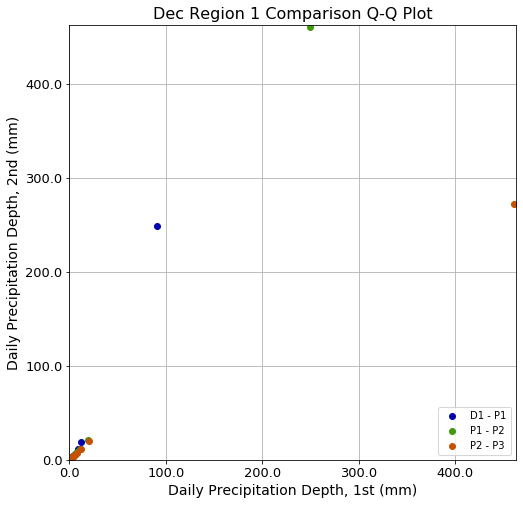

In [1257]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Dec1D1Qs, Dec1P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Dec1P1Qs, Dec1P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Dec1P2Qs, Dec1P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.set_title('Dec Region 1 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max1Qs) )
ax11.set_ylim( (0.0, max1Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

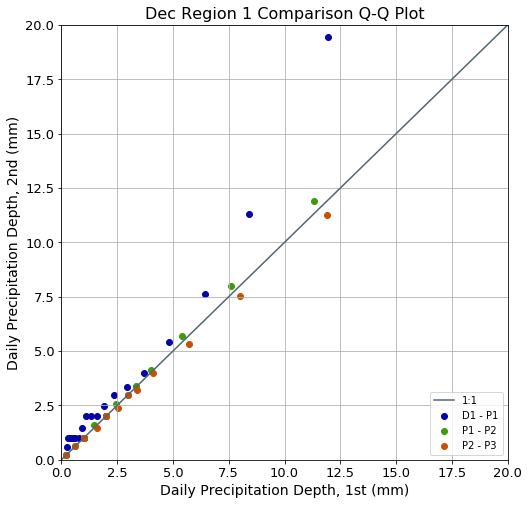

In [1258]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Dec1D1Qs, Dec1P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Dec1P1Qs, Dec1P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Dec1P2Qs, Dec1P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.plot( [0.0, max1Qs], [0.0, max1Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Dec Region 1 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 20.0) )
ax11.set_ylim( (0.0, 20.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

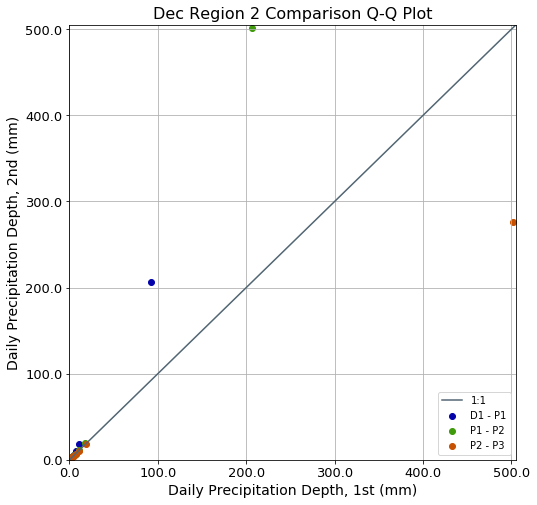

In [1259]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Dec2D1Qs, Dec2P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Dec2P1Qs, Dec2P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Dec2P2Qs, Dec2P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.plot( [0.0, max2Qs], [0.0, max2Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Dec Region 2 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max2Qs) )
ax11.set_ylim( (0.0, max2Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

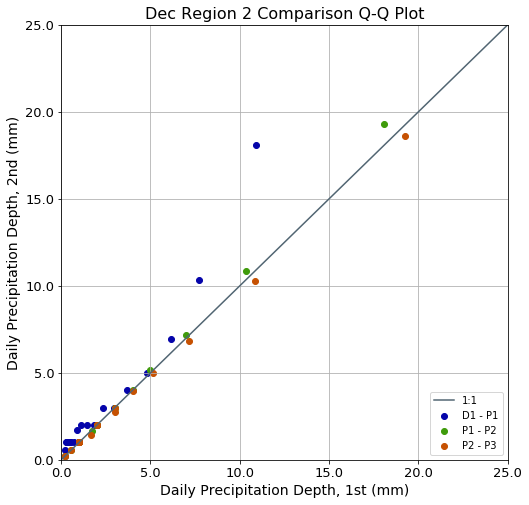

In [1260]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Dec2D1Qs, Dec2P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Dec2P1Qs, Dec2P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Dec2P2Qs, Dec2P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.plot( [0.0, max2Qs], [0.0, max2Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Dec Region 2 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

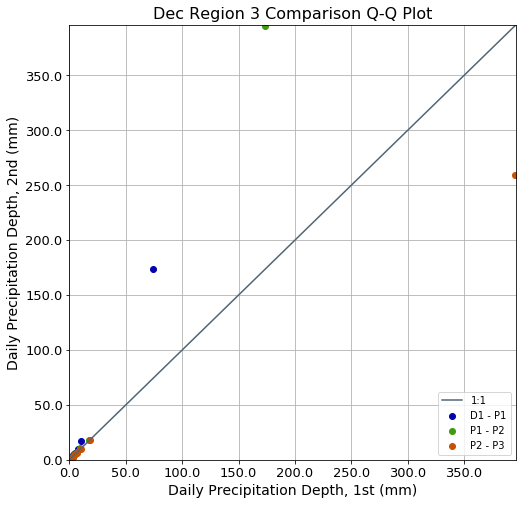

In [1261]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Dec3D1Qs, Dec3P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Dec3P1Qs, Dec3P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Dec3P2Qs, Dec3P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.plot( [0.0, max3Qs], [0.0, max3Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Dec Region 3 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max3Qs) )
ax11.set_ylim( (0.0, max3Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

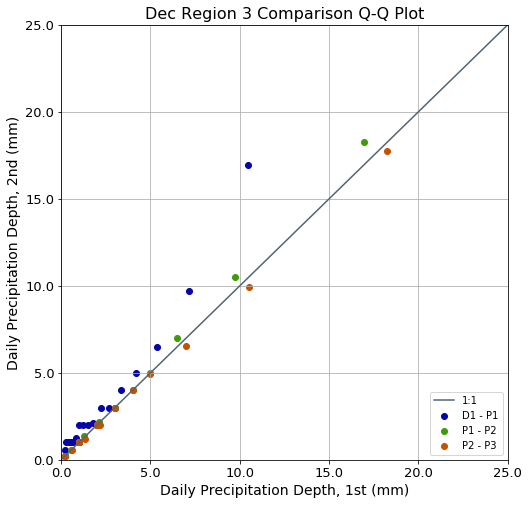

In [1262]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Dec3D1Qs, Dec3P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Dec3P1Qs, Dec3P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Dec3P2Qs, Dec3P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.plot( [0.0, max3Qs], [0.0, max3Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Dec Region 3 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

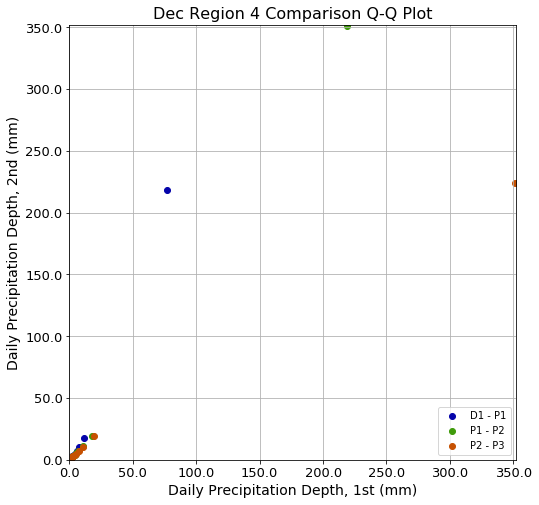

In [1263]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Dec4D1Qs, Dec4P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Dec4P1Qs, Dec4P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Dec4P2Qs, Dec4P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.set_title('Dec Region 4 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, max4Qs) )
ax11.set_ylim( (0.0, max4Qs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

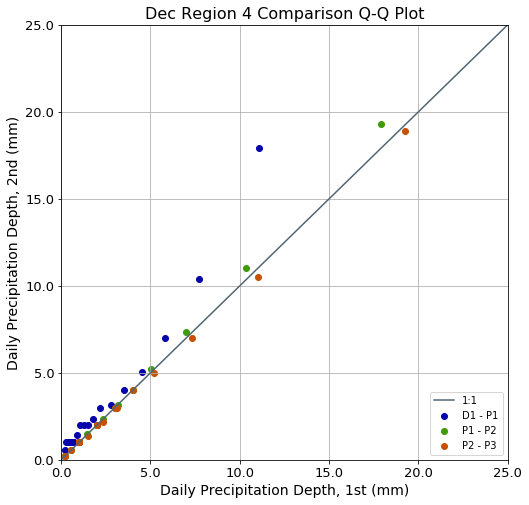

In [1264]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( Dec4D1Qs, Dec4P1Qs, c='xkcd:royal blue', marker='o', linestyle='-', label="D1 - P1")
ax11.scatter( Dec4P1Qs, Dec4P2Qs, c='xkcd:grass green', marker='o', linestyle='-', label="P1 - P2")
ax11.scatter( Dec4P2Qs, Dec4P3Qs, c='xkcd:dark orange', marker='o', linestyle='-', label="P2 - P3")
ax11.plot( [0.0, max4Qs], [0.0, max4Qs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Dec Region 4 Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth, 1st (mm)', fontsize=14 )
ax11.set_ylabel('Daily Precipitation Depth, 2nd (mm)', fontsize=14)
ax11.set_xlim( (0.0, 25.0) )
ax11.set_ylim( (0.0, 25.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

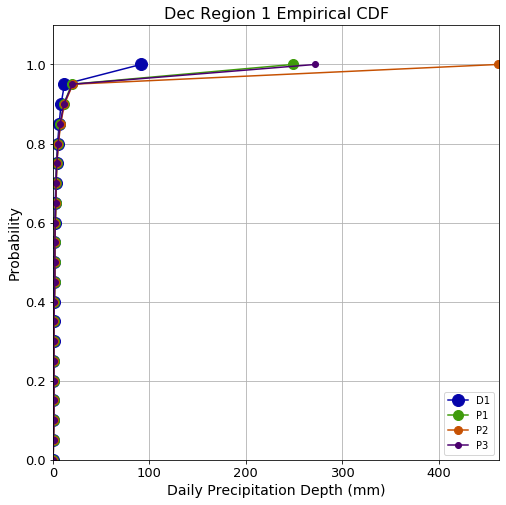

In [1265]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Dec1D1Qs, nCompQs, c='xkcd:royal blue', markersize=12, marker='o', 
           linestyle='-', label="D1")
ax11.plot( Dec1P1Qs, nCompQs, c='xkcd:grass green', markersize=10, marker='o', 
           linestyle='-', label="P1")
ax11.plot( Dec1P2Qs, nCompQs, c='xkcd:dark orange', markersize=8, marker='o', 
           linestyle='-', label="P2")
ax11.plot( Dec1P3Qs, nCompQs, c='xkcd:royal purple', markersize=6, marker='o', 
           linestyle='-', label="P3")
ax11.set_title('Dec Region 1 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max1Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

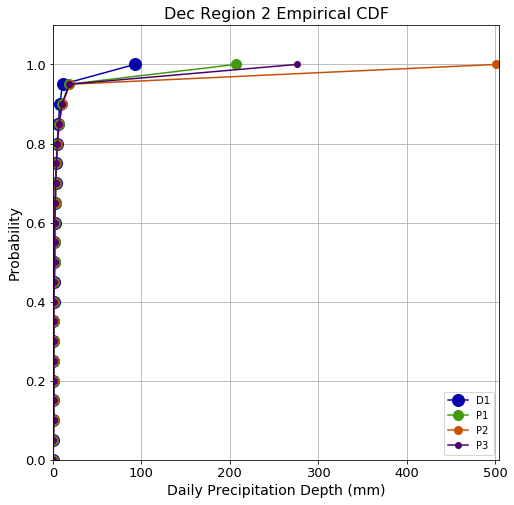

In [1266]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Dec2D1Qs, nCompQs, c='xkcd:royal blue', markersize=12, marker='o', 
           linestyle='-', label="D1")
ax11.plot( Dec2P1Qs, nCompQs, c='xkcd:grass green', markersize=10, marker='o', 
           linestyle='-', label="P1")
ax11.plot( Dec2P2Qs, nCompQs, c='xkcd:dark orange', markersize=8, marker='o', 
           linestyle='-', label="P2")
ax11.plot( Dec2P3Qs, nCompQs, c='xkcd:royal purple', markersize=6, marker='o', 
           linestyle='-', label="P3")
ax11.set_title('Dec Region 2 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max2Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

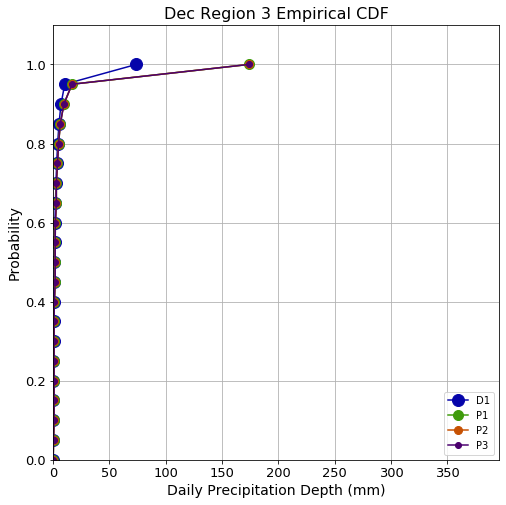

In [1267]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Dec3D1Qs, nCompQs, c='xkcd:royal blue', markersize=12, marker='o', 
           linestyle='-', label="D1")
ax11.plot( Dec3P1Qs, nCompQs, c='xkcd:grass green', markersize=10, marker='o', 
           linestyle='-', label="P1")
ax11.plot( Dec3P1Qs, nCompQs, c='xkcd:dark orange', markersize=8, marker='o', 
           linestyle='-', label="P2")
ax11.plot( Dec3P1Qs, nCompQs, c='xkcd:royal purple', markersize=6, marker='o', 
           linestyle='-', label="P3")
ax11.set_title('Dec Region 3 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max3Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

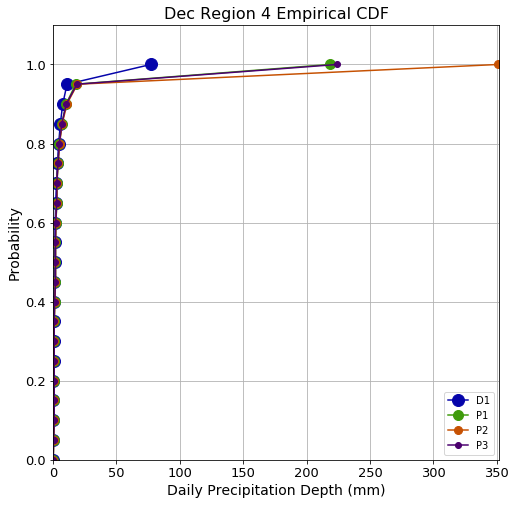

In [1268]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( Dec4D1Qs, nCompQs, c='xkcd:royal blue', markersize=12, marker='o', 
           linestyle='-', label="D1")
ax11.plot( Dec4P1Qs, nCompQs, c='xkcd:grass green', markersize=10, marker='o', 
           linestyle='-', label="P1")
ax11.plot( Dec4P2Qs, nCompQs, c='xkcd:dark orange', markersize=8, marker='o', 
           linestyle='-', label="P2")
ax11.plot( Dec4P3Qs, nCompQs, c='xkcd:royal purple', markersize=6, marker='o', 
           linestyle='-', label="P3")
ax11.set_title('Dec Region 4 Empirical CDF', fontsize=16 )
ax11.set_xlabel('Daily Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, max4Qs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

## Final Collations, Plots, and Outputs

In [1271]:
DataDict = { "Month" : np.array( CMonList, dtype=np.int32 ), #0
             "PRISM Region" : np.array( CZoneList, dtype=np.int32 ), #1
             "Min CI Mean" : np.array( SD1MeanMinCI, dtype=np.float32 ), #2
             "Mean" : np.array( SD1Mean, dtype=np.float32 ), #3
             "Max CI Mean" : np.array( SD1MeanMaxCI, dtype=np.float32 ), #4
             "Min CI Var" : np.array( SD1VarMinCI, dtype=np.float32 ), #5
             "Var" : np.array( SD1Var, dtype=np.float32 ), #6
             "Max CI Var" : np.array( SD1VarMaxCI, dtype=np.float32 ), #7
             "Min CI Std" : np.array( SD1StdMinCI, dtype=np.float32 ), #8
             "Std" : np.array( SD1Std, dtype=np.float32 ), #9
             "Max CI Std" : np.array( SD1StdMaxCI, dtype=np.float32 ), #10
}
D1BayStatsCIDF = pd.DataFrame( data=DataDict )

In [1272]:
BSCIHds = list( D1BayStatsCIDF.columns )

In [1273]:
display( HTML( D1BayStatsCIDF.to_html() ) )

In [1274]:
DataDict = { "Month" : np.array( CMonList, dtype=np.int32 ), #0
             "PRISM Region" : np.array( CZoneList, dtype=np.int32 ), #1
             "Min CI Mean" : np.array( SP1MeanMinCI, dtype=np.float32 ), #2
             "Mean" : np.array( SP1Mean, dtype=np.float32 ), #3
             "Max CI Mean" : np.array( SP1MeanMaxCI, dtype=np.float32 ), #4
             "Min CI Var" : np.array( SP1VarMinCI, dtype=np.float32 ), #5
             "Var" : np.array( SP1Var, dtype=np.float32 ), #6
             "Max CI Var" : np.array( SP1VarMaxCI, dtype=np.float32 ), #7
             "Min CI Std" : np.array( SP1StdMinCI, dtype=np.float32 ), #8
             "Std" : np.array( SP1Std, dtype=np.float32 ), #9
             "Max CI Std" : np.array( SP1StdMaxCI, dtype=np.float32 ), #10
}
P1BayStatsCIDF = pd.DataFrame( data=DataDict )

In [1275]:
display( HTML( P1BayStatsCIDF.to_html() ) )

In [1276]:
DataDict = { "Month" : np.array( CMonList, dtype=np.int32 ), #0
             "PRISM Region" : np.array( CZoneList, dtype=np.int32 ), #1
             "Min CI Mean" : np.array( SP2MeanMinCI, dtype=np.float32 ), #2
             "Mean" : np.array( SP2Mean, dtype=np.float32 ), #3
             "Max CI Mean" : np.array( SP2MeanMaxCI, dtype=np.float32 ), #4
             "Min CI Var" : np.array( SP2VarMinCI, dtype=np.float32 ), #5
             "Var" : np.array( SP2Var, dtype=np.float32 ), #6
             "Max CI Var" : np.array( SP2VarMaxCI, dtype=np.float32 ), #7
             "Min CI Std" : np.array( SP2StdMinCI, dtype=np.float32 ), #8
             "Std" : np.array( SP2Std, dtype=np.float32 ), #9
             "Max CI Std" : np.array( SP2StdMaxCI, dtype=np.float32 ), #10
}
P2BayStatsCIDF = pd.DataFrame( data=DataDict )

In [1277]:
display( HTML( P2BayStatsCIDF.to_html() ) )

In [1278]:
DataDict = { "Month" : np.array( CMonList, dtype=np.int32 ), #0
             "PRISM Region" : np.array( CZoneList, dtype=np.int32 ), #1
             "Min CI Mean" : np.array( SP3MeanMinCI, dtype=np.float32 ), #2
             "Mean" : np.array( SP3Mean, dtype=np.float32 ), #3
             "Max CI Mean" : np.array( SP3MeanMaxCI, dtype=np.float32 ), #4
             "Min CI Var" : np.array( SP3VarMinCI, dtype=np.float32 ), #5
             "Var" : np.array( SP3Var, dtype=np.float32 ), #6
             "Max CI Var" : np.array( SP3VarMaxCI, dtype=np.float32 ), #7
             "Min CI Std" : np.array( SP3StdMinCI, dtype=np.float32 ), #8
             "Std" : np.array( SP3Std, dtype=np.float32 ), #9
             "Max CI Std" : np.array( SP3StdMaxCI, dtype=np.float32 ), #10
}
P3BayStatsCIDF = pd.DataFrame( data=DataDict )

In [1279]:
display( HTML( P3BayStatsCIDF.to_html() ) )

In [1280]:
OutFiler = os.path.normpath( os.path.join( OUT_DIR, "PrecipDepthComp_LOCA_All.xlsx" ) )
with pd.ExcelWriter( OutFiler ) as writer:
    D1BayStatsCIDF.to_excel( writer, sheet_name="D1", na_rep=str(np.nan), 
                             columns=BSCIHds, index=True, index_label="Month" )
    P1BayStatsCIDF.to_excel( writer, sheet_name="P1", na_rep=str(np.nan), 
                             columns=BSCIHds, index=True, index_label="Month" )
    P2BayStatsCIDF.to_excel( writer, sheet_name="P2", na_rep=str(np.nan), 
                             columns=BSCIHds, index=True, index_label="Month" )
    P3BayStatsCIDF.to_excel( writer, sheet_name="P3", na_rep=str(np.nan), 
                             columns=BSCIHds, index=True, index_label="Month" )

Plot the monthly confidence intervals with statistic

In [1281]:
D11Stats = D1BayStatsCIDF[D1BayStatsCIDF[BSCIHds[1]] == 1].copy()
D12Stats = D1BayStatsCIDF[D1BayStatsCIDF[BSCIHds[1]] == 2].copy()
D13Stats = D1BayStatsCIDF[D1BayStatsCIDF[BSCIHds[1]] == 3].copy()
D14Stats = D1BayStatsCIDF[D1BayStatsCIDF[BSCIHds[1]] == 4].copy()

In [1282]:
P11Stats = P1BayStatsCIDF[P1BayStatsCIDF[BSCIHds[1]] == 1].copy()
P12Stats = P1BayStatsCIDF[P1BayStatsCIDF[BSCIHds[1]] == 2].copy()
P13Stats = P1BayStatsCIDF[P1BayStatsCIDF[BSCIHds[1]] == 3].copy()
P14Stats = P1BayStatsCIDF[P1BayStatsCIDF[BSCIHds[1]] == 4].copy()

In [1283]:
P21Stats = P2BayStatsCIDF[P2BayStatsCIDF[BSCIHds[1]] == 1].copy()
P22Stats = P2BayStatsCIDF[P2BayStatsCIDF[BSCIHds[1]] == 2].copy()
P23Stats = P2BayStatsCIDF[P2BayStatsCIDF[BSCIHds[1]] == 3].copy()
P24Stats = P2BayStatsCIDF[P2BayStatsCIDF[BSCIHds[1]] == 4].copy()

In [1284]:
P31Stats = P3BayStatsCIDF[P3BayStatsCIDF[BSCIHds[1]] == 1].copy()
P32Stats = P3BayStatsCIDF[P3BayStatsCIDF[BSCIHds[1]] == 2].copy()
P33Stats = P3BayStatsCIDF[P3BayStatsCIDF[BSCIHds[1]] == 3].copy()
P34Stats = P3BayStatsCIDF[P3BayStatsCIDF[BSCIHds[1]] == 4].copy()

In [1285]:
D11MeanCI = np.append( np.stack( [np.array(D11Stats[BSCIHds[0]], dtype=np.float32 ),
                          np.array(D11Stats[BSCIHds[2]], dtype=np.float32 )],
                          axis=1 ),
                      np.stack( [np.flip(np.array(D11Stats[BSCIHds[0]], dtype=np.float32 ), 0),
                          np.flip(np.array(D11Stats[BSCIHds[4]], dtype=np.float32 ), 0)],
                          axis=1 ), axis=0 )
D11MeanCI = np.vstack( [D11MeanCI[:,:], D11MeanCI[0,:]] )
D12MeanCI = np.append( np.stack( [np.array(D12Stats[BSCIHds[0]], dtype=np.float32 ),
                          np.array(D12Stats[BSCIHds[2]], dtype=np.float32 )],
                          axis=1 ),
                      np.stack( [np.flip(np.array(D12Stats[BSCIHds[0]], dtype=np.float32 ), 0),
                          np.flip(np.array(D12Stats[BSCIHds[4]], dtype=np.float32 ), 0)],
                          axis=1 ), axis=0 )
D12MeanCI = np.vstack( [D12MeanCI[:,:], D12MeanCI[0,:]] )
D13MeanCI = np.append( np.stack( [np.array(D13Stats[BSCIHds[0]], dtype=np.float32 ),
                          np.array(D13Stats[BSCIHds[2]], dtype=np.float32 )],
                          axis=1 ),
                      np.stack( [np.flip(np.array(D13Stats[BSCIHds[0]], dtype=np.float32 ), 0),
                          np.flip(np.array(D13Stats[BSCIHds[4]], dtype=np.float32 ), 0)],
                          axis=1 ), axis=0 )
D13MeanCI = np.vstack( [D13MeanCI[:,:], D13MeanCI[0,:]] )
D14MeanCI = np.append( np.stack( [np.array(D14Stats[BSCIHds[0]], dtype=np.float32 ),
                          np.array(D14Stats[BSCIHds[2]], dtype=np.float32 )],
                          axis=1 ),
                      np.stack( [np.flip(np.array(D14Stats[BSCIHds[0]], dtype=np.float32 ), 0),
                          np.flip(np.array(D14Stats[BSCIHds[4]], dtype=np.float32 ), 0)],
                          axis=1 ), axis=0 )
D14MeanCI = np.vstack( [D14MeanCI[:,:], D14MeanCI[0,:]] )

In [1286]:
P11MeanCI = np.append( np.stack( [np.array(P11Stats[BSCIHds[0]], dtype=np.float32 ),
                          np.array(P11Stats[BSCIHds[2]], dtype=np.float32 )],
                          axis=1 ),
                      np.stack( [np.flip(np.array(P11Stats[BSCIHds[0]], dtype=np.float32 ), 0),
                          np.flip(np.array(P11Stats[BSCIHds[4]], dtype=np.float32 ), 0)],
                          axis=1 ), axis=0 )
P11MeanCI = np.vstack( [P11MeanCI[:,:], P11MeanCI[0,:]] )
P12MeanCI = np.append( np.stack( [np.array(P12Stats[BSCIHds[0]], dtype=np.float32 ),
                          np.array(P12Stats[BSCIHds[2]], dtype=np.float32 )],
                          axis=1 ),
                      np.stack( [np.flip(np.array(P12Stats[BSCIHds[0]], dtype=np.float32 ), 0),
                          np.flip(np.array(P12Stats[BSCIHds[4]], dtype=np.float32 ), 0)],
                          axis=1 ), axis=0 )
P12MeanCI = np.vstack( [P12MeanCI[:,:], P12MeanCI[0,:]] )
P13MeanCI = np.append( np.stack( [np.array(P13Stats[BSCIHds[0]], dtype=np.float32 ),
                          np.array(P13Stats[BSCIHds[2]], dtype=np.float32 )],
                          axis=1 ),
                      np.stack( [np.flip(np.array(P13Stats[BSCIHds[0]], dtype=np.float32 ), 0),
                          np.flip(np.array(P13Stats[BSCIHds[4]], dtype=np.float32 ), 0)],
                          axis=1 ), axis=0 )
P13MeanCI = np.vstack( [P13MeanCI[:,:], P13MeanCI[0,:]] )
P14MeanCI = np.append( np.stack( [np.array(P14Stats[BSCIHds[0]], dtype=np.float32 ),
                          np.array(P14Stats[BSCIHds[2]], dtype=np.float32 )],
                          axis=1 ),
                      np.stack( [np.flip(np.array(P14Stats[BSCIHds[0]], dtype=np.float32 ), 0),
                          np.flip(np.array(P14Stats[BSCIHds[4]], dtype=np.float32 ), 0)],
                          axis=1 ), axis=0 )
P14MeanCI = np.vstack( [P14MeanCI[:,:], P14MeanCI[0,:]] )

In [1287]:
P21MeanCI = np.append( np.stack( [np.array(P21Stats[BSCIHds[0]], dtype=np.float32 ),
                          np.array(P21Stats[BSCIHds[2]], dtype=np.float32 )],
                          axis=1 ),
                      np.stack( [np.flip(np.array(P21Stats[BSCIHds[0]], dtype=np.float32 ), 0),
                          np.flip(np.array(P21Stats[BSCIHds[4]], dtype=np.float32 ), 0)],
                          axis=1 ), axis=0 )
P21MeanCI = np.vstack( [P21MeanCI[:,:], P21MeanCI[0,:]] )
P22MeanCI = np.append( np.stack( [np.array(P22Stats[BSCIHds[0]], dtype=np.float32 ),
                          np.array(P22Stats[BSCIHds[2]], dtype=np.float32 )],
                          axis=1 ),
                      np.stack( [np.flip(np.array(P22Stats[BSCIHds[0]], dtype=np.float32 ), 0),
                          np.flip(np.array(P22Stats[BSCIHds[4]], dtype=np.float32 ), 0)],
                          axis=1 ), axis=0 )
P22MeanCI = np.vstack( [P22MeanCI[:,:], P22MeanCI[0,:]] )
P23MeanCI = np.append( np.stack( [np.array(P23Stats[BSCIHds[0]], dtype=np.float32 ),
                          np.array(P23Stats[BSCIHds[2]], dtype=np.float32 )],
                          axis=1 ),
                      np.stack( [np.flip(np.array(P23Stats[BSCIHds[0]], dtype=np.float32 ), 0),
                          np.flip(np.array(P23Stats[BSCIHds[4]], dtype=np.float32 ), 0)],
                          axis=1 ), axis=0 )
P23MeanCI = np.vstack( [P23MeanCI[:,:], P23MeanCI[0,:]] )
P24MeanCI = np.append( np.stack( [np.array(P24Stats[BSCIHds[0]], dtype=np.float32 ),
                          np.array(P24Stats[BSCIHds[2]], dtype=np.float32 )],
                          axis=1 ),
                      np.stack( [np.flip(np.array(P24Stats[BSCIHds[0]], dtype=np.float32 ), 0),
                          np.flip(np.array(P24Stats[BSCIHds[4]], dtype=np.float32 ), 0)],
                          axis=1 ), axis=0 )
P24MeanCI = np.vstack( [P24MeanCI[:,:], P24MeanCI[0,:]] )

In [1288]:
P31MeanCI = np.append( np.stack( [np.array(P31Stats[BSCIHds[0]], dtype=np.float32 ),
                          np.array(P31Stats[BSCIHds[2]], dtype=np.float32 )],
                          axis=1 ),
                      np.stack( [np.flip(np.array(P31Stats[BSCIHds[0]], dtype=np.float32 ), 0),
                          np.flip(np.array(P31Stats[BSCIHds[4]], dtype=np.float32 ), 0)],
                          axis=1 ), axis=0 )
P31MeanCI = np.vstack( [P31MeanCI[:,:], P31MeanCI[0,:]] )
P32MeanCI = np.append( np.stack( [np.array(P32Stats[BSCIHds[0]], dtype=np.float32 ),
                          np.array(P32Stats[BSCIHds[2]], dtype=np.float32 )],
                          axis=1 ),
                      np.stack( [np.flip(np.array(P32Stats[BSCIHds[0]], dtype=np.float32 ), 0),
                          np.flip(np.array(P32Stats[BSCIHds[4]], dtype=np.float32 ), 0)],
                          axis=1 ), axis=0 )
P32MeanCI = np.vstack( [P32MeanCI[:,:], P32MeanCI[0,:]] )
P33MeanCI = np.append( np.stack( [np.array(P33Stats[BSCIHds[0]], dtype=np.float32 ),
                          np.array(P33Stats[BSCIHds[2]], dtype=np.float32 )],
                          axis=1 ),
                      np.stack( [np.flip(np.array(P33Stats[BSCIHds[0]], dtype=np.float32 ), 0),
                          np.flip(np.array(P33Stats[BSCIHds[4]], dtype=np.float32 ), 0)],
                          axis=1 ), axis=0 )
P33MeanCI = np.vstack( [P33MeanCI[:,:], P33MeanCI[0,:]] )
P34MeanCI = np.append( np.stack( [np.array(P34Stats[BSCIHds[0]], dtype=np.float32 ),
                          np.array(P34Stats[BSCIHds[2]], dtype=np.float32 )],
                          axis=1 ),
                      np.stack( [np.flip(np.array(P34Stats[BSCIHds[0]], dtype=np.float32 ), 0),
                          np.flip(np.array(P34Stats[BSCIHds[4]], dtype=np.float32 ), 0)],
                          axis=1 ), axis=0 )
P34MeanCI = np.vstack( [P34MeanCI[:,:], P34MeanCI[0,:]] )

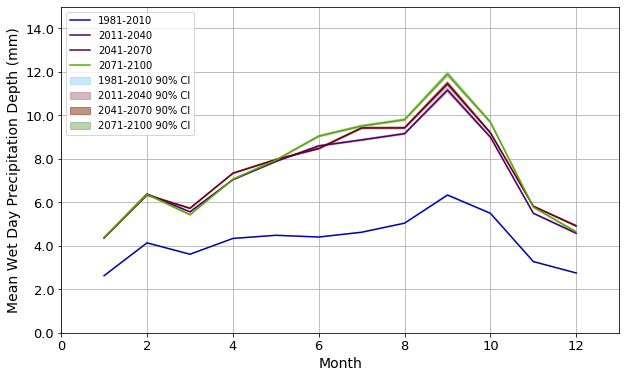

In [1312]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( D11Stats[BSCIHds[0]], D11Stats[BSCIHds[3]], color="xkcd:royal blue", 
           linestyle="-", label="1981-2010" )
ax11.fill( D11MeanCI[:,0], D11MeanCI[:,1], color="xkcd:light blue", alpha=0.5, 
           label="1981-2010 90% CI")
ax11.plot( P11Stats[BSCIHds[0]], P11Stats[BSCIHds[3]], color="xkcd:royal purple", 
           linestyle="-", label="2011-2040" )
ax11.fill( P11MeanCI[:,0], P11MeanCI[:,1], color="xkcd:mauve", alpha=0.5, 
           label="2011-2040 90% CI")
ax11.plot( P21Stats[BSCIHds[0]], P21Stats[BSCIHds[3]], color="xkcd:maroon", 
           linestyle="-", label="2041-2070" )
ax11.fill( P21MeanCI[:,0], P21MeanCI[:,1], color="xkcd:reddish brown", alpha=0.5, 
           label="2041-2070 90% CI")
ax11.plot( P31Stats[BSCIHds[0]], P31Stats[BSCIHds[3]], color="xkcd:leaf green", 
           linestyle="-", label="2071-2100" )
ax11.fill( P31MeanCI[:,0], P31MeanCI[:,1], color="xkcd:dull green", alpha=0.5, 
           label="2071-2100 90% CI")
ax11.set_title('LOCA Region 1', fontsize=16 )
ax11.set_xlabel('Month', fontsize=14 )
ax11.set_ylabel('Mean Wet Day Precipitation Depth (mm)', fontsize=14)
ax11.set_xlim( (0.0, 13.0) )
ax11.set_ylim( (0.0, 15.0) )
ax11.grid( b=True )
ax11.legend(loc='upper left')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

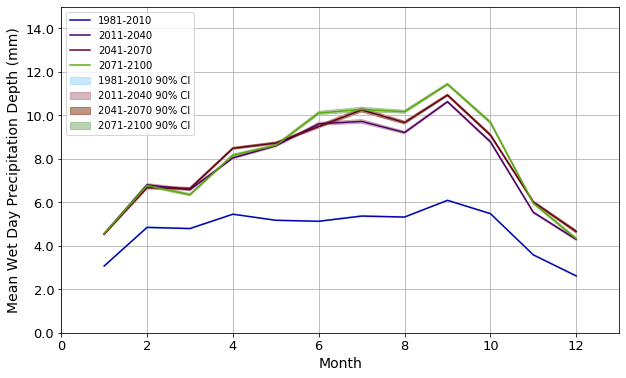

In [1311]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( D12Stats[BSCIHds[0]], D12Stats[BSCIHds[3]], color="xkcd:royal blue", 
           linestyle="-", label="1981-2010" )
ax11.fill( D12MeanCI[:,0], D12MeanCI[:,1], color="xkcd:light blue", alpha=0.5, 
           label="1981-2010 90% CI")
ax11.plot( P12Stats[BSCIHds[0]], P12Stats[BSCIHds[3]], color="xkcd:royal purple", 
           linestyle="-", label="2011-2040" )
ax11.fill( P12MeanCI[:,0], P12MeanCI[:,1], color="xkcd:mauve", alpha=0.5, 
           label="2011-2040 90% CI")
ax11.plot( P22Stats[BSCIHds[0]], P22Stats[BSCIHds[3]], color="xkcd:maroon", 
           linestyle="-", label="2041-2070" )
ax11.fill( P22MeanCI[:,0], P22MeanCI[:,1], color="xkcd:reddish brown", alpha=0.5, 
           label="2041-2070 90% CI")
ax11.plot( P32Stats[BSCIHds[0]], P32Stats[BSCIHds[3]], color="xkcd:leaf green", 
           linestyle="-", label="2071-2100" )
ax11.fill( P32MeanCI[:,0], P32MeanCI[:,1], color="xkcd:dull green", alpha=0.5, 
           label="2071-2100 90% CI")
ax11.set_title('LOCA Region 2', fontsize=16 )
ax11.set_xlabel('Month', fontsize=14 )
ax11.set_ylabel('Mean Wet Day Precipitation Depth (mm)', fontsize=14)
ax11.set_xlim( (0.0, 13.0) )
ax11.set_ylim( (0.0, 15.0) )
ax11.grid( b=True )
ax11.legend(loc='upper left')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

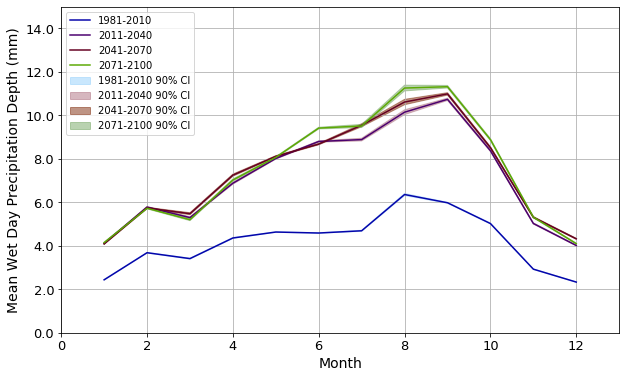

In [1310]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( D13Stats[BSCIHds[0]], D13Stats[BSCIHds[3]], color="xkcd:royal blue", 
           linestyle="-", label="1981-2010" )
ax11.fill( D13MeanCI[:,0], D13MeanCI[:,1], color="xkcd:light blue", alpha=0.5, 
           label="1981-2010 90% CI")
ax11.plot( P13Stats[BSCIHds[0]], P13Stats[BSCIHds[3]], color="xkcd:royal purple", 
           linestyle="-", label="2011-2040" )
ax11.fill( P13MeanCI[:,0], P13MeanCI[:,1], color="xkcd:mauve", alpha=0.5, 
           label="2011-2040 90% CI")
ax11.plot( P23Stats[BSCIHds[0]], P23Stats[BSCIHds[3]], color="xkcd:maroon", 
           linestyle="-", label="2041-2070" )
ax11.fill( P23MeanCI[:,0], P23MeanCI[:,1], color="xkcd:reddish brown", alpha=0.5, 
           label="2041-2070 90% CI")
ax11.plot( P33Stats[BSCIHds[0]], P33Stats[BSCIHds[3]], color="xkcd:leaf green", 
           linestyle="-", label="2071-2100" )
ax11.fill( P33MeanCI[:,0], P33MeanCI[:,1], color="xkcd:dull green", alpha=0.5, 
           label="2071-2100 90% CI")
ax11.set_title('LOCA Region 3', fontsize=16 )
ax11.set_xlabel('Month', fontsize=14 )
ax11.set_ylabel('Mean Wet Day Precipitation Depth (mm)', fontsize=14)
ax11.set_xlim( (0.0, 13.0) )
ax11.set_ylim( (0.0, 15.0) )
ax11.grid( b=True )
ax11.legend(loc='upper left')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

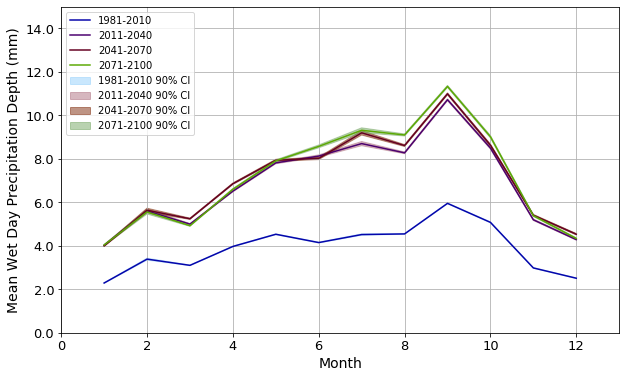

In [1309]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( D14Stats[BSCIHds[0]], D14Stats[BSCIHds[3]], color="xkcd:royal blue", 
           linestyle="-", label="1981-2010" )
ax11.fill( D14MeanCI[:,0], D14MeanCI[:,1], color="xkcd:light blue", alpha=0.5, 
           label="1981-2010 90% CI")
ax11.plot( P14Stats[BSCIHds[0]], P14Stats[BSCIHds[3]], color="xkcd:royal purple", 
           linestyle="-", label="2011-2040" )
ax11.fill( P14MeanCI[:,0], P14MeanCI[:,1], color="xkcd:mauve", alpha=0.5, 
           label="2011-2040 90% CI")
ax11.plot( P24Stats[BSCIHds[0]], P24Stats[BSCIHds[3]], color="xkcd:maroon", 
           linestyle="-", label="2041-2070" )
ax11.fill( P24MeanCI[:,0], P24MeanCI[:,1], color="xkcd:reddish brown", alpha=0.5, 
           label="2041-2070 90% CI")
ax11.plot( P34Stats[BSCIHds[0]], P34Stats[BSCIHds[3]], color="xkcd:leaf green", 
           linestyle="-", label="2071-2100" )
ax11.fill( P34MeanCI[:,0], P34MeanCI[:,1], color="xkcd:dull green", alpha=0.5, 
           label="2071-2100 90% CI")
ax11.set_title('LOCA Region 4', fontsize=16 )
ax11.set_xlabel('Month', fontsize=14 )
ax11.set_ylabel('Mean Wet Day Precipitation Depth (mm)', fontsize=14)
ax11.set_xlim( (0.0, 13.0) )
ax11.set_ylim( (0.0, 15.0) )
ax11.grid( b=True )
ax11.legend(loc='upper left')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [1293]:
D11VarCI = np.append( np.stack( [np.array(D11Stats[BSCIHds[0]], dtype=np.float32 ),
                          np.array(D11Stats[BSCIHds[5]], dtype=np.float32 )],
                          axis=1 ),
                      np.stack( [np.flip(np.array(D11Stats[BSCIHds[0]], dtype=np.float32 ), 0),
                          np.flip(np.array(D11Stats[BSCIHds[7]], dtype=np.float32 ), 0)],
                          axis=1 ), axis=0 )
D11VarCI = np.vstack( [D11VarCI[:,:], D11VarCI[0,:]] )
D12VarCI = np.append( np.stack( [np.array(D12Stats[BSCIHds[0]], dtype=np.float32 ),
                          np.array(D12Stats[BSCIHds[5]], dtype=np.float32 )],
                          axis=1 ),
                      np.stack( [np.flip(np.array(D12Stats[BSCIHds[0]], dtype=np.float32 ), 0),
                          np.flip(np.array(D12Stats[BSCIHds[7]], dtype=np.float32 ), 0)],
                          axis=1 ), axis=0 )
D12VarCI = np.vstack( [D12VarCI[:,:], D12VarCI[0,:]] )
D13VarCI = np.append( np.stack( [np.array(D13Stats[BSCIHds[0]], dtype=np.float32 ),
                          np.array(D13Stats[BSCIHds[5]], dtype=np.float32 )],
                          axis=1 ),
                      np.stack( [np.flip(np.array(D13Stats[BSCIHds[0]], dtype=np.float32 ), 0),
                          np.flip(np.array(D13Stats[BSCIHds[7]], dtype=np.float32 ), 0)],
                          axis=1 ), axis=0 )
D13VarCI = np.vstack( [D13VarCI[:,:], D13VarCI[0,:]] )
D14VarCI = np.append( np.stack( [np.array(D14Stats[BSCIHds[0]], dtype=np.float32 ),
                          np.array(D14Stats[BSCIHds[5]], dtype=np.float32 )],
                          axis=1 ),
                      np.stack( [np.flip(np.array(D14Stats[BSCIHds[0]], dtype=np.float32 ), 0),
                          np.flip(np.array(D14Stats[BSCIHds[7]], dtype=np.float32 ), 0)],
                          axis=1 ), axis=0 )
D14VarCI = np.vstack( [D14VarCI[:,:], D14VarCI[0,:]] )

In [1294]:
P11VarCI = np.append( np.stack( [np.array(P11Stats[BSCIHds[0]], dtype=np.float32 ),
                          np.array(P11Stats[BSCIHds[5]], dtype=np.float32 )],
                          axis=1 ),
                      np.stack( [np.flip(np.array(P11Stats[BSCIHds[0]], dtype=np.float32 ), 0),
                          np.flip(np.array(P11Stats[BSCIHds[7]], dtype=np.float32 ), 0)],
                          axis=1 ), axis=0 )
P11VarCI = np.vstack( [P11VarCI[:,:], P11VarCI[0,:]] )
P12VarCI = np.append( np.stack( [np.array(P12Stats[BSCIHds[0]], dtype=np.float32 ),
                          np.array(P12Stats[BSCIHds[5]], dtype=np.float32 )],
                          axis=1 ),
                      np.stack( [np.flip(np.array(P12Stats[BSCIHds[0]], dtype=np.float32 ), 0),
                          np.flip(np.array(P12Stats[BSCIHds[7]], dtype=np.float32 ), 0)],
                          axis=1 ), axis=0 )
P12VarCI = np.vstack( [P12VarCI[:,:], P12VarCI[0,:]] )
P13VarCI = np.append( np.stack( [np.array(P13Stats[BSCIHds[0]], dtype=np.float32 ),
                          np.array(P13Stats[BSCIHds[5]], dtype=np.float32 )],
                          axis=1 ),
                      np.stack( [np.flip(np.array(P13Stats[BSCIHds[0]], dtype=np.float32 ), 0),
                          np.flip(np.array(P13Stats[BSCIHds[7]], dtype=np.float32 ), 0)],
                          axis=1 ), axis=0 )
P13VarCI = np.vstack( [P13VarCI[:,:], P13VarCI[0,:]] )
P14VarCI = np.append( np.stack( [np.array(P14Stats[BSCIHds[0]], dtype=np.float32 ),
                          np.array(P14Stats[BSCIHds[5]], dtype=np.float32 )],
                          axis=1 ),
                      np.stack( [np.flip(np.array(P14Stats[BSCIHds[0]], dtype=np.float32 ), 0),
                          np.flip(np.array(P14Stats[BSCIHds[7]], dtype=np.float32 ), 0)],
                          axis=1 ), axis=0 )
P14VarCI = np.vstack( [P14VarCI[:,:], P14VarCI[0,:]] )

In [1295]:
P21VarCI = np.append( np.stack( [np.array(P21Stats[BSCIHds[0]], dtype=np.float32 ),
                          np.array(P21Stats[BSCIHds[5]], dtype=np.float32 )],
                          axis=1 ),
                      np.stack( [np.flip(np.array(P21Stats[BSCIHds[0]], dtype=np.float32 ), 0),
                          np.flip(np.array(P21Stats[BSCIHds[7]], dtype=np.float32 ), 0)],
                          axis=1 ), axis=0 )
P21VarCI = np.vstack( [P21VarCI[:,:], P21VarCI[0,:]] )
P22VarCI = np.append( np.stack( [np.array(P22Stats[BSCIHds[0]], dtype=np.float32 ),
                          np.array(P22Stats[BSCIHds[5]], dtype=np.float32 )],
                          axis=1 ),
                      np.stack( [np.flip(np.array(P22Stats[BSCIHds[0]], dtype=np.float32 ), 0),
                          np.flip(np.array(P22Stats[BSCIHds[7]], dtype=np.float32 ), 0)],
                          axis=1 ), axis=0 )
P22VarCI = np.vstack( [P22VarCI[:,:], P22VarCI[0,:]] )
P23VarCI = np.append( np.stack( [np.array(P23Stats[BSCIHds[0]], dtype=np.float32 ),
                          np.array(P23Stats[BSCIHds[5]], dtype=np.float32 )],
                          axis=1 ),
                      np.stack( [np.flip(np.array(P23Stats[BSCIHds[0]], dtype=np.float32 ), 0),
                          np.flip(np.array(P23Stats[BSCIHds[7]], dtype=np.float32 ), 0)],
                          axis=1 ), axis=0 )
P23VarCI = np.vstack( [P23VarCI[:,:], P23VarCI[0,:]] )
P24VarCI = np.append( np.stack( [np.array(P24Stats[BSCIHds[0]], dtype=np.float32 ),
                          np.array(P24Stats[BSCIHds[5]], dtype=np.float32 )],
                          axis=1 ),
                      np.stack( [np.flip(np.array(P24Stats[BSCIHds[0]], dtype=np.float32 ), 0),
                          np.flip(np.array(P24Stats[BSCIHds[7]], dtype=np.float32 ), 0)],
                          axis=1 ), axis=0 )
P24VarCI = np.vstack( [P24VarCI[:,:], P24VarCI[0,:]] )

In [1296]:
P31VarCI = np.append( np.stack( [np.array(P31Stats[BSCIHds[0]], dtype=np.float32 ),
                          np.array(P31Stats[BSCIHds[5]], dtype=np.float32 )],
                          axis=1 ),
                      np.stack( [np.flip(np.array(P31Stats[BSCIHds[0]], dtype=np.float32 ), 0),
                          np.flip(np.array(P31Stats[BSCIHds[7]], dtype=np.float32 ), 0)],
                          axis=1 ), axis=0 )
P31VarCI = np.vstack( [P31VarCI[:,:], P31VarCI[0,:]] )
P32VarCI = np.append( np.stack( [np.array(P32Stats[BSCIHds[0]], dtype=np.float32 ),
                          np.array(P32Stats[BSCIHds[5]], dtype=np.float32 )],
                          axis=1 ),
                      np.stack( [np.flip(np.array(P32Stats[BSCIHds[0]], dtype=np.float32 ), 0),
                          np.flip(np.array(P32Stats[BSCIHds[7]], dtype=np.float32 ), 0)],
                          axis=1 ), axis=0 )
P32VarCI = np.vstack( [P32VarCI[:,:], P32VarCI[0,:]] )
P33VarCI = np.append( np.stack( [np.array(P33Stats[BSCIHds[0]], dtype=np.float32 ),
                          np.array(P33Stats[BSCIHds[5]], dtype=np.float32 )],
                          axis=1 ),
                      np.stack( [np.flip(np.array(P33Stats[BSCIHds[0]], dtype=np.float32 ), 0),
                          np.flip(np.array(P33Stats[BSCIHds[7]], dtype=np.float32 ), 0)],
                          axis=1 ), axis=0 )
P33VarCI = np.vstack( [P33VarCI[:,:], P33VarCI[0,:]] )
P34VarCI = np.append( np.stack( [np.array(P34Stats[BSCIHds[0]], dtype=np.float32 ),
                          np.array(P34Stats[BSCIHds[5]], dtype=np.float32 )],
                          axis=1 ),
                      np.stack( [np.flip(np.array(P34Stats[BSCIHds[0]], dtype=np.float32 ), 0),
                          np.flip(np.array(P34Stats[BSCIHds[7]], dtype=np.float32 ), 0)],
                          axis=1 ), axis=0 )
P34VarCI = np.vstack( [P34VarCI[:,:], P34VarCI[0,:]] )

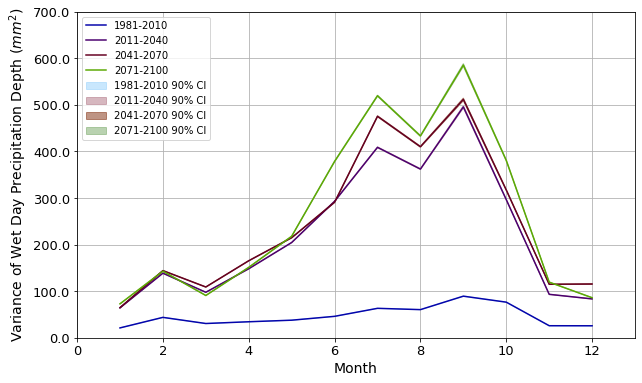

In [1308]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( D11Stats[BSCIHds[0]], D11Stats[BSCIHds[6]], color="xkcd:royal blue", 
           linestyle="-", label="1981-2010" )
ax11.fill( D11VarCI[:,0], D11VarCI[:,1], color="xkcd:light blue", alpha=0.5, 
           label="1981-2010 90% CI")
ax11.plot( P11Stats[BSCIHds[0]], P11Stats[BSCIHds[6]], color="xkcd:royal purple", 
           linestyle="-", label="2011-2040" )
ax11.fill( P11VarCI[:,0], P11VarCI[:,1], color="xkcd:mauve", alpha=0.5, 
           label="2011-2040 90% CI")
ax11.plot( P21Stats[BSCIHds[0]], P21Stats[BSCIHds[6]], color="xkcd:maroon", 
           linestyle="-", label="2041-2070" )
ax11.fill( P21VarCI[:,0], P21VarCI[:,1], color="xkcd:reddish brown", alpha=0.5, 
           label="2041-2070 90% CI")
ax11.plot( P31Stats[BSCIHds[0]], P31Stats[BSCIHds[6]], color="xkcd:leaf green", 
           linestyle="-", label="2071-2100" )
ax11.fill( P31VarCI[:,0], P31VarCI[:,1], color="xkcd:dull green", alpha=0.5, 
           label="2071-2100 90% CI")
ax11.set_title('LOCA Region 1', fontsize=16 )
ax11.set_xlabel('Month', fontsize=14 )
ax11.set_ylabel('Variance of Wet Day Precipitation Depth ($mm^{2}$)', fontsize=14)
ax11.set_xlim( (0.0, 13.0) )
ax11.set_ylim( (0.0, 700.0) )
ax11.grid( b=True )
ax11.legend(loc='upper left')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

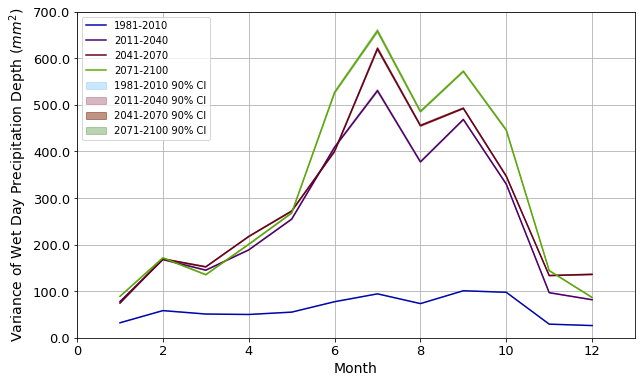

In [1307]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( D12Stats[BSCIHds[0]], D12Stats[BSCIHds[6]], color="xkcd:royal blue", 
           linestyle="-", label="1981-2010" )
ax11.fill( D12VarCI[:,0], D12VarCI[:,1], color="xkcd:light blue", alpha=0.5, 
           label="1981-2010 90% CI")
ax11.plot( P12Stats[BSCIHds[0]], P12Stats[BSCIHds[6]], color="xkcd:royal purple", 
           linestyle="-", label="2011-2040" )
ax11.fill( P12VarCI[:,0], P12VarCI[:,1], color="xkcd:mauve", alpha=0.5, 
           label="2011-2040 90% CI")
ax11.plot( P22Stats[BSCIHds[0]], P22Stats[BSCIHds[6]], color="xkcd:maroon", 
           linestyle="-", label="2041-2070" )
ax11.fill( P22VarCI[:,0], P22VarCI[:,1], color="xkcd:reddish brown", alpha=0.5, 
           label="2041-2070 90% CI")
ax11.plot( P32Stats[BSCIHds[0]], P32Stats[BSCIHds[6]], color="xkcd:leaf green", 
           linestyle="-", label="2071-2100" )
ax11.fill( P32VarCI[:,0], P32VarCI[:,1], color="xkcd:dull green", alpha=0.5, 
           label="2071-2100 90% CI")
ax11.set_title('LOCA Region 2', fontsize=16 )
ax11.set_xlabel('Month', fontsize=14 )
ax11.set_ylabel('Variance of Wet Day Precipitation Depth ($mm^{2}$)', fontsize=14)
ax11.set_xlim( (0.0, 13.0) )
ax11.set_ylim( (0.0, 700.0) )
ax11.grid( b=True )
ax11.legend(loc='upper left')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

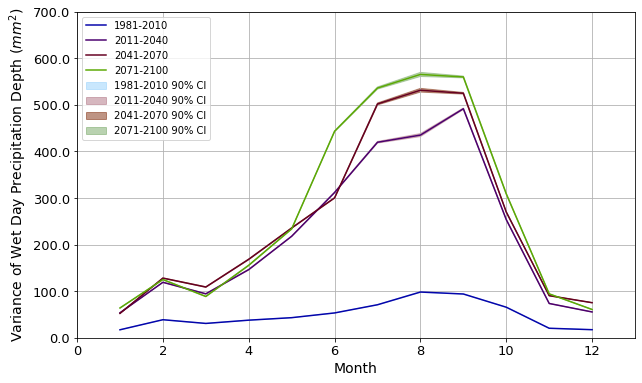

In [1306]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( D13Stats[BSCIHds[0]], D13Stats[BSCIHds[6]], color="xkcd:royal blue", 
           linestyle="-", label="1981-2010" )
ax11.fill( D13VarCI[:,0], D13VarCI[:,1], color="xkcd:light blue", alpha=0.5, 
           label="1981-2010 90% CI")
ax11.plot( P13Stats[BSCIHds[0]], P13Stats[BSCIHds[6]], color="xkcd:royal purple", 
           linestyle="-", label="2011-2040" )
ax11.fill( P13VarCI[:,0], P13VarCI[:,1], color="xkcd:mauve", alpha=0.5, 
           label="2011-2040 90% CI")
ax11.plot( P23Stats[BSCIHds[0]], P23Stats[BSCIHds[6]], color="xkcd:maroon", 
           linestyle="-", label="2041-2070" )
ax11.fill( P23VarCI[:,0], P23VarCI[:,1], color="xkcd:reddish brown", alpha=0.5, 
           label="2041-2070 90% CI")
ax11.plot( P33Stats[BSCIHds[0]], P33Stats[BSCIHds[6]], color="xkcd:leaf green", 
           linestyle="-", label="2071-2100" )
ax11.fill( P33VarCI[:,0], P33VarCI[:,1], color="xkcd:dull green", alpha=0.5, 
           label="2071-2100 90% CI")
ax11.set_title('LOCA Region 3', fontsize=16 )
ax11.set_xlabel('Month', fontsize=14 )
ax11.set_ylabel('Variance of Wet Day Precipitation Depth ($mm^{2}$)', fontsize=14)
ax11.set_xlim( (0.0, 13.0) )
ax11.set_ylim( (0.0, 700.0) )
ax11.grid( b=True )
ax11.legend(loc='upper left')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

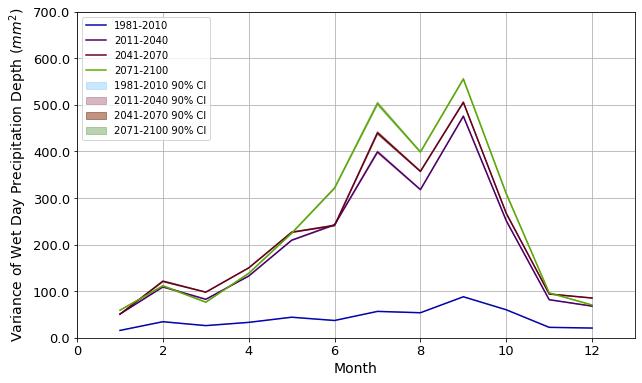

In [1305]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( D14Stats[BSCIHds[0]], D14Stats[BSCIHds[6]], color="xkcd:royal blue", 
           linestyle="-", label="1981-2010" )
ax11.fill( D14VarCI[:,0], D14VarCI[:,1], color="xkcd:light blue", alpha=0.5, 
           label="1981-2010 90% CI")
ax11.plot( P14Stats[BSCIHds[0]], P14Stats[BSCIHds[6]], color="xkcd:royal purple", 
           linestyle="-", label="2011-2040" )
ax11.fill( P14VarCI[:,0], P14VarCI[:,1], color="xkcd:mauve", alpha=0.5, 
           label="2011-2040 90% CI")
ax11.plot( P24Stats[BSCIHds[0]], P24Stats[BSCIHds[6]], color="xkcd:maroon", 
           linestyle="-", label="2041-2070" )
ax11.fill( P24VarCI[:,0], P24VarCI[:,1], color="xkcd:reddish brown", alpha=0.5, 
           label="2041-2070 90% CI")
ax11.plot( P34Stats[BSCIHds[0]], P34Stats[BSCIHds[6]], color="xkcd:leaf green", 
           linestyle="-", label="2071-2100" )
ax11.fill( P34VarCI[:,0], P34VarCI[:,1], color="xkcd:dull green", alpha=0.5, 
           label="2071-2100 90% CI")
ax11.set_title('LOCA Region 4', fontsize=16 )
ax11.set_xlabel('Month', fontsize=14 )
ax11.set_ylabel('Variance of Wet Day Precipitation Depth ($mm^{2}$)', fontsize=14)
ax11.set_xlim( (0.0, 13.0) )
ax11.set_ylim( (0.0, 700.0) )
ax11.grid( b=True )
ax11.legend(loc='upper left')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )